# 图像分类

在此项目中，你将对 [CIFAR-10 数据集](https://www.cs.toronto.edu/~kriz/cifar.html) 中的图片进行分类。该数据集包含飞机、猫狗和其他物体。你需要预处理这些图片，然后用所有样本训练一个卷积神经网络。图片需要标准化（normalized），标签需要采用 one-hot 编码。你需要应用所学的知识构建卷积的、最大池化（max pooling）、丢弃（dropout）和完全连接（fully connected）的层。最后，你需要在样本图片上看到神经网络的预测结果。


## 获取数据

请运行以下单元，以下载 [CIFAR-10 数据集（Python版）](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)。


In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 0.00B [00:00, ?B/s]

CIFAR-10 Dataset:   0%|          | 8.19K/170M [00:02<15:37:40, 3.03KB/s]

CIFAR-10 Dataset:   0%|          | 24.6K/170M [00:03<11:11:52, 4.23KB/s]

CIFAR-10 Dataset:   0%|          | 57.3K/170M [00:03<7:58:26, 5.94KB/s] 

CIFAR-10 Dataset:   0%|          | 90.1K/170M [00:03<5:43:08, 8.28KB/s]

CIFAR-10 Dataset:   0%|          | 123K/170M [00:03<4:08:17, 11.4KB/s] 

CIFAR-10 Dataset:   0%|          | 156K/170M [00:04<3:02:11, 15.6KB/s]

CIFAR-10 Dataset:   0%|          | 188K/170M [00:04<2:15:50, 20.9KB/s]

CIFAR-10 Dataset:   0%|          | 205K/170M [00:04<1:50:19, 25.7KB/s]

CIFAR-10 Dataset:   0%|          | 254K/170M [00:05<1:22:12, 34.5KB/s]

CIFAR-10 Dataset:   0%|          | 270K/170M [00:05<1:13:41, 38.5KB/s]

CIFAR-10 Dataset:   0%|          | 303K/170M [00:05<59:42, 47.5KB/s]  

CIFAR-10 Dataset:   0%|          | 319K/170M [00:06<57:11, 49.6KB/s]

CIFAR-10 Dataset:   0%|          | 352K/170M [00:06<55:21, 51.2KB/s]

CIFAR-10 Dataset:   0%|          | 385K/170M [00:07<47:01, 60.3KB/s]

CIFAR-10 Dataset:   0%|          | 401K/170M [00:07<38:17, 74.0KB/s]

CIFAR-10 Dataset:   0%|          | 418K/170M [00:07<1:09:16, 40.9KB/s]

CIFAR-10 Dataset:   0%|          | 467K/170M [00:08<54:50, 51.7KB/s]  

CIFAR-10 Dataset:   0%|          | 483K/170M [00:08<48:36, 58.3KB/s]

CIFAR-10 Dataset:   0%|          | 500K/170M [00:09<1:06:22, 42.7KB/s]

CIFAR-10 Dataset:   0%|          | 516K/170M [00:09<1:01:54, 45.8KB/s]

CIFAR-10 Dataset:   0%|          | 532K/170M [00:09<59:22, 47.7KB/s]  

CIFAR-10 Dataset:   0%|          | 549K/170M [00:09<53:21, 53.1KB/s]

CIFAR-10 Dataset:   0%|          | 565K/170M [00:10<59:45, 47.4KB/s]

CIFAR-10 Dataset:   0%|          | 582K/170M [00:10<56:30, 50.1KB/s]

CIFAR-10 Dataset:   0%|          | 598K/170M [00:10<54:28, 52.0KB/s]

CIFAR-10 Dataset:   0%|          | 614K/170M [00:11<53:30, 52.9KB/s]

CIFAR-10 Dataset:   0%|          | 631K/170M [00:11<45:44, 61.9KB/s]

CIFAR-10 Dataset:   0%|          | 647K/170M [00:11<48:32, 58.3KB/s]

CIFAR-10 Dataset:   0%|          | 664K/170M [00:12<50:52, 55.6KB/s]

CIFAR-10 Dataset:   0%|          | 680K/170M [00:12<51:58, 54.5KB/s]

CIFAR-10 Dataset:   0%|          | 696K/170M [00:12<1:07:22, 42.0KB/s]

CIFAR-10 Dataset:   0%|          | 729K/170M [00:13<54:11, 52.2KB/s]  

CIFAR-10 Dataset:   0%|          | 745K/170M [00:13<52:59, 53.4KB/s]

CIFAR-10 Dataset:   0%|          | 762K/170M [00:13<46:02, 61.4KB/s]

CIFAR-10 Dataset:   0%|          | 778K/170M [00:14<1:03:12, 44.8KB/s]

CIFAR-10 Dataset:   0%|          | 795K/170M [00:14<58:18, 48.5KB/s]  

CIFAR-10 Dataset:   0%|          | 811K/170M [00:14<57:23, 49.3KB/s]

CIFAR-10 Dataset:   0%|          | 827K/170M [00:15<56:41, 49.9KB/s]

CIFAR-10 Dataset:   0%|          | 844K/170M [00:15<48:55, 57.8KB/s]

CIFAR-10 Dataset:   1%|          | 860K/170M [00:15<50:05, 56.4KB/s]

CIFAR-10 Dataset:   1%|          | 877K/170M [00:16<50:55, 55.5KB/s]

CIFAR-10 Dataset:   1%|          | 893K/170M [00:16<52:17, 54.1KB/s]

CIFAR-10 Dataset:   1%|          | 909K/170M [00:16<52:55, 53.4KB/s]

CIFAR-10 Dataset:   1%|          | 926K/170M [00:16<51:54, 54.4KB/s]

CIFAR-10 Dataset:   1%|          | 942K/170M [00:17<58:08, 48.6KB/s]

CIFAR-10 Dataset:   1%|          | 958K/170M [00:17<49:52, 56.7KB/s]

CIFAR-10 Dataset:   1%|          | 975K/170M [00:17<51:16, 55.1KB/s]

CIFAR-10 Dataset:   1%|          | 991K/170M [00:17<43:08, 65.5KB/s]

CIFAR-10 Dataset:   1%|          | 1.01M/170M [00:18<1:00:59, 46.3KB/s]

CIFAR-10 Dataset:   1%|          | 1.02M/170M [00:18<57:31, 49.1KB/s]  

CIFAR-10 Dataset:   1%|          | 1.04M/170M [00:18<45:41, 61.8KB/s]

CIFAR-10 Dataset:   1%|          | 1.06M/170M [00:19<49:52, 56.6KB/s]

CIFAR-10 Dataset:   1%|          | 1.07M/170M [00:19<1:08:49, 41.0KB/s]

CIFAR-10 Dataset:   1%|          | 1.11M/170M [00:20<1:03:55, 44.2KB/s]

CIFAR-10 Dataset:   1%|          | 1.14M/170M [00:20<54:37, 51.7KB/s]  

CIFAR-10 Dataset:   1%|          | 1.16M/170M [00:21<1:04:54, 43.5KB/s]

CIFAR-10 Dataset:   1%|          | 1.17M/170M [00:21<1:03:01, 44.8KB/s]

CIFAR-10 Dataset:   1%|          | 1.19M/170M [00:22<1:00:45, 46.4KB/s]

CIFAR-10 Dataset:   1%|          | 1.20M/170M [00:22<58:58, 47.8KB/s]  

CIFAR-10 Dataset:   1%|          | 1.22M/170M [00:23<1:14:19, 38.0KB/s]

CIFAR-10 Dataset:   1%|          | 1.24M/170M [00:23<59:25, 47.5KB/s]  

CIFAR-10 Dataset:   1%|          | 1.25M/170M [00:23<1:04:59, 43.4KB/s]

CIFAR-10 Dataset:   1%|          | 1.27M/170M [00:23<1:00:04, 46.9KB/s]

CIFAR-10 Dataset:   1%|          | 1.29M/170M [00:24<54:40, 51.6KB/s]  

CIFAR-10 Dataset:   1%|          | 1.30M/170M [00:24<54:34, 51.7KB/s]

CIFAR-10 Dataset:   1%|          | 1.32M/170M [00:24<57:43, 48.8KB/s]

CIFAR-10 Dataset:   1%|          | 1.34M/170M [00:25<56:17, 50.1KB/s]

CIFAR-10 Dataset:   1%|          | 1.35M/170M [00:25<53:55, 52.3KB/s]

CIFAR-10 Dataset:   1%|          | 1.37M/170M [00:25<53:08, 53.0KB/s]

CIFAR-10 Dataset:   1%|          | 1.38M/170M [00:26<53:27, 52.7KB/s]

CIFAR-10 Dataset:   1%|          | 1.40M/170M [00:26<54:01, 52.2KB/s]

CIFAR-10 Dataset:   1%|          | 1.42M/170M [00:26<54:02, 52.2KB/s]

CIFAR-10 Dataset:   1%|          | 1.43M/170M [00:27<52:23, 53.8KB/s]

CIFAR-10 Dataset:   1%|          | 1.45M/170M [00:27<1:07:27, 41.8KB/s]

CIFAR-10 Dataset:   1%|          | 1.48M/170M [00:27<56:13, 50.1KB/s]  

CIFAR-10 Dataset:   1%|          | 1.50M/170M [00:28<59:44, 47.1KB/s]

CIFAR-10 Dataset:   1%|          | 1.52M/170M [00:29<1:15:09, 37.5KB/s]

CIFAR-10 Dataset:   1%|          | 1.55M/170M [00:29<1:01:53, 45.5KB/s]

CIFAR-10 Dataset:   1%|          | 1.56M/170M [00:29<1:00:38, 46.4KB/s]

CIFAR-10 Dataset:   1%|          | 1.58M/170M [00:30<57:43, 48.8KB/s]  

CIFAR-10 Dataset:   1%|          | 1.60M/170M [00:30<53:16, 52.8KB/s]

CIFAR-10 Dataset:   1%|          | 1.61M/170M [00:30<53:52, 52.2KB/s]

CIFAR-10 Dataset:   1%|          | 1.63M/170M [00:30<52:00, 54.1KB/s]

CIFAR-10 Dataset:   1%|          | 1.65M/170M [00:31<50:17, 56.0KB/s]

CIFAR-10 Dataset:   1%|          | 1.66M/170M [00:31<49:23, 57.0KB/s]

CIFAR-10 Dataset:   1%|          | 1.68M/170M [00:32<1:06:01, 42.6KB/s]

CIFAR-10 Dataset:   1%|          | 1.71M/170M [00:32<54:23, 51.7KB/s]  

CIFAR-10 Dataset:   1%|          | 1.73M/170M [00:32<54:04, 52.0KB/s]

CIFAR-10 Dataset:   1%|          | 1.74M/170M [00:33<1:09:22, 40.5KB/s]

CIFAR-10 Dataset:   1%|          | 1.78M/170M [00:33<57:42, 48.7KB/s]  

CIFAR-10 Dataset:   1%|          | 1.79M/170M [00:33<55:41, 50.5KB/s]

CIFAR-10 Dataset:   1%|          | 1.81M/170M [00:34<55:15, 50.9KB/s]

CIFAR-10 Dataset:   1%|          | 1.83M/170M [00:34<55:09, 51.0KB/s]

CIFAR-10 Dataset:   1%|          | 1.84M/170M [00:35<1:10:53, 39.7KB/s]

CIFAR-10 Dataset:   1%|          | 1.86M/170M [00:35<57:59, 48.5KB/s]  

CIFAR-10 Dataset:   1%|          | 1.88M/170M [00:35<56:38, 49.6KB/s]

CIFAR-10 Dataset:   1%|          | 1.89M/170M [00:35<45:35, 61.6KB/s]

CIFAR-10 Dataset:   1%|          | 1.91M/170M [00:36<47:45, 58.8KB/s]

CIFAR-10 Dataset:   1%|          | 1.93M/170M [00:36<49:37, 56.6KB/s]

CIFAR-10 Dataset:   1%|          | 1.94M/170M [00:36<50:35, 55.5KB/s]

CIFAR-10 Dataset:   1%|          | 1.96M/170M [00:37<51:27, 54.6KB/s]

CIFAR-10 Dataset:   1%|          | 1.97M/170M [00:37<52:45, 53.2KB/s]

CIFAR-10 Dataset:   1%|          | 1.99M/170M [00:37<53:02, 53.0KB/s]

CIFAR-10 Dataset:   1%|          | 2.01M/170M [00:37<46:05, 60.9KB/s]

CIFAR-10 Dataset:   1%|          | 2.02M/170M [00:38<46:30, 60.4KB/s]

CIFAR-10 Dataset:   1%|          | 2.04M/170M [00:38<47:50, 58.7KB/s]

CIFAR-10 Dataset:   1%|          | 2.06M/170M [00:38<39:39, 70.8KB/s]

CIFAR-10 Dataset:   1%|          | 2.07M/170M [00:38<44:12, 63.5KB/s]

CIFAR-10 Dataset:   1%|          | 2.09M/170M [00:39<46:05, 60.9KB/s]

CIFAR-10 Dataset:   1%|          | 2.11M/170M [00:39<41:14, 68.0KB/s]

CIFAR-10 Dataset:   1%|          | 2.12M/170M [00:39<34:30, 81.3KB/s]

CIFAR-10 Dataset:   1%|▏         | 2.14M/170M [00:39<39:28, 71.1KB/s]

CIFAR-10 Dataset:   1%|▏         | 2.15M/170M [00:39<39:58, 70.2KB/s]

CIFAR-10 Dataset:   1%|▏         | 2.19M/170M [00:40<37:55, 74.0KB/s]

CIFAR-10 Dataset:   1%|▏         | 2.22M/170M [00:40<34:18, 81.8KB/s]

CIFAR-10 Dataset:   1%|▏         | 2.25M/170M [00:40<31:46, 88.2KB/s]

CIFAR-10 Dataset:   1%|▏         | 2.30M/170M [00:41<33:00, 84.9KB/s]

CIFAR-10 Dataset:   1%|▏         | 2.38M/170M [00:41<26:06, 107KB/s] 

CIFAR-10 Dataset:   1%|▏         | 2.42M/170M [00:42<26:10, 107KB/s]

CIFAR-10 Dataset:   1%|▏         | 2.47M/170M [00:42<23:51, 117KB/s]

CIFAR-10 Dataset:   1%|▏         | 2.51M/170M [00:42<22:12, 126KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.56M/170M [00:43<20:32, 136KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.60M/170M [00:43<22:54, 122KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.65M/170M [00:43<18:29, 151KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.66M/170M [00:43<20:04, 139KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.70M/170M [00:44<22:05, 127KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.73M/170M [00:44<31:10, 89.7KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.79M/170M [00:44<25:23, 110KB/s] 

CIFAR-10 Dataset:   2%|▏         | 2.83M/170M [00:45<25:05, 111KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.86M/170M [00:45<25:34, 109KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.89M/170M [00:45<26:03, 107KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.92M/170M [00:46<26:24, 106KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.96M/170M [00:46<25:47, 108KB/s]

CIFAR-10 Dataset:   2%|▏         | 2.99M/170M [00:47<32:53, 84.9KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.04M/170M [00:47<27:43, 101KB/s] 

CIFAR-10 Dataset:   2%|▏         | 3.07M/170M [00:47<26:27, 105KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.10M/170M [00:47<25:59, 107KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.14M/170M [00:48<33:39, 82.9KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.19M/170M [00:48<29:03, 96.0KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.22M/170M [00:49<28:33, 97.6KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.25M/170M [00:49<27:22, 102KB/s] 

CIFAR-10 Dataset:   2%|▏         | 3.28M/170M [00:49<26:13, 106KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.30M/170M [00:49<28:28, 97.9KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.32M/170M [00:50<39:41, 70.2KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.37M/170M [00:50<33:09, 84.0KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.40M/170M [00:50<31:18, 88.9KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.43M/170M [00:51<36:32, 76.2KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.48M/170M [00:51<30:38, 90.8KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.50M/170M [00:52<34:27, 80.8KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.51M/170M [00:52<46:58, 59.3KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.55M/170M [00:52<38:15, 72.7KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.56M/170M [00:53<40:57, 67.9KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.60M/170M [00:53<38:35, 72.1KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.61M/170M [00:53<37:33, 74.0KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.65M/170M [00:53<35:36, 78.1KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.66M/170M [00:54<35:17, 78.8KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.69M/170M [00:54<32:56, 84.4KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.71M/170M [00:54<30:03, 92.5KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.73M/170M [00:54<34:11, 81.3KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.74M/170M [00:55<36:12, 76.8KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.76M/170M [00:55<31:42, 87.6KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.78M/170M [00:55<33:48, 82.2KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.79M/170M [00:55<33:39, 82.5KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.81M/170M [00:56<45:06, 61.6KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.83M/170M [00:56<39:14, 70.8KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.86M/170M [00:56<36:00, 77.1KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.87M/170M [00:56<40:00, 69.4KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.89M/170M [00:57<48:36, 57.1KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.92M/170M [00:57<41:13, 67.3KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.94M/170M [00:57<44:06, 62.9KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.96M/170M [00:58<46:02, 60.3KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.97M/170M [00:58<48:41, 57.0KB/s]

CIFAR-10 Dataset:   2%|▏         | 3.99M/170M [00:58<50:35, 54.9KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.01M/170M [00:58<44:35, 62.2KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.02M/170M [00:59<44:33, 62.3KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.04M/170M [00:59<45:29, 61.0KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.06M/170M [00:59<47:19, 58.6KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.07M/170M [00:59<38:50, 71.4KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.09M/170M [01:00<43:16, 64.1KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.10M/170M [01:00<45:55, 60.4KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.12M/170M [01:01<1:03:52, 43.4KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.15M/170M [01:01<59:09, 46.9KB/s]  

CIFAR-10 Dataset:   2%|▏         | 4.19M/170M [01:02<51:00, 54.3KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.20M/170M [01:02<1:02:50, 44.1KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.22M/170M [01:03<1:16:51, 36.1KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.24M/170M [01:03<1:11:51, 38.6KB/s]

CIFAR-10 Dataset:   2%|▏         | 4.25M/170M [01:03<1:05:03, 42.6KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.27M/170M [01:04<1:01:03, 45.4KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.28M/170M [01:04<1:07:16, 41.2KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.30M/170M [01:04<53:33, 51.7KB/s]  

CIFAR-10 Dataset:   3%|▎         | 4.32M/170M [01:05<59:34, 46.5KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.33M/170M [01:05<1:00:16, 45.9KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.35M/170M [01:06<58:10, 47.6KB/s]  

CIFAR-10 Dataset:   3%|▎         | 4.37M/170M [01:06<1:15:56, 36.5KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.40M/170M [01:07<1:01:04, 45.3KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.42M/170M [01:07<58:43, 47.1KB/s]  

CIFAR-10 Dataset:   3%|▎         | 4.43M/170M [01:07<56:57, 48.6KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.45M/170M [01:07<54:36, 50.7KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.46M/170M [01:08<1:09:01, 40.1KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.50M/170M [01:08<56:29, 49.0KB/s]  

CIFAR-10 Dataset:   3%|▎         | 4.51M/170M [01:09<55:58, 49.4KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.53M/170M [01:09<55:22, 50.0KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.55M/170M [01:10<1:10:28, 39.2KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.56M/170M [01:10<1:05:41, 42.1KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.58M/170M [01:10<56:12, 49.2KB/s]  

CIFAR-10 Dataset:   3%|▎         | 4.60M/170M [01:11<59:21, 46.6KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.63M/170M [01:11<51:01, 54.2KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.64M/170M [01:11<50:59, 54.2KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.66M/170M [01:12<51:11, 54.0KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.68M/170M [01:12<46:35, 59.3KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.69M/170M [01:12<1:03:02, 43.8KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.71M/170M [01:12<49:11, 56.2KB/s]  

CIFAR-10 Dataset:   3%|▎         | 4.73M/170M [01:13<50:06, 55.1KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.74M/170M [01:13<50:29, 54.7KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.76M/170M [01:14<1:02:02, 44.5KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.78M/170M [01:14<56:09, 49.2KB/s]  

CIFAR-10 Dataset:   3%|▎         | 4.79M/170M [01:14<54:39, 50.5KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.81M/170M [01:15<56:41, 48.7KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.83M/170M [01:15<55:43, 49.6KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.84M/170M [01:15<52:37, 52.5KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.86M/170M [01:15<51:06, 54.0KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.87M/170M [01:16<47:39, 57.9KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.89M/170M [01:16<58:18, 47.3KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.91M/170M [01:16<49:23, 55.9KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.92M/170M [01:17<1:04:48, 42.6KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.94M/170M [01:17<52:31, 52.5KB/s]  

CIFAR-10 Dataset:   3%|▎         | 4.96M/170M [01:17<59:11, 46.6KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.97M/170M [01:18<1:10:44, 39.0KB/s]

CIFAR-10 Dataset:   3%|▎         | 4.99M/170M [01:18<1:04:42, 42.6KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.01M/170M [01:19<1:02:57, 43.8KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.02M/170M [01:19<1:11:58, 38.3KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.04M/170M [01:20<1:06:03, 41.7KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.05M/170M [01:20<1:03:30, 43.4KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.07M/170M [01:21<1:42:31, 26.9KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.10M/170M [01:21<1:18:56, 34.9KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.12M/170M [01:22<1:09:59, 39.4KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.14M/170M [01:22<1:03:57, 43.1KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.17M/170M [01:22<54:00, 51.0KB/s]  

CIFAR-10 Dataset:   3%|▎         | 5.19M/170M [01:23<52:56, 52.0KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.20M/170M [01:23<48:33, 56.7KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.22M/170M [01:23<48:41, 56.6KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.23M/170M [01:23<49:45, 55.3KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.25M/170M [01:24<51:01, 54.0KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.27M/170M [01:24<51:17, 53.7KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.28M/170M [01:24<51:16, 53.7KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.30M/170M [01:25<1:03:41, 43.2KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.33M/170M [01:26<1:00:16, 45.7KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.37M/170M [01:26<51:48, 53.1KB/s]  

CIFAR-10 Dataset:   3%|▎         | 5.38M/170M [01:26<51:40, 53.2KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.40M/170M [01:27<1:02:45, 43.8KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.41M/170M [01:27<1:00:21, 45.6KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.43M/170M [01:27<57:23, 47.9KB/s]  

CIFAR-10 Dataset:   3%|▎         | 5.45M/170M [01:28<55:15, 49.8KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.46M/170M [01:28<54:05, 50.8KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.48M/170M [01:28<53:29, 51.4KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.50M/170M [01:29<1:07:27, 40.8KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.53M/170M [01:30<1:02:50, 43.8KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.56M/170M [01:30<51:42, 53.2KB/s]  

CIFAR-10 Dataset:   3%|▎         | 5.58M/170M [01:30<56:15, 48.9KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.60M/170M [01:31<1:11:14, 38.6KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.61M/170M [01:31<1:00:01, 45.8KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.63M/170M [01:31<56:32, 48.6KB/s]  

CIFAR-10 Dataset:   3%|▎         | 5.64M/170M [01:32<59:15, 46.4KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.66M/170M [01:32<57:44, 47.6KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.68M/170M [01:32<56:57, 48.2KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.69M/170M [01:33<55:55, 49.1KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.71M/170M [01:33<56:44, 48.4KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.73M/170M [01:33<59:24, 46.2KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.74M/170M [01:34<49:43, 55.2KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.76M/170M [01:34<49:55, 55.0KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.78M/170M [01:34<50:57, 53.9KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.79M/170M [01:35<50:29, 54.4KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.81M/170M [01:35<48:40, 56.4KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.82M/170M [01:35<44:23, 61.8KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.84M/170M [01:35<45:24, 60.4KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.86M/170M [01:36<46:06, 59.5KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.89M/170M [01:36<40:15, 68.1KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.91M/170M [01:36<38:55, 70.5KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.92M/170M [01:36<32:23, 84.7KB/s]

CIFAR-10 Dataset:   3%|▎         | 5.96M/170M [01:37<30:13, 90.8KB/s]

CIFAR-10 Dataset:   4%|▎         | 5.97M/170M [01:37<41:18, 66.4KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.02M/170M [01:37<32:23, 84.6KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.04M/170M [01:37<37:49, 72.5KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.05M/170M [01:38<41:01, 66.8KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.10M/170M [01:38<33:54, 80.8KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.14M/170M [01:38<31:43, 86.4KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.15M/170M [01:39<35:33, 77.0KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.18M/170M [01:39<33:14, 82.4KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.22M/170M [01:39<31:04, 88.1KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.25M/170M [01:40<37:57, 72.1KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.30M/170M [01:40<31:26, 87.1KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.32M/170M [01:40<27:34, 99.2KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.33M/170M [01:41<42:24, 64.5KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.37M/170M [01:41<37:27, 73.0KB/s]

CIFAR-10 Dataset:   4%|▎         | 6.38M/170M [01:41<41:45, 65.5KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.40M/170M [01:42<35:53, 76.2KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.41M/170M [01:42<34:20, 79.6KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.43M/170M [01:42<39:23, 69.4KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.45M/170M [01:42<43:33, 62.8KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.46M/170M [01:43<57:33, 47.5KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.50M/170M [01:43<48:22, 56.5KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.51M/170M [01:43<48:26, 56.4KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.53M/170M [01:44<48:36, 56.2KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.56M/170M [01:44<42:14, 64.7KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.58M/170M [01:44<45:00, 60.7KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.59M/170M [01:45<46:02, 59.3KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.63M/170M [01:45<41:07, 66.4KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.64M/170M [01:45<42:18, 64.6KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.66M/170M [01:46<42:47, 63.8KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.68M/170M [01:46<36:08, 75.5KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.69M/170M [01:46<33:50, 80.7KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.71M/170M [01:46<38:49, 70.3KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.73M/170M [01:47<58:14, 46.9KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.76M/170M [01:47<47:49, 57.1KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.79M/170M [01:47<42:06, 64.8KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.81M/170M [01:48<45:37, 59.8KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.82M/170M [01:48<46:29, 58.7KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.86M/170M [01:48<40:41, 67.0KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.87M/170M [01:49<42:42, 63.9KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.91M/170M [01:49<37:17, 73.1KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.92M/170M [01:50<53:44, 50.7KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.96M/170M [01:50<45:25, 60.0KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.97M/170M [01:50<46:29, 58.6KB/s]

CIFAR-10 Dataset:   4%|▍         | 6.99M/170M [01:50<43:42, 62.3KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.00M/170M [01:51<56:16, 48.4KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.04M/170M [01:51<45:46, 59.5KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.05M/170M [01:51<43:20, 62.9KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.07M/170M [01:52<41:28, 65.7KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.09M/170M [01:52<59:47, 45.5KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.12M/170M [01:52<46:35, 58.4KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.14M/170M [01:53<46:08, 59.0KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.15M/170M [01:53<40:54, 66.5KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.17M/170M [01:53<59:23, 45.8KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.20M/170M [01:54<52:51, 51.5KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.22M/170M [01:54<53:02, 51.3KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.23M/170M [01:55<53:03, 51.3KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.25M/170M [01:55<49:29, 55.0KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.27M/170M [01:55<50:28, 53.9KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.28M/170M [01:55<50:15, 54.1KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.30M/170M [01:56<47:02, 57.8KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.32M/170M [01:56<48:34, 56.0KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.33M/170M [01:56<48:51, 55.7KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.35M/170M [01:56<40:52, 66.5KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.36M/170M [01:57<39:09, 69.4KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.38M/170M [01:57<56:57, 47.7KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.41M/170M [01:57<46:46, 58.1KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.43M/170M [01:58<39:49, 68.2KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.45M/170M [01:58<43:18, 62.8KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.46M/170M [01:58<40:26, 67.2KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.48M/170M [01:58<42:05, 64.6KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.50M/170M [01:59<36:17, 74.9KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.51M/170M [01:59<54:09, 50.2KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.54M/170M [01:59<43:57, 61.8KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.56M/170M [02:00<39:56, 68.0KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.58M/170M [02:00<45:58, 59.1KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.61M/170M [02:00<42:47, 63.5KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.63M/170M [02:01<45:30, 59.6KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.64M/170M [02:01<45:35, 59.5KB/s]

CIFAR-10 Dataset:   4%|▍         | 7.66M/170M [02:01<47:53, 56.7KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.68M/170M [02:02<48:53, 55.5KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.69M/170M [02:02<48:56, 55.5KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.71M/170M [02:02<49:08, 55.2KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.73M/170M [02:02<44:44, 60.6KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.74M/170M [02:03<45:22, 59.8KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.76M/170M [02:03<43:49, 61.9KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.77M/170M [02:03<41:14, 65.8KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.79M/170M [02:03<40:00, 67.8KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.81M/170M [02:04<38:43, 70.0KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.82M/170M [02:04<39:04, 69.4KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.84M/170M [02:04<36:55, 73.4KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.86M/170M [02:04<36:32, 74.2KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.87M/170M [02:04<36:50, 73.6KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.89M/170M [02:05<33:13, 81.6KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.91M/170M [02:05<40:17, 67.3KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.94M/170M [02:05<34:18, 79.0KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.95M/170M [02:05<31:09, 87.0KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.97M/170M [02:05<31:00, 87.4KB/s]

CIFAR-10 Dataset:   5%|▍         | 7.99M/170M [02:06<31:46, 85.2KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.02M/170M [02:06<31:14, 86.7KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.05M/170M [02:07<37:23, 72.4KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.10M/170M [02:07<32:04, 84.4KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.12M/170M [02:07<38:59, 69.4KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.15M/170M [02:08<34:18, 78.9KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.17M/170M [02:08<38:09, 70.9KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.18M/170M [02:08<39:02, 69.3KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.22M/170M [02:09<36:52, 73.3KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.23M/170M [02:09<53:35, 50.5KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.27M/170M [02:10<46:50, 57.7KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.28M/170M [02:10<44:22, 60.9KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.30M/170M [02:10<46:10, 58.5KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.31M/170M [02:10<47:02, 57.5KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.33M/170M [02:11<48:11, 56.1KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.35M/170M [02:11<53:14, 50.8KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.36M/170M [02:12<1:03:16, 42.7KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.40M/170M [02:12<54:46, 49.3KB/s]  

CIFAR-10 Dataset:   5%|▍         | 8.41M/170M [02:12<48:43, 55.4KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.43M/170M [02:13<49:13, 54.9KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.45M/170M [02:13<1:04:51, 41.6KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.46M/170M [02:13<54:49, 49.3KB/s]  

CIFAR-10 Dataset:   5%|▍         | 8.48M/170M [02:13<44:36, 60.5KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.50M/170M [02:14<52:59, 51.0KB/s]

CIFAR-10 Dataset:   5%|▍         | 8.51M/170M [02:14<53:02, 50.9KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.53M/170M [02:15<51:37, 52.3KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.54M/170M [02:15<41:42, 64.7KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.56M/170M [02:15<46:16, 58.3KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.58M/170M [02:15<47:00, 57.4KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.59M/170M [02:15<43:45, 61.7KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.61M/170M [02:16<45:17, 59.6KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.63M/170M [02:16<46:38, 57.8KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.64M/170M [02:16<48:00, 56.2KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.66M/170M [02:17<48:15, 55.9KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.68M/170M [02:17<45:00, 59.9KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.69M/170M [02:17<42:59, 62.7KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.71M/170M [02:17<41:36, 64.8KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.72M/170M [02:18<41:21, 65.2KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.74M/170M [02:18<43:59, 61.3KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.77M/170M [02:18<44:40, 60.3KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.82M/170M [02:19<36:08, 74.6KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.84M/170M [02:19<36:54, 73.0KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.87M/170M [02:19<35:52, 75.1KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.90M/170M [02:20<32:17, 83.4KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.94M/170M [02:20<29:42, 90.6KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.97M/170M [02:20<27:35, 97.6KB/s]

CIFAR-10 Dataset:   5%|▌         | 8.99M/170M [02:21<29:54, 90.0KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.02M/170M [02:21<28:07, 95.7KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.04M/170M [02:21<25:36, 105KB/s] 

CIFAR-10 Dataset:   5%|▌         | 9.05M/170M [02:21<27:34, 97.6KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.07M/170M [02:21<26:51, 100KB/s] 

CIFAR-10 Dataset:   5%|▌         | 9.08M/170M [02:21<26:25, 102KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.10M/170M [02:22<26:01, 103KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.12M/170M [02:22<28:50, 93.3KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.13M/170M [02:22<36:26, 73.8KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.18M/170M [02:22<29:49, 90.2KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.20M/170M [02:23<27:53, 96.4KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.22M/170M [02:23<26:24, 102KB/s] 

CIFAR-10 Dataset:   5%|▌         | 9.23M/170M [02:23<32:36, 82.4KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.27M/170M [02:23<30:13, 88.9KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.28M/170M [02:23<29:00, 92.6KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.30M/170M [02:24<27:23, 98.1KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.31M/170M [02:24<30:58, 86.7KB/s]

CIFAR-10 Dataset:   5%|▌         | 9.35M/170M [02:24<32:37, 82.3KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.38M/170M [02:24<26:14, 102KB/s] 

CIFAR-10 Dataset:   6%|▌         | 9.40M/170M [02:25<26:29, 101KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.41M/170M [02:25<27:58, 95.9KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.43M/170M [02:25<31:40, 84.7KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.45M/170M [02:25<30:50, 87.0KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.46M/170M [02:26<39:59, 67.1KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.49M/170M [02:26<34:10, 78.5KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.51M/170M [02:26<32:00, 83.8KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.53M/170M [02:26<30:53, 86.8KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.54M/170M [02:26<35:27, 75.7KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.56M/170M [02:27<32:26, 82.7KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.58M/170M [02:27<30:18, 88.5KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.59M/170M [02:27<36:06, 74.3KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.61M/170M [02:27<33:19, 80.4KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.63M/170M [02:27<32:00, 83.7KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.64M/170M [02:28<52:23, 51.2KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.67M/170M [02:28<42:30, 63.1KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.69M/170M [02:28<39:25, 68.0KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.71M/170M [02:29<34:49, 76.9KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.72M/170M [02:29<39:24, 68.0KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.74M/170M [02:29<39:46, 67.4KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.77M/170M [02:29<35:36, 75.2KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.79M/170M [02:30<32:43, 81.8KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.81M/170M [02:30<29:57, 89.4KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.82M/170M [02:30<36:32, 73.3KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.84M/170M [02:30<40:56, 65.4KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.87M/170M [02:31<41:30, 64.5KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.90M/170M [02:31<37:14, 71.9KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.92M/170M [02:32<49:26, 54.1KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.94M/170M [02:32<48:10, 55.6KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.95M/170M [02:32<47:58, 55.8KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.97M/170M [02:33<48:31, 55.1KB/s]

CIFAR-10 Dataset:   6%|▌         | 9.99M/170M [02:33<48:47, 54.8KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.0M/170M [02:33<48:55, 54.7KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.0M/170M [02:33<48:54, 54.7KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.0M/170M [02:34<43:27, 61.5KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.1M/170M [02:34<45:45, 58.4KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.1M/170M [02:35<1:01:36, 43.4KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.1M/170M [02:35<50:13, 53.2KB/s]  

CIFAR-10 Dataset:   6%|▌         | 10.1M/170M [02:35<55:55, 47.8KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.1M/170M [02:36<54:20, 49.2KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.1M/170M [02:36<59:20, 45.0KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.2M/170M [02:36<51:51, 51.5KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.2M/170M [02:37<57:09, 46.8KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.2M/170M [02:37<1:09:53, 38.2KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.2M/170M [02:38<1:04:16, 41.6KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.2M/170M [02:38<1:02:32, 42.7KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.3M/170M [02:39<1:08:57, 38.7KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.3M/170M [02:39<1:03:00, 42.4KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.3M/170M [02:40<1:16:10, 35.1KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.3M/170M [02:40<1:01:35, 43.3KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.3M/170M [02:40<57:59, 46.0KB/s]  

CIFAR-10 Dataset:   6%|▌         | 10.3M/170M [02:41<59:54, 44.5KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.4M/170M [02:41<58:50, 45.4KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.4M/170M [02:42<1:23:35, 31.9KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.4M/170M [02:42<1:05:36, 40.7KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.4M/170M [02:42<1:04:23, 41.4KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.4M/170M [02:43<1:00:44, 43.9KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.5M/170M [02:43<1:13:29, 36.3KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.5M/170M [02:44<1:04:54, 41.1KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.5M/170M [02:44<1:12:57, 36.6KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.5M/170M [02:44<56:31, 47.2KB/s]  

CIFAR-10 Dataset:   6%|▌         | 10.5M/170M [02:45<54:32, 48.9KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.5M/170M [02:45<1:01:46, 43.2KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.6M/170M [02:45<56:41, 47.0KB/s]  

CIFAR-10 Dataset:   6%|▌         | 10.6M/170M [02:46<50:16, 53.0KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.6M/170M [02:46<51:26, 51.8KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.6M/170M [02:47<1:07:30, 39.5KB/s]

CIFAR-10 Dataset:   6%|▌         | 10.6M/170M [02:47<55:13, 48.2KB/s]  

CIFAR-10 Dataset:   6%|▋         | 10.7M/170M [02:48<1:04:38, 41.2KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.7M/170M [02:48<58:14, 45.7KB/s]  

CIFAR-10 Dataset:   6%|▋         | 10.7M/170M [02:48<56:11, 47.4KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.7M/170M [02:48<53:45, 49.5KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.7M/170M [02:49<51:41, 51.5KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.7M/170M [02:49<50:08, 53.1KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.8M/170M [02:49<50:10, 53.1KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.8M/170M [02:50<1:04:45, 41.1KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.8M/170M [02:50<50:23, 52.8KB/s]  

CIFAR-10 Dataset:   6%|▋         | 10.8M/170M [02:50<57:35, 46.2KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.8M/170M [02:51<55:07, 48.3KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.8M/170M [02:51<54:17, 49.0KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.9M/170M [02:51<50:55, 52.3KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.9M/170M [02:52<50:48, 52.4KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.9M/170M [02:52<50:28, 52.7KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.9M/170M [02:53<1:10:34, 37.7KB/s]

CIFAR-10 Dataset:   6%|▋         | 10.9M/170M [02:53<54:57, 48.4KB/s]  

CIFAR-10 Dataset:   6%|▋         | 10.9M/170M [02:53<52:06, 51.0KB/s]

CIFAR-10 Dataset:   6%|▋         | 11.0M/170M [02:53<52:29, 50.7KB/s]

CIFAR-10 Dataset:   6%|▋         | 11.0M/170M [02:54<51:03, 52.1KB/s]

CIFAR-10 Dataset:   6%|▋         | 11.0M/170M [02:54<49:52, 53.3KB/s]

CIFAR-10 Dataset:   6%|▋         | 11.0M/170M [02:54<56:36, 47.0KB/s]

CIFAR-10 Dataset:   6%|▋         | 11.0M/170M [02:55<59:18, 44.8KB/s]

CIFAR-10 Dataset:   6%|▋         | 11.0M/170M [02:55<59:04, 45.0KB/s]

CIFAR-10 Dataset:   6%|▋         | 11.1M/170M [02:56<56:10, 47.3KB/s]

CIFAR-10 Dataset:   6%|▋         | 11.1M/170M [02:56<54:06, 49.1KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.1M/170M [02:56<52:45, 50.4KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.1M/170M [02:57<1:06:04, 40.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.1M/170M [02:57<1:05:17, 40.7KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.1M/170M [02:58<56:45, 46.8KB/s]  

CIFAR-10 Dataset:   7%|▋         | 11.2M/170M [02:58<55:13, 48.1KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.2M/170M [02:58<52:37, 50.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.2M/170M [02:59<52:32, 50.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.2M/170M [02:59<51:10, 51.9KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.2M/170M [02:59<51:14, 51.8KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.2M/170M [02:59<49:00, 54.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.3M/170M [03:00<48:11, 55.1KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.3M/170M [03:00<48:15, 55.0KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.3M/170M [03:00<46:36, 56.9KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.3M/170M [03:01<45:49, 57.9KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.3M/170M [03:01<46:40, 56.8KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.3M/170M [03:01<39:40, 66.8KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.4M/170M [03:01<37:31, 70.7KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.4M/170M [03:01<39:05, 67.8KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.4M/170M [03:02<40:22, 65.7KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.4M/170M [03:02<33:57, 78.1KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.4M/170M [03:02<34:40, 76.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.4M/170M [03:02<30:10, 87.8KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.5M/170M [03:02<30:18, 87.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.5M/170M [03:02<27:08, 97.6KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.5M/170M [03:03<42:21, 62.6KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.5M/170M [03:03<33:23, 79.3KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.6M/170M [03:03<26:50, 98.7KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.6M/170M [03:04<25:30, 104KB/s] 

CIFAR-10 Dataset:   7%|▋         | 11.6M/170M [03:04<21:14, 125KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.6M/170M [03:04<24:05, 110KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.7M/170M [03:04<22:10, 119KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.7M/170M [03:04<25:19, 105KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.7M/170M [03:05<29:54, 88.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.7M/170M [03:05<25:58, 102KB/s] 

CIFAR-10 Dataset:   7%|▋         | 11.8M/170M [03:05<21:47, 121KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.8M/170M [03:05<22:02, 120KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.8M/170M [03:06<34:11, 77.4KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.8M/170M [03:06<26:37, 99.3KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.9M/170M [03:06<28:36, 92.4KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.9M/170M [03:06<25:25, 104KB/s] 

CIFAR-10 Dataset:   7%|▋         | 11.9M/170M [03:06<30:35, 86.4KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.9M/170M [03:06<32:04, 82.4KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.9M/170M [03:07<30:19, 87.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 11.9M/170M [03:07<28:16, 93.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.0M/170M [03:07<29:46, 88.8KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.0M/170M [03:07<45:32, 58.0KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.0M/170M [03:08<34:31, 76.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.0M/170M [03:08<34:38, 76.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.0M/170M [03:08<36:35, 72.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.1M/170M [03:08<34:38, 76.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.1M/170M [03:08<29:31, 89.4KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.1M/170M [03:09<42:32, 62.1KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.1M/170M [03:09<36:48, 71.7KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.1M/170M [03:09<35:33, 74.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.1M/170M [03:10<37:37, 70.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.2M/170M [03:10<33:23, 79.0KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.2M/170M [03:10<33:10, 79.6KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.2M/170M [03:10<32:36, 80.9KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.2M/170M [03:10<33:05, 79.7KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.2M/170M [03:11<42:01, 62.8KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.3M/170M [03:11<34:46, 75.8KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.3M/170M [03:11<37:48, 69.8KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.3M/170M [03:11<36:51, 71.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.3M/170M [03:12<32:27, 81.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.3M/170M [03:12<39:40, 66.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.4M/170M [03:12<34:16, 76.9KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.4M/170M [03:12<33:33, 78.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.4M/170M [03:13<35:49, 73.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.4M/170M [03:13<38:57, 67.6KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.4M/170M [03:13<38:11, 69.0KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.4M/170M [03:13<35:31, 74.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.5M/170M [03:14<47:56, 54.9KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.5M/170M [03:14<40:52, 64.4KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.5M/170M [03:14<43:04, 61.1KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.5M/170M [03:15<45:21, 58.1KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.5M/170M [03:15<46:58, 56.0KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.6M/170M [03:15<38:44, 67.9KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.6M/170M [03:15<36:08, 72.8KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.6M/170M [03:16<39:48, 66.1KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.6M/170M [03:16<42:16, 62.3KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.6M/170M [03:16<37:30, 70.1KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.6M/170M [03:16<38:52, 67.7KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.7M/170M [03:17<36:01, 73.0KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.7M/170M [03:17<38:58, 67.5KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.7M/170M [03:17<40:42, 64.6KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.7M/170M [03:17<34:16, 76.7KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.7M/170M [03:17<33:11, 79.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.7M/170M [03:18<38:34, 68.2KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.8M/170M [03:18<34:39, 75.9KB/s]

CIFAR-10 Dataset:   7%|▋         | 12.8M/170M [03:18<32:09, 81.7KB/s]

CIFAR-10 Dataset:   8%|▊         | 12.8M/170M [03:18<37:11, 70.7KB/s]

CIFAR-10 Dataset:   8%|▊         | 12.8M/170M [03:19<33:28, 78.5KB/s]

CIFAR-10 Dataset:   8%|▊         | 12.8M/170M [03:19<30:54, 85.0KB/s]

CIFAR-10 Dataset:   8%|▊         | 12.8M/170M [03:19<28:36, 91.8KB/s]

CIFAR-10 Dataset:   8%|▊         | 12.9M/170M [03:19<27:21, 96.1KB/s]

CIFAR-10 Dataset:   8%|▊         | 12.9M/170M [03:19<26:24, 99.5KB/s]

CIFAR-10 Dataset:   8%|▊         | 12.9M/170M [03:19<26:15, 100KB/s] 

CIFAR-10 Dataset:   8%|▊         | 12.9M/170M [03:20<41:33, 63.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.0M/170M [03:20<31:43, 82.8KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.0M/170M [03:20<29:36, 88.7KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.0M/170M [03:20<27:34, 95.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.0M/170M [03:20<26:06, 101KB/s] 

CIFAR-10 Dataset:   8%|▊         | 13.0M/170M [03:21<24:39, 106KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.0M/170M [03:21<22:55, 115KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.0M/170M [03:21<34:36, 75.8KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.1M/170M [03:21<26:26, 99.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.1M/170M [03:21<25:46, 102KB/s] 

CIFAR-10 Dataset:   8%|▊         | 13.1M/170M [03:22<28:47, 91.1KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.2M/170M [03:22<27:36, 95.0KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.2M/170M [03:22<28:51, 90.8KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.2M/170M [03:22<29:57, 87.5KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.2M/170M [03:22<26:39, 98.3KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.2M/170M [03:23<28:09, 93.1KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.2M/170M [03:23<25:17, 104KB/s] 

CIFAR-10 Dataset:   8%|▊         | 13.3M/170M [03:23<26:32, 98.7KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.3M/170M [03:23<23:31, 111KB/s] 

CIFAR-10 Dataset:   8%|▊         | 13.3M/170M [03:23<25:17, 104KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.3M/170M [03:23<24:58, 105KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.3M/170M [03:24<39:55, 65.6KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.4M/170M [03:24<32:45, 80.0KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.4M/170M [03:24<30:43, 85.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.4M/170M [03:24<29:00, 90.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.4M/170M [03:25<33:48, 77.4KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.4M/170M [03:25<40:33, 64.6KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.5M/170M [03:25<36:07, 72.5KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.5M/170M [03:26<48:30, 53.9KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.5M/170M [03:26<36:33, 71.6KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.5M/170M [03:26<38:36, 67.7KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.6M/170M [03:26<35:00, 74.7KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.6M/170M [03:27<38:25, 68.1KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.6M/170M [03:27<49:05, 53.3KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.6M/170M [03:27<40:45, 64.1KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.6M/170M [03:28<37:16, 70.1KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.7M/170M [03:28<35:58, 72.7KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.7M/170M [03:28<38:10, 68.5KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.7M/170M [03:28<39:55, 65.4KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.7M/170M [03:29<36:15, 72.1KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.7M/170M [03:29<49:51, 52.4KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.8M/170M [03:29<37:21, 69.9KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.8M/170M [03:29<40:47, 64.0KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.8M/170M [03:30<38:23, 68.0KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.8M/170M [03:30<40:01, 65.3KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.8M/170M [03:30<41:04, 63.6KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.8M/170M [03:30<38:16, 68.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.9M/170M [03:31<34:59, 74.6KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.9M/170M [03:31<36:39, 71.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.9M/170M [03:31<34:30, 75.6KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.9M/170M [03:31<33:46, 77.3KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.9M/170M [03:31<36:22, 71.7KB/s]

CIFAR-10 Dataset:   8%|▊         | 13.9M/170M [03:32<38:17, 68.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.0M/170M [03:32<35:01, 74.5KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.0M/170M [03:32<36:04, 72.3KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.0M/170M [03:33<33:47, 77.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.0M/170M [03:33<36:06, 72.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.0M/170M [03:33<30:21, 85.9KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.1M/170M [03:34<48:59, 53.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.1M/170M [03:34<38:52, 67.0KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.1M/170M [03:34<38:26, 67.8KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.2M/170M [03:35<34:59, 74.4KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.2M/170M [03:35<31:16, 83.3KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.2M/170M [03:35<31:50, 81.8KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.2M/170M [03:35<32:20, 80.5KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.2M/170M [03:35<27:56, 93.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.2M/170M [03:36<39:44, 65.5KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.3M/170M [03:36<32:44, 79.5KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.3M/170M [03:36<49:49, 52.2KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.3M/170M [03:37<40:41, 64.0KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.3M/170M [03:37<46:52, 55.5KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.4M/170M [03:37<39:51, 65.3KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.4M/170M [03:38<49:38, 52.4KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.4M/170M [03:38<45:43, 56.9KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.4M/170M [03:38<45:57, 56.6KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.4M/170M [03:39<49:39, 52.4KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.5M/170M [03:39<49:20, 52.7KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.5M/170M [03:39<55:25, 46.9KB/s]

CIFAR-10 Dataset:   8%|▊         | 14.5M/170M [03:40<47:36, 54.6KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.5M/170M [03:40<47:27, 54.8KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.5M/170M [03:40<47:50, 54.3KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.5M/170M [03:41<48:35, 53.5KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.6M/170M [03:41<45:01, 57.7KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.6M/170M [03:41<42:27, 61.2KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.6M/170M [03:41<43:49, 59.3KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.6M/170M [03:42<44:06, 58.9KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.6M/170M [03:42<44:55, 57.8KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.7M/170M [03:42<40:42, 63.8KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.7M/170M [03:42<41:12, 63.0KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.7M/170M [03:43<41:58, 61.9KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.7M/170M [03:43<37:33, 69.1KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.7M/170M [03:43<37:37, 69.0KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.7M/170M [03:43<34:33, 75.1KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.8M/170M [03:44<59:53, 43.3KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.8M/170M [03:44<56:57, 45.6KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.8M/170M [03:46<1:55:50, 22.4KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.8M/170M [03:47<2:00:55, 21.5KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.8M/170M [03:48<2:18:19, 18.8KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.8M/170M [03:50<3:08:46, 13.7KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.9M/170M [03:51<2:39:51, 16.2KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.9M/170M [03:54<4:15:49, 10.1KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.9M/170M [03:56<4:49:33, 8.96KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.9M/170M [03:58<5:25:12, 7.97KB/s]

CIFAR-10 Dataset:   9%|▊         | 14.9M/170M [04:00<5:08:33, 8.40KB/s]

CIFAR-10 Dataset:   9%|▉         | 14.9M/170M [04:02<5:12:11, 8.30KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.0M/170M [04:04<4:59:57, 8.64KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.0M/170M [04:06<5:05:47, 8.48KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.0M/170M [04:08<5:29:40, 7.86KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.0M/170M [04:10<5:12:32, 8.29KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.0M/170M [04:13<5:40:43, 7.61KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.0M/170M [04:14<5:05:17, 8.49KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.0M/170M [04:16<5:02:29, 8.57KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.1M/170M [04:19<5:35:56, 7.71KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.1M/170M [04:21<5:54:54, 7.30KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.1M/170M [04:26<8:22:05, 5.16KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.1M/170M [04:28<7:21:07, 5.87KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.1M/170M [04:30<6:33:27, 6.58KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.1M/170M [04:34<7:29:51, 5.76KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.2M/170M [04:36<7:04:37, 6.10KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.2M/170M [04:38<6:08:12, 7.03KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.2M/170M [04:40<5:49:27, 7.41KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.2M/170M [04:41<5:21:01, 8.06KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.2M/170M [04:44<5:46:25, 7.47KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.2M/170M [04:45<4:51:28, 8.88KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.3M/170M [04:45<3:48:43, 11.3KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.3M/170M [04:46<3:09:18, 13.7KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.3M/170M [04:46<2:33:50, 16.8KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.3M/170M [04:47<2:05:01, 20.7KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.3M/170M [04:47<1:40:30, 25.7KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.3M/170M [04:47<1:19:01, 32.7KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.4M/170M [04:47<1:01:28, 42.1KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.4M/170M [04:48<1:03:27, 40.7KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.4M/170M [04:48<51:36, 50.1KB/s]  

CIFAR-10 Dataset:   9%|▉         | 15.4M/170M [04:48<41:00, 63.0KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.4M/170M [04:48<37:27, 69.0KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.5M/170M [04:49<39:30, 65.4KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.5M/170M [04:49<34:35, 74.7KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.5M/170M [04:49<30:51, 83.7KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.5M/170M [04:49<29:27, 87.7KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.5M/170M [04:49<27:11, 95.0KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.6M/170M [04:50<40:50, 63.2KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.6M/170M [04:50<32:50, 78.6KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.6M/170M [04:50<35:13, 73.3KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.6M/170M [04:50<29:25, 87.7KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.7M/170M [04:51<32:27, 79.5KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.7M/170M [04:51<35:52, 71.9KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.7M/170M [04:51<32:30, 79.4KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.7M/170M [04:52<29:36, 87.1KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.8M/170M [04:52<50:19, 51.2KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.8M/170M [04:53<1:25:55, 30.0KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.8M/170M [04:55<1:32:41, 27.8KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.8M/170M [04:57<2:41:36, 16.0KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.8M/170M [04:58<3:15:04, 13.2KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.9M/170M [05:01<4:17:01, 10.0KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.9M/170M [05:02<3:56:31, 10.9KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.9M/170M [05:04<4:33:53, 9.41KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.9M/170M [05:07<4:49:42, 8.89KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.9M/170M [05:11<7:00:50, 6.12KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.9M/170M [05:21<12:33:35, 3.42KB/s]

CIFAR-10 Dataset:   9%|▉         | 15.9M/170M [05:22<9:35:44, 4.47KB/s] 

CIFAR-10 Dataset:   9%|▉         | 16.0M/170M [05:24<8:17:58, 5.17KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.0M/170M [05:26<7:41:35, 5.58KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.0M/170M [05:30<8:27:11, 5.08KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.0M/170M [05:32<6:55:46, 6.19KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.0M/170M [05:34<7:09:51, 5.99KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.0M/170M [05:36<6:11:14, 6.93KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.1M/170M [05:38<6:08:00, 6.99KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.1M/170M [05:40<5:53:17, 7.28KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.1M/170M [05:43<6:10:29, 6.95KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.1M/170M [05:46<6:45:50, 6.34KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.1M/170M [05:51<8:57:22, 4.79KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.1M/170M [05:52<6:52:17, 6.24KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.2M/170M [05:53<5:25:31, 7.90KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.2M/170M [05:54<4:15:03, 10.1KB/s]

CIFAR-10 Dataset:   9%|▉         | 16.2M/170M [05:54<3:24:15, 12.6KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.2M/170M [05:54<2:40:25, 16.0KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.2M/170M [05:55<2:11:27, 19.6KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.2M/170M [05:55<1:51:43, 23.0KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.3M/170M [05:56<1:37:27, 26.4KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.3M/170M [05:56<1:23:19, 30.8KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.3M/170M [05:56<1:11:30, 35.9KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.3M/170M [05:57<1:03:33, 40.4KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.3M/170M [05:57<1:03:07, 40.7KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.3M/170M [05:57<57:24, 44.8KB/s]  

CIFAR-10 Dataset:  10%|▉         | 16.4M/170M [05:58<1:00:19, 42.6KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.4M/170M [05:58<57:26, 44.7KB/s]  

CIFAR-10 Dataset:  10%|▉         | 16.4M/170M [05:58<53:23, 48.1KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.4M/170M [05:59<50:38, 50.7KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.4M/170M [05:59<49:25, 51.9KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.4M/170M [05:59<48:13, 53.2KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.5M/170M [05:59<47:38, 53.9KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.5M/170M [06:00<53:18, 48.2KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.5M/170M [06:00<45:34, 56.3KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.5M/170M [06:00<47:52, 53.6KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.5M/170M [06:01<49:50, 51.5KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.5M/170M [06:01<45:59, 55.8KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.6M/170M [06:02<1:01:22, 41.8KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.6M/170M [06:02<49:41, 51.6KB/s]  

CIFAR-10 Dataset:  10%|▉         | 16.6M/170M [06:02<48:11, 53.2KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.6M/170M [06:03<51:17, 50.0KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.6M/170M [06:03<48:52, 52.5KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.7M/170M [06:03<47:37, 53.8KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.7M/170M [06:03<47:07, 54.4KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.7M/170M [06:04<47:11, 54.3KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.7M/170M [06:04<45:43, 56.1KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.7M/170M [06:04<41:28, 61.8KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.8M/170M [06:05<41:37, 61.6KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.8M/170M [06:05<41:58, 61.0KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.8M/170M [06:05<41:01, 62.5KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.8M/170M [06:05<42:31, 60.2KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.8M/170M [06:06<43:13, 59.2KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.8M/170M [06:06<43:44, 58.6KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.9M/170M [06:06<38:37, 66.3KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.9M/170M [06:07<39:21, 65.0KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.9M/170M [06:07<40:05, 63.8KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.9M/170M [06:07<44:54, 57.0KB/s]

CIFAR-10 Dataset:  10%|▉         | 16.9M/170M [06:08<38:45, 66.0KB/s]

CIFAR-10 Dataset:  10%|▉         | 17.0M/170M [06:08<41:57, 61.0KB/s]

CIFAR-10 Dataset:  10%|▉         | 17.0M/170M [06:08<36:43, 69.7KB/s]

CIFAR-10 Dataset:  10%|▉         | 17.0M/170M [06:09<39:38, 64.5KB/s]

CIFAR-10 Dataset:  10%|▉         | 17.0M/170M [06:09<34:23, 74.3KB/s]

CIFAR-10 Dataset:  10%|█         | 17.1M/170M [06:09<33:46, 75.7KB/s]

CIFAR-10 Dataset:  10%|█         | 17.1M/170M [06:09<29:38, 86.3KB/s]

CIFAR-10 Dataset:  10%|█         | 17.1M/170M [06:09<33:49, 75.6KB/s]

CIFAR-10 Dataset:  10%|█         | 17.1M/170M [06:10<31:05, 82.2KB/s]

CIFAR-10 Dataset:  10%|█         | 17.1M/170M [06:10<50:47, 50.3KB/s]

CIFAR-10 Dataset:  10%|█         | 17.2M/170M [06:11<40:09, 63.6KB/s]

CIFAR-10 Dataset:  10%|█         | 17.2M/170M [06:11<42:01, 60.8KB/s]

CIFAR-10 Dataset:  10%|█         | 17.2M/170M [06:11<38:02, 67.1KB/s]

CIFAR-10 Dataset:  10%|█         | 17.3M/170M [06:12<36:26, 70.1KB/s]

CIFAR-10 Dataset:  10%|█         | 17.3M/170M [06:12<38:07, 67.0KB/s]

CIFAR-10 Dataset:  10%|█         | 17.3M/170M [06:12<33:37, 75.9KB/s]

CIFAR-10 Dataset:  10%|█         | 17.3M/170M [06:12<29:24, 86.8KB/s]

CIFAR-10 Dataset:  10%|█         | 17.3M/170M [06:12<32:32, 78.4KB/s]

CIFAR-10 Dataset:  10%|█         | 17.4M/170M [06:13<33:16, 76.7KB/s]

CIFAR-10 Dataset:  10%|█         | 17.4M/170M [06:13<30:31, 83.6KB/s]

CIFAR-10 Dataset:  10%|█         | 17.4M/170M [06:13<36:24, 70.1KB/s]

CIFAR-10 Dataset:  10%|█         | 17.4M/170M [06:14<42:10, 60.5KB/s]

CIFAR-10 Dataset:  10%|█         | 17.5M/170M [06:14<34:49, 73.2KB/s]

CIFAR-10 Dataset:  10%|█         | 17.5M/170M [06:14<38:04, 67.0KB/s]

CIFAR-10 Dataset:  10%|█         | 17.5M/170M [06:14<32:24, 78.7KB/s]

CIFAR-10 Dataset:  10%|█         | 17.5M/170M [06:15<34:03, 74.9KB/s]

CIFAR-10 Dataset:  10%|█         | 17.5M/170M [06:15<35:30, 71.8KB/s]

CIFAR-10 Dataset:  10%|█         | 17.5M/170M [06:15<30:56, 82.4KB/s]

CIFAR-10 Dataset:  10%|█         | 17.6M/170M [06:15<29:16, 87.1KB/s]

CIFAR-10 Dataset:  10%|█         | 17.6M/170M [06:16<47:15, 53.9KB/s]

CIFAR-10 Dataset:  10%|█         | 17.6M/170M [06:16<38:01, 67.0KB/s]

CIFAR-10 Dataset:  10%|█         | 17.6M/170M [06:17<55:42, 45.7KB/s]

CIFAR-10 Dataset:  10%|█         | 17.7M/170M [06:17<44:04, 57.8KB/s]

CIFAR-10 Dataset:  10%|█         | 17.7M/170M [06:17<43:57, 57.9KB/s]

CIFAR-10 Dataset:  10%|█         | 17.7M/170M [06:17<47:40, 53.4KB/s]

CIFAR-10 Dataset:  10%|█         | 17.7M/170M [06:18<48:15, 52.8KB/s]

CIFAR-10 Dataset:  10%|█         | 17.7M/170M [06:18<48:04, 53.0KB/s]

CIFAR-10 Dataset:  10%|█         | 17.8M/170M [06:18<47:25, 53.7KB/s]

CIFAR-10 Dataset:  10%|█         | 17.8M/170M [06:19<44:49, 56.8KB/s]

CIFAR-10 Dataset:  10%|█         | 17.8M/170M [06:19<38:42, 65.8KB/s]

CIFAR-10 Dataset:  10%|█         | 17.8M/170M [06:19<37:23, 68.1KB/s]

CIFAR-10 Dataset:  10%|█         | 17.8M/170M [06:19<40:09, 63.4KB/s]

CIFAR-10 Dataset:  10%|█         | 17.8M/170M [06:20<41:20, 61.6KB/s]

CIFAR-10 Dataset:  10%|█         | 17.9M/170M [06:20<42:49, 59.4KB/s]

CIFAR-10 Dataset:  10%|█         | 17.9M/170M [06:20<44:25, 57.3KB/s]

CIFAR-10 Dataset:  10%|█         | 17.9M/170M [06:21<1:00:16, 42.2KB/s]

CIFAR-10 Dataset:  11%|█         | 17.9M/170M [06:21<48:49, 52.1KB/s]  

CIFAR-10 Dataset:  11%|█         | 17.9M/170M [06:21<47:38, 53.4KB/s]

CIFAR-10 Dataset:  11%|█         | 17.9M/170M [06:22<50:04, 50.8KB/s]

CIFAR-10 Dataset:  11%|█         | 18.0M/170M [06:22<47:32, 53.5KB/s]

CIFAR-10 Dataset:  11%|█         | 18.0M/170M [06:22<47:45, 53.2KB/s]

CIFAR-10 Dataset:  11%|█         | 18.0M/170M [06:23<46:28, 54.7KB/s]

CIFAR-10 Dataset:  11%|█         | 18.0M/170M [06:23<45:53, 55.4KB/s]

CIFAR-10 Dataset:  11%|█         | 18.0M/170M [06:23<46:06, 55.1KB/s]

CIFAR-10 Dataset:  11%|█         | 18.0M/170M [06:24<1:01:51, 41.1KB/s]

CIFAR-10 Dataset:  11%|█         | 18.1M/170M [06:24<52:04, 48.8KB/s]  

CIFAR-10 Dataset:  11%|█         | 18.1M/170M [06:25<1:01:39, 41.2KB/s]

CIFAR-10 Dataset:  11%|█         | 18.1M/170M [06:25<52:20, 48.5KB/s]  

CIFAR-10 Dataset:  11%|█         | 18.1M/170M [06:26<55:40, 45.6KB/s]

CIFAR-10 Dataset:  11%|█         | 18.2M/170M [06:26<53:45, 47.2KB/s]

CIFAR-10 Dataset:  11%|█         | 18.2M/170M [06:26<50:07, 50.6KB/s]

CIFAR-10 Dataset:  11%|█         | 18.2M/170M [06:26<46:18, 54.8KB/s]

CIFAR-10 Dataset:  11%|█         | 18.2M/170M [06:29<2:21:57, 17.9KB/s]

CIFAR-10 Dataset:  11%|█         | 18.2M/170M [06:29<1:52:36, 22.5KB/s]

CIFAR-10 Dataset:  11%|█         | 18.2M/170M [06:30<1:46:42, 23.8KB/s]

CIFAR-10 Dataset:  11%|█         | 18.3M/170M [06:31<2:24:22, 17.6KB/s]

CIFAR-10 Dataset:  11%|█         | 18.3M/170M [06:35<4:16:26, 9.89KB/s]

CIFAR-10 Dataset:  11%|█         | 18.3M/170M [06:37<4:45:00, 8.90KB/s]

CIFAR-10 Dataset:  11%|█         | 18.3M/170M [06:39<5:12:55, 8.11KB/s]

CIFAR-10 Dataset:  11%|█         | 18.3M/170M [06:44<7:20:00, 5.76KB/s]

CIFAR-10 Dataset:  11%|█         | 18.3M/170M [06:46<6:27:43, 6.54KB/s]

CIFAR-10 Dataset:  11%|█         | 18.4M/170M [06:47<5:41:34, 7.42KB/s]

CIFAR-10 Dataset:  11%|█         | 18.4M/170M [06:50<6:20:39, 6.66KB/s]

CIFAR-10 Dataset:  11%|█         | 18.4M/170M [06:52<6:01:07, 7.02KB/s]

CIFAR-10 Dataset:  11%|█         | 18.4M/170M [06:57<8:02:51, 5.25KB/s]

CIFAR-10 Dataset:  11%|█         | 18.4M/170M [06:59<6:35:52, 6.40KB/s]

CIFAR-10 Dataset:  11%|█         | 18.4M/170M [07:00<6:00:09, 7.04KB/s]

CIFAR-10 Dataset:  11%|█         | 18.5M/170M [07:01<4:47:52, 8.80KB/s]

CIFAR-10 Dataset:  11%|█         | 18.5M/170M [07:02<3:48:03, 11.1KB/s]

CIFAR-10 Dataset:  11%|█         | 18.5M/170M [07:02<3:06:31, 13.6KB/s]

CIFAR-10 Dataset:  11%|█         | 18.5M/170M [07:03<2:33:36, 16.5KB/s]

CIFAR-10 Dataset:  11%|█         | 18.5M/170M [07:03<2:02:15, 20.7KB/s]

CIFAR-10 Dataset:  11%|█         | 18.5M/170M [07:03<1:46:30, 23.8KB/s]

CIFAR-10 Dataset:  11%|█         | 18.6M/170M [07:04<1:32:13, 27.5KB/s]

CIFAR-10 Dataset:  11%|█         | 18.6M/170M [07:04<1:17:52, 32.5KB/s]

CIFAR-10 Dataset:  11%|█         | 18.6M/170M [07:04<1:07:54, 37.3KB/s]

CIFAR-10 Dataset:  11%|█         | 18.6M/170M [07:05<1:04:15, 39.4KB/s]

CIFAR-10 Dataset:  11%|█         | 18.6M/170M [07:05<58:22, 43.4KB/s]  

CIFAR-10 Dataset:  11%|█         | 18.6M/170M [07:05<47:51, 52.9KB/s]

CIFAR-10 Dataset:  11%|█         | 18.7M/170M [07:05<44:40, 56.6KB/s]

CIFAR-10 Dataset:  11%|█         | 18.7M/170M [07:06<40:35, 62.4KB/s]

CIFAR-10 Dataset:  11%|█         | 18.7M/170M [07:06<40:00, 63.2KB/s]

CIFAR-10 Dataset:  11%|█         | 18.8M/170M [07:07<36:47, 68.7KB/s]

CIFAR-10 Dataset:  11%|█         | 18.8M/170M [07:07<30:08, 83.9KB/s]

CIFAR-10 Dataset:  11%|█         | 18.8M/170M [07:07<31:03, 81.4KB/s]

CIFAR-10 Dataset:  11%|█         | 18.8M/170M [07:08<29:02, 87.0KB/s]

CIFAR-10 Dataset:  11%|█         | 18.9M/170M [07:08<46:10, 54.7KB/s]

CIFAR-10 Dataset:  11%|█         | 18.9M/170M [07:09<38:18, 66.0KB/s]

CIFAR-10 Dataset:  11%|█         | 18.9M/170M [07:09<39:55, 63.3KB/s]

CIFAR-10 Dataset:  11%|█         | 18.9M/170M [07:09<34:38, 72.9KB/s]

CIFAR-10 Dataset:  11%|█         | 18.9M/170M [07:09<38:23, 65.8KB/s]

CIFAR-10 Dataset:  11%|█         | 19.0M/170M [07:09<38:10, 66.2KB/s]

CIFAR-10 Dataset:  11%|█         | 19.0M/170M [07:10<51:34, 49.0KB/s]

CIFAR-10 Dataset:  11%|█         | 19.0M/170M [07:10<42:29, 59.4KB/s]

CIFAR-10 Dataset:  11%|█         | 19.0M/170M [07:11<43:01, 58.7KB/s]

CIFAR-10 Dataset:  11%|█         | 19.0M/170M [07:11<58:50, 42.9KB/s]

CIFAR-10 Dataset:  11%|█         | 19.1M/170M [07:11<47:40, 52.9KB/s]

CIFAR-10 Dataset:  11%|█         | 19.1M/170M [07:12<46:08, 54.7KB/s]

CIFAR-10 Dataset:  11%|█         | 19.1M/170M [07:12<45:40, 55.2KB/s]

CIFAR-10 Dataset:  11%|█         | 19.1M/170M [07:13<1:00:16, 41.9KB/s]

CIFAR-10 Dataset:  11%|█         | 19.1M/170M [07:13<47:28, 53.1KB/s]  

CIFAR-10 Dataset:  11%|█         | 19.2M/170M [07:13<48:38, 51.8KB/s]

CIFAR-10 Dataset:  11%|█         | 19.2M/170M [07:14<55:26, 45.5KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.2M/170M [07:14<50:30, 49.9KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.2M/170M [07:14<57:15, 44.0KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.2M/170M [07:15<51:03, 49.4KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.2M/170M [07:15<53:49, 46.8KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.3M/170M [07:15<52:30, 48.0KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.3M/170M [07:16<50:04, 50.3KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.3M/170M [07:16<47:39, 52.9KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.3M/170M [07:16<45:56, 54.9KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.3M/170M [07:16<45:40, 55.2KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.3M/170M [07:17<46:34, 54.1KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.4M/170M [07:17<47:33, 53.0KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.4M/170M [07:17<47:07, 53.4KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.4M/170M [07:18<45:36, 55.2KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.4M/170M [07:18<58:53, 42.8KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.4M/170M [07:18<48:18, 52.1KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.5M/170M [07:19<48:06, 52.3KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.5M/170M [07:20<1:07:39, 37.2KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.5M/170M [07:20<57:46, 43.6KB/s]  

CIFAR-10 Dataset:  11%|█▏        | 19.5M/170M [07:20<46:52, 53.7KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.5M/170M [07:21<54:01, 46.6KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.6M/170M [07:21<56:45, 44.3KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.6M/170M [07:21<54:06, 46.5KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.6M/170M [07:22<52:05, 48.3KB/s]

CIFAR-10 Dataset:  11%|█▏        | 19.6M/170M [07:22<51:43, 48.6KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.6M/170M [07:23<1:04:54, 38.7KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.7M/170M [07:23<59:39, 42.1KB/s]  

CIFAR-10 Dataset:  12%|█▏        | 19.7M/170M [07:23<52:32, 47.9KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.7M/170M [07:24<52:50, 47.6KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.7M/170M [07:24<59:05, 42.5KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.7M/170M [07:25<1:17:01, 32.6KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.7M/170M [07:25<1:05:23, 38.4KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.8M/170M [07:26<1:01:41, 40.7KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.8M/170M [07:26<1:02:32, 40.2KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.8M/170M [07:27<1:06:19, 37.9KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.8M/170M [07:27<1:00:35, 41.5KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.8M/170M [07:27<56:53, 44.1KB/s]  

CIFAR-10 Dataset:  12%|█▏        | 19.8M/170M [07:28<58:09, 43.2KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.8M/170M [07:28<55:25, 45.3KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.9M/170M [07:28<1:00:26, 41.5KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.9M/170M [07:29<55:33, 45.2KB/s]  

CIFAR-10 Dataset:  12%|█▏        | 19.9M/170M [07:29<52:22, 47.9KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.9M/170M [07:29<42:19, 59.3KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.9M/170M [07:29<44:29, 56.4KB/s]

CIFAR-10 Dataset:  12%|█▏        | 19.9M/170M [07:30<45:34, 55.1KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.0M/170M [07:30<40:14, 62.3KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.0M/170M [07:30<37:14, 67.4KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.0M/170M [07:30<36:02, 69.6KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.0M/170M [07:30<33:49, 74.2KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.0M/170M [07:31<43:20, 57.9KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.1M/170M [07:31<33:18, 75.3KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.1M/170M [07:31<29:07, 86.1KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.1M/170M [07:31<29:12, 85.8KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.1M/170M [07:32<26:22, 95.0KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.1M/170M [07:32<27:27, 91.3KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.2M/170M [07:32<25:10, 99.6KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.2M/170M [07:32<25:47, 97.1KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.2M/170M [07:32<23:27, 107KB/s] 

CIFAR-10 Dataset:  12%|█▏        | 20.2M/170M [07:32<23:50, 105KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.2M/170M [07:32<22:04, 113KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.3M/170M [07:33<22:13, 113KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.3M/170M [07:33<19:58, 125KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.3M/170M [07:33<19:56, 125KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.3M/170M [07:33<32:24, 77.2KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.4M/170M [07:34<25:00, 100KB/s] 

CIFAR-10 Dataset:  12%|█▏        | 20.4M/170M [07:34<23:35, 106KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.4M/170M [07:34<25:02, 99.9KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.4M/170M [07:34<26:04, 95.9KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.4M/170M [07:34<36:15, 69.0KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.5M/170M [07:35<36:52, 67.8KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.5M/170M [07:36<1:19:19, 31.5KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.5M/170M [07:38<1:22:59, 30.1KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.5M/170M [07:39<1:39:20, 25.2KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.6M/170M [07:40<2:15:00, 18.5KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.6M/170M [07:41<2:17:57, 18.1KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.6M/170M [07:43<2:56:11, 14.2KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.6M/170M [07:49<6:32:14, 6.37KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.6M/170M [07:49<5:01:52, 8.28KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.6M/170M [07:50<3:58:58, 10.5KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.7M/170M [07:53<5:00:03, 8.32KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.7M/170M [07:55<5:05:13, 8.18KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.7M/170M [07:55<4:01:24, 10.3KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.7M/170M [07:57<4:19:08, 9.63KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.7M/170M [08:00<4:49:02, 8.64KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.7M/170M [08:04<6:25:12, 6.48KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.8M/170M [08:07<6:51:35, 6.06KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.8M/170M [08:08<5:52:28, 7.08KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.8M/170M [08:09<4:41:43, 8.86KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.8M/170M [08:10<3:53:46, 10.7KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.8M/170M [08:10<3:08:14, 13.3KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.8M/170M [08:11<2:27:44, 16.9KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.8M/170M [08:11<2:20:46, 17.7KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.9M/170M [08:12<1:51:10, 22.4KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.9M/170M [08:12<1:34:09, 26.5KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.9M/170M [08:13<1:40:28, 24.8KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.9M/170M [08:13<1:23:43, 29.8KB/s]

CIFAR-10 Dataset:  12%|█▏        | 20.9M/170M [08:14<1:11:47, 34.7KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.0M/170M [08:14<1:06:46, 37.3KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.0M/170M [08:14<59:17, 42.0KB/s]  

CIFAR-10 Dataset:  12%|█▏        | 21.0M/170M [08:15<1:03:59, 38.9KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.0M/170M [08:15<1:03:01, 39.5KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.0M/170M [08:16<57:19, 43.5KB/s]  

CIFAR-10 Dataset:  12%|█▏        | 21.0M/170M [08:16<53:59, 46.1KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.1M/170M [08:16<52:07, 47.8KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.1M/170M [08:16<50:47, 49.0KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.1M/170M [08:17<49:05, 50.7KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.1M/170M [08:17<47:12, 52.7KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.1M/170M [08:18<1:01:06, 40.7KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.1M/170M [08:18<52:34, 47.3KB/s]  

CIFAR-10 Dataset:  12%|█▏        | 21.2M/170M [08:18<53:41, 46.4KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.2M/170M [08:19<51:19, 48.5KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.2M/170M [08:19<48:30, 51.3KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.2M/170M [08:19<46:52, 53.1KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.2M/170M [08:19<46:48, 53.2KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.2M/170M [08:20<46:37, 53.4KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.3M/170M [08:20<46:34, 53.4KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.3M/170M [08:20<47:08, 52.8KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.3M/170M [08:21<47:32, 52.3KB/s]

CIFAR-10 Dataset:  12%|█▏        | 21.3M/170M [08:21<46:04, 54.0KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.3M/170M [08:21<58:06, 42.8KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.4M/170M [08:22<48:37, 51.1KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.4M/170M [08:22<45:56, 54.1KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.4M/170M [08:22<45:12, 55.0KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.4M/170M [08:23<43:55, 56.6KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.4M/170M [08:23<43:37, 56.9KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.4M/170M [08:23<55:39, 44.6KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.5M/170M [08:24<45:54, 54.1KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.5M/170M [08:24<45:33, 54.5KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.5M/170M [08:24<46:19, 53.6KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.5M/170M [08:25<46:45, 53.1KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.5M/170M [08:25<55:30, 44.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.6M/170M [08:26<55:30, 44.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.6M/170M [08:26<45:35, 54.4KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.6M/170M [08:27<47:06, 52.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.6M/170M [08:27<51:26, 48.2KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.7M/170M [08:28<1:07:07, 37.0KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.7M/170M [08:28<54:36, 45.4KB/s]  

CIFAR-10 Dataset:  13%|█▎        | 21.7M/170M [08:28<57:03, 43.5KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.7M/170M [08:29<49:00, 50.6KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.7M/170M [08:29<55:13, 44.9KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.7M/170M [08:29<44:45, 55.4KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.8M/170M [08:30<44:31, 55.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.8M/170M [08:30<51:29, 48.1KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.8M/170M [08:30<48:57, 50.6KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.8M/170M [08:31<46:41, 53.1KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.8M/170M [08:31<46:06, 53.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.8M/170M [08:31<46:11, 53.6KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.9M/170M [08:32<49:50, 49.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.9M/170M [08:32<44:08, 56.1KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.9M/170M [08:32<44:36, 55.5KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.9M/170M [08:33<47:12, 52.4KB/s]

CIFAR-10 Dataset:  13%|█▎        | 21.9M/170M [08:33<46:53, 52.8KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.0M/170M [08:33<40:50, 60.6KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.0M/170M [08:34<41:36, 59.5KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.0M/170M [08:34<39:41, 62.4KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.0M/170M [08:35<55:52, 44.3KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.1M/170M [08:35<45:30, 54.4KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.1M/170M [08:35<45:02, 54.9KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.1M/170M [08:35<44:36, 55.5KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.1M/170M [08:36<44:49, 55.2KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.1M/170M [08:36<42:13, 58.6KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.1M/170M [08:36<43:54, 56.3KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.2M/170M [08:37<44:57, 55.0KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.2M/170M [08:37<36:54, 67.0KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.2M/170M [08:37<39:41, 62.3KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.2M/170M [08:37<38:54, 63.5KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.2M/170M [08:38<53:45, 46.0KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.3M/170M [08:38<44:16, 55.8KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.3M/170M [08:38<44:55, 55.0KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.3M/170M [08:39<46:09, 53.5KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.3M/170M [08:39<46:55, 52.6KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.3M/170M [08:39<45:38, 54.1KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.3M/170M [08:40<44:30, 55.5KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.4M/170M [08:40<43:59, 56.1KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.4M/170M [08:40<44:10, 55.9KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.4M/170M [08:41<44:38, 55.3KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.4M/170M [08:41<44:35, 55.4KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.4M/170M [08:41<41:19, 59.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.4M/170M [08:41<40:57, 60.2KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.5M/170M [08:42<44:57, 54.9KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.5M/170M [08:42<39:54, 61.8KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.5M/170M [08:42<38:31, 64.0KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.5M/170M [08:43<41:17, 59.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.5M/170M [08:44<1:48:33, 22.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.6M/170M [08:45<1:29:53, 27.4KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.6M/170M [08:45<1:30:17, 27.3KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.6M/170M [08:46<1:31:43, 26.9KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.6M/170M [08:47<1:43:48, 23.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.6M/170M [08:48<2:26:10, 16.9KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.6M/170M [08:49<2:18:36, 17.8KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.7M/170M [08:51<2:59:03, 13.8KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.7M/170M [08:53<3:34:53, 11.5KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.7M/170M [08:55<3:40:29, 11.2KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.7M/170M [08:57<4:03:54, 10.1KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.7M/170M [08:57<3:17:59, 12.4KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.7M/170M [09:01<5:31:33, 7.43KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.7M/170M [09:03<4:56:36, 8.30KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.8M/170M [09:09<8:24:21, 4.88KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.8M/170M [09:11<6:55:13, 5.93KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.8M/170M [09:12<6:00:20, 6.83KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.8M/170M [09:14<5:18:57, 7.72KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.8M/170M [09:15<4:37:53, 8.86KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.8M/170M [09:16<3:42:43, 11.0KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.9M/170M [09:16<3:07:00, 13.2KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.9M/170M [09:17<2:36:59, 15.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.9M/170M [09:17<2:13:23, 18.4KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.9M/170M [09:18<1:53:28, 21.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.9M/170M [09:18<1:35:07, 25.9KB/s]

CIFAR-10 Dataset:  13%|█▎        | 22.9M/170M [09:19<1:20:09, 30.7KB/s]

CIFAR-10 Dataset:  13%|█▎        | 23.0M/170M [09:19<1:14:50, 32.9KB/s]

CIFAR-10 Dataset:  13%|█▎        | 23.0M/170M [09:19<1:08:24, 35.9KB/s]

CIFAR-10 Dataset:  13%|█▎        | 23.0M/170M [09:20<1:12:27, 33.9KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.0M/170M [09:20<58:33, 42.0KB/s]  

CIFAR-10 Dataset:  14%|█▎        | 23.0M/170M [09:21<1:02:31, 39.3KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.1M/170M [09:21<56:51, 43.2KB/s]  

CIFAR-10 Dataset:  14%|█▎        | 23.1M/170M [09:21<52:48, 46.5KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.1M/170M [09:22<49:45, 49.4KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.1M/170M [09:22<49:28, 49.6KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.1M/170M [09:22<48:30, 50.6KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.1M/170M [09:23<51:40, 47.5KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.2M/170M [09:23<49:03, 50.1KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.2M/170M [09:23<47:21, 51.9KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.2M/170M [09:24<49:10, 49.9KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.2M/170M [09:24<55:33, 44.2KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.2M/170M [09:24<51:50, 47.4KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.2M/170M [09:25<51:19, 47.8KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.3M/170M [09:25<50:40, 48.4KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.3M/170M [09:25<48:29, 50.6KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.3M/170M [09:26<45:16, 54.2KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.3M/170M [09:26<45:15, 54.2KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.3M/170M [09:26<45:24, 54.0KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.3M/170M [09:26<42:47, 57.3KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.4M/170M [09:27<42:14, 58.1KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.4M/170M [09:27<38:06, 64.3KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.4M/170M [09:27<36:48, 66.6KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.4M/170M [09:27<36:36, 67.0KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.4M/170M [09:27<33:03, 74.2KB/s]

CIFAR-10 Dataset:  14%|█▎        | 23.4M/170M [09:28<40:34, 60.4KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.5M/170M [09:28<35:21, 69.3KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.5M/170M [09:28<34:49, 70.4KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.5M/170M [09:29<30:32, 80.2KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.5M/170M [09:29<32:32, 75.3KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.5M/170M [09:29<32:16, 75.9KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.6M/170M [09:29<28:10, 86.9KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.6M/170M [09:30<42:41, 57.4KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.6M/170M [09:30<36:07, 67.8KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.6M/170M [09:30<36:23, 67.3KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.6M/170M [09:30<34:16, 71.4KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.6M/170M [09:31<41:49, 58.5KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.7M/170M [09:31<50:56, 48.0KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.7M/170M [09:31<47:24, 51.6KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.7M/170M [09:32<48:05, 50.9KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.7M/170M [09:32<47:11, 51.9KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.7M/170M [09:32<46:53, 52.2KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.7M/170M [09:33<46:16, 52.9KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.7M/170M [09:33<55:08, 44.4KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.8M/170M [09:34<1:01:59, 39.5KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.8M/170M [09:34<50:16, 48.6KB/s]  

CIFAR-10 Dataset:  14%|█▍        | 23.8M/170M [09:34<47:22, 51.6KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.8M/170M [09:34<51:04, 47.9KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.8M/170M [09:35<49:39, 49.2KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.8M/170M [09:35<51:51, 47.1KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.9M/170M [09:35<45:30, 53.7KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.9M/170M [09:36<47:34, 51.4KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.9M/170M [09:36<48:20, 50.5KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.9M/170M [09:36<49:16, 49.6KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.9M/170M [09:37<45:56, 53.2KB/s]

CIFAR-10 Dataset:  14%|█▍        | 23.9M/170M [09:37<45:43, 53.4KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.0M/170M [09:37<45:51, 53.3KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.0M/170M [09:38<45:39, 53.5KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.0M/170M [09:38<57:33, 42.4KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.0M/170M [09:38<45:28, 53.7KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.0M/170M [09:39<49:54, 48.9KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.1M/170M [09:39<42:50, 57.0KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.1M/170M [09:40<55:09, 44.2KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.1M/170M [09:40<45:40, 53.4KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.1M/170M [09:40<51:46, 47.1KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.1M/170M [09:40<50:49, 48.0KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.1M/170M [09:41<49:43, 49.0KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.2M/170M [09:41<58:25, 41.7KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.2M/170M [09:42<54:21, 44.9KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.2M/170M [09:42<46:00, 53.0KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.2M/170M [09:42<51:54, 47.0KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.2M/170M [09:43<50:11, 48.6KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.2M/170M [09:43<49:10, 49.6KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.3M/170M [09:44<1:05:47, 37.0KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.3M/170M [09:44<52:45, 46.2KB/s]  

CIFAR-10 Dataset:  14%|█▍        | 24.3M/170M [09:44<53:36, 45.5KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.3M/170M [09:45<50:19, 48.4KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.3M/170M [09:45<1:07:19, 36.2KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.4M/170M [09:46<56:12, 43.3KB/s]  

CIFAR-10 Dataset:  14%|█▍        | 24.4M/170M [09:46<53:17, 45.7KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.4M/170M [09:46<52:02, 46.8KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.4M/170M [09:47<54:08, 45.0KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.4M/170M [09:47<46:18, 52.6KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.5M/170M [09:47<49:48, 48.9KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.5M/170M [09:48<50:28, 48.2KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.5M/170M [09:48<48:34, 50.1KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.5M/170M [09:48<47:52, 50.8KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.5M/170M [09:49<47:00, 51.8KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.5M/170M [09:49<45:51, 53.0KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.6M/170M [09:49<45:38, 53.3KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.6M/170M [09:50<56:39, 42.9KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.6M/170M [09:50<46:02, 52.8KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.6M/170M [09:50<44:45, 54.3KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.6M/170M [09:51<44:34, 54.5KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.6M/170M [09:51<44:24, 54.7KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.7M/170M [09:51<36:30, 66.6KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.7M/170M [09:52<51:58, 46.8KB/s]

CIFAR-10 Dataset:  14%|█▍        | 24.7M/170M [09:52<42:46, 56.8KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.7M/170M [09:52<43:10, 56.3KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.7M/170M [09:52<43:47, 55.5KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.8M/170M [09:53<38:41, 62.8KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.8M/170M [09:53<34:20, 70.7KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.8M/170M [09:53<35:29, 68.4KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.8M/170M [09:54<47:05, 51.6KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.8M/170M [09:54<38:42, 62.7KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.8M/170M [09:54<49:08, 49.4KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.9M/170M [09:54<48:39, 49.9KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.9M/170M [09:55<47:47, 50.8KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.9M/170M [09:55<46:36, 52.1KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.9M/170M [09:55<49:04, 49.4KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.9M/170M [09:56<44:36, 54.4KB/s]

CIFAR-10 Dataset:  15%|█▍        | 24.9M/170M [09:56<45:07, 53.8KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.0M/170M [09:56<45:25, 53.4KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.0M/170M [09:57<45:09, 53.7KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.0M/170M [09:57<43:48, 55.3KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.0M/170M [09:57<37:20, 64.9KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.0M/170M [09:57<37:22, 64.9KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.0M/170M [09:58<37:25, 64.8KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.1M/170M [09:58<39:16, 61.7KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.1M/170M [09:58<37:37, 64.4KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.1M/170M [09:58<33:41, 71.9KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.1M/170M [09:58<33:37, 72.1KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.1M/170M [09:59<32:25, 74.7KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.1M/170M [09:59<40:22, 60.0KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.2M/170M [09:59<31:55, 75.9KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.2M/170M [10:00<49:50, 48.6KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.2M/170M [10:00<39:31, 61.2KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.3M/170M [10:00<40:22, 59.9KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.3M/170M [10:01<41:18, 58.6KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.3M/170M [10:01<41:47, 57.9KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.3M/170M [10:02<43:36, 55.5KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.4M/170M [10:02<36:27, 66.3KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.4M/170M [10:02<39:46, 60.8KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.4M/170M [10:03<41:31, 58.2KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.4M/170M [10:03<35:43, 67.7KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.4M/170M [10:03<32:40, 74.0KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.4M/170M [10:03<34:01, 71.1KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.5M/170M [10:03<37:31, 64.4KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.5M/170M [10:04<41:32, 58.2KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.5M/170M [10:04<37:16, 64.8KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.5M/170M [10:04<37:10, 65.0KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.5M/170M [10:04<35:47, 67.5KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.5M/170M [10:05<38:56, 62.0KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.6M/170M [10:05<37:48, 63.9KB/s]

CIFAR-10 Dataset:  15%|█▍        | 25.6M/170M [10:05<40:35, 59.5KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.6M/170M [10:06<37:24, 64.6KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.6M/170M [10:06<34:39, 69.7KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.6M/170M [10:06<36:12, 66.7KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.6M/170M [10:06<34:10, 70.7KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.6M/170M [10:06<34:24, 70.1KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.7M/170M [10:07<34:31, 69.9KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.7M/170M [10:07<32:16, 74.8KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.7M/170M [10:07<35:59, 67.1KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.7M/170M [10:07<35:29, 68.0KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.7M/170M [10:08<33:29, 72.0KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.7M/170M [10:08<31:44, 76.0KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.8M/170M [10:08<32:22, 74.5KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.8M/170M [10:08<34:05, 70.7KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.8M/170M [10:08<29:33, 81.6KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.8M/170M [10:09<44:56, 53.6KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.9M/170M [10:09<35:38, 67.6KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.9M/170M [10:10<37:08, 64.9KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.9M/170M [10:10<32:40, 73.7KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.9M/170M [10:10<30:56, 77.9KB/s]

CIFAR-10 Dataset:  15%|█▌        | 25.9M/170M [10:10<26:25, 91.1KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.0M/170M [10:10<31:05, 77.5KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.0M/170M [10:11<34:39, 69.5KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.0M/170M [10:11<28:08, 85.6KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.0M/170M [10:11<26:16, 91.6KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.0M/170M [10:11<39:32, 60.9KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.1M/170M [10:12<33:22, 72.1KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.1M/170M [10:12<36:27, 66.0KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.1M/170M [10:12<30:40, 78.4KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.1M/170M [10:12<34:55, 68.9KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.1M/170M [10:13<37:44, 63.8KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.2M/170M [10:13<50:08, 48.0KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.2M/170M [10:14<40:47, 59.0KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.2M/170M [10:14<35:36, 67.5KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.2M/170M [10:14<36:11, 66.4KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.2M/170M [10:14<38:50, 61.9KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.3M/170M [10:15<37:48, 63.6KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.3M/170M [10:15<40:10, 59.8KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.3M/170M [10:15<33:14, 72.3KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.3M/170M [10:15<35:06, 68.5KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.3M/170M [10:16<38:06, 63.1KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.3M/170M [10:16<37:25, 64.2KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.4M/170M [10:16<31:06, 77.2KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.4M/170M [10:16<33:38, 71.4KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.4M/170M [10:17<44:32, 53.9KB/s]

CIFAR-10 Dataset:  15%|█▌        | 26.4M/170M [10:17<38:28, 62.4KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.4M/170M [10:17<39:11, 61.3KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.5M/170M [10:18<40:49, 58.8KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.5M/170M [10:18<50:58, 47.1KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.5M/170M [10:19<48:17, 49.7KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.5M/170M [10:19<43:54, 54.6KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.6M/170M [10:19<44:22, 54.1KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.6M/170M [10:20<47:18, 50.7KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.6M/170M [10:20<47:10, 50.9KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.6M/170M [10:21<51:09, 46.9KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.6M/170M [10:21<48:26, 49.5KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.6M/170M [10:21<46:36, 51.4KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.6M/170M [10:22<1:01:56, 38.7KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.7M/170M [10:22<1:01:42, 38.8KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.7M/170M [10:22<51:48, 46.3KB/s]  

CIFAR-10 Dataset:  16%|█▌        | 26.7M/170M [10:23<1:00:55, 39.3KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.7M/170M [10:24<1:09:46, 34.3KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.7M/170M [10:24<1:02:09, 38.5KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.7M/170M [10:25<1:14:22, 32.2KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.8M/170M [10:25<1:18:11, 30.6KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.8M/170M [10:26<1:15:08, 31.9KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.8M/170M [10:26<1:09:04, 34.7KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.8M/170M [10:26<1:00:52, 39.3KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.8M/170M [10:27<1:08:14, 35.1KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.8M/170M [10:27<1:01:02, 39.2KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.9M/170M [10:27<56:26, 42.4KB/s]  

CIFAR-10 Dataset:  16%|█▌        | 26.9M/170M [10:28<55:46, 42.9KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.9M/170M [10:28<1:02:04, 38.6KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.9M/170M [10:29<56:56, 42.0KB/s]  

CIFAR-10 Dataset:  16%|█▌        | 26.9M/170M [10:29<52:56, 45.2KB/s]

CIFAR-10 Dataset:  16%|█▌        | 26.9M/170M [10:29<50:14, 47.6KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.0M/170M [10:30<46:49, 51.1KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.0M/170M [10:30<48:06, 49.7KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.0M/170M [10:30<47:28, 50.4KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.0M/170M [10:31<46:24, 51.5KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.0M/170M [10:31<45:43, 52.3KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.0M/170M [10:31<45:20, 52.7KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.1M/170M [10:31<45:15, 52.8KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.1M/170M [10:32<45:28, 52.6KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.1M/170M [10:32<45:27, 52.6KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.1M/170M [10:32<45:58, 52.0KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.1M/170M [10:33<45:58, 52.0KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.1M/170M [10:33<45:02, 53.0KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.2M/170M [10:33<44:20, 53.9KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.2M/170M [10:34<44:29, 53.7KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.2M/170M [10:34<44:45, 53.4KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.2M/170M [10:34<44:56, 53.1KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.2M/170M [10:34<40:37, 58.8KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.2M/170M [10:35<35:16, 67.7KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.3M/170M [10:35<36:45, 64.9KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.3M/170M [10:35<39:03, 61.1KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.3M/170M [10:35<39:17, 60.7KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.3M/170M [10:36<39:54, 59.8KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.3M/170M [10:36<40:38, 58.7KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.3M/170M [10:36<42:13, 56.5KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.4M/170M [10:37<43:05, 55.4KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.4M/170M [10:37<36:23, 65.6KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.4M/170M [10:37<37:49, 63.1KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.4M/170M [10:37<39:04, 61.0KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.4M/170M [10:38<36:01, 66.2KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.5M/170M [10:38<42:05, 56.6KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.5M/170M [10:39<42:44, 55.8KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.5M/170M [10:39<36:40, 65.0KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.5M/170M [10:39<38:55, 61.2KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.5M/170M [10:40<40:01, 59.5KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.6M/170M [10:40<40:50, 58.3KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.6M/170M [10:40<41:30, 57.4KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.6M/170M [10:40<42:18, 56.3KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.6M/170M [10:41<51:13, 46.5KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.6M/170M [10:41<41:42, 57.1KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.6M/170M [10:41<42:31, 56.0KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.7M/170M [10:42<42:25, 56.1KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.7M/170M [10:42<41:50, 56.9KB/s]

CIFAR-10 Dataset:  16%|█▌        | 27.7M/170M [10:42<41:40, 57.1KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.7M/170M [10:43<49:07, 48.4KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.7M/170M [10:43<40:06, 59.3KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.7M/170M [10:43<41:08, 57.8KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.8M/170M [10:43<41:19, 57.6KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.8M/170M [10:44<35:56, 66.2KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.8M/170M [10:44<37:30, 63.4KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.8M/170M [10:44<38:44, 61.4KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.8M/170M [10:45<52:24, 45.4KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.9M/170M [10:45<43:10, 55.1KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.9M/170M [10:45<43:26, 54.7KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.9M/170M [10:46<43:51, 54.2KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.9M/170M [10:46<43:50, 54.2KB/s]

CIFAR-10 Dataset:  16%|█▋        | 27.9M/170M [10:47<57:12, 41.5KB/s]

CIFAR-10 Dataset:  16%|█▋        | 28.0M/170M [10:47<46:32, 51.0KB/s]

CIFAR-10 Dataset:  16%|█▋        | 28.0M/170M [10:47<45:27, 52.2KB/s]

CIFAR-10 Dataset:  16%|█▋        | 28.0M/170M [10:47<45:04, 52.7KB/s]

CIFAR-10 Dataset:  16%|█▋        | 28.0M/170M [10:48<41:17, 57.5KB/s]

CIFAR-10 Dataset:  16%|█▋        | 28.0M/170M [10:48<41:49, 56.8KB/s]

CIFAR-10 Dataset:  16%|█▋        | 28.0M/170M [10:48<42:29, 55.9KB/s]

CIFAR-10 Dataset:  16%|█▋        | 28.1M/170M [10:49<42:43, 55.6KB/s]

CIFAR-10 Dataset:  16%|█▋        | 28.1M/170M [10:49<41:10, 57.6KB/s]

CIFAR-10 Dataset:  16%|█▋        | 28.1M/170M [10:49<47:09, 50.3KB/s]

CIFAR-10 Dataset:  16%|█▋        | 28.1M/170M [10:50<46:01, 51.6KB/s]

CIFAR-10 Dataset:  16%|█▋        | 28.1M/170M [10:50<44:58, 52.8KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.1M/170M [10:50<44:41, 53.1KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.2M/170M [10:50<41:09, 57.7KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.2M/170M [10:51<36:00, 65.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.2M/170M [10:51<48:42, 48.7KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.2M/170M [10:52<43:15, 54.8KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.2M/170M [10:52<1:04:43, 36.6KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.3M/170M [10:53<51:34, 46.0KB/s]  

CIFAR-10 Dataset:  17%|█▋        | 28.3M/170M [10:53<48:56, 48.4KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.3M/170M [10:53<47:09, 50.3KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.3M/170M [10:54<46:15, 51.2KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.3M/170M [10:54<38:15, 61.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.4M/170M [10:54<35:05, 67.5KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.4M/170M [10:54<39:13, 60.4KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.4M/170M [10:54<40:35, 58.4KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.4M/170M [10:55<40:53, 57.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.4M/170M [10:55<40:13, 58.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.4M/170M [10:55<40:10, 58.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.5M/170M [10:55<33:42, 70.2KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.5M/170M [10:56<36:49, 64.3KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.5M/170M [10:56<33:41, 70.2KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.5M/170M [10:56<36:38, 64.6KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.5M/170M [10:56<31:09, 75.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.5M/170M [10:57<34:33, 68.5KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.5M/170M [10:57<32:16, 73.3KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.6M/170M [10:57<48:50, 48.4KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.6M/170M [10:58<38:38, 61.2KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.6M/170M [10:58<45:23, 52.1KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.7M/170M [10:58<38:07, 62.0KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.7M/170M [10:59<40:13, 58.8KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.7M/170M [10:59<36:23, 64.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.7M/170M [10:59<38:11, 61.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.7M/170M [11:00<51:17, 46.1KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.8M/170M [11:00<48:31, 48.7KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.8M/170M [11:01<42:16, 55.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.8M/170M [11:01<44:47, 52.7KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.8M/170M [11:02<50:50, 46.4KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.8M/170M [11:02<47:55, 49.3KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.9M/170M [11:02<45:43, 51.6KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.9M/170M [11:03<57:09, 41.3KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.9M/170M [11:03<52:28, 45.0KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.9M/170M [11:03<48:37, 48.5KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.9M/170M [11:04<47:45, 49.4KB/s]

CIFAR-10 Dataset:  17%|█▋        | 28.9M/170M [11:04<49:34, 47.6KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.0M/170M [11:04<43:24, 54.4KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.0M/170M [11:05<47:03, 50.1KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.0M/170M [11:05<46:03, 51.2KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.0M/170M [11:05<44:55, 52.5KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.0M/170M [11:05<38:31, 61.2KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.0M/170M [11:06<39:12, 60.1KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.1M/170M [11:06<39:39, 59.4KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.1M/170M [11:06<36:22, 64.8KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.1M/170M [11:06<30:48, 76.5KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.1M/170M [11:07<32:42, 72.1KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.1M/170M [11:07<35:17, 66.8KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.1M/170M [11:07<29:55, 78.7KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.2M/170M [11:07<28:08, 83.7KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.2M/170M [11:07<24:36, 95.7KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.2M/170M [11:07<24:29, 96.1KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.2M/170M [11:08<30:23, 77.5KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.3M/170M [11:08<24:57, 94.3KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.3M/170M [11:08<22:17, 106KB/s] 

CIFAR-10 Dataset:  17%|█▋        | 29.3M/170M [11:08<23:06, 102KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.3M/170M [11:09<22:27, 105KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.4M/170M [11:09<22:12, 106KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.4M/170M [11:09<21:05, 112KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.4M/170M [11:09<18:36, 126KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.4M/170M [11:09<21:07, 111KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.5M/170M [11:10<31:19, 75.0KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.5M/170M [11:10<25:13, 93.2KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.5M/170M [11:10<35:34, 66.1KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.6M/170M [11:11<28:24, 82.7KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.6M/170M [11:11<29:42, 79.0KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.6M/170M [11:11<27:02, 86.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.6M/170M [11:11<26:50, 87.5KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.6M/170M [11:11<24:29, 95.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.6M/170M [11:12<25:16, 92.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.7M/170M [11:12<24:48, 94.6KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.7M/170M [11:12<32:37, 71.9KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.7M/170M [11:13<28:10, 83.3KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.7M/170M [11:13<29:32, 79.4KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.8M/170M [11:13<26:06, 89.8KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.8M/170M [11:13<28:22, 82.6KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.8M/170M [11:13<27:03, 86.7KB/s]

CIFAR-10 Dataset:  17%|█▋        | 29.8M/170M [11:14<26:08, 89.7KB/s]

CIFAR-10 Dataset:  18%|█▊        | 29.8M/170M [11:14<23:56, 97.9KB/s]

CIFAR-10 Dataset:  18%|█▊        | 29.9M/170M [11:14<39:40, 59.1KB/s]

CIFAR-10 Dataset:  18%|█▊        | 29.9M/170M [11:15<31:55, 73.4KB/s]

CIFAR-10 Dataset:  18%|█▊        | 29.9M/170M [11:15<28:03, 83.5KB/s]

CIFAR-10 Dataset:  18%|█▊        | 29.9M/170M [11:15<28:56, 81.0KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.0M/170M [11:15<30:48, 76.0KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.0M/170M [11:16<41:12, 56.8KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.0M/170M [11:16<33:09, 70.6KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.0M/170M [11:16<31:50, 73.5KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.1M/170M [11:16<29:50, 78.4KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.1M/170M [11:17<30:03, 77.8KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.1M/170M [11:17<29:23, 79.6KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.1M/170M [11:17<28:15, 82.8KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.1M/170M [11:17<25:14, 92.7KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.1M/170M [11:17<27:48, 84.1KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.2M/170M [11:17<25:14, 92.7KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.2M/170M [11:18<25:45, 90.8KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.2M/170M [11:18<22:23, 104KB/s] 

CIFAR-10 Dataset:  18%|█▊        | 30.2M/170M [11:18<41:03, 57.0KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.3M/170M [11:19<32:46, 71.3KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.3M/170M [11:19<31:03, 75.2KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.3M/170M [11:19<29:08, 80.2KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.3M/170M [11:20<39:26, 59.2KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.4M/170M [11:20<32:31, 71.8KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.4M/170M [11:20<45:56, 50.8KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.4M/170M [11:21<37:54, 61.6KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.4M/170M [11:21<40:07, 58.2KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.4M/170M [11:21<38:56, 59.9KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.4M/170M [11:22<41:30, 56.2KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.5M/170M [11:22<41:39, 56.0KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.5M/170M [11:22<47:07, 49.5KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.5M/170M [11:22<40:38, 57.4KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.5M/170M [11:23<42:59, 54.3KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.5M/170M [11:23<44:28, 52.5KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.5M/170M [11:23<43:32, 53.6KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.6M/170M [11:24<39:45, 58.7KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.6M/170M [11:24<40:39, 57.3KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.6M/170M [11:24<41:01, 56.8KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.6M/170M [11:24<40:57, 56.9KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.6M/170M [11:25<39:14, 59.4KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.6M/170M [11:25<40:15, 57.9KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.7M/170M [11:25<46:37, 50.0KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.7M/170M [11:26<45:04, 51.7KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.7M/170M [11:26<43:21, 53.7KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.7M/170M [11:27<56:40, 41.1KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.7M/170M [11:27<46:43, 49.9KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.8M/170M [11:27<47:51, 48.7KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.8M/170M [11:28<53:46, 43.3KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.8M/170M [11:28<49:55, 46.6KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.8M/170M [11:28<47:26, 49.1KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.8M/170M [11:29<46:17, 50.3KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.8M/170M [11:29<45:40, 51.0KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.9M/170M [11:29<45:00, 51.7KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.9M/170M [11:30<57:51, 40.2KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.9M/170M [11:30<46:59, 49.5KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.9M/170M [11:31<45:41, 50.9KB/s]

CIFAR-10 Dataset:  18%|█▊        | 30.9M/170M [11:31<41:17, 56.3KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.0M/170M [11:31<39:40, 58.6KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.0M/170M [11:31<40:39, 57.2KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.0M/170M [11:32<39:30, 58.9KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.0M/170M [11:32<39:02, 59.5KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.0M/170M [11:32<36:45, 63.2KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.0M/170M [11:32<38:35, 60.2KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.1M/170M [11:33<39:54, 58.2KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.1M/170M [11:33<35:15, 65.9KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.1M/170M [11:33<37:08, 62.6KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.1M/170M [11:33<39:01, 59.5KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.1M/170M [11:34<36:41, 63.3KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.1M/170M [11:34<35:02, 66.3KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.2M/170M [11:34<31:51, 72.9KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.2M/170M [11:34<35:33, 65.3KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.2M/170M [11:35<31:08, 74.6KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.2M/170M [11:35<28:51, 80.5KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.2M/170M [11:35<32:12, 72.1KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.2M/170M [11:35<28:10, 82.4KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.3M/170M [11:35<26:18, 88.2KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.3M/170M [11:35<24:08, 96.1KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.3M/170M [11:36<23:44, 97.8KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.3M/170M [11:36<19:35, 118KB/s] 

CIFAR-10 Dataset:  18%|█▊        | 31.3M/170M [11:36<20:07, 115KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.4M/170M [11:36<19:15, 120KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.4M/170M [11:36<22:10, 105KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.4M/170M [11:37<18:27, 126KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.5M/170M [11:37<15:16, 152KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.5M/170M [11:37<17:07, 135KB/s]

CIFAR-10 Dataset:  18%|█▊        | 31.5M/170M [11:37<18:41, 124KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.6M/170M [11:37<16:27, 141KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.6M/170M [11:37<17:56, 129KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.6M/170M [11:38<15:46, 147KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.6M/170M [11:38<17:11, 135KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.7M/170M [11:38<15:21, 151KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.7M/170M [11:38<16:50, 137KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.7M/170M [11:38<14:59, 154KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.7M/170M [11:38<13:51, 167KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.8M/170M [11:38<13:04, 177KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.8M/170M [11:39<15:22, 150KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.8M/170M [11:39<14:15, 162KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.8M/170M [11:39<16:12, 143KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.9M/170M [11:39<13:43, 168KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.9M/170M [11:39<15:53, 145KB/s]

CIFAR-10 Dataset:  19%|█▊        | 31.9M/170M [11:39<14:33, 159KB/s]

CIFAR-10 Dataset:  19%|█▊        | 32.0M/170M [11:40<16:16, 142KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.0M/170M [11:40<14:41, 157KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.0M/170M [11:40<13:35, 170KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.1M/170M [11:40<12:57, 178KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.1M/170M [11:40<15:25, 150KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.1M/170M [11:40<14:10, 163KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.1M/170M [11:41<16:27, 140KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.2M/170M [11:41<13:50, 167KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.2M/170M [11:41<29:22, 78.5KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.2M/170M [11:41<23:47, 96.9KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.3M/170M [11:42<19:00, 121KB/s] 

CIFAR-10 Dataset:  19%|█▉        | 32.3M/170M [11:42<17:51, 129KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.4M/170M [11:42<15:42, 147KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.4M/170M [11:42<17:24, 132KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.4M/170M [11:42<21:58, 105KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.5M/170M [11:43<17:57, 128KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.5M/170M [11:43<23:41, 97.1KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.6M/170M [11:44<22:59, 100KB/s] 

CIFAR-10 Dataset:  19%|█▉        | 32.6M/170M [11:45<25:08, 91.4KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.6M/170M [11:45<20:48, 110KB/s] 

CIFAR-10 Dataset:  19%|█▉        | 32.7M/170M [11:45<27:42, 82.9KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.7M/170M [11:45<31:46, 72.3KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.7M/170M [11:45<29:36, 77.6KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.7M/170M [11:46<40:15, 57.0KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.7M/170M [11:46<35:49, 64.1KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.7M/170M [11:46<37:20, 61.5KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.8M/170M [11:47<30:35, 75.0KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.8M/170M [11:47<32:11, 71.3KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.8M/170M [11:47<42:09, 54.4KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.8M/170M [11:48<38:14, 60.0KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.8M/170M [11:48<41:02, 55.9KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.9M/170M [11:48<39:44, 57.7KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.9M/170M [11:48<38:27, 59.6KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.9M/170M [11:49<35:17, 65.0KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.9M/170M [11:49<36:53, 62.1KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.9M/170M [11:49<33:15, 69.0KB/s]

CIFAR-10 Dataset:  19%|█▉        | 32.9M/170M [11:49<35:07, 65.3KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.0M/170M [11:50<35:03, 65.4KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.0M/170M [11:50<35:11, 65.1KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.0M/170M [11:50<45:36, 50.2KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.0M/170M [11:51<44:17, 51.7KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.1M/170M [11:51<40:23, 56.7KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.1M/170M [11:52<38:12, 60.0KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.1M/170M [11:52<42:35, 53.8KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.1M/170M [11:52<45:08, 50.7KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.1M/170M [11:53<43:14, 52.9KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.1M/170M [11:53<38:59, 58.7KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.2M/170M [11:53<39:03, 58.6KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.2M/170M [11:54<39:15, 58.3KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.2M/170M [11:54<42:28, 53.9KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.2M/170M [11:54<39:07, 58.5KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.2M/170M [11:54<42:41, 53.6KB/s]

CIFAR-10 Dataset:  19%|█▉        | 33.2M/170M [11:55<42:05, 54.4KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.3M/170M [11:55<55:12, 41.4KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.3M/170M [11:56<45:14, 50.5KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.3M/170M [11:56<44:09, 51.8KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.3M/170M [11:56<43:15, 52.9KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.3M/170M [11:57<53:37, 42.6KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.3M/170M [11:57<47:45, 47.9KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.4M/170M [11:57<48:53, 46.7KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.4M/170M [11:58<47:17, 48.3KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.4M/170M [11:58<46:08, 49.5KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.4M/170M [11:58<45:20, 50.4KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.4M/170M [11:59<38:57, 58.6KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.5M/170M [11:59<40:09, 56.9KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.5M/170M [11:59<41:09, 55.5KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.5M/170M [12:00<41:45, 54.7KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.5M/170M [12:00<41:28, 55.0KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.5M/170M [12:00<41:32, 54.9KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.5M/170M [12:01<39:27, 57.8KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.6M/170M [12:01<32:53, 69.4KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.6M/170M [12:01<31:58, 71.4KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.6M/170M [12:01<34:55, 65.3KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.6M/170M [12:01<35:28, 64.3KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.6M/170M [12:02<30:14, 75.4KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.6M/170M [12:02<44:16, 51.5KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.7M/170M [12:02<38:21, 59.5KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.7M/170M [12:03<36:23, 62.6KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.7M/170M [12:03<38:30, 59.2KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.7M/170M [12:03<32:28, 70.2KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.8M/170M [12:04<35:53, 63.5KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.8M/170M [12:04<37:58, 60.0KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.8M/170M [12:04<39:36, 57.5KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.8M/170M [12:05<40:58, 55.6KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.8M/170M [12:05<41:42, 54.6KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.8M/170M [12:05<38:06, 59.8KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.9M/170M [12:05<36:05, 63.1KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.9M/170M [12:06<33:16, 68.4KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.9M/170M [12:06<32:18, 70.5KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.9M/170M [12:06<35:20, 64.4KB/s]

CIFAR-10 Dataset:  20%|█▉        | 33.9M/170M [12:06<41:03, 55.4KB/s]

CIFAR-10 Dataset:  20%|█▉        | 34.0M/170M [12:07<33:08, 68.7KB/s]

CIFAR-10 Dataset:  20%|█▉        | 34.0M/170M [12:07<35:13, 64.6KB/s]

CIFAR-10 Dataset:  20%|█▉        | 34.0M/170M [12:07<33:41, 67.5KB/s]

CIFAR-10 Dataset:  20%|█▉        | 34.0M/170M [12:07<29:59, 75.9KB/s]

CIFAR-10 Dataset:  20%|█▉        | 34.0M/170M [12:08<32:56, 69.0KB/s]

CIFAR-10 Dataset:  20%|█▉        | 34.0M/170M [12:08<31:29, 72.2KB/s]

CIFAR-10 Dataset:  20%|█▉        | 34.1M/170M [12:08<28:39, 79.4KB/s]

CIFAR-10 Dataset:  20%|█▉        | 34.1M/170M [12:08<29:17, 77.6KB/s]

CIFAR-10 Dataset:  20%|█▉        | 34.1M/170M [12:08<28:59, 78.4KB/s]

CIFAR-10 Dataset:  20%|██        | 34.1M/170M [12:09<26:46, 84.9KB/s]

CIFAR-10 Dataset:  20%|██        | 34.1M/170M [12:09<27:45, 81.9KB/s]

CIFAR-10 Dataset:  20%|██        | 34.1M/170M [12:09<28:10, 80.7KB/s]

CIFAR-10 Dataset:  20%|██        | 34.2M/170M [12:09<28:41, 79.2KB/s]

CIFAR-10 Dataset:  20%|██        | 34.2M/170M [12:09<26:58, 84.2KB/s]

CIFAR-10 Dataset:  20%|██        | 34.2M/170M [12:10<30:57, 73.4KB/s]

CIFAR-10 Dataset:  20%|██        | 34.2M/170M [12:10<26:52, 84.5KB/s]

CIFAR-10 Dataset:  20%|██        | 34.2M/170M [12:10<25:37, 88.7KB/s]

CIFAR-10 Dataset:  20%|██        | 34.2M/170M [12:10<29:37, 76.6KB/s]

CIFAR-10 Dataset:  20%|██        | 34.3M/170M [12:11<38:43, 58.6KB/s]

CIFAR-10 Dataset:  20%|██        | 34.3M/170M [12:11<30:31, 74.4KB/s]

CIFAR-10 Dataset:  20%|██        | 34.3M/170M [12:11<47:55, 47.4KB/s]

CIFAR-10 Dataset:  20%|██        | 34.3M/170M [12:12<36:30, 62.2KB/s]

CIFAR-10 Dataset:  20%|██        | 34.3M/170M [12:12<37:20, 60.8KB/s]

CIFAR-10 Dataset:  20%|██        | 34.4M/170M [12:12<38:31, 58.9KB/s]

CIFAR-10 Dataset:  20%|██        | 34.4M/170M [12:13<39:57, 56.8KB/s]

CIFAR-10 Dataset:  20%|██        | 34.4M/170M [12:13<47:06, 48.2KB/s]

CIFAR-10 Dataset:  20%|██        | 34.4M/170M [12:13<38:29, 58.9KB/s]

CIFAR-10 Dataset:  20%|██        | 34.4M/170M [12:13<38:44, 58.5KB/s]

CIFAR-10 Dataset:  20%|██        | 34.4M/170M [12:14<36:14, 62.6KB/s]

CIFAR-10 Dataset:  20%|██        | 34.5M/170M [12:14<37:37, 60.3KB/s]

CIFAR-10 Dataset:  20%|██        | 34.5M/170M [12:14<39:05, 58.0KB/s]

CIFAR-10 Dataset:  20%|██        | 34.5M/170M [12:15<48:15, 47.0KB/s]

CIFAR-10 Dataset:  20%|██        | 34.5M/170M [12:15<41:29, 54.6KB/s]

CIFAR-10 Dataset:  20%|██        | 34.5M/170M [12:15<45:33, 49.7KB/s]

CIFAR-10 Dataset:  20%|██        | 34.5M/170M [12:16<44:15, 51.2KB/s]

CIFAR-10 Dataset:  20%|██        | 34.6M/170M [12:16<43:56, 51.6KB/s]

CIFAR-10 Dataset:  20%|██        | 34.6M/170M [12:17<58:24, 38.8KB/s]

CIFAR-10 Dataset:  20%|██        | 34.6M/170M [12:17<49:29, 45.8KB/s]

CIFAR-10 Dataset:  20%|██        | 34.6M/170M [12:17<49:32, 45.7KB/s]

CIFAR-10 Dataset:  20%|██        | 34.6M/170M [12:17<45:09, 50.1KB/s]

CIFAR-10 Dataset:  20%|██        | 34.6M/170M [12:18<44:31, 50.9KB/s]

CIFAR-10 Dataset:  20%|██        | 34.7M/170M [12:18<46:11, 49.0KB/s]

CIFAR-10 Dataset:  20%|██        | 34.7M/170M [12:18<42:38, 53.1KB/s]

CIFAR-10 Dataset:  20%|██        | 34.7M/170M [12:19<54:34, 41.5KB/s]

CIFAR-10 Dataset:  20%|██        | 34.7M/170M [12:19<45:13, 50.0KB/s]

CIFAR-10 Dataset:  20%|██        | 34.7M/170M [12:19<42:28, 53.3KB/s]

CIFAR-10 Dataset:  20%|██        | 34.7M/170M [12:20<47:59, 47.1KB/s]

CIFAR-10 Dataset:  20%|██        | 34.8M/170M [12:20<48:43, 46.4KB/s]

CIFAR-10 Dataset:  20%|██        | 34.8M/170M [12:20<46:24, 48.7KB/s]

CIFAR-10 Dataset:  20%|██        | 34.8M/170M [12:21<44:40, 50.6KB/s]

CIFAR-10 Dataset:  20%|██        | 34.8M/170M [12:21<43:37, 51.8KB/s]

CIFAR-10 Dataset:  20%|██        | 34.8M/170M [12:21<42:07, 53.7KB/s]

CIFAR-10 Dataset:  20%|██        | 34.8M/170M [12:22<42:55, 52.7KB/s]

CIFAR-10 Dataset:  20%|██        | 34.9M/170M [12:22<42:43, 52.9KB/s]

CIFAR-10 Dataset:  20%|██        | 34.9M/170M [12:22<42:42, 52.9KB/s]

CIFAR-10 Dataset:  20%|██        | 34.9M/170M [12:23<42:39, 53.0KB/s]

CIFAR-10 Dataset:  20%|██        | 34.9M/170M [12:23<41:09, 54.9KB/s]

CIFAR-10 Dataset:  20%|██        | 34.9M/170M [12:23<41:50, 54.0KB/s]

CIFAR-10 Dataset:  20%|██        | 34.9M/170M [12:23<37:35, 60.1KB/s]

CIFAR-10 Dataset:  21%|██        | 35.0M/170M [12:24<38:59, 57.9KB/s]

CIFAR-10 Dataset:  21%|██        | 35.0M/170M [12:24<33:48, 66.8KB/s]

CIFAR-10 Dataset:  21%|██        | 35.0M/170M [12:24<30:15, 74.6KB/s]

CIFAR-10 Dataset:  21%|██        | 35.0M/170M [12:24<33:55, 66.6KB/s]

CIFAR-10 Dataset:  21%|██        | 35.0M/170M [12:24<27:20, 82.6KB/s]

CIFAR-10 Dataset:  21%|██        | 35.1M/170M [12:25<23:54, 94.4KB/s]

CIFAR-10 Dataset:  21%|██        | 35.1M/170M [12:25<22:31, 100KB/s] 

CIFAR-10 Dataset:  21%|██        | 35.1M/170M [12:25<21:57, 103KB/s]

CIFAR-10 Dataset:  21%|██        | 35.1M/170M [12:25<32:31, 69.4KB/s]

CIFAR-10 Dataset:  21%|██        | 35.2M/170M [12:25<24:42, 91.3KB/s]

CIFAR-10 Dataset:  21%|██        | 35.2M/170M [12:26<22:00, 103KB/s] 

CIFAR-10 Dataset:  21%|██        | 35.2M/170M [12:26<35:52, 62.9KB/s]

CIFAR-10 Dataset:  21%|██        | 35.3M/170M [12:26<27:01, 83.4KB/s]

CIFAR-10 Dataset:  21%|██        | 35.3M/170M [12:26<25:50, 87.2KB/s]

CIFAR-10 Dataset:  21%|██        | 35.3M/170M [12:27<24:16, 92.8KB/s]

CIFAR-10 Dataset:  21%|██        | 35.3M/170M [12:27<23:58, 94.0KB/s]

CIFAR-10 Dataset:  21%|██        | 35.3M/170M [12:27<23:01, 97.9KB/s]

CIFAR-10 Dataset:  21%|██        | 35.3M/170M [12:27<21:08, 107KB/s] 

CIFAR-10 Dataset:  21%|██        | 35.4M/170M [12:27<20:59, 107KB/s]

CIFAR-10 Dataset:  21%|██        | 35.4M/170M [12:27<20:45, 108KB/s]

CIFAR-10 Dataset:  21%|██        | 35.4M/170M [12:28<33:00, 68.2KB/s]

CIFAR-10 Dataset:  21%|██        | 35.4M/170M [12:28<25:41, 87.6KB/s]

CIFAR-10 Dataset:  21%|██        | 35.5M/170M [12:28<27:14, 82.6KB/s]

CIFAR-10 Dataset:  21%|██        | 35.5M/170M [12:28<27:02, 83.2KB/s]

CIFAR-10 Dataset:  21%|██        | 35.5M/170M [12:28<23:35, 95.4KB/s]

CIFAR-10 Dataset:  21%|██        | 35.5M/170M [12:29<24:07, 93.2KB/s]

CIFAR-10 Dataset:  21%|██        | 35.5M/170M [12:29<33:52, 66.4KB/s]

CIFAR-10 Dataset:  21%|██        | 35.6M/170M [12:29<27:20, 82.2KB/s]

CIFAR-10 Dataset:  21%|██        | 35.6M/170M [12:29<24:06, 93.3KB/s]

CIFAR-10 Dataset:  21%|██        | 35.6M/170M [12:30<26:29, 84.9KB/s]

CIFAR-10 Dataset:  21%|██        | 35.6M/170M [12:30<29:22, 76.5KB/s]

CIFAR-10 Dataset:  21%|██        | 35.6M/170M [12:30<25:31, 88.1KB/s]

CIFAR-10 Dataset:  21%|██        | 35.7M/170M [12:30<25:49, 87.0KB/s]

CIFAR-10 Dataset:  21%|██        | 35.7M/170M [12:30<26:29, 84.8KB/s]

CIFAR-10 Dataset:  21%|██        | 35.7M/170M [12:31<39:03, 57.5KB/s]

CIFAR-10 Dataset:  21%|██        | 35.7M/170M [12:31<29:32, 76.0KB/s]

CIFAR-10 Dataset:  21%|██        | 35.7M/170M [12:31<27:53, 80.5KB/s]

CIFAR-10 Dataset:  21%|██        | 35.8M/170M [12:32<29:58, 74.9KB/s]

CIFAR-10 Dataset:  21%|██        | 35.8M/170M [12:32<27:10, 82.6KB/s]

CIFAR-10 Dataset:  21%|██        | 35.8M/170M [12:32<26:14, 85.6KB/s]

CIFAR-10 Dataset:  21%|██        | 35.8M/170M [12:32<28:51, 77.8KB/s]

CIFAR-10 Dataset:  21%|██        | 35.8M/170M [12:32<27:05, 82.9KB/s]

CIFAR-10 Dataset:  21%|██        | 35.9M/170M [12:33<27:41, 81.0KB/s]

CIFAR-10 Dataset:  21%|██        | 35.9M/170M [12:33<34:33, 64.9KB/s]

CIFAR-10 Dataset:  21%|██        | 35.9M/170M [12:33<28:50, 77.8KB/s]

CIFAR-10 Dataset:  21%|██        | 35.9M/170M [12:33<25:16, 88.7KB/s]

CIFAR-10 Dataset:  21%|██        | 35.9M/170M [12:34<28:58, 77.4KB/s]

CIFAR-10 Dataset:  21%|██        | 36.0M/170M [12:34<32:42, 68.5KB/s]

CIFAR-10 Dataset:  21%|██        | 36.0M/170M [12:34<29:32, 75.9KB/s]

CIFAR-10 Dataset:  21%|██        | 36.0M/170M [12:34<25:31, 87.8KB/s]

CIFAR-10 Dataset:  21%|██        | 36.0M/170M [12:35<25:43, 87.1KB/s]

CIFAR-10 Dataset:  21%|██        | 36.0M/170M [12:35<30:06, 74.4KB/s]

CIFAR-10 Dataset:  21%|██        | 36.1M/170M [12:35<27:17, 82.1KB/s]

CIFAR-10 Dataset:  21%|██        | 36.1M/170M [12:35<27:01, 82.9KB/s]

CIFAR-10 Dataset:  21%|██        | 36.1M/170M [12:35<23:16, 96.2KB/s]

CIFAR-10 Dataset:  21%|██        | 36.1M/170M [12:36<28:33, 78.4KB/s]

CIFAR-10 Dataset:  21%|██        | 36.2M/170M [12:36<26:25, 84.8KB/s]

CIFAR-10 Dataset:  21%|██        | 36.2M/170M [12:36<23:35, 94.9KB/s]

CIFAR-10 Dataset:  21%|██        | 36.2M/170M [12:37<37:25, 59.8KB/s]

CIFAR-10 Dataset:  21%|██        | 36.2M/170M [12:37<28:34, 78.3KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.2M/170M [12:37<30:07, 74.3KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.2M/170M [12:37<29:45, 75.2KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.3M/170M [12:38<32:34, 68.7KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.3M/170M [12:38<29:08, 76.8KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.3M/170M [12:38<28:56, 77.3KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.3M/170M [12:38<25:59, 86.0KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.3M/170M [12:38<28:17, 79.0KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.4M/170M [12:39<24:43, 90.4KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.4M/170M [12:39<24:53, 89.8KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.4M/170M [12:39<30:15, 73.9KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.4M/170M [12:40<32:20, 69.1KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.5M/170M [12:40<28:00, 79.8KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.5M/170M [12:40<25:29, 87.6KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.5M/170M [12:40<25:48, 86.5KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.5M/170M [12:40<26:34, 84.0KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.5M/170M [12:41<25:01, 89.2KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.5M/170M [12:41<26:39, 83.7KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.6M/170M [12:41<27:41, 80.6KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.6M/170M [12:41<25:29, 87.6KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.6M/170M [12:42<30:16, 73.7KB/s]

CIFAR-10 Dataset:  21%|██▏       | 36.6M/170M [12:42<33:39, 66.3KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.7M/170M [12:43<33:09, 67.3KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.7M/170M [12:43<26:14, 84.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.7M/170M [12:43<30:43, 72.5KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.8M/170M [12:44<28:02, 79.5KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.8M/170M [12:44<31:56, 69.8KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.8M/170M [12:44<34:53, 63.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.8M/170M [12:44<33:46, 66.0KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.8M/170M [12:45<35:01, 63.6KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.8M/170M [12:45<32:56, 67.6KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.9M/170M [12:45<32:45, 68.0KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.9M/170M [12:45<35:12, 63.3KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.9M/170M [12:46<33:47, 65.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.9M/170M [12:46<39:49, 55.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.9M/170M [12:46<37:15, 59.8KB/s]

CIFAR-10 Dataset:  22%|██▏       | 36.9M/170M [12:46<31:27, 70.8KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.0M/170M [12:47<32:14, 69.0KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.0M/170M [12:47<34:09, 65.2KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.0M/170M [12:47<32:52, 67.7KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.0M/170M [12:47<29:44, 74.8KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.0M/170M [12:48<30:30, 72.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.0M/170M [12:48<32:12, 69.1KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.1M/170M [12:48<33:04, 67.2KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.1M/170M [12:48<29:44, 74.8KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.1M/170M [12:49<30:20, 73.3KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.1M/170M [12:49<32:27, 68.5KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.1M/170M [12:49<32:25, 68.6KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.1M/170M [12:49<30:10, 73.7KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.2M/170M [12:49<29:56, 74.2KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.2M/170M [12:50<42:33, 52.2KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.2M/170M [12:50<33:13, 66.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.2M/170M [12:50<36:06, 61.5KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.2M/170M [12:51<33:29, 66.3KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.2M/170M [12:51<31:54, 69.6KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.3M/170M [12:51<33:56, 65.4KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.3M/170M [12:51<29:57, 74.1KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.3M/170M [12:51<28:33, 77.7KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.3M/170M [12:52<31:12, 71.1KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.3M/170M [12:52<28:07, 78.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.3M/170M [12:52<27:30, 80.7KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.4M/170M [12:52<30:25, 72.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.4M/170M [12:53<26:59, 82.2KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.4M/170M [12:53<27:25, 80.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.4M/170M [12:53<28:10, 78.7KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.4M/170M [12:53<31:42, 70.0KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.5M/170M [12:54<35:02, 63.3KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.5M/170M [12:54<30:15, 73.3KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.5M/170M [12:54<25:26, 87.1KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.5M/170M [12:54<25:09, 88.1KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.5M/170M [12:55<29:19, 75.6KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.6M/170M [12:55<33:20, 66.5KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.6M/170M [12:55<28:48, 76.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.6M/170M [12:55<27:07, 81.7KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.6M/170M [12:56<28:10, 78.6KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.6M/170M [12:56<29:37, 74.8KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.6M/170M [12:56<32:05, 69.0KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.7M/170M [12:56<32:35, 67.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.7M/170M [12:56<27:06, 81.7KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.7M/170M [12:57<29:35, 74.8KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.7M/170M [12:57<31:47, 69.6KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.7M/170M [12:57<33:50, 65.4KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.7M/170M [12:58<33:57, 65.1KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.8M/170M [12:58<32:00, 69.1KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.8M/170M [12:58<27:38, 80.0KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.8M/170M [12:58<29:39, 74.6KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.8M/170M [12:58<30:31, 72.5KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.8M/170M [12:58<25:39, 86.2KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.8M/170M [12:59<26:35, 83.1KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.9M/170M [12:59<25:52, 85.5KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.9M/170M [12:59<24:23, 90.6KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.9M/170M [12:59<27:27, 80.5KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.9M/170M [12:59<26:19, 84.0KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.9M/170M [13:00<24:17, 91.0KB/s]

CIFAR-10 Dataset:  22%|██▏       | 37.9M/170M [13:00<25:39, 86.1KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.0M/170M [13:00<26:09, 84.5KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.0M/170M [13:00<22:43, 97.2KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.0M/170M [13:01<22:43, 97.1KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.1M/170M [13:01<29:07, 75.8KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.1M/170M [13:01<24:23, 90.5KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.1M/170M [13:01<22:56, 96.2KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.1M/170M [13:02<24:17, 90.8KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.1M/170M [13:02<27:28, 80.3KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.2M/170M [13:02<24:41, 89.3KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.2M/170M [13:02<26:06, 84.5KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.2M/170M [13:03<28:38, 77.0KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.2M/170M [13:03<30:14, 72.9KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.2M/170M [13:03<28:20, 77.8KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.2M/170M [13:03<24:43, 89.2KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.3M/170M [13:03<24:13, 91.0KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.3M/170M [13:04<26:37, 82.8KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.3M/170M [13:04<25:18, 87.0KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.3M/170M [13:04<24:34, 89.7KB/s]

CIFAR-10 Dataset:  22%|██▏       | 38.3M/170M [13:04<25:30, 86.3KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.4M/170M [13:05<25:18, 87.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.4M/170M [13:05<22:49, 96.5KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.4M/170M [13:05<22:55, 96.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.4M/170M [13:05<20:54, 105KB/s] 

CIFAR-10 Dataset:  23%|██▎       | 38.4M/170M [13:05<21:38, 102KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.4M/170M [13:05<23:39, 93.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.5M/170M [13:06<22:30, 97.8KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.5M/170M [13:06<27:30, 80.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.6M/170M [13:07<22:15, 98.8KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.6M/170M [13:07<21:32, 102KB/s] 

CIFAR-10 Dataset:  23%|██▎       | 38.6M/170M [13:07<20:36, 107KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.6M/170M [13:07<21:13, 104KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.7M/170M [13:08<30:24, 72.3KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.7M/170M [13:08<24:25, 89.9KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.7M/170M [13:08<31:08, 70.5KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.8M/170M [13:08<27:26, 80.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.8M/170M [13:09<26:03, 84.3KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.8M/170M [13:09<23:56, 91.7KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.8M/170M [13:09<27:44, 79.1KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.8M/170M [13:09<27:40, 79.3KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.8M/170M [13:09<23:24, 93.8KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.9M/170M [13:10<26:13, 83.7KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.9M/170M [13:10<28:19, 77.5KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.9M/170M [13:10<35:26, 61.9KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.9M/170M [13:10<30:14, 72.5KB/s]

CIFAR-10 Dataset:  23%|██▎       | 38.9M/170M [13:11<31:17, 70.1KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.0M/170M [13:11<31:45, 69.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.0M/170M [13:11<26:26, 82.9KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.0M/170M [13:12<42:13, 51.9KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.0M/170M [13:12<33:56, 64.5KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.0M/170M [13:12<29:11, 75.1KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.1M/170M [13:12<30:52, 71.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.1M/170M [13:13<34:01, 64.4KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.1M/170M [13:13<35:37, 61.5KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.1M/170M [13:13<31:16, 70.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.1M/170M [13:14<34:09, 64.1KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.1M/170M [13:14<29:30, 74.2KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.2M/170M [13:14<27:20, 80.1KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.2M/170M [13:14<30:55, 70.8KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.2M/170M [13:14<27:05, 80.8KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.2M/170M [13:14<26:03, 83.9KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.2M/170M [13:15<35:06, 62.3KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.2M/170M [13:15<31:14, 70.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.3M/170M [13:15<34:16, 63.8KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.3M/170M [13:15<30:15, 72.3KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.3M/170M [13:16<29:51, 73.2KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.3M/170M [13:16<30:17, 72.2KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.3M/170M [13:16<26:22, 82.9KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.3M/170M [13:16<26:58, 81.1KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.4M/170M [13:17<34:09, 64.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.4M/170M [13:17<30:26, 71.8KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.4M/170M [13:17<27:06, 80.6KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.4M/170M [13:17<31:35, 69.1KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.4M/170M [13:18<34:04, 64.1KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.4M/170M [13:18<30:09, 72.4KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.5M/170M [13:18<26:19, 83.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.5M/170M [13:18<29:36, 73.8KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.5M/170M [13:18<27:04, 80.7KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.5M/170M [13:18<24:29, 89.1KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.5M/170M [13:19<29:06, 75.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.5M/170M [13:19<29:39, 73.6KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.6M/170M [13:19<25:17, 86.3KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.6M/170M [13:19<27:33, 79.2KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.6M/170M [13:20<30:59, 70.4KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.6M/170M [13:20<28:37, 76.2KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.6M/170M [13:20<24:19, 89.7KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.6M/170M [13:20<27:48, 78.4KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.7M/170M [13:20<26:00, 83.9KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.7M/170M [13:20<24:35, 88.7KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.7M/170M [13:21<26:38, 81.8KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.7M/170M [13:21<25:17, 86.2KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.7M/170M [13:21<23:21, 93.3KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.7M/170M [13:21<25:15, 86.3KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.8M/170M [13:21<22:26, 97.1KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.8M/170M [13:22<25:55, 84.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.8M/170M [13:22<24:07, 90.3KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.8M/170M [13:22<21:22, 102KB/s] 

CIFAR-10 Dataset:  23%|██▎       | 39.9M/170M [13:23<29:44, 73.2KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.9M/170M [13:23<22:57, 94.8KB/s]

CIFAR-10 Dataset:  23%|██▎       | 39.9M/170M [13:23<33:37, 64.7KB/s]

CIFAR-10 Dataset:  23%|██▎       | 40.0M/170M [13:23<25:45, 84.5KB/s]

CIFAR-10 Dataset:  23%|██▎       | 40.0M/170M [13:23<23:16, 93.5KB/s]

CIFAR-10 Dataset:  23%|██▎       | 40.0M/170M [13:24<25:53, 84.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 40.0M/170M [13:24<32:57, 66.0KB/s]

CIFAR-10 Dataset:  23%|██▎       | 40.1M/170M [13:24<28:49, 75.4KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.1M/170M [13:25<26:14, 82.8KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.1M/170M [13:25<30:06, 72.2KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.1M/170M [13:25<26:34, 81.7KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.1M/170M [13:25<24:52, 87.3KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.2M/170M [13:25<22:18, 97.4KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.2M/170M [13:26<26:39, 81.4KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.2M/170M [13:26<24:23, 89.1KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.2M/170M [13:26<22:56, 94.6KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.3M/170M [13:27<21:48, 99.6KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.3M/170M [13:27<22:00, 98.6KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.3M/170M [13:27<20:12, 107KB/s] 

CIFAR-10 Dataset:  24%|██▎       | 40.3M/170M [13:27<20:25, 106KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.3M/170M [13:27<19:08, 113KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.4M/170M [13:27<21:37, 100KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.4M/170M [13:28<20:55, 104KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.4M/170M [13:28<20:48, 104KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.4M/170M [13:28<23:15, 93.2KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.5M/170M [13:29<27:27, 78.9KB/s]

CIFAR-10 Dataset:  24%|██▎       | 40.5M/170M [13:29<22:16, 97.3KB/s]

CIFAR-10 Dataset:  24%|██▍       | 40.5M/170M [13:29<20:05, 108KB/s] 

CIFAR-10 Dataset:  24%|██▍       | 40.5M/170M [13:29<21:06, 103KB/s]

CIFAR-10 Dataset:  24%|██▍       | 40.6M/170M [13:29<24:43, 87.6KB/s]

CIFAR-10 Dataset:  24%|██▍       | 40.6M/170M [13:30<23:04, 93.8KB/s]

CIFAR-10 Dataset:  24%|██▍       | 40.6M/170M [13:30<20:57, 103KB/s] 

CIFAR-10 Dataset:  24%|██▍       | 40.6M/170M [13:30<23:11, 93.4KB/s]

CIFAR-10 Dataset:  24%|██▍       | 40.7M/170M [13:30<22:06, 97.9KB/s]

CIFAR-10 Dataset:  24%|██▍       | 40.7M/170M [13:31<21:10, 102KB/s] 

CIFAR-10 Dataset:  24%|██▍       | 40.7M/170M [13:31<26:07, 82.8KB/s]

CIFAR-10 Dataset:  24%|██▍       | 40.8M/170M [13:31<21:26, 101KB/s] 

CIFAR-10 Dataset:  24%|██▍       | 40.8M/170M [13:32<21:51, 98.9KB/s]

CIFAR-10 Dataset:  24%|██▍       | 40.8M/170M [13:32<22:10, 97.5KB/s]

CIFAR-10 Dataset:  24%|██▍       | 40.8M/170M [13:32<20:52, 104KB/s] 

CIFAR-10 Dataset:  24%|██▍       | 40.9M/170M [13:32<24:53, 86.8KB/s]

CIFAR-10 Dataset:  24%|██▍       | 40.9M/170M [13:33<23:34, 91.7KB/s]

CIFAR-10 Dataset:  24%|██▍       | 40.9M/170M [13:33<22:25, 96.3KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.0M/170M [13:33<21:13, 102KB/s] 

CIFAR-10 Dataset:  24%|██▍       | 41.0M/170M [13:34<20:46, 104KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.0M/170M [13:34<20:29, 105KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.1M/170M [13:34<21:33, 100KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.1M/170M [13:35<26:33, 81.2KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.1M/170M [13:35<22:00, 98.0KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.1M/170M [13:35<23:31, 91.6KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.2M/170M [13:35<22:51, 94.3KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.2M/170M [13:36<27:23, 78.7KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.2M/170M [13:36<22:59, 93.7KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.3M/170M [13:37<21:55, 98.2KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.3M/170M [13:37<24:40, 87.3KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.3M/170M [13:37<28:36, 75.2KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.4M/170M [13:38<25:46, 83.5KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.4M/170M [13:38<22:55, 93.9KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.4M/170M [13:38<25:03, 85.9KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.4M/170M [13:38<28:48, 74.7KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.4M/170M [13:38<27:51, 77.2KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.4M/170M [13:39<23:26, 91.8KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.5M/170M [13:39<26:04, 82.5KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.5M/170M [13:39<41:27, 51.9KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.5M/170M [13:40<32:49, 65.5KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.5M/170M [13:40<34:45, 61.8KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.6M/170M [13:40<31:28, 68.3KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.6M/170M [13:41<31:55, 67.3KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.6M/170M [13:41<29:06, 73.8KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.6M/170M [13:41<29:32, 72.7KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.7M/170M [13:42<32:48, 65.4KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.7M/170M [13:42<26:52, 79.9KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.7M/170M [13:42<30:21, 70.7KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.8M/170M [13:43<30:28, 70.4KB/s]

CIFAR-10 Dataset:  24%|██▍       | 41.8M/170M [13:43<25:27, 84.3KB/s]

CIFAR-10 Dataset:  25%|██▍       | 41.8M/170M [13:43<26:54, 79.7KB/s]

CIFAR-10 Dataset:  25%|██▍       | 41.8M/170M [13:43<26:25, 81.2KB/s]

CIFAR-10 Dataset:  25%|██▍       | 41.8M/170M [13:43<23:56, 89.6KB/s]

CIFAR-10 Dataset:  25%|██▍       | 41.8M/170M [13:44<26:27, 81.0KB/s]

CIFAR-10 Dataset:  25%|██▍       | 41.9M/170M [13:44<24:26, 87.7KB/s]

CIFAR-10 Dataset:  25%|██▍       | 41.9M/170M [13:44<28:18, 75.7KB/s]

CIFAR-10 Dataset:  25%|██▍       | 41.9M/170M [13:44<25:39, 83.5KB/s]

CIFAR-10 Dataset:  25%|██▍       | 41.9M/170M [13:45<27:20, 78.4KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.0M/170M [13:45<23:09, 92.5KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.0M/170M [13:45<25:10, 85.1KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.0M/170M [13:45<23:15, 92.1KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.0M/170M [13:46<26:48, 79.9KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.0M/170M [13:46<24:30, 87.4KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.1M/170M [13:46<26:40, 80.3KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.1M/170M [13:46<23:02, 92.9KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.1M/170M [13:46<23:48, 89.9KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.1M/170M [13:46<20:57, 102KB/s] 

CIFAR-10 Dataset:  25%|██▍       | 42.1M/170M [13:47<23:34, 90.7KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.2M/170M [13:47<20:38, 104KB/s] 

CIFAR-10 Dataset:  25%|██▍       | 42.2M/170M [13:47<19:36, 109KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.2M/170M [13:47<19:36, 109KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.2M/170M [13:47<16:35, 129KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.2M/170M [13:48<20:07, 106KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.3M/170M [13:48<18:18, 117KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.3M/170M [13:48<15:41, 136KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.3M/170M [13:48<27:51, 76.7KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.4M/170M [13:49<20:36, 104KB/s] 

CIFAR-10 Dataset:  25%|██▍       | 42.4M/170M [13:49<20:10, 106KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.5M/170M [13:49<19:50, 108KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.5M/170M [13:49<16:23, 130KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.5M/170M [13:49<17:29, 122KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.6M/170M [13:50<18:56, 113KB/s]

CIFAR-10 Dataset:  25%|██▍       | 42.6M/170M [13:50<15:27, 138KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.6M/170M [13:50<13:07, 162KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.7M/170M [13:50<23:42, 89.9KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.7M/170M [13:51<18:49, 113KB/s] 

CIFAR-10 Dataset:  25%|██▌       | 42.7M/170M [13:51<17:19, 123KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.7M/170M [13:51<20:21, 105KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.8M/170M [13:51<20:07, 106KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.8M/170M [13:51<19:38, 108KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.8M/170M [13:52<17:40, 120KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.8M/170M [13:52<20:00, 106KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.9M/170M [13:52<18:10, 117KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.9M/170M [13:52<20:20, 105KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.9M/170M [13:52<19:49, 107KB/s]

CIFAR-10 Dataset:  25%|██▌       | 42.9M/170M [13:53<19:28, 109KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.0M/170M [13:53<30:00, 70.8KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.0M/170M [13:54<27:07, 78.3KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.0M/170M [13:54<21:02, 101KB/s] 

CIFAR-10 Dataset:  25%|██▌       | 43.0M/170M [13:54<23:28, 90.5KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.1M/170M [13:54<26:14, 80.9KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.1M/170M [13:54<24:20, 87.2KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.1M/170M [13:55<26:17, 80.8KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.1M/170M [13:55<39:12, 54.1KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.1M/170M [13:55<31:57, 66.4KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.2M/170M [13:55<26:31, 80.0KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.2M/170M [13:56<29:40, 71.5KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.2M/170M [13:56<32:04, 66.2KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.2M/170M [13:56<29:59, 70.7KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.2M/170M [13:56<30:11, 70.2KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.2M/170M [13:57<43:44, 48.5KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.3M/170M [13:57<32:38, 64.9KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.3M/170M [13:57<32:28, 65.3KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.3M/170M [13:58<31:56, 66.4KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.3M/170M [13:58<34:06, 62.2KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.3M/170M [13:58<28:45, 73.7KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.4M/170M [13:58<31:09, 68.0KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.4M/170M [13:58<29:18, 72.3KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.4M/170M [13:59<27:25, 77.2KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.4M/170M [13:59<28:39, 73.9KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.4M/170M [13:59<29:47, 71.1KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.4M/170M [13:59<25:25, 83.3KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.5M/170M [14:00<27:35, 76.7KB/s]

CIFAR-10 Dataset:  25%|██▌       | 43.5M/170M [14:00<29:31, 71.7KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.5M/170M [14:00<29:10, 72.5KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.5M/170M [14:00<24:30, 86.4KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.5M/170M [14:00<27:04, 78.1KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.5M/170M [14:01<25:51, 81.9KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.6M/170M [14:01<26:00, 81.4KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.6M/170M [14:01<25:19, 83.5KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.6M/170M [14:01<24:57, 84.8KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.6M/170M [14:01<24:03, 87.9KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.6M/170M [14:02<32:31, 65.0KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.7M/170M [14:02<28:10, 75.0KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.7M/170M [14:02<31:10, 67.8KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.7M/170M [14:03<27:31, 76.8KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.7M/170M [14:03<30:49, 68.6KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.7M/170M [14:03<30:41, 68.9KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.8M/170M [14:03<32:48, 64.4KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.8M/170M [14:04<36:38, 57.6KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.8M/170M [14:04<49:31, 42.6KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.8M/170M [14:05<40:12, 52.5KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.8M/170M [14:05<34:05, 61.9KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.8M/170M [14:05<34:50, 60.6KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.9M/170M [14:05<35:31, 59.4KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.9M/170M [14:06<41:28, 50.9KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.9M/170M [14:06<39:56, 52.8KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.9M/170M [14:06<38:52, 54.3KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.9M/170M [14:07<38:24, 54.9KB/s]

CIFAR-10 Dataset:  26%|██▌       | 43.9M/170M [14:07<38:30, 54.8KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.0M/170M [14:07<38:39, 54.6KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.0M/170M [14:07<38:35, 54.7KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.0M/170M [14:08<33:01, 63.8KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.0M/170M [14:08<34:30, 61.1KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.0M/170M [14:08<29:43, 70.9KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.0M/170M [14:08<32:11, 65.5KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.0M/170M [14:09<33:44, 62.5KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.1M/170M [14:09<29:09, 72.3KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.1M/170M [14:09<25:48, 81.7KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.1M/170M [14:09<29:06, 72.4KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.1M/170M [14:09<25:55, 81.2KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.2M/170M [14:10<23:35, 89.3KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.2M/170M [14:10<21:55, 96.0KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.2M/170M [14:10<18:11, 116KB/s] 

CIFAR-10 Dataset:  26%|██▌       | 44.2M/170M [14:10<17:56, 117KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.3M/170M [14:11<23:55, 87.9KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.3M/170M [14:11<18:33, 113KB/s] 

CIFAR-10 Dataset:  26%|██▌       | 44.4M/170M [14:11<16:36, 127KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.4M/170M [14:11<19:31, 108KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.4M/170M [14:11<16:16, 129KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.4M/170M [14:12<17:42, 119KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.5M/170M [14:12<14:55, 141KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.5M/170M [14:12<16:47, 125KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.5M/170M [14:12<14:30, 145KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.5M/170M [14:12<15:47, 133KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.6M/170M [14:12<13:32, 155KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.6M/170M [14:12<15:33, 135KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.6M/170M [14:13<14:26, 145KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.7M/170M [14:13<11:57, 175KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.7M/170M [14:13<14:19, 146KB/s]

CIFAR-10 Dataset:  26%|██▌       | 44.7M/170M [14:13<21:42, 96.5KB/s]

CIFAR-10 Dataset:  26%|██▋       | 44.8M/170M [14:13<17:01, 123KB/s] 

CIFAR-10 Dataset:  26%|██▋       | 44.8M/170M [14:14<27:10, 77.1KB/s]

CIFAR-10 Dataset:  26%|██▋       | 44.9M/170M [14:14<21:44, 96.3KB/s]

CIFAR-10 Dataset:  26%|██▋       | 44.9M/170M [14:14<20:43, 101KB/s] 

CIFAR-10 Dataset:  26%|██▋       | 44.9M/170M [14:15<19:26, 108KB/s]

CIFAR-10 Dataset:  26%|██▋       | 44.9M/170M [14:15<17:43, 118KB/s]

CIFAR-10 Dataset:  26%|██▋       | 45.0M/170M [14:15<16:53, 124KB/s]

CIFAR-10 Dataset:  26%|██▋       | 45.0M/170M [14:15<16:59, 123KB/s]

CIFAR-10 Dataset:  26%|██▋       | 45.0M/170M [14:15<18:17, 114KB/s]

CIFAR-10 Dataset:  26%|██▋       | 45.0M/170M [14:16<17:57, 116KB/s]

CIFAR-10 Dataset:  26%|██▋       | 45.0M/170M [14:16<25:17, 82.7KB/s]

CIFAR-10 Dataset:  26%|██▋       | 45.1M/170M [14:16<20:10, 104KB/s] 

CIFAR-10 Dataset:  26%|██▋       | 45.1M/170M [14:16<21:09, 98.8KB/s]

CIFAR-10 Dataset:  26%|██▋       | 45.1M/170M [14:17<27:01, 77.3KB/s]

CIFAR-10 Dataset:  26%|██▋       | 45.1M/170M [14:17<21:20, 97.9KB/s]

CIFAR-10 Dataset:  26%|██▋       | 45.2M/170M [14:17<21:24, 97.5KB/s]

CIFAR-10 Dataset:  26%|██▋       | 45.2M/170M [14:17<24:58, 83.6KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.2M/170M [14:17<21:49, 95.7KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.2M/170M [14:17<21:15, 98.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.2M/170M [14:18<21:16, 98.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.2M/170M [14:18<19:24, 108KB/s] 

CIFAR-10 Dataset:  27%|██▋       | 45.3M/170M [14:18<24:17, 85.9KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.3M/170M [14:18<21:46, 95.9KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.3M/170M [14:18<21:31, 96.9KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.3M/170M [14:19<25:57, 80.4KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.3M/170M [14:19<23:46, 87.8KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.4M/170M [14:19<21:19, 97.8KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.4M/170M [14:19<21:03, 99.0KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.4M/170M [14:19<20:58, 99.4KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.4M/170M [14:19<19:00, 110KB/s] 

CIFAR-10 Dataset:  27%|██▋       | 45.4M/170M [14:20<23:48, 87.6KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.5M/170M [14:20<22:02, 94.6KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.5M/170M [14:21<26:49, 77.7KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.5M/170M [14:21<22:32, 92.4KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.6M/170M [14:21<20:40, 101KB/s] 

CIFAR-10 Dataset:  27%|██▋       | 45.6M/170M [14:21<20:51, 99.8KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.6M/170M [14:21<25:50, 80.6KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.6M/170M [14:22<23:52, 87.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.6M/170M [14:22<21:44, 95.7KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.7M/170M [14:22<21:36, 96.3KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.7M/170M [14:22<19:47, 105KB/s] 

CIFAR-10 Dataset:  27%|██▋       | 45.7M/170M [14:22<20:09, 103KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.7M/170M [14:22<20:40, 101KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.7M/170M [14:23<20:23, 102KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.7M/170M [14:23<19:31, 106KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.8M/170M [14:23<30:41, 67.7KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.8M/170M [14:23<25:06, 82.8KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.8M/170M [14:24<23:37, 87.9KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.8M/170M [14:24<20:37, 101KB/s] 

CIFAR-10 Dataset:  27%|██▋       | 45.9M/170M [14:24<23:02, 90.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.9M/170M [14:24<22:09, 93.8KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.9M/170M [14:25<20:55, 99.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 45.9M/170M [14:25<25:26, 81.6KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.0M/170M [14:26<24:57, 83.1KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.0M/170M [14:26<22:02, 94.1KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.0M/170M [14:26<31:20, 66.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.1M/170M [14:27<27:28, 75.5KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.1M/170M [14:27<37:22, 55.5KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.1M/170M [14:27<36:54, 56.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.1M/170M [14:28<36:40, 56.5KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.1M/170M [14:28<35:55, 57.7KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.2M/170M [14:28<36:04, 57.4KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.2M/170M [14:29<35:59, 57.6KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.2M/170M [14:29<39:53, 51.9KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.2M/170M [14:29<35:17, 58.7KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.2M/170M [14:29<35:36, 58.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.2M/170M [14:30<35:41, 58.0KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.3M/170M [14:30<29:55, 69.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.3M/170M [14:30<39:43, 52.1KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.3M/170M [14:31<36:41, 56.4KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.3M/170M [14:31<32:59, 62.7KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.3M/170M [14:31<38:15, 54.1KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.3M/170M [14:31<33:57, 60.9KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.4M/170M [14:32<34:53, 59.3KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.4M/170M [14:32<32:35, 63.5KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.4M/170M [14:32<33:50, 61.1KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.4M/170M [14:32<34:37, 59.7KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.4M/170M [14:33<38:05, 54.3KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.4M/170M [14:33<37:44, 54.8KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.5M/170M [14:34<48:21, 42.7KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.5M/170M [14:34<39:20, 52.5KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.5M/170M [14:34<39:30, 52.3KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.5M/170M [14:35<41:26, 49.9KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.5M/170M [14:35<42:33, 48.5KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.5M/170M [14:35<52:37, 39.3KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.6M/170M [14:36<42:55, 48.1KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.6M/170M [14:36<40:49, 50.6KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.6M/170M [14:36<43:42, 47.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.6M/170M [14:37<41:40, 49.6KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.6M/170M [14:37<40:01, 51.6KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.6M/170M [14:37<39:04, 52.8KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.7M/170M [14:38<42:53, 48.1KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.7M/170M [14:38<51:29, 40.1KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.7M/170M [14:39<44:30, 46.4KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.7M/170M [14:39<41:40, 49.5KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.7M/170M [14:39<40:05, 51.5KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.8M/170M [14:39<38:44, 53.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.8M/170M [14:40<37:49, 54.5KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.8M/170M [14:40<41:05, 50.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.8M/170M [14:40<39:31, 52.2KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.8M/170M [14:41<38:16, 53.9KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.8M/170M [14:41<37:31, 54.9KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.9M/170M [14:41<43:50, 47.0KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.9M/170M [14:42<41:26, 49.7KB/s]

CIFAR-10 Dataset:  27%|██▋       | 46.9M/170M [14:42<39:54, 51.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 46.9M/170M [14:42<38:46, 53.1KB/s]

CIFAR-10 Dataset:  28%|██▊       | 46.9M/170M [14:43<37:24, 55.1KB/s]

CIFAR-10 Dataset:  28%|██▊       | 46.9M/170M [14:43<37:29, 54.9KB/s]

CIFAR-10 Dataset:  28%|██▊       | 46.9M/170M [14:43<42:02, 49.0KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.0M/170M [14:44<46:13, 44.5KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.0M/170M [14:44<36:58, 55.7KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.0M/170M [14:44<42:08, 48.8KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.0M/170M [14:45<40:07, 51.3KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.0M/170M [14:45<38:41, 53.2KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.0M/170M [14:45<33:27, 61.5KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.1M/170M [14:45<34:16, 60.0KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.1M/170M [14:46<34:36, 59.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.1M/170M [14:46<34:51, 59.0KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.1M/170M [14:46<35:03, 58.7KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.1M/170M [14:46<35:19, 58.2KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.1M/170M [14:47<47:10, 43.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.2M/170M [14:47<38:29, 53.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.2M/170M [14:48<37:49, 54.3KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.2M/170M [14:48<37:06, 55.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.2M/170M [14:48<34:44, 59.1KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.2M/170M [14:48<34:50, 59.0KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.3M/170M [14:49<35:16, 58.2KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.3M/170M [14:49<31:32, 65.1KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.3M/170M [14:49<29:15, 70.2KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.3M/170M [14:49<29:30, 69.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.3M/170M [14:50<31:21, 65.5KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.3M/170M [14:50<32:34, 63.0KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.4M/170M [14:50<32:15, 63.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.4M/170M [14:51<40:10, 51.1KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.4M/170M [14:51<33:33, 61.1KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.4M/170M [14:51<34:32, 59.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.4M/170M [14:52<35:00, 58.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.5M/170M [14:52<30:19, 67.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.5M/170M [14:52<42:08, 48.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.5M/170M [14:52<33:46, 60.7KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.5M/170M [14:53<33:57, 60.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.5M/170M [14:53<30:02, 68.2KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.6M/170M [14:53<31:18, 65.5KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.6M/170M [14:53<27:48, 73.7KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.6M/170M [14:54<29:46, 68.8KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.6M/170M [14:54<30:03, 68.1KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.6M/170M [14:54<27:24, 74.7KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.6M/170M [14:54<34:56, 58.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.7M/170M [14:55<29:17, 69.9KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.7M/170M [14:55<30:52, 66.3KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.7M/170M [14:55<27:08, 75.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.7M/170M [14:55<29:32, 69.3KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.7M/170M [14:56<31:09, 65.7KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.7M/170M [14:56<26:54, 76.0KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.8M/170M [14:56<27:18, 74.9KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.8M/170M [14:56<26:36, 76.9KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.8M/170M [14:56<29:07, 70.2KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.8M/170M [14:57<25:18, 80.8KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.8M/170M [14:57<26:21, 77.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.8M/170M [14:57<26:07, 78.2KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.8M/170M [14:57<28:58, 70.5KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.9M/170M [14:57<29:52, 68.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.9M/170M [14:58<27:06, 75.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.9M/170M [14:58<24:34, 83.1KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.9M/170M [14:58<37:21, 54.7KB/s]

CIFAR-10 Dataset:  28%|██▊       | 47.9M/170M [14:59<30:47, 66.3KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.0M/170M [14:59<25:43, 79.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.0M/170M [14:59<25:42, 79.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.0M/170M [14:59<28:30, 71.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.0M/170M [14:59<30:17, 67.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.0M/170M [15:00<26:30, 77.0KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.1M/170M [15:00<29:09, 70.0KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.1M/170M [15:00<27:26, 74.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.1M/170M [15:00<23:08, 88.2KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.1M/170M [15:01<26:46, 76.2KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.1M/170M [15:01<25:31, 79.9KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.1M/170M [15:01<24:43, 82.5KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.2M/170M [15:01<25:00, 81.5KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.2M/170M [15:02<33:46, 60.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.2M/170M [15:02<28:57, 70.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.2M/170M [15:02<28:28, 71.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.2M/170M [15:02<27:41, 73.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.3M/170M [15:03<26:10, 77.8KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.3M/170M [15:03<31:46, 64.1KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.3M/170M [15:03<27:03, 75.3KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.3M/170M [15:03<25:38, 79.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.3M/170M [15:03<26:35, 76.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.3M/170M [15:04<28:14, 72.1KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.4M/170M [15:04<25:33, 79.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.4M/170M [15:04<26:19, 77.3KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.4M/170M [15:04<25:51, 78.7KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.4M/170M [15:04<23:12, 87.7KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.4M/170M [15:05<24:55, 81.6KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.4M/170M [15:05<24:42, 82.3KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.5M/170M [15:05<27:18, 74.5KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.5M/170M [15:05<30:23, 66.9KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.5M/170M [15:06<31:04, 65.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.5M/170M [15:06<25:39, 79.2KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.5M/170M [15:06<26:57, 75.4KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.5M/170M [15:06<29:48, 68.2KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.6M/170M [15:07<30:02, 67.7KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.6M/170M [15:07<27:32, 73.8KB/s]

CIFAR-10 Dataset:  28%|██▊       | 48.6M/170M [15:07<26:30, 76.7KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.6M/170M [15:07<26:08, 77.7KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.6M/170M [15:07<28:19, 71.7KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.6M/170M [15:08<27:15, 74.5KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.7M/170M [15:08<26:49, 75.7KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.7M/170M [15:08<26:08, 77.6KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.7M/170M [15:08<24:55, 81.4KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.7M/170M [15:08<24:25, 83.1KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.7M/170M [15:09<24:30, 82.8KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.7M/170M [15:09<26:37, 76.2KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.8M/170M [15:09<24:10, 83.9KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.8M/170M [15:09<23:53, 84.9KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.8M/170M [15:09<26:16, 77.2KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.8M/170M [15:10<23:31, 86.2KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.8M/170M [15:10<32:45, 61.9KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.8M/170M [15:10<28:13, 71.8KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.9M/170M [15:10<26:48, 75.6KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.9M/170M [15:11<25:56, 78.1KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.9M/170M [15:11<27:23, 74.0KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.9M/170M [15:11<27:35, 73.4KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.9M/170M [15:11<23:07, 87.6KB/s]

CIFAR-10 Dataset:  29%|██▊       | 48.9M/170M [15:11<23:24, 86.6KB/s]

CIFAR-10 Dataset:  29%|██▊       | 49.0M/170M [15:12<36:56, 54.8KB/s]

CIFAR-10 Dataset:  29%|██▊       | 49.0M/170M [15:12<29:35, 68.4KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.0M/170M [15:13<30:34, 66.2KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.0M/170M [15:13<27:14, 74.3KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.1M/170M [15:13<26:05, 77.6KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.1M/170M [15:13<37:22, 54.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.1M/170M [15:14<31:04, 65.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.1M/170M [15:14<32:44, 61.8KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.2M/170M [15:14<29:46, 67.9KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.2M/170M [15:15<31:30, 64.2KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.2M/170M [15:15<32:30, 62.2KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.2M/170M [15:15<31:49, 63.5KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.2M/170M [15:15<32:58, 61.3KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.2M/170M [15:16<33:36, 60.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.3M/170M [15:16<34:37, 58.4KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.3M/170M [15:16<33:44, 59.9KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.3M/170M [15:17<33:03, 61.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.3M/170M [15:17<28:49, 70.0KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.3M/170M [15:17<36:47, 54.9KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.4M/170M [15:17<29:28, 68.5KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.4M/170M [15:18<41:27, 48.7KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.4M/170M [15:18<33:45, 59.8KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.4M/170M [15:18<37:58, 53.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.4M/170M [15:19<36:59, 54.5KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.4M/170M [15:19<36:13, 55.7KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.5M/170M [15:19<37:51, 53.3KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.5M/170M [15:20<37:08, 54.3KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.5M/170M [15:20<36:33, 55.2KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.5M/170M [15:20<33:58, 59.3KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.5M/170M [15:20<34:08, 59.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.5M/170M [15:21<27:43, 72.7KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.6M/170M [15:21<29:53, 67.4KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.6M/170M [15:21<35:08, 57.4KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.6M/170M [15:21<30:38, 65.8KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.6M/170M [15:22<36:32, 55.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.6M/170M [15:22<33:01, 61.0KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.6M/170M [15:22<34:12, 58.9KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.7M/170M [15:23<36:12, 55.6KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.7M/170M [15:23<34:34, 58.3KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.7M/170M [15:23<36:47, 54.7KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.7M/170M [15:24<46:12, 43.6KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.7M/170M [15:24<37:36, 53.5KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.8M/170M [15:24<36:43, 54.8KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.8M/170M [15:25<36:05, 55.8KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.8M/170M [15:25<37:14, 54.0KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.8M/170M [15:25<38:13, 52.6KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.8M/170M [15:26<34:10, 58.9KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.8M/170M [15:26<34:17, 58.7KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.8M/170M [15:26<34:24, 58.4KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.9M/170M [15:26<36:00, 55.8KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.9M/170M [15:27<34:26, 58.4KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.9M/170M [15:27<34:36, 58.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.9M/170M [15:27<31:50, 63.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.9M/170M [15:27<32:53, 61.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 49.9M/170M [15:28<44:41, 45.0KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.0M/170M [15:28<34:16, 58.6KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.0M/170M [15:28<34:23, 58.4KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.0M/170M [15:29<32:54, 61.0KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.0M/170M [15:29<43:07, 46.6KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.1M/170M [15:29<34:05, 58.9KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.1M/170M [15:30<34:33, 58.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.1M/170M [15:30<34:42, 57.8KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.1M/170M [15:30<37:46, 53.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.1M/170M [15:31<33:58, 59.0KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.1M/170M [15:31<37:47, 53.1KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.2M/170M [15:31<36:01, 55.7KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.2M/170M [15:32<37:31, 53.4KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.2M/170M [15:32<36:41, 54.6KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.2M/170M [15:32<35:34, 56.4KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.2M/170M [15:32<35:12, 56.9KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.2M/170M [15:33<35:20, 56.7KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.3M/170M [15:33<41:34, 48.2KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.3M/170M [15:33<35:15, 56.8KB/s]

CIFAR-10 Dataset:  29%|██▉       | 50.3M/170M [15:34<35:38, 56.2KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.3M/170M [15:34<35:44, 56.1KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.3M/170M [15:34<35:03, 57.1KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.3M/170M [15:34<34:49, 57.5KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.4M/170M [15:35<34:43, 57.7KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.4M/170M [15:35<34:37, 57.8KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.4M/170M [15:35<30:15, 66.2KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.4M/170M [15:36<31:22, 63.8KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.4M/170M [15:36<32:31, 61.5KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.4M/170M [15:36<42:24, 47.2KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.5M/170M [15:37<35:03, 57.1KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.5M/170M [15:37<34:52, 57.3KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.5M/170M [15:37<34:57, 57.2KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.5M/170M [15:37<33:59, 58.8KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.5M/170M [15:38<31:34, 63.3KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.6M/170M [15:38<32:30, 61.5KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.6M/170M [15:38<28:17, 70.6KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.6M/170M [15:38<29:01, 68.9KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.6M/170M [15:39<30:40, 65.1KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.6M/170M [15:39<30:40, 65.1KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.6M/170M [15:39<28:59, 68.9KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.7M/170M [15:39<24:29, 81.5KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.7M/170M [15:39<27:11, 73.4KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.7M/170M [15:40<29:05, 68.7KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.7M/170M [15:40<29:37, 67.4KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.7M/170M [15:40<26:33, 75.2KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.7M/170M [15:41<29:08, 68.5KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.8M/170M [15:41<26:50, 74.3KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.8M/170M [15:41<24:15, 82.2KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.8M/170M [15:41<26:42, 74.7KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.8M/170M [15:42<24:00, 83.1KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.9M/170M [15:42<22:10, 89.9KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.9M/170M [15:42<20:37, 96.7KB/s]

CIFAR-10 Dataset:  30%|██▉       | 50.9M/170M [15:42<17:27, 114KB/s] 

CIFAR-10 Dataset:  30%|██▉       | 50.9M/170M [15:42<16:18, 122KB/s]

CIFAR-10 Dataset:  30%|██▉       | 51.0M/170M [15:43<16:26, 121KB/s]

CIFAR-10 Dataset:  30%|██▉       | 51.0M/170M [15:43<13:39, 146KB/s]

CIFAR-10 Dataset:  30%|██▉       | 51.0M/170M [15:43<13:35, 147KB/s]

CIFAR-10 Dataset:  30%|██▉       | 51.1M/170M [15:43<13:09, 151KB/s]

CIFAR-10 Dataset:  30%|██▉       | 51.1M/170M [15:44<20:07, 98.8KB/s]

CIFAR-10 Dataset:  30%|███       | 51.2M/170M [15:44<16:22, 121KB/s] 

CIFAR-10 Dataset:  30%|███       | 51.3M/170M [15:44<12:37, 157KB/s]

CIFAR-10 Dataset:  30%|███       | 51.3M/170M [15:44<12:45, 156KB/s]

CIFAR-10 Dataset:  30%|███       | 51.3M/170M [15:44<13:53, 143KB/s]

CIFAR-10 Dataset:  30%|███       | 51.4M/170M [15:45<13:11, 151KB/s]

CIFAR-10 Dataset:  30%|███       | 51.4M/170M [15:45<12:45, 156KB/s]

CIFAR-10 Dataset:  30%|███       | 51.5M/170M [15:45<12:28, 159KB/s]

CIFAR-10 Dataset:  30%|███       | 51.5M/170M [15:46<20:23, 97.2KB/s]

CIFAR-10 Dataset:  30%|███       | 51.5M/170M [15:46<16:30, 120KB/s] 

CIFAR-10 Dataset:  30%|███       | 51.6M/170M [15:46<17:26, 114KB/s]

CIFAR-10 Dataset:  30%|███       | 51.6M/170M [15:46<15:48, 125KB/s]

CIFAR-10 Dataset:  30%|███       | 51.7M/170M [15:47<16:41, 119KB/s]

CIFAR-10 Dataset:  30%|███       | 51.7M/170M [15:47<17:16, 115KB/s]

CIFAR-10 Dataset:  30%|███       | 51.7M/170M [15:47<17:32, 113KB/s]

CIFAR-10 Dataset:  30%|███       | 51.7M/170M [15:48<17:23, 114KB/s]

CIFAR-10 Dataset:  30%|███       | 51.8M/170M [15:48<22:48, 86.7KB/s]

CIFAR-10 Dataset:  30%|███       | 51.8M/170M [15:48<18:53, 105KB/s] 

CIFAR-10 Dataset:  30%|███       | 51.9M/170M [15:49<18:59, 104KB/s]

CIFAR-10 Dataset:  30%|███       | 51.9M/170M [15:49<18:18, 108KB/s]

CIFAR-10 Dataset:  30%|███       | 51.9M/170M [15:49<19:17, 102KB/s]

CIFAR-10 Dataset:  30%|███       | 51.9M/170M [15:49<18:27, 107KB/s]

CIFAR-10 Dataset:  30%|███       | 52.0M/170M [15:50<24:00, 82.2KB/s]

CIFAR-10 Dataset:  31%|███       | 52.0M/170M [15:50<19:30, 101KB/s] 

CIFAR-10 Dataset:  31%|███       | 52.0M/170M [15:51<27:18, 72.3KB/s]

CIFAR-10 Dataset:  31%|███       | 52.1M/170M [15:51<23:48, 82.9KB/s]

CIFAR-10 Dataset:  31%|███       | 52.1M/170M [15:51<21:45, 90.7KB/s]

CIFAR-10 Dataset:  31%|███       | 52.1M/170M [15:51<24:57, 79.1KB/s]

CIFAR-10 Dataset:  31%|███       | 52.1M/170M [15:51<26:01, 75.8KB/s]

CIFAR-10 Dataset:  31%|███       | 52.1M/170M [15:52<24:08, 81.7KB/s]

CIFAR-10 Dataset:  31%|███       | 52.1M/170M [15:52<22:53, 86.2KB/s]

CIFAR-10 Dataset:  31%|███       | 52.2M/170M [15:52<25:35, 77.1KB/s]

CIFAR-10 Dataset:  31%|███       | 52.2M/170M [15:52<23:21, 84.4KB/s]

CIFAR-10 Dataset:  31%|███       | 52.2M/170M [15:52<22:35, 87.3KB/s]

CIFAR-10 Dataset:  31%|███       | 52.2M/170M [15:53<24:16, 81.2KB/s]

CIFAR-10 Dataset:  31%|███       | 52.2M/170M [15:53<22:30, 87.6KB/s]

CIFAR-10 Dataset:  31%|███       | 52.2M/170M [15:53<20:48, 94.7KB/s]

CIFAR-10 Dataset:  31%|███       | 52.3M/170M [15:53<24:42, 79.7KB/s]

CIFAR-10 Dataset:  31%|███       | 52.3M/170M [15:53<25:19, 77.8KB/s]

CIFAR-10 Dataset:  31%|███       | 52.3M/170M [15:54<23:51, 82.6KB/s]

CIFAR-10 Dataset:  31%|███       | 52.3M/170M [15:54<22:41, 86.8KB/s]

CIFAR-10 Dataset:  31%|███       | 52.3M/170M [15:54<24:26, 80.6KB/s]

CIFAR-10 Dataset:  31%|███       | 52.4M/170M [15:54<23:15, 84.7KB/s]

CIFAR-10 Dataset:  31%|███       | 52.4M/170M [15:54<21:40, 90.8KB/s]

CIFAR-10 Dataset:  31%|███       | 52.4M/170M [15:55<20:30, 96.0KB/s]

CIFAR-10 Dataset:  31%|███       | 52.4M/170M [15:55<22:12, 88.7KB/s]

CIFAR-10 Dataset:  31%|███       | 52.4M/170M [15:55<20:33, 95.7KB/s]

CIFAR-10 Dataset:  31%|███       | 52.5M/170M [15:55<20:38, 95.3KB/s]

CIFAR-10 Dataset:  31%|███       | 52.5M/170M [15:55<20:24, 96.4KB/s]

CIFAR-10 Dataset:  31%|███       | 52.5M/170M [15:56<18:42, 105KB/s] 

CIFAR-10 Dataset:  31%|███       | 52.5M/170M [15:56<17:04, 115KB/s]

CIFAR-10 Dataset:  31%|███       | 52.5M/170M [15:56<18:14, 108KB/s]

CIFAR-10 Dataset:  31%|███       | 52.5M/170M [15:56<16:41, 118KB/s]

CIFAR-10 Dataset:  31%|███       | 52.6M/170M [15:57<21:24, 91.8KB/s]

CIFAR-10 Dataset:  31%|███       | 52.6M/170M [15:57<16:31, 119KB/s] 

CIFAR-10 Dataset:  31%|███       | 52.6M/170M [15:57<15:31, 127KB/s]

CIFAR-10 Dataset:  31%|███       | 52.7M/170M [15:57<17:08, 115KB/s]

CIFAR-10 Dataset:  31%|███       | 52.7M/170M [15:57<16:02, 122KB/s]

CIFAR-10 Dataset:  31%|███       | 52.7M/170M [15:57<16:17, 121KB/s]

CIFAR-10 Dataset:  31%|███       | 52.7M/170M [15:58<14:53, 132KB/s]

CIFAR-10 Dataset:  31%|███       | 52.8M/170M [15:58<13:15, 148KB/s]

CIFAR-10 Dataset:  31%|███       | 52.8M/170M [15:58<15:40, 125KB/s]

CIFAR-10 Dataset:  31%|███       | 52.8M/170M [15:58<15:09, 129KB/s]

CIFAR-10 Dataset:  31%|███       | 52.8M/170M [15:58<14:13, 138KB/s]

CIFAR-10 Dataset:  31%|███       | 52.9M/170M [15:58<13:19, 147KB/s]

CIFAR-10 Dataset:  31%|███       | 52.9M/170M [15:59<12:07, 162KB/s]

CIFAR-10 Dataset:  31%|███       | 52.9M/170M [15:59<13:17, 147KB/s]

CIFAR-10 Dataset:  31%|███       | 52.9M/170M [15:59<13:04, 150KB/s]

CIFAR-10 Dataset:  31%|███       | 53.0M/170M [15:59<22:06, 88.6KB/s]

CIFAR-10 Dataset:  31%|███       | 53.0M/170M [15:59<17:03, 115KB/s] 

CIFAR-10 Dataset:  31%|███       | 53.0M/170M [15:59<17:32, 112KB/s]

CIFAR-10 Dataset:  31%|███       | 53.0M/170M [16:00<16:54, 116KB/s]

CIFAR-10 Dataset:  31%|███       | 53.1M/170M [16:00<14:37, 134KB/s]

CIFAR-10 Dataset:  31%|███       | 53.1M/170M [16:00<14:49, 132KB/s]

CIFAR-10 Dataset:  31%|███       | 53.1M/170M [16:00<16:09, 121KB/s]

CIFAR-10 Dataset:  31%|███       | 53.1M/170M [16:00<16:15, 120KB/s]

CIFAR-10 Dataset:  31%|███       | 53.1M/170M [16:00<15:06, 129KB/s]

CIFAR-10 Dataset:  31%|███       | 53.2M/170M [16:00<14:10, 138KB/s]

CIFAR-10 Dataset:  31%|███       | 53.2M/170M [16:01<13:41, 143KB/s]

CIFAR-10 Dataset:  31%|███       | 53.2M/170M [16:01<14:13, 137KB/s]

CIFAR-10 Dataset:  31%|███       | 53.2M/170M [16:01<13:49, 141KB/s]

CIFAR-10 Dataset:  31%|███       | 53.3M/170M [16:01<14:20, 136KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.3M/170M [16:01<12:59, 150KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.3M/170M [16:01<13:42, 142KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.3M/170M [16:02<12:34, 155KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.4M/170M [16:02<13:28, 145KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.4M/170M [16:02<13:08, 149KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.4M/170M [16:02<13:14, 147KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.4M/170M [16:02<13:20, 146KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.4M/170M [16:02<14:05, 139KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.5M/170M [16:02<12:39, 154KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.5M/170M [16:03<13:40, 143KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.5M/170M [16:03<12:24, 157KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.5M/170M [16:03<13:26, 145KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.6M/170M [16:03<22:50, 85.3KB/s]

CIFAR-10 Dataset:  31%|███▏      | 53.6M/170M [16:03<17:41, 110KB/s] 

CIFAR-10 Dataset:  31%|███▏      | 53.6M/170M [16:04<22:45, 85.6KB/s]

CIFAR-10 Dataset:  32%|███▏      | 53.7M/170M [16:04<18:29, 105KB/s] 

CIFAR-10 Dataset:  32%|███▏      | 53.7M/170M [16:05<17:58, 108KB/s]

CIFAR-10 Dataset:  32%|███▏      | 53.8M/170M [16:05<16:10, 120KB/s]

CIFAR-10 Dataset:  32%|███▏      | 53.8M/170M [16:05<18:03, 108KB/s]

CIFAR-10 Dataset:  32%|███▏      | 53.8M/170M [16:05<26:25, 73.6KB/s]

CIFAR-10 Dataset:  32%|███▏      | 53.8M/170M [16:06<21:48, 89.1KB/s]

CIFAR-10 Dataset:  32%|███▏      | 53.9M/170M [16:06<22:10, 87.6KB/s]

CIFAR-10 Dataset:  32%|███▏      | 53.9M/170M [16:06<20:36, 94.3KB/s]

CIFAR-10 Dataset:  32%|███▏      | 53.9M/170M [16:06<20:00, 97.1KB/s]

CIFAR-10 Dataset:  32%|███▏      | 53.9M/170M [16:06<18:42, 104KB/s] 

CIFAR-10 Dataset:  32%|███▏      | 53.9M/170M [16:06<19:53, 97.7KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.0M/170M [16:07<19:00, 102KB/s] 

CIFAR-10 Dataset:  32%|███▏      | 54.0M/170M [16:07<18:20, 106KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.0M/170M [16:07<17:47, 109KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.1M/170M [16:08<17:43, 109KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.1M/170M [16:08<17:46, 109KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.1M/170M [16:08<17:21, 112KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.2M/170M [16:08<16:58, 114KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.2M/170M [16:09<19:11, 101KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.2M/170M [16:09<19:48, 97.8KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.2M/170M [16:09<18:03, 107KB/s] 

CIFAR-10 Dataset:  32%|███▏      | 54.2M/170M [16:09<17:31, 111KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.3M/170M [16:09<17:24, 111KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.3M/170M [16:09<15:47, 123KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.3M/170M [16:10<15:12, 127KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.3M/170M [16:10<14:47, 131KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.4M/170M [16:10<15:26, 125KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.4M/170M [16:10<14:36, 132KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.4M/170M [16:10<14:07, 137KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.4M/170M [16:10<16:00, 121KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.4M/170M [16:11<14:56, 129KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.5M/170M [16:11<13:53, 139KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.5M/170M [16:11<15:19, 126KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.5M/170M [16:11<14:08, 137KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.6M/170M [16:11<12:06, 160KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.6M/170M [16:12<16:18, 118KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.7M/170M [16:12<12:51, 150KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.7M/170M [16:12<12:01, 161KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.7M/170M [16:12<12:32, 154KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.8M/170M [16:13<12:07, 159KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.8M/170M [16:13<11:56, 162KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.9M/170M [16:13<10:38, 181KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.9M/170M [16:13<12:18, 157KB/s]

CIFAR-10 Dataset:  32%|███▏      | 54.9M/170M [16:13<11:23, 169KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.0M/170M [16:14<10:11, 189KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.0M/170M [16:14<10:10, 189KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.1M/170M [16:14<09:45, 197KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.1M/170M [16:14<11:28, 168KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.1M/170M [16:15<14:13, 135KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.2M/170M [16:15<10:40, 180KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.2M/170M [16:15<14:27, 133KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.3M/170M [16:15<13:35, 141KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.3M/170M [16:15<12:35, 153KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.3M/170M [16:15<12:29, 154KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.4M/170M [16:16<10:31, 182KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.4M/170M [16:16<12:26, 154KB/s]

CIFAR-10 Dataset:  32%|███▏      | 55.4M/170M [16:16<11:23, 168KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.4M/170M [16:16<11:46, 163KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.5M/170M [16:16<11:27, 167KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.5M/170M [16:16<11:47, 163KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.5M/170M [16:16<10:11, 188KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.5M/170M [16:17<10:46, 178KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.6M/170M [16:17<10:27, 183KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.6M/170M [16:17<10:14, 187KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.6M/170M [16:17<09:28, 202KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.6M/170M [16:17<10:13, 187KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.7M/170M [16:17<09:05, 210KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.7M/170M [16:17<09:53, 193KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.7M/170M [16:18<09:53, 193KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.8M/170M [16:18<09:02, 212KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.8M/170M [16:18<09:11, 208KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.8M/170M [16:18<09:25, 203KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.9M/170M [16:19<14:04, 136KB/s]

CIFAR-10 Dataset:  33%|███▎      | 55.9M/170M [16:19<10:55, 175KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.0M/170M [16:19<10:37, 180KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.0M/170M [16:19<11:27, 167KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.0M/170M [16:19<10:59, 174KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.0M/170M [16:19<11:50, 161KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.1M/170M [16:20<16:30, 116KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.1M/170M [16:20<15:06, 126KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.2M/170M [16:20<12:24, 154KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.2M/170M [16:20<15:13, 125KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.2M/170M [16:20<14:18, 133KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.3M/170M [16:21<13:48, 138KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.3M/170M [16:21<27:06, 70.2KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.3M/170M [16:21<20:34, 92.5KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.4M/170M [16:22<19:31, 97.5KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.4M/170M [16:22<20:56, 90.8KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.4M/170M [16:22<18:14, 104KB/s] 

CIFAR-10 Dataset:  33%|███▎      | 56.4M/170M [16:22<16:56, 112KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.4M/170M [16:22<29:43, 64.0KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.5M/170M [16:23<22:16, 85.3KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.5M/170M [16:23<22:21, 85.0KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.5M/170M [16:23<22:35, 84.1KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.5M/170M [16:23<20:28, 92.8KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.6M/170M [16:24<19:14, 98.7KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.6M/170M [16:24<16:54, 112KB/s] 

CIFAR-10 Dataset:  33%|███▎      | 56.6M/170M [16:24<18:08, 105KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.6M/170M [16:24<16:53, 112KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.6M/170M [16:24<17:27, 109KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.7M/170M [16:24<15:58, 119KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.7M/170M [16:24<15:35, 122KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.7M/170M [16:25<15:03, 126KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.7M/170M [16:25<16:31, 115KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.7M/170M [16:25<23:52, 79.4KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.8M/170M [16:25<20:02, 94.6KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.8M/170M [16:26<25:35, 74.0KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.8M/170M [16:26<21:44, 87.2KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.8M/170M [16:26<19:22, 97.8KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.9M/170M [16:26<21:43, 87.2KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.9M/170M [16:26<19:23, 97.7KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.9M/170M [16:27<20:20, 93.1KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.9M/170M [16:27<32:42, 57.9KB/s]

CIFAR-10 Dataset:  33%|███▎      | 56.9M/170M [16:27<26:06, 72.5KB/s]

CIFAR-10 Dataset:  33%|███▎      | 57.0M/170M [16:28<26:20, 71.9KB/s]

CIFAR-10 Dataset:  33%|███▎      | 57.0M/170M [16:28<27:47, 68.1KB/s]

CIFAR-10 Dataset:  33%|███▎      | 57.0M/170M [16:28<29:41, 63.7KB/s]

CIFAR-10 Dataset:  33%|███▎      | 57.0M/170M [16:28<26:45, 70.7KB/s]

CIFAR-10 Dataset:  33%|███▎      | 57.0M/170M [16:28<24:08, 78.3KB/s]

CIFAR-10 Dataset:  33%|███▎      | 57.0M/170M [16:29<25:09, 75.2KB/s]

CIFAR-10 Dataset:  33%|███▎      | 57.1M/170M [16:29<25:19, 74.7KB/s]

CIFAR-10 Dataset:  33%|███▎      | 57.1M/170M [16:29<22:55, 82.5KB/s]

CIFAR-10 Dataset:  33%|███▎      | 57.1M/170M [16:29<23:29, 80.4KB/s]

CIFAR-10 Dataset:  33%|███▎      | 57.1M/170M [16:29<19:58, 94.6KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.1M/170M [16:30<22:11, 85.1KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.1M/170M [16:30<23:33, 80.2KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.2M/170M [16:30<21:46, 86.8KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.2M/170M [16:30<22:43, 83.1KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.2M/170M [16:31<21:13, 89.0KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.2M/170M [16:31<22:59, 82.1KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.2M/170M [16:31<22:02, 85.7KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.3M/170M [16:31<22:07, 85.3KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.3M/170M [16:31<22:54, 82.4KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.3M/170M [16:32<21:08, 89.2KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.3M/170M [16:32<21:11, 89.0KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.3M/170M [16:32<21:36, 87.3KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.4M/170M [16:32<19:21, 97.4KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.4M/170M [16:33<27:54, 67.6KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.4M/170M [16:33<22:46, 82.8KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.5M/170M [16:33<20:54, 90.1KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.5M/170M [16:33<20:50, 90.4KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.5M/170M [16:33<18:24, 102KB/s] 

CIFAR-10 Dataset:  34%|███▎      | 57.5M/170M [16:34<18:47, 100KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.5M/170M [16:34<17:03, 110KB/s]

CIFAR-10 Dataset:  34%|███▎      | 57.5M/170M [16:34<15:43, 120KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.5M/170M [16:34<16:54, 111KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.6M/170M [16:34<24:21, 77.3KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.6M/170M [16:35<19:29, 96.5KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.6M/170M [16:35<17:09, 110KB/s] 

CIFAR-10 Dataset:  34%|███▍      | 57.6M/170M [16:35<17:17, 109KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.7M/170M [16:35<18:40, 101KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.7M/170M [16:35<16:06, 117KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.7M/170M [16:35<17:18, 109KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.7M/170M [16:36<19:47, 95.0KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.8M/170M [16:36<17:11, 109KB/s] 

CIFAR-10 Dataset:  34%|███▍      | 57.8M/170M [16:36<28:53, 65.0KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.8M/170M [16:36<22:42, 82.7KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.8M/170M [16:37<29:04, 64.6KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.9M/170M [16:37<23:54, 78.5KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.9M/170M [16:37<26:48, 70.0KB/s]

CIFAR-10 Dataset:  34%|███▍      | 57.9M/170M [16:38<23:41, 79.2KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.0M/170M [16:38<26:14, 71.5KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.0M/170M [16:38<30:58, 60.6KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.0M/170M [16:39<25:30, 73.5KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.0M/170M [16:39<24:27, 76.6KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.1M/170M [16:39<24:51, 75.4KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.1M/170M [16:40<28:00, 66.9KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.1M/170M [16:40<24:48, 75.5KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.1M/170M [16:40<30:00, 62.4KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.1M/170M [16:40<28:32, 65.6KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.2M/170M [16:41<33:06, 56.6KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.2M/170M [16:41<33:00, 56.7KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.2M/170M [16:42<30:24, 61.6KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.2M/170M [16:42<41:51, 44.7KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.2M/170M [16:43<43:05, 43.4KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.3M/170M [16:43<36:05, 51.8KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.3M/170M [16:43<37:04, 50.4KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.3M/170M [16:43<35:02, 53.4KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.3M/170M [16:44<35:20, 52.9KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.3M/170M [16:44<38:36, 48.4KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.3M/170M [16:45<46:20, 40.3KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.4M/170M [16:45<41:53, 44.6KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.4M/170M [16:45<36:44, 50.9KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.4M/170M [16:46<38:05, 49.1KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.4M/170M [16:46<36:35, 51.1KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.4M/170M [16:46<32:28, 57.5KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.4M/170M [16:47<36:58, 50.5KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.5M/170M [16:47<36:32, 51.1KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.5M/170M [16:47<35:06, 53.2KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.5M/170M [16:48<34:12, 54.6KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.5M/170M [16:48<33:27, 55.8KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.5M/170M [16:48<29:57, 62.3KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.5M/170M [16:48<26:08, 71.4KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.6M/170M [16:49<28:31, 65.4KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.6M/170M [16:49<39:54, 46.7KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.6M/170M [16:49<32:47, 56.9KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.6M/170M [16:50<31:56, 58.4KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.6M/170M [16:50<32:11, 57.9KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.7M/170M [16:50<27:01, 69.0KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.7M/170M [16:50<29:13, 63.8KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.7M/170M [16:51<26:43, 69.7KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.7M/170M [16:51<28:25, 65.6KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.7M/170M [16:51<24:13, 76.9KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.7M/170M [16:51<24:22, 76.4KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.8M/170M [16:51<26:19, 70.7KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.8M/170M [16:52<28:24, 65.6KB/s]

CIFAR-10 Dataset:  34%|███▍      | 58.8M/170M [16:52<39:05, 47.6KB/s]

CIFAR-10 Dataset:  35%|███▍      | 58.8M/170M [16:53<32:07, 57.9KB/s]

CIFAR-10 Dataset:  35%|███▍      | 58.8M/170M [16:53<36:56, 50.4KB/s]

CIFAR-10 Dataset:  35%|███▍      | 58.9M/170M [16:53<33:15, 55.9KB/s]

CIFAR-10 Dataset:  35%|███▍      | 58.9M/170M [16:54<30:48, 60.4KB/s]

CIFAR-10 Dataset:  35%|███▍      | 58.9M/170M [16:54<34:36, 53.7KB/s]

CIFAR-10 Dataset:  35%|███▍      | 58.9M/170M [16:54<34:59, 53.1KB/s]

CIFAR-10 Dataset:  35%|███▍      | 58.9M/170M [16:55<34:33, 53.8KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.0M/170M [16:55<34:10, 54.4KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.0M/170M [16:55<34:11, 54.4KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.0M/170M [16:55<28:33, 65.1KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.0M/170M [16:56<29:59, 62.0KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.0M/170M [16:56<30:33, 60.8KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.0M/170M [16:56<30:17, 61.3KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.1M/170M [16:57<30:10, 61.6KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.1M/170M [16:57<27:04, 68.6KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.1M/170M [16:57<28:22, 65.4KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.1M/170M [16:57<26:10, 70.9KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.1M/170M [16:58<24:15, 76.5KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.2M/170M [16:58<24:38, 75.3KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.2M/170M [16:58<22:47, 81.4KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.2M/170M [16:58<20:28, 90.6KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.3M/170M [16:59<18:12, 102KB/s] 

CIFAR-10 Dataset:  35%|███▍      | 59.3M/170M [16:59<16:27, 113KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.3M/170M [16:59<15:38, 119KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.4M/170M [16:59<13:25, 138KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.4M/170M [17:00<24:57, 74.2KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.5M/170M [17:00<18:23, 101KB/s] 

CIFAR-10 Dataset:  35%|███▍      | 59.5M/170M [17:00<17:57, 103KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.5M/170M [17:00<15:16, 121KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.5M/170M [17:00<14:28, 128KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.6M/170M [17:00<13:02, 142KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.6M/170M [17:01<11:27, 161KB/s]

CIFAR-10 Dataset:  35%|███▍      | 59.6M/170M [17:01<11:47, 157KB/s]

CIFAR-10 Dataset:  35%|███▌      | 59.7M/170M [17:01<10:24, 177KB/s]

CIFAR-10 Dataset:  35%|███▌      | 59.7M/170M [17:01<12:26, 148KB/s]

CIFAR-10 Dataset:  35%|███▌      | 59.7M/170M [17:01<20:23, 90.5KB/s]

CIFAR-10 Dataset:  35%|███▌      | 59.8M/170M [17:02<15:50, 116KB/s] 

CIFAR-10 Dataset:  35%|███▌      | 59.9M/170M [17:02<16:23, 112KB/s]

CIFAR-10 Dataset:  35%|███▌      | 59.9M/170M [17:02<12:59, 142KB/s]

CIFAR-10 Dataset:  35%|███▌      | 59.9M/170M [17:02<11:51, 155KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.0M/170M [17:03<13:07, 140KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.0M/170M [17:03<14:27, 127KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.0M/170M [17:03<13:40, 135KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.0M/170M [17:03<12:42, 145KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.0M/170M [17:03<13:31, 136KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.1M/170M [17:04<23:01, 80.0KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.1M/170M [17:04<17:44, 104KB/s] 

CIFAR-10 Dataset:  35%|███▌      | 60.1M/170M [17:04<16:52, 109KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.2M/170M [17:04<17:05, 108KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.2M/170M [17:04<16:39, 110KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.2M/170M [17:04<16:30, 111KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.2M/170M [17:04<15:09, 121KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.2M/170M [17:05<16:36, 111KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.2M/170M [17:05<15:03, 122KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.3M/170M [17:05<13:55, 132KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.3M/170M [17:05<17:03, 108KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.4M/170M [17:06<13:37, 135KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.4M/170M [17:06<14:18, 128KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.4M/170M [17:06<14:47, 124KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.4M/170M [17:06<15:05, 122KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.4M/170M [17:06<14:55, 123KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.4M/170M [17:06<15:34, 118KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.4M/170M [17:06<15:19, 120KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.5M/170M [17:06<14:23, 127KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.5M/170M [17:07<13:21, 137KB/s]

CIFAR-10 Dataset:  35%|███▌      | 60.5M/170M [17:07<14:04, 130KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.5M/170M [17:07<18:41, 98.0KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.6M/170M [17:08<14:42, 125KB/s] 

CIFAR-10 Dataset:  36%|███▌      | 60.6M/170M [17:08<15:05, 121KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.6M/170M [17:08<15:26, 119KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.7M/170M [17:08<13:21, 137KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.7M/170M [17:08<17:11, 106KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.7M/170M [17:08<15:23, 119KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.7M/170M [17:09<15:16, 120KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.8M/170M [17:09<15:39, 117KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.8M/170M [17:09<15:16, 120KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.8M/170M [17:09<14:31, 126KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.8M/170M [17:09<13:12, 138KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.9M/170M [17:09<12:43, 144KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.9M/170M [17:10<13:02, 140KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.9M/170M [17:10<12:28, 146KB/s]

CIFAR-10 Dataset:  36%|███▌      | 60.9M/170M [17:10<13:03, 140KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.0M/170M [17:10<12:24, 147KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.0M/170M [17:10<12:09, 150KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.0M/170M [17:11<13:19, 137KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.1M/170M [17:11<12:26, 147KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.1M/170M [17:11<12:18, 148KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.1M/170M [17:11<11:42, 156KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.1M/170M [17:11<11:49, 154KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.2M/170M [17:12<16:17, 112KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.2M/170M [17:12<12:33, 145KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.2M/170M [17:12<14:56, 122KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.2M/170M [17:12<14:02, 130KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.3M/170M [17:12<16:04, 113KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.3M/170M [17:12<14:52, 122KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.3M/170M [17:12<16:34, 110KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.3M/170M [17:13<18:30, 98.3KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.4M/170M [17:13<15:09, 120KB/s] 

CIFAR-10 Dataset:  36%|███▌      | 61.4M/170M [17:13<24:19, 74.8KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.4M/170M [17:14<20:12, 90.0KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.4M/170M [17:14<20:05, 90.4KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.5M/170M [17:14<20:06, 90.4KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.5M/170M [17:15<23:32, 77.2KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.6M/170M [17:15<19:47, 91.7KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.6M/170M [17:15<23:21, 77.7KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.6M/170M [17:16<21:01, 86.3KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.6M/170M [17:16<23:06, 78.5KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.7M/170M [17:16<21:21, 84.9KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.7M/170M [17:17<21:04, 86.1KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.7M/170M [17:17<21:03, 86.1KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.7M/170M [17:17<21:00, 86.3KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.8M/170M [17:17<21:02, 86.1KB/s]

CIFAR-10 Dataset:  36%|███▌      | 61.8M/170M [17:18<19:36, 92.4KB/s]

CIFAR-10 Dataset:  36%|███▋      | 61.8M/170M [17:18<22:41, 79.8KB/s]

CIFAR-10 Dataset:  36%|███▋      | 61.8M/170M [17:18<21:11, 85.4KB/s]

CIFAR-10 Dataset:  36%|███▋      | 61.9M/170M [17:19<24:28, 74.0KB/s]

CIFAR-10 Dataset:  36%|███▋      | 61.9M/170M [17:19<18:53, 95.8KB/s]

CIFAR-10 Dataset:  36%|███▋      | 61.9M/170M [17:19<20:01, 90.4KB/s]

CIFAR-10 Dataset:  36%|███▋      | 61.9M/170M [17:19<22:48, 79.3KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.0M/170M [17:20<22:51, 79.2KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.0M/170M [17:20<29:00, 62.3KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.0M/170M [17:20<23:33, 76.8KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.0M/170M [17:21<26:26, 68.4KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.1M/170M [17:21<28:13, 64.0KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.1M/170M [17:21<24:48, 72.9KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.1M/170M [17:22<26:53, 67.2KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.1M/170M [17:22<28:19, 63.8KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.2M/170M [17:22<24:50, 72.7KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.2M/170M [17:22<27:11, 66.4KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.2M/170M [17:23<23:32, 76.6KB/s]

CIFAR-10 Dataset:  36%|███▋      | 62.2M/170M [17:23<25:22, 71.1KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.2M/170M [17:23<21:50, 82.6KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.3M/170M [17:23<20:50, 86.5KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.3M/170M [17:24<23:34, 76.5KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.3M/170M [17:24<20:09, 89.5KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.3M/170M [17:24<21:19, 84.5KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.3M/170M [17:24<19:56, 90.4KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.3M/170M [17:24<18:12, 99.0KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.4M/170M [17:25<18:33, 97.2KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.4M/170M [17:25<21:20, 84.4KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.4M/170M [17:25<19:31, 92.2KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.4M/170M [17:25<24:19, 74.1KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.5M/170M [17:26<21:35, 83.4KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.5M/170M [17:26<17:48, 101KB/s] 

CIFAR-10 Dataset:  37%|███▋      | 62.5M/170M [17:26<18:01, 99.9KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.5M/170M [17:26<21:21, 84.3KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.6M/170M [17:27<19:43, 91.2KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.6M/170M [17:27<18:43, 96.0KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.6M/170M [17:27<17:13, 104KB/s] 

CIFAR-10 Dataset:  37%|███▋      | 62.7M/170M [17:27<15:38, 115KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.7M/170M [17:27<15:30, 116KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.7M/170M [17:28<16:10, 111KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.7M/170M [17:28<15:49, 114KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.7M/170M [17:28<16:14, 111KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.7M/170M [17:28<15:52, 113KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.8M/170M [17:29<21:24, 83.9KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.8M/170M [17:29<17:25, 103KB/s] 

CIFAR-10 Dataset:  37%|███▋      | 62.8M/170M [17:29<14:54, 120KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.9M/170M [17:29<23:28, 76.4KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.9M/170M [17:30<19:00, 94.3KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.9M/170M [17:30<19:46, 90.7KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.9M/170M [17:30<20:43, 86.5KB/s]

CIFAR-10 Dataset:  37%|███▋      | 62.9M/170M [17:30<21:15, 84.3KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.0M/170M [17:30<19:54, 90.0KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.0M/170M [17:31<20:46, 86.3KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.0M/170M [17:31<23:40, 75.7KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.0M/170M [17:31<22:07, 81.0KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.0M/170M [17:31<19:30, 91.8KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.0M/170M [17:32<28:33, 62.7KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.1M/170M [17:32<24:38, 72.6KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.1M/170M [17:32<25:42, 69.7KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.1M/170M [17:32<22:56, 78.0KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.1M/170M [17:33<25:15, 70.8KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.1M/170M [17:33<23:14, 77.0KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.2M/170M [17:33<25:02, 71.5KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.2M/170M [17:33<31:55, 56.0KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.2M/170M [17:34<24:58, 71.6KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.2M/170M [17:34<26:48, 66.7KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.2M/170M [17:34<24:27, 73.1KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.3M/170M [17:34<25:36, 69.8KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.3M/170M [17:34<23:33, 75.9KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.3M/170M [17:35<22:08, 80.7KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.3M/170M [17:35<23:42, 75.4KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.3M/170M [17:35<24:27, 73.0KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.3M/170M [17:35<23:13, 76.9KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.3M/170M [17:35<20:08, 88.6KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.4M/170M [17:36<22:48, 78.3KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.4M/170M [17:36<30:04, 59.4KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.4M/170M [17:36<23:05, 77.3KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.4M/170M [17:37<35:01, 50.9KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.4M/170M [17:37<29:48, 59.9KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.5M/170M [17:37<30:36, 58.3KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.5M/170M [17:38<30:35, 58.3KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.5M/170M [17:38<39:41, 44.9KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.5M/170M [17:38<33:20, 53.5KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.5M/170M [17:39<32:44, 54.5KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.5M/170M [17:39<33:51, 52.7KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.6M/170M [17:39<36:05, 49.4KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.6M/170M [17:40<34:57, 51.0KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.6M/170M [17:40<34:03, 52.3KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.6M/170M [17:40<33:46, 52.8KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.6M/170M [17:40<33:22, 53.4KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.6M/170M [17:41<33:04, 53.8KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.7M/170M [17:41<32:24, 54.9KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.7M/170M [17:41<32:00, 55.6KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.7M/170M [17:42<31:59, 55.6KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.7M/170M [17:42<29:10, 61.0KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.7M/170M [17:42<27:21, 65.0KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.7M/170M [17:42<26:13, 67.9KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.8M/170M [17:43<27:02, 65.8KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.8M/170M [17:43<28:44, 61.9KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.8M/170M [17:43<26:45, 66.5KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.8M/170M [17:43<25:19, 70.2KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.9M/170M [17:44<25:59, 68.4KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.9M/170M [17:44<21:27, 82.8KB/s]

CIFAR-10 Dataset:  37%|███▋      | 63.9M/170M [17:44<18:18, 97.0KB/s]

CIFAR-10 Dataset:  38%|███▊      | 63.9M/170M [17:45<19:39, 90.3KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.0M/170M [17:45<17:02, 104KB/s] 

CIFAR-10 Dataset:  38%|███▊      | 64.0M/170M [17:45<28:01, 63.4KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.0M/170M [17:45<21:48, 81.4KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.0M/170M [17:46<20:54, 84.9KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.1M/170M [17:46<20:36, 86.1KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.1M/170M [17:46<17:46, 99.8KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.1M/170M [17:46<20:00, 88.7KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.1M/170M [17:46<25:06, 70.6KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.1M/170M [17:47<22:15, 79.6KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.2M/170M [17:47<21:54, 80.9KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.2M/170M [17:47<20:06, 88.1KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.2M/170M [17:47<22:28, 78.9KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.2M/170M [17:47<21:54, 80.9KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.2M/170M [17:48<18:35, 95.3KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.2M/170M [17:48<22:08, 80.0KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.3M/170M [17:48<24:18, 72.8KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.3M/170M [17:49<20:27, 86.5KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.3M/170M [17:49<21:07, 83.8KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.3M/170M [17:49<20:15, 87.4KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.3M/170M [17:49<22:30, 78.6KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.4M/170M [17:49<22:20, 79.2KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.4M/170M [17:50<20:20, 87.0KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.4M/170M [17:50<22:04, 80.1KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.4M/170M [17:50<22:07, 79.9KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.4M/170M [17:50<18:43, 94.4KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.4M/170M [17:50<22:08, 79.8KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.5M/170M [17:51<20:47, 85.0KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.5M/170M [17:51<19:37, 90.0KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.5M/170M [17:51<23:00, 76.8KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.6M/170M [17:52<20:56, 84.3KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.6M/170M [17:52<23:31, 75.1KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.6M/170M [17:52<21:40, 81.4KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.6M/170M [17:53<20:21, 86.7KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.7M/170M [17:53<30:53, 57.1KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.7M/170M [17:53<25:00, 70.5KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.7M/170M [17:54<22:28, 78.5KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.7M/170M [17:54<24:23, 72.2KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.8M/170M [17:54<23:40, 74.4KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.8M/170M [17:54<20:15, 87.0KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.8M/170M [17:54<20:45, 84.9KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.8M/170M [17:55<19:35, 89.9KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.8M/170M [17:55<31:53, 55.2KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.9M/170M [17:55<25:41, 68.5KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.9M/170M [17:56<25:30, 69.0KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.9M/170M [17:56<24:05, 73.0KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.9M/170M [17:56<24:23, 72.1KB/s]

CIFAR-10 Dataset:  38%|███▊      | 64.9M/170M [17:56<22:59, 76.5KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.0M/170M [17:56<20:22, 86.4KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.0M/170M [17:57<19:09, 91.8KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.0M/170M [17:57<19:11, 91.6KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.0M/170M [17:57<17:14, 102KB/s] 

CIFAR-10 Dataset:  38%|███▊      | 65.0M/170M [17:57<18:06, 97.1KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.0M/170M [17:57<19:51, 88.5KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.1M/170M [17:57<19:17, 91.1KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.1M/170M [17:58<19:32, 89.9KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.1M/170M [17:58<19:14, 91.3KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.1M/170M [17:58<18:25, 95.3KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.1M/170M [17:58<21:14, 82.7KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.2M/170M [17:58<19:17, 91.0KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.2M/170M [17:59<18:33, 94.6KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.2M/170M [17:59<17:52, 98.2KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.2M/170M [17:59<16:55, 104KB/s] 

CIFAR-10 Dataset:  38%|███▊      | 65.2M/170M [17:59<15:57, 110KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.2M/170M [17:59<15:51, 111KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.2M/170M [17:59<15:05, 116KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.3M/170M [17:59<15:24, 114KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.3M/170M [18:00<14:48, 118KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.3M/170M [18:00<15:24, 114KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.3M/170M [18:00<14:48, 118KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.3M/170M [18:00<15:35, 112KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.3M/170M [18:00<15:02, 117KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.4M/170M [18:00<15:47, 111KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.4M/170M [18:01<15:33, 113KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.4M/170M [18:01<22:18, 78.5KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.5M/170M [18:01<17:03, 103KB/s] 

CIFAR-10 Dataset:  38%|███▊      | 65.5M/170M [18:01<16:58, 103KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.5M/170M [18:02<16:22, 107KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.5M/170M [18:02<15:33, 112KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.6M/170M [18:02<14:14, 123KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.6M/170M [18:02<13:40, 128KB/s]

CIFAR-10 Dataset:  38%|███▊      | 65.6M/170M [18:02<13:41, 128KB/s]

CIFAR-10 Dataset:  39%|███▊      | 65.7M/170M [18:03<13:05, 133KB/s]

CIFAR-10 Dataset:  39%|███▊      | 65.7M/170M [18:03<22:22, 78.1KB/s]

CIFAR-10 Dataset:  39%|███▊      | 65.7M/170M [18:03<17:13, 101KB/s] 

CIFAR-10 Dataset:  39%|███▊      | 65.7M/170M [18:04<26:43, 65.3KB/s]

CIFAR-10 Dataset:  39%|███▊      | 65.8M/170M [18:04<24:11, 72.1KB/s]

CIFAR-10 Dataset:  39%|███▊      | 65.8M/170M [18:04<20:53, 83.5KB/s]

CIFAR-10 Dataset:  39%|███▊      | 65.9M/170M [18:05<22:42, 76.8KB/s]

CIFAR-10 Dataset:  39%|███▊      | 65.9M/170M [18:05<35:02, 49.8KB/s]

CIFAR-10 Dataset:  39%|███▊      | 65.9M/170M [18:06<29:32, 59.0KB/s]

CIFAR-10 Dataset:  39%|███▊      | 65.9M/170M [18:06<28:15, 61.7KB/s]

CIFAR-10 Dataset:  39%|███▊      | 65.9M/170M [18:06<27:24, 63.6KB/s]

CIFAR-10 Dataset:  39%|███▊      | 66.0M/170M [18:06<28:28, 61.2KB/s]

CIFAR-10 Dataset:  39%|███▊      | 66.0M/170M [18:07<28:36, 60.9KB/s]

CIFAR-10 Dataset:  39%|███▊      | 66.0M/170M [18:07<23:37, 73.7KB/s]

CIFAR-10 Dataset:  39%|███▊      | 66.0M/170M [18:07<24:32, 71.0KB/s]

CIFAR-10 Dataset:  39%|███▊      | 66.0M/170M [18:07<25:14, 69.0KB/s]

CIFAR-10 Dataset:  39%|███▊      | 66.0M/170M [18:08<26:31, 65.6KB/s]

CIFAR-10 Dataset:  39%|███▊      | 66.1M/170M [18:08<26:55, 64.7KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.1M/170M [18:08<23:49, 73.0KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.1M/170M [18:08<23:02, 75.5KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.1M/170M [18:08<24:13, 71.8KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.1M/170M [18:09<29:47, 58.4KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.1M/170M [18:09<27:42, 62.8KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.2M/170M [18:09<28:55, 60.1KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.2M/170M [18:10<26:42, 65.1KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.2M/170M [18:10<24:19, 71.5KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.2M/170M [18:10<26:07, 66.6KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.2M/170M [18:10<24:34, 70.7KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.2M/170M [18:11<31:30, 55.1KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.2M/170M [18:11<27:21, 63.5KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.3M/170M [18:11<27:32, 63.1KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.3M/170M [18:11<27:04, 64.2KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.3M/170M [18:12<27:50, 62.4KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.3M/170M [18:12<34:27, 50.4KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.3M/170M [18:12<27:22, 63.4KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.3M/170M [18:13<29:05, 59.7KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.4M/170M [18:13<26:44, 64.9KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.4M/170M [18:13<27:56, 62.1KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.4M/170M [18:13<23:50, 72.8KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.4M/170M [18:13<25:57, 66.8KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.4M/170M [18:14<26:56, 64.4KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.4M/170M [18:14<28:43, 60.4KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.5M/170M [18:14<25:32, 67.9KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.5M/170M [18:14<22:36, 76.7KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.5M/170M [18:15<24:17, 71.4KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.5M/170M [18:15<25:05, 69.1KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.5M/170M [18:15<23:47, 72.8KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.5M/170M [18:15<26:19, 65.8KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.6M/170M [18:16<27:59, 61.9KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.6M/170M [18:16<23:41, 73.1KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.6M/170M [18:16<22:53, 75.6KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.6M/170M [18:16<25:08, 68.8KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.6M/170M [18:16<22:54, 75.6KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.6M/170M [18:17<24:17, 71.3KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.7M/170M [18:17<22:47, 75.9KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.7M/170M [18:17<21:01, 82.3KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.7M/170M [18:17<19:30, 88.7KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.7M/170M [18:17<18:38, 92.8KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.7M/170M [18:18<18:01, 96.0KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.7M/170M [18:18<17:37, 98.1KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.8M/170M [18:18<23:26, 73.8KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.8M/170M [18:18<17:29, 98.8KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.8M/170M [18:18<17:55, 96.4KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.8M/170M [18:18<16:02, 108KB/s] 

CIFAR-10 Dataset:  39%|███▉      | 66.9M/170M [18:19<17:02, 101KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.9M/170M [18:19<15:09, 114KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.9M/170M [18:19<16:44, 103KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.9M/170M [18:19<15:16, 113KB/s]

CIFAR-10 Dataset:  39%|███▉      | 66.9M/170M [18:19<15:34, 111KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.0M/170M [18:19<15:08, 114KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.0M/170M [18:20<13:44, 126KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.0M/170M [18:20<14:28, 119KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.0M/170M [18:20<14:45, 117KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.0M/170M [18:20<14:08, 122KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.1M/170M [18:20<13:01, 132KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.1M/170M [18:20<14:06, 122KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.1M/170M [18:21<14:31, 119KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.1M/170M [18:21<14:06, 122KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.1M/170M [18:21<12:46, 135KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.2M/170M [18:21<13:48, 125KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.2M/170M [18:21<13:50, 124KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.2M/170M [18:21<12:38, 136KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.2M/170M [18:22<22:41, 75.8KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.3M/170M [18:22<18:52, 91.1KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.3M/170M [18:22<15:26, 111KB/s] 

CIFAR-10 Dataset:  39%|███▉      | 67.3M/170M [18:22<15:12, 113KB/s]

CIFAR-10 Dataset:  39%|███▉      | 67.3M/170M [18:23<16:23, 105KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.4M/170M [18:23<14:40, 117KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.4M/170M [18:23<13:52, 124KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.4M/170M [18:23<15:26, 111KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.4M/170M [18:23<14:33, 118KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.5M/170M [18:23<14:19, 120KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.5M/170M [18:24<13:22, 128KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.5M/170M [18:24<22:29, 76.3KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.5M/170M [18:24<17:36, 97.5KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.6M/170M [18:24<19:44, 86.9KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.6M/170M [18:25<17:02, 101KB/s] 

CIFAR-10 Dataset:  40%|███▉      | 67.6M/170M [18:25<20:09, 85.1KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.6M/170M [18:25<18:59, 90.3KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.7M/170M [18:25<18:09, 94.4KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.7M/170M [18:26<17:28, 98.0KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.7M/170M [18:26<16:37, 103KB/s] 

CIFAR-10 Dataset:  40%|███▉      | 67.8M/170M [18:26<16:03, 107KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.8M/170M [18:27<21:23, 80.0KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.8M/170M [18:27<16:40, 103KB/s] 

CIFAR-10 Dataset:  40%|███▉      | 67.8M/170M [18:27<17:38, 97.0KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.8M/170M [18:27<18:39, 91.7KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.9M/170M [18:27<16:13, 105KB/s] 

CIFAR-10 Dataset:  40%|███▉      | 67.9M/170M [18:27<19:27, 87.9KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.9M/170M [18:28<18:51, 90.6KB/s]

CIFAR-10 Dataset:  40%|███▉      | 67.9M/170M [18:28<18:05, 94.4KB/s]

CIFAR-10 Dataset:  40%|███▉      | 68.0M/170M [18:28<17:41, 96.6KB/s]

CIFAR-10 Dataset:  40%|███▉      | 68.0M/170M [18:29<18:35, 91.9KB/s]

CIFAR-10 Dataset:  40%|███▉      | 68.0M/170M [18:29<16:18, 105KB/s] 

CIFAR-10 Dataset:  40%|███▉      | 68.0M/170M [18:29<17:31, 97.5KB/s]

CIFAR-10 Dataset:  40%|███▉      | 68.0M/170M [18:29<15:44, 108KB/s] 

CIFAR-10 Dataset:  40%|███▉      | 68.1M/170M [18:29<17:18, 98.6KB/s]

CIFAR-10 Dataset:  40%|███▉      | 68.1M/170M [18:29<15:22, 111KB/s] 

CIFAR-10 Dataset:  40%|███▉      | 68.1M/170M [18:30<17:06, 99.8KB/s]

CIFAR-10 Dataset:  40%|███▉      | 68.1M/170M [18:30<24:46, 68.9KB/s]

CIFAR-10 Dataset:  40%|███▉      | 68.1M/170M [18:30<20:19, 83.9KB/s]

CIFAR-10 Dataset:  40%|███▉      | 68.2M/170M [18:31<18:48, 90.7KB/s]

CIFAR-10 Dataset:  40%|███▉      | 68.2M/170M [18:31<19:36, 86.9KB/s]

CIFAR-10 Dataset:  40%|████      | 68.2M/170M [18:31<17:08, 99.5KB/s]

CIFAR-10 Dataset:  40%|████      | 68.2M/170M [18:31<20:03, 85.0KB/s]

CIFAR-10 Dataset:  40%|████      | 68.3M/170M [18:31<18:49, 90.5KB/s]

CIFAR-10 Dataset:  40%|████      | 68.3M/170M [18:32<18:36, 91.5KB/s]

CIFAR-10 Dataset:  40%|████      | 68.3M/170M [18:32<17:48, 95.6KB/s]

CIFAR-10 Dataset:  40%|████      | 68.4M/170M [18:32<17:07, 99.4KB/s]

CIFAR-10 Dataset:  40%|████      | 68.4M/170M [18:33<16:53, 101KB/s] 

CIFAR-10 Dataset:  40%|████      | 68.4M/170M [18:33<24:49, 68.6KB/s]

CIFAR-10 Dataset:  40%|████      | 68.5M/170M [18:33<19:33, 87.0KB/s]

CIFAR-10 Dataset:  40%|████      | 68.5M/170M [18:34<22:36, 75.2KB/s]

CIFAR-10 Dataset:  40%|████      | 68.5M/170M [18:34<20:10, 84.3KB/s]

CIFAR-10 Dataset:  40%|████      | 68.5M/170M [18:34<18:29, 91.9KB/s]

CIFAR-10 Dataset:  40%|████      | 68.6M/170M [18:34<17:25, 97.4KB/s]

CIFAR-10 Dataset:  40%|████      | 68.6M/170M [18:35<16:52, 101KB/s] 

CIFAR-10 Dataset:  40%|████      | 68.6M/170M [18:35<16:29, 103KB/s]

CIFAR-10 Dataset:  40%|████      | 68.7M/170M [18:35<17:38, 96.2KB/s]

CIFAR-10 Dataset:  40%|████      | 68.7M/170M [18:36<15:47, 107KB/s] 

CIFAR-10 Dataset:  40%|████      | 68.7M/170M [18:36<17:37, 96.2KB/s]

CIFAR-10 Dataset:  40%|████      | 68.7M/170M [18:36<17:04, 99.4KB/s]

CIFAR-10 Dataset:  40%|████      | 68.8M/170M [18:37<20:34, 82.4KB/s]

CIFAR-10 Dataset:  40%|████      | 68.8M/170M [18:37<16:35, 102KB/s] 

CIFAR-10 Dataset:  40%|████      | 68.9M/170M [18:37<17:10, 98.6KB/s]

CIFAR-10 Dataset:  40%|████      | 68.9M/170M [18:37<17:29, 96.8KB/s]

CIFAR-10 Dataset:  40%|████      | 68.9M/170M [18:37<15:49, 107KB/s] 

CIFAR-10 Dataset:  40%|████      | 68.9M/170M [18:38<17:30, 96.7KB/s]

CIFAR-10 Dataset:  40%|████      | 68.9M/170M [18:38<16:56, 99.9KB/s]

CIFAR-10 Dataset:  40%|████      | 69.0M/170M [18:38<16:37, 102KB/s] 

CIFAR-10 Dataset:  40%|████      | 69.0M/170M [18:39<16:24, 103KB/s]

CIFAR-10 Dataset:  40%|████      | 69.0M/170M [18:39<16:08, 105KB/s]

CIFAR-10 Dataset:  41%|████      | 69.1M/170M [18:39<15:24, 110KB/s]

CIFAR-10 Dataset:  41%|████      | 69.1M/170M [18:39<14:29, 117KB/s]

CIFAR-10 Dataset:  41%|████      | 69.1M/170M [18:39<15:48, 107KB/s]

CIFAR-10 Dataset:  41%|████      | 69.1M/170M [18:40<14:43, 115KB/s]

CIFAR-10 Dataset:  41%|████      | 69.1M/170M [18:40<16:38, 102KB/s]

CIFAR-10 Dataset:  41%|████      | 69.2M/170M [18:40<15:38, 108KB/s]

CIFAR-10 Dataset:  41%|████      | 69.2M/170M [18:41<24:10, 69.8KB/s]

CIFAR-10 Dataset:  41%|████      | 69.2M/170M [18:41<20:00, 84.4KB/s]

CIFAR-10 Dataset:  41%|████      | 69.2M/170M [18:41<18:42, 90.2KB/s]

CIFAR-10 Dataset:  41%|████      | 69.3M/170M [18:41<17:26, 96.7KB/s]

CIFAR-10 Dataset:  41%|████      | 69.3M/170M [18:41<20:07, 83.8KB/s]

CIFAR-10 Dataset:  41%|████      | 69.3M/170M [18:42<19:31, 86.4KB/s]

CIFAR-10 Dataset:  41%|████      | 69.3M/170M [18:42<18:29, 91.1KB/s]

CIFAR-10 Dataset:  41%|████      | 69.4M/170M [18:42<17:15, 97.6KB/s]

CIFAR-10 Dataset:  41%|████      | 69.4M/170M [18:43<16:13, 104KB/s] 

CIFAR-10 Dataset:  41%|████      | 69.4M/170M [18:43<15:41, 107KB/s]

CIFAR-10 Dataset:  41%|████      | 69.5M/170M [18:43<15:24, 109KB/s]

CIFAR-10 Dataset:  41%|████      | 69.5M/170M [18:43<15:12, 111KB/s]

CIFAR-10 Dataset:  41%|████      | 69.5M/170M [18:44<19:09, 87.8KB/s]

CIFAR-10 Dataset:  41%|████      | 69.6M/170M [18:44<16:56, 99.3KB/s]

CIFAR-10 Dataset:  41%|████      | 69.6M/170M [18:44<17:13, 97.6KB/s]

CIFAR-10 Dataset:  41%|████      | 69.6M/170M [18:45<16:07, 104KB/s] 

CIFAR-10 Dataset:  41%|████      | 69.6M/170M [18:45<19:08, 87.9KB/s]

CIFAR-10 Dataset:  41%|████      | 69.7M/170M [18:45<17:51, 94.1KB/s]

CIFAR-10 Dataset:  41%|████      | 69.7M/170M [18:45<17:17, 97.1KB/s]

CIFAR-10 Dataset:  41%|████      | 69.7M/170M [18:46<22:50, 73.5KB/s]

CIFAR-10 Dataset:  41%|████      | 69.8M/170M [18:46<18:35, 90.3KB/s]

CIFAR-10 Dataset:  41%|████      | 69.8M/170M [18:46<16:46, 100KB/s] 

CIFAR-10 Dataset:  41%|████      | 69.8M/170M [18:46<19:25, 86.4KB/s]

CIFAR-10 Dataset:  41%|████      | 69.8M/170M [18:47<18:34, 90.4KB/s]

CIFAR-10 Dataset:  41%|████      | 69.9M/170M [18:47<17:47, 94.3KB/s]

CIFAR-10 Dataset:  41%|████      | 69.9M/170M [18:47<17:08, 97.8KB/s]

CIFAR-10 Dataset:  41%|████      | 69.9M/170M [18:48<20:56, 80.1KB/s]

CIFAR-10 Dataset:  41%|████      | 70.0M/170M [18:48<17:13, 97.3KB/s]

CIFAR-10 Dataset:  41%|████      | 70.0M/170M [18:48<17:13, 97.3KB/s]

CIFAR-10 Dataset:  41%|████      | 70.0M/170M [18:49<16:48, 99.6KB/s]

CIFAR-10 Dataset:  41%|████      | 70.1M/170M [18:49<16:21, 102KB/s] 

CIFAR-10 Dataset:  41%|████      | 70.1M/170M [18:49<16:53, 99.0KB/s]

CIFAR-10 Dataset:  41%|████      | 70.1M/170M [18:49<15:25, 109KB/s] 

CIFAR-10 Dataset:  41%|████      | 70.1M/170M [18:50<16:02, 104KB/s]

CIFAR-10 Dataset:  41%|████      | 70.1M/170M [18:50<14:37, 114KB/s]

CIFAR-10 Dataset:  41%|████      | 70.1M/170M [18:50<15:27, 108KB/s]

CIFAR-10 Dataset:  41%|████      | 70.2M/170M [18:50<14:31, 115KB/s]

CIFAR-10 Dataset:  41%|████      | 70.2M/170M [18:50<15:37, 107KB/s]

CIFAR-10 Dataset:  41%|████      | 70.2M/170M [18:51<24:01, 69.6KB/s]

CIFAR-10 Dataset:  41%|████      | 70.2M/170M [18:51<19:35, 85.2KB/s]

CIFAR-10 Dataset:  41%|████      | 70.3M/170M [18:51<21:46, 76.7KB/s]

CIFAR-10 Dataset:  41%|████      | 70.3M/170M [18:51<19:27, 85.8KB/s]

CIFAR-10 Dataset:  41%|████      | 70.3M/170M [18:52<18:03, 92.4KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.3M/170M [18:52<17:37, 94.7KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.4M/170M [18:52<16:29, 101KB/s] 

CIFAR-10 Dataset:  41%|████▏     | 70.4M/170M [18:53<28:32, 58.5KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.4M/170M [18:53<22:08, 75.3KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.5M/170M [18:53<20:02, 83.2KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.5M/170M [18:53<18:04, 92.2KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.5M/170M [18:53<20:36, 80.9KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.5M/170M [18:54<18:58, 87.8KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.6M/170M [18:54<17:39, 94.3KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.6M/170M [18:54<16:50, 98.9KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.6M/170M [18:55<16:14, 102KB/s] 

CIFAR-10 Dataset:  41%|████▏     | 70.7M/170M [18:55<15:46, 106KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.7M/170M [18:55<15:20, 108KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.7M/170M [18:55<15:10, 110KB/s]

CIFAR-10 Dataset:  41%|████▏     | 70.8M/170M [18:56<15:09, 110KB/s]

CIFAR-10 Dataset:  42%|████▏     | 70.8M/170M [18:56<15:21, 108KB/s]

CIFAR-10 Dataset:  42%|████▏     | 70.8M/170M [18:56<15:14, 109KB/s]

CIFAR-10 Dataset:  42%|████▏     | 70.9M/170M [18:57<14:59, 111KB/s]

CIFAR-10 Dataset:  42%|████▏     | 70.9M/170M [18:57<14:56, 111KB/s]

CIFAR-10 Dataset:  42%|████▏     | 70.9M/170M [18:57<15:09, 109KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.0M/170M [18:57<12:32, 132KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.0M/170M [18:58<15:16, 109KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.0M/170M [18:58<14:24, 115KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.0M/170M [18:58<16:23, 101KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.1M/170M [18:58<13:13, 125KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.1M/170M [18:58<12:39, 131KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.1M/170M [18:59<13:59, 118KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.1M/170M [18:59<19:54, 83.2KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.2M/170M [18:59<16:37, 99.6KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.2M/170M [19:00<15:56, 104KB/s] 

CIFAR-10 Dataset:  42%|████▏     | 71.2M/170M [19:00<15:35, 106KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.3M/170M [19:00<14:28, 114KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.3M/170M [19:00<15:31, 106KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.3M/170M [19:00<18:15, 90.5KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.3M/170M [19:01<17:10, 96.2KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.4M/170M [19:01<16:31, 100KB/s] 

CIFAR-10 Dataset:  42%|████▏     | 71.4M/170M [19:01<18:41, 88.4KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.4M/170M [19:02<15:41, 105KB/s] 

CIFAR-10 Dataset:  42%|████▏     | 71.4M/170M [19:02<14:41, 112KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.5M/170M [19:02<18:43, 88.2KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.5M/170M [19:02<17:58, 91.8KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.5M/170M [19:02<16:21, 101KB/s] 

CIFAR-10 Dataset:  42%|████▏     | 71.5M/170M [19:02<16:46, 98.4KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.5M/170M [19:03<15:41, 105KB/s] 

CIFAR-10 Dataset:  42%|████▏     | 71.5M/170M [19:03<19:02, 86.6KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.6M/170M [19:03<18:09, 90.8KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.6M/170M [19:03<18:00, 91.5KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.6M/170M [19:04<17:45, 92.8KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.6M/170M [19:04<17:35, 93.7KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.7M/170M [19:04<21:50, 75.4KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.7M/170M [19:05<19:40, 83.7KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.7M/170M [19:05<16:19, 101KB/s] 

CIFAR-10 Dataset:  42%|████▏     | 71.8M/170M [19:05<18:39, 88.2KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.8M/170M [19:06<24:58, 65.9KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.8M/170M [19:06<23:49, 69.1KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.8M/170M [19:06<26:17, 62.6KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.8M/170M [19:06<23:52, 68.9KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.8M/170M [19:07<24:16, 67.7KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.9M/170M [19:07<24:14, 67.8KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.9M/170M [19:07<24:17, 67.7KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.9M/170M [19:07<25:17, 65.0KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.9M/170M [19:08<25:11, 65.2KB/s]

CIFAR-10 Dataset:  42%|████▏     | 71.9M/170M [19:08<23:16, 70.6KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.0M/170M [19:08<24:06, 68.1KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.0M/170M [19:08<24:12, 67.8KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.0M/170M [19:09<21:53, 75.0KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.0M/170M [19:09<23:16, 70.5KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.0M/170M [19:09<23:21, 70.3KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.0M/170M [19:09<24:24, 67.2KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.0M/170M [19:09<21:02, 78.0KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.1M/170M [19:10<21:44, 75.4KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.1M/170M [19:10<22:26, 73.1KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.1M/170M [19:10<20:42, 79.2KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.1M/170M [19:10<18:06, 90.5KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.1M/170M [19:11<17:36, 93.1KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.2M/170M [19:11<18:19, 89.4KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.2M/170M [19:11<17:14, 95.0KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.2M/170M [19:11<15:09, 108KB/s] 

CIFAR-10 Dataset:  42%|████▏     | 72.2M/170M [19:11<15:40, 104KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.3M/170M [19:12<13:56, 117KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.3M/170M [19:12<11:38, 141KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.3M/170M [19:12<12:31, 131KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.4M/170M [19:12<10:49, 151KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.4M/170M [19:12<10:13, 160KB/s]

CIFAR-10 Dataset:  42%|████▏     | 72.4M/170M [19:12<08:56, 183KB/s]

CIFAR-10 Dataset:  43%|████▎     | 72.5M/170M [19:13<08:57, 182KB/s]

CIFAR-10 Dataset:  43%|████▎     | 72.5M/170M [19:13<07:28, 219KB/s]

CIFAR-10 Dataset:  43%|████▎     | 72.6M/170M [19:13<07:53, 207KB/s]

CIFAR-10 Dataset:  43%|████▎     | 72.6M/170M [19:13<06:44, 242KB/s]

CIFAR-10 Dataset:  43%|████▎     | 72.6M/170M [19:13<07:19, 223KB/s]

CIFAR-10 Dataset:  43%|████▎     | 72.7M/170M [19:13<06:07, 266KB/s]

CIFAR-10 Dataset:  43%|████▎     | 72.7M/170M [19:13<06:08, 265KB/s]

CIFAR-10 Dataset:  43%|████▎     | 72.8M/170M [19:14<05:21, 304KB/s]

CIFAR-10 Dataset:  43%|████▎     | 72.8M/170M [19:14<05:34, 292KB/s]

CIFAR-10 Dataset:  43%|████▎     | 72.9M/170M [19:14<04:54, 332KB/s]

CIFAR-10 Dataset:  43%|████▎     | 72.9M/170M [19:14<04:17, 379KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.0M/170M [19:14<13:40, 119KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.2M/170M [19:14<09:47, 166KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.2M/170M [19:15<08:31, 190KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.2M/170M [19:15<07:38, 212KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.3M/170M [19:15<06:26, 252KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.3M/170M [19:15<06:15, 258KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.4M/170M [19:15<05:55, 273KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.4M/170M [19:15<05:05, 317KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.5M/170M [19:15<05:23, 300KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.5M/170M [19:15<04:42, 343KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.6M/170M [19:16<15:08, 107KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.7M/170M [19:16<10:52, 148KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.8M/170M [19:16<13:31, 119KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.9M/170M [19:16<09:56, 162KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.9M/170M [19:17<09:56, 162KB/s]

CIFAR-10 Dataset:  43%|████▎     | 73.9M/170M [19:17<08:56, 180KB/s]

CIFAR-10 Dataset:  43%|████▎     | 74.0M/170M [19:17<07:15, 222KB/s]

CIFAR-10 Dataset:  43%|████▎     | 74.0M/170M [19:17<07:49, 205KB/s]

CIFAR-10 Dataset:  43%|████▎     | 74.1M/170M [19:17<07:13, 223KB/s]

CIFAR-10 Dataset:  43%|████▎     | 74.1M/170M [19:17<08:11, 196KB/s]

CIFAR-10 Dataset:  43%|████▎     | 74.1M/170M [19:17<07:16, 221KB/s]

CIFAR-10 Dataset:  43%|████▎     | 74.2M/170M [19:18<06:59, 230KB/s]

CIFAR-10 Dataset:  44%|████▎     | 74.2M/170M [19:18<05:52, 273KB/s]

CIFAR-10 Dataset:  44%|████▎     | 74.2M/170M [19:18<06:51, 234KB/s]

CIFAR-10 Dataset:  44%|████▎     | 74.3M/170M [19:18<06:18, 254KB/s]

CIFAR-10 Dataset:  44%|████▎     | 74.3M/170M [19:18<06:16, 255KB/s]

CIFAR-10 Dataset:  44%|████▎     | 74.4M/170M [19:18<05:53, 272KB/s]

CIFAR-10 Dataset:  44%|████▎     | 74.4M/170M [19:18<05:53, 272KB/s]

CIFAR-10 Dataset:  44%|████▎     | 74.4M/170M [19:19<06:34, 244KB/s]

CIFAR-10 Dataset:  44%|████▎     | 74.4M/170M [19:19<13:47, 116KB/s]

CIFAR-10 Dataset:  44%|████▎     | 74.5M/170M [19:19<10:36, 151KB/s]

CIFAR-10 Dataset:  44%|████▎     | 74.6M/170M [19:19<10:41, 150KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.6M/170M [19:19<09:29, 168KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.6M/170M [19:20<10:00, 160KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.7M/170M [19:20<08:58, 178KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.7M/170M [19:20<09:29, 168KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.7M/170M [19:20<08:36, 185KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.8M/170M [19:20<07:35, 210KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.8M/170M [19:20<07:00, 228KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.8M/170M [19:20<08:29, 188KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.9M/170M [19:21<07:29, 213KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.9M/170M [19:21<08:24, 190KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.9M/170M [19:21<07:22, 216KB/s]

CIFAR-10 Dataset:  44%|████▍     | 74.9M/170M [19:21<13:52, 115KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.0M/170M [19:21<11:43, 136KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.1M/170M [19:22<09:11, 173KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.1M/170M [19:22<08:39, 184KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.2M/170M [19:22<08:00, 198KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.2M/170M [19:22<11:37, 137KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.3M/170M [19:22<09:19, 170KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.3M/170M [19:23<08:57, 177KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.3M/170M [19:23<10:02, 158KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.3M/170M [19:23<13:18, 119KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.4M/170M [19:23<10:32, 150KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.4M/170M [19:24<11:42, 135KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.4M/170M [19:24<12:12, 130KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.5M/170M [19:24<12:06, 131KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.5M/170M [19:24<13:12, 120KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.5M/170M [19:24<12:28, 127KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.5M/170M [19:24<11:43, 135KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.5M/170M [19:24<11:09, 142KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.6M/170M [19:25<12:37, 125KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.6M/170M [19:25<11:40, 136KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.6M/170M [19:25<11:13, 141KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.6M/170M [19:25<13:12, 120KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.7M/170M [19:25<12:40, 125KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.7M/170M [19:25<13:58, 113KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.7M/170M [19:26<11:43, 135KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.7M/170M [19:26<13:08, 120KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.8M/170M [19:26<12:02, 131KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.8M/170M [19:26<11:20, 139KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.8M/170M [19:26<12:48, 123KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.8M/170M [19:26<12:11, 129KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.8M/170M [19:27<13:21, 118KB/s]

CIFAR-10 Dataset:  44%|████▍     | 75.9M/170M [19:27<11:14, 140KB/s]

CIFAR-10 Dataset:  45%|████▍     | 75.9M/170M [19:27<13:09, 120KB/s]

CIFAR-10 Dataset:  45%|████▍     | 75.9M/170M [19:27<12:43, 124KB/s]

CIFAR-10 Dataset:  45%|████▍     | 75.9M/170M [19:27<11:40, 135KB/s]

CIFAR-10 Dataset:  45%|████▍     | 75.9M/170M [19:27<12:37, 125KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.0M/170M [19:27<12:26, 127KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.0M/170M [19:28<11:04, 142KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.0M/170M [19:28<11:51, 133KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.0M/170M [19:28<11:01, 143KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.1M/170M [19:28<10:46, 146KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.1M/170M [19:28<17:27, 90.2KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.1M/170M [19:29<13:55, 113KB/s] 

CIFAR-10 Dataset:  45%|████▍     | 76.2M/170M [19:29<12:41, 124KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.2M/170M [19:29<14:22, 109KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.2M/170M [19:29<11:59, 131KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.2M/170M [19:29<13:34, 116KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.3M/170M [19:29<11:44, 134KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.3M/170M [19:30<12:36, 125KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.3M/170M [19:30<11:44, 134KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.3M/170M [19:30<12:38, 124KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.3M/170M [19:30<19:13, 81.6KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.4M/170M [19:31<15:25, 102KB/s] 

CIFAR-10 Dataset:  45%|████▍     | 76.4M/170M [19:31<14:09, 111KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.5M/170M [19:31<13:04, 120KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.5M/170M [19:31<14:43, 106KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.5M/170M [19:31<12:50, 122KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.5M/170M [19:31<13:12, 119KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.6M/170M [19:32<12:52, 122KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.6M/170M [19:32<12:27, 126KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.6M/170M [19:32<12:58, 121KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.6M/170M [19:32<12:15, 128KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.6M/170M [19:32<11:49, 132KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.6M/170M [19:32<13:09, 119KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.7M/170M [19:33<11:34, 135KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.7M/170M [19:33<11:53, 132KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.7M/170M [19:33<11:17, 138KB/s]

CIFAR-10 Dataset:  45%|████▍     | 76.7M/170M [19:33<12:38, 124KB/s]

CIFAR-10 Dataset:  45%|████▌     | 76.7M/170M [19:33<11:53, 131KB/s]

CIFAR-10 Dataset:  45%|████▌     | 76.8M/170M [19:33<12:04, 129KB/s]

CIFAR-10 Dataset:  45%|████▌     | 76.8M/170M [19:34<19:13, 81.2KB/s]

CIFAR-10 Dataset:  45%|████▌     | 76.8M/170M [19:34<15:08, 103KB/s] 

CIFAR-10 Dataset:  45%|████▌     | 76.8M/170M [19:34<14:25, 108KB/s]

CIFAR-10 Dataset:  45%|████▌     | 76.9M/170M [19:34<15:24, 101KB/s]

CIFAR-10 Dataset:  45%|████▌     | 76.9M/170M [19:34<14:16, 109KB/s]

CIFAR-10 Dataset:  45%|████▌     | 76.9M/170M [19:34<14:36, 107KB/s]

CIFAR-10 Dataset:  45%|████▌     | 76.9M/170M [19:35<14:24, 108KB/s]

CIFAR-10 Dataset:  45%|████▌     | 76.9M/170M [19:35<13:27, 116KB/s]

CIFAR-10 Dataset:  45%|████▌     | 76.9M/170M [19:35<13:48, 113KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.0M/170M [19:35<13:09, 118KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.0M/170M [19:35<12:16, 127KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.0M/170M [19:36<19:12, 81.1KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.1M/170M [19:36<15:33, 100KB/s] 

CIFAR-10 Dataset:  45%|████▌     | 77.1M/170M [19:36<14:13, 109KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.1M/170M [19:36<20:08, 77.3KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.1M/170M [19:37<15:48, 98.4KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.2M/170M [19:37<15:52, 98.0KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.2M/170M [19:37<16:33, 94.0KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.2M/170M [19:37<17:37, 88.3KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.2M/170M [19:37<17:20, 89.7KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.2M/170M [19:37<17:26, 89.1KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.2M/170M [19:38<15:15, 102KB/s] 

CIFAR-10 Dataset:  45%|████▌     | 77.3M/170M [19:38<16:07, 96.3KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.3M/170M [19:38<14:27, 107KB/s] 

CIFAR-10 Dataset:  45%|████▌     | 77.3M/170M [19:38<18:43, 83.0KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.3M/170M [19:38<16:37, 93.4KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.3M/170M [19:38<16:45, 92.7KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.3M/170M [19:39<17:03, 91.0KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.4M/170M [19:39<15:07, 103KB/s] 

CIFAR-10 Dataset:  45%|████▌     | 77.4M/170M [19:39<16:02, 96.7KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.4M/170M [19:39<15:31, 99.9KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.4M/170M [19:39<18:20, 84.6KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.4M/170M [19:40<17:14, 89.9KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.4M/170M [19:40<16:07, 96.2KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.5M/170M [19:40<15:46, 98.3KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.5M/170M [19:40<15:12, 102KB/s] 

CIFAR-10 Dataset:  45%|████▌     | 77.5M/170M [19:40<16:10, 95.8KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.5M/170M [19:40<14:42, 105KB/s] 

CIFAR-10 Dataset:  45%|████▌     | 77.5M/170M [19:40<15:57, 97.1KB/s]

CIFAR-10 Dataset:  45%|████▌     | 77.5M/170M [19:41<23:21, 66.3KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.6M/170M [19:41<18:58, 81.6KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.6M/170M [19:41<16:20, 94.7KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.6M/170M [19:41<16:16, 95.1KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.6M/170M [19:42<14:41, 105KB/s] 

CIFAR-10 Dataset:  46%|████▌     | 77.7M/170M [19:42<15:18, 101KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.7M/170M [19:42<15:11, 102KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.7M/170M [19:42<14:34, 106KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.7M/170M [19:42<14:48, 104KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.7M/170M [19:42<14:33, 106KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.7M/170M [19:43<23:43, 65.2KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.8M/170M [19:43<18:01, 85.7KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.8M/170M [19:43<18:44, 82.4KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.8M/170M [19:44<18:01, 85.7KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.8M/170M [19:44<17:03, 90.5KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.9M/170M [19:44<14:49, 104KB/s] 

CIFAR-10 Dataset:  46%|████▌     | 77.9M/170M [19:44<14:29, 106KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.9M/170M [19:44<15:12, 101KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.9M/170M [19:44<13:53, 111KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.9M/170M [19:44<13:50, 112KB/s]

CIFAR-10 Dataset:  46%|████▌     | 77.9M/170M [19:45<13:40, 113KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.0M/170M [19:45<13:41, 113KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.0M/170M [19:45<13:25, 115KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.0M/170M [19:45<11:48, 131KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.0M/170M [19:45<20:42, 74.4KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.1M/170M [19:46<16:57, 90.8KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.1M/170M [19:46<16:16, 94.6KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.1M/170M [19:46<16:47, 91.6KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.1M/170M [19:46<15:08, 102KB/s] 

CIFAR-10 Dataset:  46%|████▌     | 78.2M/170M [19:47<15:48, 97.4KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.2M/170M [19:47<15:00, 103KB/s] 

CIFAR-10 Dataset:  46%|████▌     | 78.2M/170M [19:47<14:22, 107KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.2M/170M [19:47<13:01, 118KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.2M/170M [19:47<14:15, 108KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.2M/170M [19:48<21:51, 70.3KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.3M/170M [19:48<18:12, 84.4KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.3M/170M [19:48<16:58, 90.5KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.4M/170M [19:48<16:03, 95.6KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.4M/170M [19:49<20:22, 75.4KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.4M/170M [19:49<16:53, 90.9KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.4M/170M [19:49<19:25, 79.0KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.5M/170M [19:50<17:39, 86.9KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.5M/170M [19:50<16:41, 91.9KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.5M/170M [19:50<19:42, 77.8KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.6M/170M [19:50<17:54, 85.6KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.6M/170M [19:51<16:33, 92.6KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.6M/170M [19:51<16:06, 95.1KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.6M/170M [19:51<18:03, 84.8KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.6M/170M [19:51<17:23, 88.0KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.7M/170M [19:51<16:07, 94.9KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.7M/170M [19:52<15:03, 102KB/s] 

CIFAR-10 Dataset:  46%|████▌     | 78.7M/170M [19:52<15:12, 101KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.7M/170M [19:52<14:00, 109KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.7M/170M [19:52<14:15, 107KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.7M/170M [19:52<13:20, 115KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.7M/170M [19:52<13:54, 110KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.8M/170M [19:53<21:29, 71.1KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.8M/170M [19:53<16:56, 90.2KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.8M/170M [19:53<16:22, 93.3KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.8M/170M [19:53<15:52, 96.2KB/s]

CIFAR-10 Dataset:  46%|████▌     | 78.8M/170M [19:53<14:36, 105KB/s] 

CIFAR-10 Dataset:  46%|████▋     | 78.9M/170M [19:54<16:41, 91.5KB/s]

CIFAR-10 Dataset:  46%|████▋     | 78.9M/170M [19:54<16:23, 93.1KB/s]

CIFAR-10 Dataset:  46%|████▋     | 78.9M/170M [19:54<15:58, 95.5KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.0M/170M [19:55<15:31, 98.2KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.0M/170M [19:55<15:09, 101KB/s] 

CIFAR-10 Dataset:  46%|████▋     | 79.0M/170M [19:55<14:43, 104KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.1M/170M [19:55<14:23, 106KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.1M/170M [19:56<14:42, 104KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.1M/170M [19:56<14:05, 108KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.1M/170M [19:56<14:02, 108KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.1M/170M [19:56<14:19, 106KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.2M/170M [19:56<13:39, 111KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.2M/170M [19:56<12:53, 118KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.2M/170M [19:57<13:52, 110KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.2M/170M [19:57<13:59, 109KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.3M/170M [19:57<14:11, 107KB/s]

CIFAR-10 Dataset:  46%|████▋     | 79.3M/170M [19:58<19:36, 77.5KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.3M/170M [19:58<15:37, 97.2KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.4M/170M [19:58<15:05, 101KB/s] 

CIFAR-10 Dataset:  47%|████▋     | 79.4M/170M [19:58<15:32, 97.7KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.4M/170M [19:59<16:57, 89.5KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.5M/170M [19:59<14:05, 108KB/s] 

CIFAR-10 Dataset:  47%|████▋     | 79.5M/170M [19:59<13:00, 117KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.5M/170M [19:59<13:40, 111KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.5M/170M [20:00<16:28, 92.1KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.5M/170M [20:00<15:59, 94.9KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.5M/170M [20:00<14:59, 101KB/s] 

CIFAR-10 Dataset:  47%|████▋     | 79.6M/170M [20:00<15:52, 95.5KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.6M/170M [20:00<14:46, 103KB/s] 

CIFAR-10 Dataset:  47%|████▋     | 79.6M/170M [20:00<15:55, 95.1KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.6M/170M [20:01<15:25, 98.1KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.6M/170M [20:01<16:49, 90.0KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.7M/170M [20:01<15:32, 97.5KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.7M/170M [20:01<15:17, 99.1KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.7M/170M [20:01<15:32, 97.3KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.7M/170M [20:02<16:42, 90.6KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.7M/170M [20:02<17:10, 88.1KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.7M/170M [20:02<15:53, 95.2KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.8M/170M [20:02<14:56, 101KB/s] 

CIFAR-10 Dataset:  47%|████▋     | 79.8M/170M [20:03<16:34, 91.2KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.8M/170M [20:03<13:38, 111KB/s] 

CIFAR-10 Dataset:  47%|████▋     | 79.9M/170M [20:03<13:11, 114KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.9M/170M [20:03<14:40, 103KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.9M/170M [20:04<15:53, 95.1KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.9M/170M [20:04<15:57, 94.7KB/s]

CIFAR-10 Dataset:  47%|████▋     | 79.9M/170M [20:04<14:26, 105KB/s] 

CIFAR-10 Dataset:  47%|████▋     | 79.9M/170M [20:04<14:49, 102KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.0M/170M [20:04<14:31, 104KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.0M/170M [20:04<13:55, 108KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.0M/170M [20:04<14:01, 108KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.0M/170M [20:05<13:38, 111KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.0M/170M [20:05<13:48, 109KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.0M/170M [20:05<13:31, 111KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.1M/170M [20:05<13:33, 111KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.1M/170M [20:05<13:33, 111KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.1M/170M [20:05<13:37, 111KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.1M/170M [20:05<13:33, 111KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.1M/170M [20:06<13:38, 110KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.1M/170M [20:06<13:43, 110KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.2M/170M [20:06<13:52, 109KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.2M/170M [20:06<22:11, 67.8KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.2M/170M [20:07<17:10, 87.6KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.2M/170M [20:07<15:39, 96.1KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.3M/170M [20:07<17:23, 86.4KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.3M/170M [20:07<16:03, 93.6KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.3M/170M [20:07<14:57, 100KB/s] 

CIFAR-10 Dataset:  47%|████▋     | 80.3M/170M [20:07<14:25, 104KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.3M/170M [20:07<13:45, 109KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.3M/170M [20:08<13:29, 111KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.4M/170M [20:08<13:06, 115KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.4M/170M [20:08<13:13, 114KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.4M/170M [20:08<12:54, 116KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.4M/170M [20:08<15:04, 99.6KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.4M/170M [20:09<14:27, 104KB/s] 

CIFAR-10 Dataset:  47%|████▋     | 80.5M/170M [20:09<14:00, 107KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.5M/170M [20:09<13:41, 110KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.5M/170M [20:09<14:21, 104KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.6M/170M [20:10<13:51, 108KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.6M/170M [20:10<13:31, 111KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.6M/170M [20:10<13:20, 112KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.7M/170M [20:11<13:17, 113KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.7M/170M [20:11<12:31, 120KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.7M/170M [20:11<12:40, 118KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.8M/170M [20:12<15:52, 94.2KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.8M/170M [20:12<12:15, 122KB/s] 

CIFAR-10 Dataset:  47%|████▋     | 80.8M/170M [20:12<13:09, 114KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.8M/170M [20:12<12:28, 120KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.9M/170M [20:12<18:46, 79.6KB/s]

CIFAR-10 Dataset:  47%|████▋     | 80.9M/170M [20:13<18:19, 81.5KB/s]

CIFAR-10 Dataset:  47%|████▋     | 81.0M/170M [20:13<15:24, 96.8KB/s]

CIFAR-10 Dataset:  47%|████▋     | 81.0M/170M [20:13<18:35, 80.2KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.0M/170M [20:14<18:28, 80.8KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.0M/170M [20:14<17:28, 85.3KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.0M/170M [20:14<17:59, 82.9KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.0M/170M [20:14<20:35, 72.4KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.1M/170M [20:15<18:55, 78.7KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.1M/170M [20:15<20:01, 74.4KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.1M/170M [20:15<19:43, 75.5KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.1M/170M [20:15<18:28, 80.6KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.1M/170M [20:16<21:52, 68.1KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.2M/170M [20:16<19:47, 75.3KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.2M/170M [20:16<17:24, 85.5KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.2M/170M [20:16<20:26, 72.8KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.2M/170M [20:17<21:27, 69.4KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.2M/170M [20:17<20:31, 72.5KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.2M/170M [20:17<18:59, 78.3KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.3M/170M [20:17<18:43, 79.5KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.3M/170M [20:17<18:20, 81.1KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.3M/170M [20:18<20:24, 72.8KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.3M/170M [20:18<18:00, 82.5KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.3M/170M [20:18<18:39, 79.6KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.3M/170M [20:18<19:47, 75.1KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.4M/170M [20:18<17:20, 85.7KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.4M/170M [20:19<18:43, 79.4KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.4M/170M [20:19<18:38, 79.6KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.4M/170M [20:19<16:42, 88.9KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.4M/170M [20:19<18:39, 79.6KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.4M/170M [20:19<19:10, 77.4KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.5M/170M [20:19<17:12, 86.2KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.5M/170M [20:20<18:24, 80.6KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.5M/170M [20:20<19:33, 75.9KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.5M/170M [20:20<17:19, 85.6KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.5M/170M [20:20<16:43, 88.7KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.5M/170M [20:20<16:29, 89.9KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.6M/170M [20:21<16:29, 89.9KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.6M/170M [20:21<14:49, 100KB/s] 

CIFAR-10 Dataset:  48%|████▊     | 81.6M/170M [20:21<13:58, 106KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.6M/170M [20:21<14:07, 105KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.6M/170M [20:21<13:28, 110KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.6M/170M [20:21<13:50, 107KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.7M/170M [20:22<12:03, 123KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.7M/170M [20:22<12:01, 123KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.7M/170M [20:22<10:25, 142KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.7M/170M [20:22<11:32, 128KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.8M/170M [20:22<09:54, 149KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.8M/170M [20:22<11:08, 133KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.8M/170M [20:23<09:00, 164KB/s]

CIFAR-10 Dataset:  48%|████▊     | 81.9M/170M [20:23<18:12, 81.1KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.0M/170M [20:23<13:30, 109KB/s] 

CIFAR-10 Dataset:  48%|████▊     | 82.0M/170M [20:24<19:44, 74.7KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.1M/170M [20:24<15:04, 97.7KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.1M/170M [20:24<13:11, 112KB/s] 

CIFAR-10 Dataset:  48%|████▊     | 82.2M/170M [20:24<10:59, 134KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.2M/170M [20:24<12:08, 121KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.2M/170M [20:25<11:09, 132KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.3M/170M [20:25<10:29, 140KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.3M/170M [20:25<10:00, 147KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.4M/170M [20:26<09:17, 158KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.4M/170M [20:26<08:09, 180KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.5M/170M [20:26<09:57, 147KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.5M/170M [20:26<13:44, 107KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.6M/170M [20:27<10:31, 139KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.6M/170M [20:27<19:22, 75.6KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.6M/170M [20:27<15:35, 93.9KB/s]

CIFAR-10 Dataset:  48%|████▊     | 82.7M/170M [20:28<14:53, 98.3KB/s]

CIFAR-10 Dataset:  49%|████▊     | 82.7M/170M [20:28<13:50, 106KB/s] 

CIFAR-10 Dataset:  49%|████▊     | 82.7M/170M [20:28<19:00, 76.9KB/s]

CIFAR-10 Dataset:  49%|████▊     | 82.8M/170M [20:29<16:05, 90.9KB/s]

CIFAR-10 Dataset:  49%|████▊     | 82.8M/170M [20:29<15:27, 94.6KB/s]

CIFAR-10 Dataset:  49%|████▊     | 82.8M/170M [20:29<14:49, 98.5KB/s]

CIFAR-10 Dataset:  49%|████▊     | 82.9M/170M [20:30<16:38, 87.7KB/s]

CIFAR-10 Dataset:  49%|████▊     | 82.9M/170M [20:30<13:28, 108KB/s] 

CIFAR-10 Dataset:  49%|████▊     | 82.9M/170M [20:30<15:15, 95.7KB/s]

CIFAR-10 Dataset:  49%|████▊     | 82.9M/170M [20:30<16:29, 88.5KB/s]

CIFAR-10 Dataset:  49%|████▊     | 83.0M/170M [20:31<16:10, 90.2KB/s]

CIFAR-10 Dataset:  49%|████▊     | 83.0M/170M [20:31<15:38, 93.2KB/s]

CIFAR-10 Dataset:  49%|████▊     | 83.0M/170M [20:31<14:52, 97.9KB/s]

CIFAR-10 Dataset:  49%|████▊     | 83.1M/170M [20:31<16:11, 90.0KB/s]

CIFAR-10 Dataset:  49%|████▊     | 83.1M/170M [20:31<14:32, 100KB/s] 

CIFAR-10 Dataset:  49%|████▊     | 83.1M/170M [20:32<16:33, 88.0KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.1M/170M [20:32<15:53, 91.7KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.2M/170M [20:32<14:56, 97.4KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.2M/170M [20:33<14:18, 102KB/s] 

CIFAR-10 Dataset:  49%|████▉     | 83.2M/170M [20:33<15:57, 91.2KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.2M/170M [20:33<14:15, 102KB/s] 

CIFAR-10 Dataset:  49%|████▉     | 83.2M/170M [20:33<15:11, 95.7KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.3M/170M [20:33<13:49, 105KB/s] 

CIFAR-10 Dataset:  49%|████▉     | 83.3M/170M [20:34<16:01, 90.8KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.3M/170M [20:34<13:56, 104KB/s] 

CIFAR-10 Dataset:  49%|████▉     | 83.3M/170M [20:34<15:02, 96.7KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.3M/170M [20:34<13:18, 109KB/s] 

CIFAR-10 Dataset:  49%|████▉     | 83.3M/170M [20:34<12:59, 112KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.4M/170M [20:34<12:02, 121KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.4M/170M [20:34<13:18, 109KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.4M/170M [20:34<12:28, 116KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.4M/170M [20:35<13:42, 106KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.4M/170M [20:35<11:39, 124KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.5M/170M [20:35<13:11, 110KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.5M/170M [20:35<10:41, 136KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.5M/170M [20:35<13:19, 109KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.6M/170M [20:36<11:33, 125KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.6M/170M [20:36<09:28, 153KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.6M/170M [20:36<10:14, 141KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.6M/170M [20:36<08:44, 165KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.6M/170M [20:36<14:58, 96.6KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.7M/170M [20:36<11:11, 129KB/s] 

CIFAR-10 Dataset:  49%|████▉     | 83.7M/170M [20:37<10:48, 134KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.8M/170M [20:37<09:52, 146KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.8M/170M [20:37<08:49, 164KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.9M/170M [20:37<09:14, 156KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.9M/170M [20:37<08:09, 177KB/s]

CIFAR-10 Dataset:  49%|████▉     | 83.9M/170M [20:37<08:56, 161KB/s]

CIFAR-10 Dataset:  49%|████▉     | 84.0M/170M [20:38<07:56, 182KB/s]

CIFAR-10 Dataset:  49%|████▉     | 84.0M/170M [20:38<08:42, 166KB/s]

CIFAR-10 Dataset:  49%|████▉     | 84.0M/170M [20:38<07:45, 186KB/s]

CIFAR-10 Dataset:  49%|████▉     | 84.1M/170M [20:38<08:23, 172KB/s]

CIFAR-10 Dataset:  49%|████▉     | 84.1M/170M [20:38<07:27, 193KB/s]

CIFAR-10 Dataset:  49%|████▉     | 84.1M/170M [20:38<07:11, 200KB/s]

CIFAR-10 Dataset:  49%|████▉     | 84.2M/170M [20:39<06:55, 208KB/s]

CIFAR-10 Dataset:  49%|████▉     | 84.2M/170M [20:39<06:55, 208KB/s]

CIFAR-10 Dataset:  49%|████▉     | 84.2M/170M [20:39<10:30, 137KB/s]

CIFAR-10 Dataset:  49%|████▉     | 84.3M/170M [20:40<09:16, 155KB/s]

CIFAR-10 Dataset:  49%|████▉     | 84.4M/170M [20:40<08:17, 173KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.4M/170M [20:40<06:51, 209KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.5M/170M [20:40<08:32, 168KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.5M/170M [20:40<08:58, 160KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.5M/170M [20:40<09:10, 156KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.5M/170M [20:40<09:27, 152KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.5M/170M [20:41<10:22, 138KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.6M/170M [20:41<09:14, 155KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.6M/170M [20:41<10:04, 142KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.6M/170M [20:41<08:59, 159KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.6M/170M [20:41<09:57, 144KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.7M/170M [20:42<13:07, 109KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.7M/170M [20:42<10:42, 133KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.8M/170M [20:42<13:01, 110KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.8M/170M [20:43<11:11, 128KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.8M/170M [20:43<11:33, 124KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.9M/170M [20:43<11:54, 120KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.9M/170M [20:43<11:44, 122KB/s]

CIFAR-10 Dataset:  50%|████▉     | 84.9M/170M [20:44<12:22, 115KB/s]

CIFAR-10 Dataset:  50%|████▉     | 85.0M/170M [20:44<10:56, 130KB/s]

CIFAR-10 Dataset:  50%|████▉     | 85.0M/170M [20:44<11:38, 122KB/s]

CIFAR-10 Dataset:  50%|████▉     | 85.0M/170M [20:44<11:57, 119KB/s]

CIFAR-10 Dataset:  50%|████▉     | 85.1M/170M [20:45<12:18, 116KB/s]

CIFAR-10 Dataset:  50%|████▉     | 85.1M/170M [20:45<18:43, 76.1KB/s]

CIFAR-10 Dataset:  50%|████▉     | 85.1M/170M [20:45<14:52, 95.6KB/s]

CIFAR-10 Dataset:  50%|████▉     | 85.1M/170M [20:45<14:42, 96.7KB/s]

CIFAR-10 Dataset:  50%|████▉     | 85.2M/170M [20:45<13:25, 106KB/s] 

CIFAR-10 Dataset:  50%|████▉     | 85.2M/170M [20:46<15:36, 91.1KB/s]

CIFAR-10 Dataset:  50%|████▉     | 85.2M/170M [20:46<14:26, 98.4KB/s]

CIFAR-10 Dataset:  50%|████▉     | 85.2M/170M [20:46<14:11, 100KB/s] 

CIFAR-10 Dataset:  50%|████▉     | 85.2M/170M [20:46<13:14, 107KB/s]

CIFAR-10 Dataset:  50%|████▉     | 85.2M/170M [20:46<13:18, 107KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.3M/170M [20:46<12:36, 113KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.3M/170M [20:47<12:51, 110KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.3M/170M [20:47<12:23, 115KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.3M/170M [20:47<16:08, 88.0KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.3M/170M [20:47<13:55, 102KB/s] 

CIFAR-10 Dataset:  50%|█████     | 85.4M/170M [20:48<16:49, 84.3KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.4M/170M [20:48<13:39, 104KB/s] 

CIFAR-10 Dataset:  50%|█████     | 85.4M/170M [20:48<22:04, 64.2KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.5M/170M [20:49<18:12, 77.9KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.5M/170M [20:49<19:37, 72.2KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.5M/170M [20:49<17:07, 82.7KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.5M/170M [20:49<17:29, 81.0KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.5M/170M [20:49<19:58, 70.9KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.5M/170M [20:50<17:15, 82.0KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.5M/170M [20:50<18:47, 75.4KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.6M/170M [20:50<18:44, 75.5KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.6M/170M [20:50<20:23, 69.4KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.6M/170M [20:51<21:54, 64.6KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.6M/170M [20:51<19:13, 73.6KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.7M/170M [20:51<16:45, 84.3KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.7M/170M [20:52<17:16, 81.8KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.7M/170M [20:52<18:25, 76.7KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.7M/170M [20:52<23:18, 60.6KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.7M/170M [20:53<20:07, 70.2KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.8M/170M [20:53<21:35, 65.4KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.8M/170M [20:53<19:24, 72.8KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.8M/170M [20:53<16:32, 85.4KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.8M/170M [20:54<26:23, 53.5KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.8M/170M [20:54<20:47, 67.8KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.9M/170M [20:54<17:43, 79.6KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.9M/170M [20:54<20:22, 69.2KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.9M/170M [20:55<22:01, 64.0KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.9M/170M [20:55<23:01, 61.2KB/s]

CIFAR-10 Dataset:  50%|█████     | 85.9M/170M [20:55<19:58, 70.5KB/s]

CIFAR-10 Dataset:  50%|█████     | 86.0M/170M [20:55<21:35, 65.3KB/s]

CIFAR-10 Dataset:  50%|█████     | 86.0M/170M [20:56<18:48, 74.9KB/s]

CIFAR-10 Dataset:  50%|█████     | 86.0M/170M [20:56<20:26, 68.9KB/s]

CIFAR-10 Dataset:  50%|█████     | 86.0M/170M [20:56<21:44, 64.8KB/s]

CIFAR-10 Dataset:  50%|█████     | 86.1M/170M [20:57<19:04, 73.8KB/s]

CIFAR-10 Dataset:  50%|█████     | 86.1M/170M [20:57<21:07, 66.6KB/s]

CIFAR-10 Dataset:  50%|█████     | 86.1M/170M [20:57<22:08, 63.5KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.1M/170M [20:58<19:07, 73.5KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.1M/170M [20:58<20:41, 67.9KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.2M/170M [20:58<18:10, 77.4KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.2M/170M [20:58<20:00, 70.2KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.2M/170M [20:59<18:09, 77.4KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.2M/170M [20:59<23:09, 60.6KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.3M/170M [20:59<19:45, 71.1KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.3M/170M [20:59<19:57, 70.4KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.3M/170M [21:00<18:10, 77.2KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.3M/170M [21:00<20:03, 69.9KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.4M/170M [21:00<17:43, 79.1KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.4M/170M [21:01<19:42, 71.2KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.4M/170M [21:01<21:22, 65.6KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.4M/170M [21:02<22:37, 61.9KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.4M/170M [21:02<20:55, 66.9KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.5M/170M [21:02<23:58, 58.4KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.5M/170M [21:02<23:25, 59.8KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.5M/170M [21:03<23:35, 59.4KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.5M/170M [21:03<23:56, 58.5KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.5M/170M [21:03<24:18, 57.6KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.5M/170M [21:04<24:12, 57.8KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.5M/170M [21:04<24:04, 58.1KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.6M/170M [21:04<24:17, 57.6KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.6M/170M [21:04<20:10, 69.3KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.6M/170M [21:04<21:38, 64.6KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.6M/170M [21:05<21:49, 64.0KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.6M/170M [21:05<20:29, 68.2KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.6M/170M [21:05<21:49, 64.0KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.7M/170M [21:05<19:12, 72.7KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.7M/170M [21:06<18:58, 73.6KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.7M/170M [21:06<18:52, 74.0KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.7M/170M [21:06<20:56, 66.7KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.7M/170M [21:06<17:35, 79.4KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.7M/170M [21:06<16:46, 83.2KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.8M/170M [21:07<15:25, 90.5KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.8M/170M [21:07<12:47, 109KB/s] 

CIFAR-10 Dataset:  51%|█████     | 86.8M/170M [21:07<12:23, 113KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.8M/170M [21:07<12:30, 111KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.9M/170M [21:07<12:06, 115KB/s]

CIFAR-10 Dataset:  51%|█████     | 86.9M/170M [21:08<14:03, 99.1KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.0M/170M [21:08<10:42, 130KB/s] 

CIFAR-10 Dataset:  51%|█████     | 87.0M/170M [21:08<13:24, 104KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.0M/170M [21:08<10:30, 132KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.1M/170M [21:09<09:28, 147KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.1M/170M [21:09<11:57, 116KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.1M/170M [21:09<17:36, 78.9KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.2M/170M [21:09<14:03, 98.8KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.2M/170M [21:10<12:41, 109KB/s] 

CIFAR-10 Dataset:  51%|█████     | 87.2M/170M [21:10<15:17, 90.8KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.2M/170M [21:10<14:09, 98.1KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.2M/170M [21:10<14:03, 98.7KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.2M/170M [21:10<17:32, 79.1KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.3M/170M [21:11<13:52, 100KB/s] 

CIFAR-10 Dataset:  51%|█████     | 87.3M/170M [21:11<13:43, 101KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.3M/170M [21:11<16:31, 83.9KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.3M/170M [21:11<14:43, 94.2KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.3M/170M [21:11<14:16, 97.1KB/s]

CIFAR-10 Dataset:  51%|█████     | 87.4M/170M [21:11<13:22, 104KB/s] 

CIFAR-10 Dataset:  51%|█████     | 87.4M/170M [21:12<13:21, 104KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.4M/170M [21:12<16:36, 83.4KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.4M/170M [21:12<15:14, 90.9KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.4M/170M [21:12<14:10, 97.7KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.5M/170M [21:13<13:27, 103KB/s] 

CIFAR-10 Dataset:  51%|█████▏    | 87.5M/170M [21:13<19:35, 70.6KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.5M/170M [21:13<15:04, 91.7KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.6M/170M [21:13<17:32, 78.8KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.6M/170M [21:14<15:24, 89.7KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.6M/170M [21:14<14:49, 93.2KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.6M/170M [21:14<13:26, 103KB/s] 

CIFAR-10 Dataset:  51%|█████▏    | 87.6M/170M [21:14<21:21, 64.7KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.7M/170M [21:14<16:35, 83.2KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.7M/170M [21:15<17:53, 77.1KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.7M/170M [21:15<17:54, 77.0KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.7M/170M [21:15<15:25, 89.4KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.7M/170M [21:15<15:45, 87.6KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.7M/170M [21:16<17:26, 79.0KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.8M/170M [21:16<15:10, 90.8KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.8M/170M [21:16<15:49, 87.2KB/s]

CIFAR-10 Dataset:  51%|█████▏    | 87.8M/170M [21:16<24:49, 55.5KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 87.8M/170M [21:17<19:58, 69.0KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 87.8M/170M [21:17<18:56, 72.8KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 87.9M/170M [21:17<17:33, 78.4KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 87.9M/170M [21:17<19:31, 70.5KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 87.9M/170M [21:18<20:58, 65.6KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 87.9M/170M [21:18<18:29, 74.4KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 87.9M/170M [21:18<20:01, 68.7KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.0M/170M [21:18<16:58, 81.0KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.0M/170M [21:18<16:22, 84.0KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.0M/170M [21:19<18:37, 73.9KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.0M/170M [21:19<16:37, 82.6KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.0M/170M [21:19<18:34, 74.0KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.1M/170M [21:19<19:03, 72.1KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.1M/170M [21:20<17:32, 78.3KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.1M/170M [21:20<19:22, 70.9KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.1M/170M [21:20<16:38, 82.5KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.1M/170M [21:20<15:43, 87.2KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.2M/170M [21:21<13:57, 98.4KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.2M/170M [21:21<13:53, 98.7KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.2M/170M [21:21<16:49, 81.6KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.2M/170M [21:21<14:59, 91.5KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.2M/170M [21:21<14:39, 93.6KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.2M/170M [21:21<13:43, 99.9KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.3M/170M [21:22<13:49, 99.1KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.3M/170M [21:22<13:06, 105KB/s] 

CIFAR-10 Dataset:  52%|█████▏    | 88.3M/170M [21:22<13:14, 103KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.3M/170M [21:22<12:32, 109KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.3M/170M [21:22<12:50, 107KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.3M/170M [21:22<16:19, 83.8KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.4M/170M [21:23<13:29, 101KB/s] 

CIFAR-10 Dataset:  52%|█████▏    | 88.4M/170M [21:23<13:56, 98.1KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.4M/170M [21:23<11:29, 119KB/s] 

CIFAR-10 Dataset:  52%|█████▏    | 88.5M/170M [21:23<12:23, 110KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.5M/170M [21:24<12:50, 106KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.5M/170M [21:24<12:09, 112KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.5M/170M [21:24<15:33, 87.8KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.5M/170M [21:24<14:29, 94.3KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.6M/170M [21:25<13:52, 98.4KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.6M/170M [21:25<13:33, 101KB/s] 

CIFAR-10 Dataset:  52%|█████▏    | 88.6M/170M [21:25<17:35, 77.6KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.7M/170M [21:25<16:01, 85.1KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.7M/170M [21:26<14:37, 93.2KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.7M/170M [21:26<16:43, 81.5KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.7M/170M [21:26<15:21, 88.7KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.8M/170M [21:27<18:19, 74.3KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.8M/170M [21:27<15:21, 88.7KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.8M/170M [21:27<17:58, 75.7KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.8M/170M [21:27<18:52, 72.1KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.9M/170M [21:28<17:24, 78.1KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.9M/170M [21:28<18:49, 72.2KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.9M/170M [21:28<23:39, 57.5KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 88.9M/170M [21:29<18:59, 71.6KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.0M/170M [21:29<20:10, 67.4KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.0M/170M [21:29<17:36, 77.2KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.0M/170M [21:29<19:20, 70.2KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.0M/170M [21:30<16:37, 81.7KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.0M/170M [21:30<15:42, 86.4KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.1M/170M [21:30<17:54, 75.8KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.1M/170M [21:30<15:31, 87.4KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.1M/170M [21:31<24:22, 55.6KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.1M/170M [21:31<19:40, 68.9KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.1M/170M [21:31<16:52, 80.3KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.2M/170M [21:31<17:56, 75.5KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.2M/170M [21:32<19:36, 69.1KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.2M/170M [21:32<18:42, 72.4KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.2M/170M [21:32<16:02, 84.5KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.2M/170M [21:32<17:43, 76.4KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.2M/170M [21:32<17:44, 76.4KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.3M/170M [21:33<15:27, 87.6KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.3M/170M [21:33<17:30, 77.3KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.3M/170M [21:33<19:32, 69.2KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.3M/170M [21:33<17:25, 77.6KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.3M/170M [21:34<19:21, 69.9KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.4M/170M [21:34<18:54, 71.5KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.4M/170M [21:34<17:59, 75.1KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.4M/170M [21:35<19:52, 68.0KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.4M/170M [21:35<17:39, 76.5KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.4M/170M [21:35<27:20, 49.4KB/s]

CIFAR-10 Dataset:  52%|█████▏    | 89.5M/170M [21:36<21:32, 62.6KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.5M/170M [21:36<22:12, 60.8KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.5M/170M [21:36<19:17, 69.9KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.6M/170M [21:37<20:17, 66.5KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.6M/170M [21:37<20:50, 64.7KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.6M/170M [21:37<22:09, 60.9KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.6M/170M [21:38<23:03, 58.5KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.6M/170M [21:38<22:04, 61.1KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.7M/170M [21:38<19:27, 69.2KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.7M/170M [21:38<20:31, 65.6KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.7M/170M [21:39<20:18, 66.3KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.7M/170M [21:39<17:19, 77.7KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.7M/170M [21:39<18:10, 74.1KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.7M/170M [21:39<19:08, 70.3KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.8M/170M [21:39<19:20, 69.5KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.8M/170M [21:40<16:37, 80.9KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.8M/170M [21:40<17:04, 78.7KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.8M/170M [21:40<15:42, 85.6KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.8M/170M [21:40<15:06, 89.0KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.8M/170M [21:40<17:20, 77.5KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.9M/170M [21:41<16:06, 83.5KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.9M/170M [21:41<14:28, 92.8KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.9M/170M [21:41<16:05, 83.5KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 89.9M/170M [21:41<14:49, 90.6KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.0M/170M [21:41<12:55, 104KB/s] 

CIFAR-10 Dataset:  53%|█████▎    | 90.0M/170M [21:42<12:13, 110KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.0M/170M [21:42<11:32, 116KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.0M/170M [21:42<09:30, 141KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.1M/170M [21:42<10:46, 125KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.1M/170M [21:42<09:12, 145KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.1M/170M [21:42<08:07, 165KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.2M/170M [21:43<07:41, 174KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.2M/170M [21:43<07:06, 188KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.3M/170M [21:43<07:02, 190KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.3M/170M [21:43<05:40, 235KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.3M/170M [21:43<06:05, 220KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.4M/170M [21:43<04:56, 270KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.4M/170M [21:44<05:20, 250KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.5M/170M [21:44<04:14, 314KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.5M/170M [21:44<11:31, 116KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.6M/170M [21:44<08:49, 151KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.8M/170M [21:44<06:34, 202KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.8M/170M [21:44<06:08, 216KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 90.9M/170M [21:45<06:46, 196KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 91.0M/170M [21:45<05:10, 256KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 91.0M/170M [21:45<04:54, 270KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 91.0M/170M [21:45<04:41, 282KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 91.1M/170M [21:45<06:07, 216KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 91.1M/170M [21:45<05:38, 235KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 91.1M/170M [21:46<05:29, 241KB/s]

CIFAR-10 Dataset:  53%|█████▎    | 91.2M/170M [21:46<05:09, 256KB/s]

CIFAR-10 Dataset:  54%|█████▎    | 91.2M/170M [21:46<05:00, 264KB/s]

CIFAR-10 Dataset:  54%|█████▎    | 91.3M/170M [21:46<04:49, 273KB/s]

CIFAR-10 Dataset:  54%|█████▎    | 91.3M/170M [21:46<04:50, 272KB/s]

CIFAR-10 Dataset:  54%|█████▎    | 91.3M/170M [21:46<04:48, 274KB/s]

CIFAR-10 Dataset:  54%|█████▎    | 91.4M/170M [21:46<04:52, 270KB/s]

CIFAR-10 Dataset:  54%|█████▎    | 91.4M/170M [21:47<04:26, 296KB/s]

CIFAR-10 Dataset:  54%|█████▎    | 91.5M/170M [21:47<04:41, 281KB/s]

CIFAR-10 Dataset:  54%|█████▎    | 91.5M/170M [21:47<04:32, 290KB/s]

CIFAR-10 Dataset:  54%|█████▎    | 91.5M/170M [21:47<04:33, 289KB/s]

CIFAR-10 Dataset:  54%|█████▎    | 91.6M/170M [21:47<06:35, 199KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 91.7M/170M [21:48<05:04, 259KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 91.7M/170M [21:48<04:58, 264KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 91.8M/170M [21:48<05:39, 232KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 91.8M/170M [21:48<05:26, 241KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 91.9M/170M [21:48<05:38, 232KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 91.9M/170M [21:48<05:25, 241KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 91.9M/170M [21:48<05:35, 234KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.0M/170M [21:49<05:17, 247KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.0M/170M [21:49<04:54, 266KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.0M/170M [21:49<05:05, 257KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.1M/170M [21:49<04:46, 273KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.1M/170M [21:49<08:14, 159KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.1M/170M [21:49<07:09, 183KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.2M/170M [21:50<05:41, 229KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.3M/170M [21:50<05:50, 223KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.3M/170M [21:50<05:40, 230KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.3M/170M [21:50<05:44, 227KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.3M/170M [21:50<06:12, 210KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.4M/170M [21:50<05:38, 231KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.4M/170M [21:51<06:15, 208KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.4M/170M [21:51<05:42, 228KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.5M/170M [21:51<05:42, 228KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.5M/170M [21:51<05:54, 220KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.5M/170M [21:51<05:48, 223KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.6M/170M [21:51<05:25, 239KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.6M/170M [21:51<05:50, 222KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.6M/170M [21:52<05:27, 238KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.7M/170M [21:52<05:27, 238KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.7M/170M [21:52<05:28, 237KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.7M/170M [21:52<05:47, 224KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.8M/170M [21:52<05:18, 244KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.8M/170M [21:52<05:51, 221KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.9M/170M [21:52<05:29, 236KB/s]

CIFAR-10 Dataset:  54%|█████▍    | 92.9M/170M [21:53<08:20, 155KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.0M/170M [21:53<06:30, 199KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.0M/170M [21:53<07:07, 181KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.0M/170M [21:53<06:43, 192KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.0M/170M [21:53<07:24, 174KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.1M/170M [21:53<06:52, 188KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.1M/170M [21:54<06:48, 189KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.1M/170M [21:54<06:58, 185KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.2M/170M [21:54<06:36, 195KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.2M/170M [21:54<06:17, 205KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.2M/170M [21:54<06:01, 214KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.3M/170M [21:54<05:49, 221KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.3M/170M [21:55<05:41, 226KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.3M/170M [21:55<08:35, 150KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.4M/170M [21:55<06:47, 189KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.4M/170M [21:55<06:54, 186KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.5M/170M [21:55<07:27, 172KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.5M/170M [21:55<06:47, 189KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.5M/170M [21:56<07:28, 172KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.6M/170M [21:56<06:52, 187KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.6M/170M [21:56<06:57, 184KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.6M/170M [21:56<07:37, 168KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.7M/170M [21:56<07:01, 182KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.7M/170M [21:57<07:17, 176KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.7M/170M [21:57<06:37, 193KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.7M/170M [21:57<07:09, 179KB/s]

CIFAR-10 Dataset:  55%|█████▍    | 93.8M/170M [21:57<06:33, 195KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 93.8M/170M [21:57<06:19, 202KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 93.8M/170M [21:57<13:19, 95.9KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 93.9M/170M [21:58<11:26, 112KB/s] 

CIFAR-10 Dataset:  55%|█████▌    | 93.9M/170M [21:58<09:10, 139KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.0M/170M [21:58<11:25, 112KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.0M/170M [21:59<09:23, 136KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.1M/170M [21:59<14:18, 89.1KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.1M/170M [21:59<11:53, 107KB/s] 

CIFAR-10 Dataset:  55%|█████▌    | 94.1M/170M [21:59<11:14, 113KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.1M/170M [22:00<12:44, 99.8KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.2M/170M [22:00<14:09, 89.8KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.2M/170M [22:00<13:14, 96.1KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.2M/170M [22:00<11:39, 109KB/s] 

CIFAR-10 Dataset:  55%|█████▌    | 94.2M/170M [22:00<11:32, 110KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.2M/170M [22:01<13:25, 94.6KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.3M/170M [22:01<12:57, 98.1KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.3M/170M [22:01<13:23, 94.8KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.3M/170M [22:02<12:46, 99.3KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.4M/170M [22:02<12:23, 102KB/s] 

CIFAR-10 Dataset:  55%|█████▌    | 94.4M/170M [22:02<12:12, 104KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.4M/170M [22:03<12:11, 104KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.5M/170M [22:03<11:22, 111KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.5M/170M [22:03<11:19, 112KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.5M/170M [22:03<10:54, 116KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.6M/170M [22:04<12:48, 98.8KB/s]

CIFAR-10 Dataset:  55%|█████▌    | 94.6M/170M [22:04<10:33, 120KB/s] 

CIFAR-10 Dataset:  56%|█████▌    | 94.6M/170M [22:04<10:56, 116KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.7M/170M [22:04<10:48, 117KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.7M/170M [22:04<11:07, 114KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.7M/170M [22:05<10:44, 118KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.7M/170M [22:05<10:46, 117KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.8M/170M [22:05<10:51, 116KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.8M/170M [22:05<10:23, 121KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.8M/170M [22:05<10:34, 119KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.8M/170M [22:06<09:49, 128KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.8M/170M [22:06<17:31, 71.9KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.9M/170M [22:06<13:05, 96.3KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.9M/170M [22:06<13:16, 94.9KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 94.9M/170M [22:06<12:28, 101KB/s] 

CIFAR-10 Dataset:  56%|█████▌    | 94.9M/170M [22:07<12:12, 103KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.0M/170M [22:07<11:02, 114KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.0M/170M [22:07<11:52, 106KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.0M/170M [22:07<17:51, 70.5KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.0M/170M [22:07<14:59, 83.9KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.1M/170M [22:08<12:39, 99.3KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.1M/170M [22:08<12:46, 98.3KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.1M/170M [22:08<12:03, 104KB/s] 

CIFAR-10 Dataset:  56%|█████▌    | 95.1M/170M [22:08<12:00, 105KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.1M/170M [22:09<12:56, 97.0KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.2M/170M [22:09<11:46, 107KB/s] 

CIFAR-10 Dataset:  56%|█████▌    | 95.2M/170M [22:09<11:56, 105KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.2M/170M [22:09<11:08, 113KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.2M/170M [22:09<12:32, 100KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.2M/170M [22:09<12:49, 97.8KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.2M/170M [22:09<12:32, 100KB/s] 

CIFAR-10 Dataset:  56%|█████▌    | 95.2M/170M [22:10<12:47, 98.0KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.3M/170M [22:10<11:38, 108KB/s] 

CIFAR-10 Dataset:  56%|█████▌    | 95.3M/170M [22:10<13:39, 91.7KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.3M/170M [22:10<12:55, 96.9KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.3M/170M [22:10<12:02, 104KB/s] 

CIFAR-10 Dataset:  56%|█████▌    | 95.3M/170M [22:11<17:06, 73.2KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.4M/170M [22:11<15:57, 78.5KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.4M/170M [22:11<12:42, 98.5KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.4M/170M [22:12<13:15, 94.4KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.5M/170M [22:12<13:53, 90.0KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.5M/170M [22:12<15:43, 79.5KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.5M/170M [22:12<14:22, 86.9KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.5M/170M [22:13<16:19, 76.6KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.5M/170M [22:13<13:49, 90.4KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.6M/170M [22:13<14:35, 85.6KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.6M/170M [22:13<15:45, 79.3KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.6M/170M [22:13<15:22, 81.2KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.6M/170M [22:14<14:34, 85.6KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.6M/170M [22:14<15:13, 82.0KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.6M/170M [22:14<18:30, 67.4KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.7M/170M [22:14<16:11, 77.1KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.7M/170M [22:15<17:32, 71.1KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.7M/170M [22:15<17:02, 73.2KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.7M/170M [22:15<16:14, 76.7KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.7M/170M [22:15<14:49, 84.1KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.8M/170M [22:15<15:14, 81.7KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.8M/170M [22:16<12:59, 95.8KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.8M/170M [22:16<20:23, 61.1KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.8M/170M [22:16<15:58, 77.9KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.8M/170M [22:16<16:35, 75.0KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.9M/170M [22:17<17:01, 73.1KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.9M/170M [22:17<16:57, 73.3KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.9M/170M [22:17<17:37, 70.6KB/s]

CIFAR-10 Dataset:  56%|█████▌    | 95.9M/170M [22:17<15:35, 79.7KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 95.9M/170M [22:18<15:35, 79.8KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 95.9M/170M [22:18<15:59, 77.7KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.0M/170M [22:18<13:33, 91.6KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.0M/170M [22:18<14:32, 85.5KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.0M/170M [22:18<15:38, 79.4KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.0M/170M [22:19<14:37, 84.9KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.0M/170M [22:19<13:35, 91.3KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.1M/170M [22:19<12:32, 98.9KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.1M/170M [22:19<14:17, 86.8KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.1M/170M [22:19<12:19, 101KB/s] 

CIFAR-10 Dataset:  56%|█████▋    | 96.1M/170M [22:20<13:46, 90.0KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.1M/170M [22:20<13:00, 95.3KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.1M/170M [22:20<12:48, 96.8KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.1M/170M [22:20<14:47, 83.8KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.2M/170M [22:20<13:28, 91.9KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.2M/170M [22:20<12:13, 101KB/s] 

CIFAR-10 Dataset:  56%|█████▋    | 96.2M/170M [22:21<13:38, 90.7KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.2M/170M [22:21<13:03, 94.7KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.3M/170M [22:21<12:15, 101KB/s] 

CIFAR-10 Dataset:  56%|█████▋    | 96.3M/170M [22:21<11:39, 106KB/s]

CIFAR-10 Dataset:  56%|█████▋    | 96.3M/170M [22:22<10:46, 115KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.4M/170M [22:22<09:09, 135KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.4M/170M [22:22<16:55, 73.0KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.4M/170M [22:22<12:36, 97.9KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.5M/170M [22:23<12:01, 103KB/s] 

CIFAR-10 Dataset:  57%|█████▋    | 96.5M/170M [22:23<11:32, 107KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.5M/170M [22:23<09:38, 128KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.5M/170M [22:23<09:55, 124KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.6M/170M [22:23<10:01, 123KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.6M/170M [22:24<13:09, 93.6KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.7M/170M [22:24<10:47, 114KB/s] 

CIFAR-10 Dataset:  57%|█████▋    | 96.7M/170M [22:24<10:46, 114KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.7M/170M [22:24<10:42, 115KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.8M/170M [22:25<10:35, 116KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.8M/170M [22:25<08:57, 137KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.8M/170M [22:25<09:25, 130KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.8M/170M [22:25<09:34, 128KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.8M/170M [22:25<09:54, 124KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.9M/170M [22:26<10:05, 122KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.9M/170M [22:26<08:38, 142KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.9M/170M [22:26<09:20, 131KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 96.9M/170M [22:26<09:38, 127KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.0M/170M [22:26<09:58, 123KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.0M/170M [22:26<10:15, 120KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.0M/170M [22:27<08:52, 138KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.0M/170M [22:27<09:35, 128KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.1M/170M [22:27<10:04, 122KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.1M/170M [22:27<10:30, 117KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.1M/170M [22:27<10:43, 114KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.1M/170M [22:28<09:13, 133KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.1M/170M [22:28<09:42, 126KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.2M/170M [22:28<09:54, 123KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.2M/170M [22:28<10:04, 121KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.2M/170M [22:28<08:42, 140KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.2M/170M [22:28<09:09, 133KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.3M/170M [22:28<08:29, 144KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.3M/170M [22:29<08:16, 148KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.3M/170M [22:29<09:02, 135KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.3M/170M [22:29<09:35, 127KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.3M/170M [22:29<08:19, 147KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.4M/170M [22:29<09:00, 135KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.4M/170M [22:29<07:50, 155KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.4M/170M [22:29<07:02, 173KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.5M/170M [22:30<06:27, 188KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.5M/170M [22:30<11:42, 104KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.5M/170M [22:30<08:49, 138KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.6M/170M [22:30<09:21, 130KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.6M/170M [22:30<08:12, 148KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.6M/170M [22:30<07:45, 157KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.6M/170M [22:31<07:53, 154KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.7M/170M [22:31<07:07, 170KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.7M/170M [22:31<08:12, 148KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.7M/170M [22:31<09:30, 127KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.8M/170M [22:31<07:19, 166KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.8M/170M [22:31<08:47, 138KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.8M/170M [22:32<14:52, 81.4KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.9M/170M [22:32<12:04, 100KB/s] 

CIFAR-10 Dataset:  57%|█████▋    | 97.9M/170M [22:32<11:08, 109KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 97.9M/170M [22:32<10:08, 119KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 98.0M/170M [22:33<10:47, 112KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 98.0M/170M [22:33<10:37, 114KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 98.0M/170M [22:33<10:18, 117KB/s]

CIFAR-10 Dataset:  57%|█████▋    | 98.0M/170M [22:33<09:43, 124KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.1M/170M [22:33<09:17, 130KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.1M/170M [22:34<10:34, 114KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.1M/170M [22:34<09:44, 124KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.1M/170M [22:34<09:58, 121KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.2M/170M [22:34<09:30, 127KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.2M/170M [22:35<14:03, 85.7KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.2M/170M [22:35<12:00, 100KB/s] 

CIFAR-10 Dataset:  58%|█████▊    | 98.3M/170M [22:35<11:43, 103KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.3M/170M [22:36<11:33, 104KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.3M/170M [22:36<17:06, 70.3KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.4M/170M [22:36<13:14, 90.8KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.4M/170M [22:36<11:53, 101KB/s] 

CIFAR-10 Dataset:  58%|█████▊    | 98.4M/170M [22:36<12:23, 97.0KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.4M/170M [22:37<11:03, 109KB/s] 

CIFAR-10 Dataset:  58%|█████▊    | 98.4M/170M [22:37<13:19, 90.1KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.4M/170M [22:37<12:45, 94.1KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.5M/170M [22:37<11:57, 100KB/s] 

CIFAR-10 Dataset:  58%|█████▊    | 98.5M/170M [22:37<11:42, 102KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.5M/170M [22:37<11:10, 107KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.5M/170M [22:38<12:29, 96.0KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.5M/170M [22:38<11:12, 107KB/s] 

CIFAR-10 Dataset:  58%|█████▊    | 98.5M/170M [22:38<11:39, 103KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.6M/170M [22:38<11:22, 105KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.6M/170M [22:38<12:40, 94.5KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.6M/170M [22:39<14:24, 83.2KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.6M/170M [22:39<13:12, 90.6KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.7M/170M [22:39<12:22, 96.8KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.7M/170M [22:39<13:00, 92.0KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.7M/170M [22:40<15:11, 78.8KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.7M/170M [22:40<13:58, 85.6KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.8M/170M [22:40<12:36, 94.8KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.8M/170M [22:41<20:01, 59.7KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.8M/170M [22:41<16:02, 74.4KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.9M/170M [22:41<14:34, 81.9KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.9M/170M [22:41<13:12, 90.3KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.9M/170M [22:42<13:46, 86.6KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.9M/170M [22:42<13:28, 88.5KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.9M/170M [22:42<12:43, 93.8KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 98.9M/170M [22:42<12:24, 96.2KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.0M/170M [22:43<17:22, 68.6KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.0M/170M [22:43<13:32, 88.1KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.0M/170M [22:43<12:41, 93.8KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.0M/170M [22:43<21:19, 55.9KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.1M/170M [22:44<17:03, 69.8KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.1M/170M [22:44<18:12, 65.4KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.1M/170M [22:44<17:03, 69.7KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.1M/170M [22:45<15:55, 74.7KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.1M/170M [22:45<16:19, 72.8KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.2M/170M [22:45<15:37, 76.1KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.2M/170M [22:45<20:03, 59.3KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.2M/170M [22:46<17:19, 68.6KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.2M/170M [22:46<18:39, 63.6KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.3M/170M [22:46<16:38, 71.4KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.3M/170M [22:47<17:19, 68.5KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.3M/170M [22:47<18:07, 65.4KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.3M/170M [22:47<14:56, 79.4KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.3M/170M [22:47<14:55, 79.5KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.3M/170M [22:47<16:05, 73.7KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.4M/170M [22:48<15:27, 76.7KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.4M/170M [22:48<15:00, 79.0KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.4M/170M [22:48<15:13, 77.9KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.4M/170M [22:48<16:29, 71.9KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.4M/170M [22:48<13:52, 85.3KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.4M/170M [22:49<14:29, 81.8KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.5M/170M [22:49<16:08, 73.3KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.5M/170M [22:49<15:39, 75.6KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.5M/170M [22:49<13:45, 86.0KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.5M/170M [22:50<15:56, 74.2KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.5M/170M [22:50<13:29, 87.7KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.5M/170M [22:50<14:32, 81.4KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.6M/170M [22:50<15:46, 74.9KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.6M/170M [22:50<14:07, 83.6KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.6M/170M [22:51<12:05, 97.7KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.6M/170M [22:51<12:16, 96.3KB/s]

CIFAR-10 Dataset:  58%|█████▊    | 99.7M/170M [22:51<11:33, 102KB/s] 

CIFAR-10 Dataset:  58%|█████▊    | 99.7M/170M [22:51<13:05, 90.2KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 99.8M/170M [22:52<09:43, 121KB/s] 

CIFAR-10 Dataset:  59%|█████▊    | 99.8M/170M [22:52<16:50, 70.0KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 99.8M/170M [22:52<14:02, 83.9KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 99.8M/170M [22:52<12:10, 96.7KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 99.9M/170M [22:53<12:28, 94.4KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 99.9M/170M [22:53<11:12, 105KB/s] 

CIFAR-10 Dataset:  59%|█████▊    | 99.9M/170M [22:53<13:21, 88.1KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 99.9M/170M [22:53<17:57, 65.5KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:54<14:39, 80.2KB/s] 

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:54<16:32, 71.1KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:54<14:37, 80.3KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:55<16:19, 72.0KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:55<15:43, 74.7KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:55<14:42, 79.9KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:55<14:27, 81.2KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:55<16:07, 72.8KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:56<17:16, 67.9KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:56<15:30, 75.6KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:56<15:23, 76.2KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:56<14:58, 78.3KB/s]

CIFAR-10 Dataset:  59%|█████▊    | 100M/170M [22:57<16:32, 70.9KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [22:57<15:01, 78.0KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [22:57<13:10, 88.9KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [22:57<15:15, 76.7KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [22:57<14:55, 78.5KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [22:58<14:25, 81.2KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [22:58<20:20, 57.5KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [22:58<16:15, 71.9KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [22:59<16:43, 69.9KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [22:59<14:11, 82.3KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [22:59<14:09, 82.5KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [22:59<14:32, 80.3KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [23:00<13:58, 83.6KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [23:00<14:27, 80.7KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [23:00<17:47, 65.6KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 100M/170M [23:00<15:04, 77.4KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:01<13:27, 86.6KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:01<13:29, 86.4KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:01<15:05, 77.2KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:01<13:25, 86.8KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:01<14:26, 80.7KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:02<13:22, 87.1KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:02<12:18, 94.6KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:02<12:24, 93.8KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:02<10:49, 108KB/s] 

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:03<13:27, 86.4KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:03<12:22, 94.0KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:03<20:13, 57.5KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:04<16:06, 72.1KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:04<17:11, 67.6KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:04<14:56, 77.7KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:04<14:14, 81.5KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:05<13:52, 83.6KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:05<12:40, 91.4KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:05<12:37, 91.8KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:06<12:44, 90.9KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:06<12:41, 91.3KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:06<11:02, 105KB/s] 

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:06<13:26, 86.2KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:07<15:17, 75.7KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:07<13:34, 85.2KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:07<14:09, 81.7KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:07<13:01, 88.8KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:08<13:00, 88.9KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:08<14:59, 77.1KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:08<13:32, 85.2KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:08<15:20, 75.2KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:09<13:41, 84.3KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:09<14:19, 80.5KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:09<16:00, 72.1KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:10<16:05, 71.6KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:10<13:15, 86.9KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:10<15:18, 75.2KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:11<16:40, 69.0KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:11<16:55, 68.0KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:11<17:45, 64.8KB/s]

CIFAR-10 Dataset:  59%|█████▉    | 101M/170M [23:11<18:11, 63.3KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 101M/170M [23:12<17:26, 65.9KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 101M/170M [23:12<16:06, 71.4KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 101M/170M [23:12<17:12, 66.8KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:12<16:05, 71.4KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:13<15:02, 76.5KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:13<14:30, 79.2KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:13<14:21, 80.0KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:13<19:41, 58.3KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:14<16:48, 68.3KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:14<16:16, 70.6KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:14<15:34, 73.7KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:14<16:10, 71.0KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:15<15:52, 72.2KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:15<15:45, 72.8KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:15<18:49, 60.9KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:15<16:07, 71.0KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:16<17:14, 66.4KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:16<18:03, 63.4KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:16<15:05, 75.9KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:16<14:06, 81.2KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:17<15:46, 72.6KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:17<13:30, 84.7KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:17<12:57, 88.3KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:17<17:29, 65.4KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:18<15:38, 73.1KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:18<15:58, 71.5KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:18<14:34, 78.4KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:18<16:12, 70.5KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:19<19:50, 57.6KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:19<16:52, 67.7KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:19<17:49, 64.0KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:19<14:51, 76.8KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:20<14:04, 81.0KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:20<15:44, 72.5KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:20<14:07, 80.8KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:20<13:36, 83.8KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:20<14:30, 78.6KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:21<16:59, 67.1KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:21<15:00, 75.9KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:21<19:08, 59.5KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:22<17:26, 65.3KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:22<18:16, 62.3KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:22<18:55, 60.1KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:23<19:15, 59.1KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:23<19:23, 58.6KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:23<19:32, 58.2KB/s]

CIFAR-10 Dataset:  60%|█████▉    | 102M/170M [23:23<19:47, 57.4KB/s]

CIFAR-10 Dataset:  60%|██████    | 102M/170M [23:24<20:09, 56.4KB/s]

CIFAR-10 Dataset:  60%|██████    | 102M/170M [23:24<18:52, 60.2KB/s]

CIFAR-10 Dataset:  60%|██████    | 102M/170M [23:25<25:32, 44.5KB/s]

CIFAR-10 Dataset:  60%|██████    | 102M/170M [23:25<19:51, 57.2KB/s]

CIFAR-10 Dataset:  60%|██████    | 102M/170M [23:25<17:33, 64.7KB/s]

CIFAR-10 Dataset:  60%|██████    | 102M/170M [23:25<17:56, 63.3KB/s]

CIFAR-10 Dataset:  60%|██████    | 102M/170M [23:25<17:32, 64.7KB/s]

CIFAR-10 Dataset:  60%|██████    | 102M/170M [23:26<23:05, 49.1KB/s]

CIFAR-10 Dataset:  60%|██████    | 102M/170M [23:26<18:49, 60.2KB/s]

CIFAR-10 Dataset:  60%|██████    | 102M/170M [23:26<18:46, 60.3KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:27<16:14, 69.8KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:27<16:15, 69.7KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:27<15:14, 74.3KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:27<16:33, 68.4KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:28<17:19, 65.4KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:28<17:48, 63.6KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:28<14:54, 75.9KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:28<14:23, 78.6KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:28<15:59, 70.7KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:29<16:44, 67.6KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:29<16:14, 69.6KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:29<15:37, 72.3KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:29<14:45, 76.6KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:30<21:31, 52.5KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:30<18:04, 62.5KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:30<18:33, 60.8KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:31<15:09, 74.5KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:31<14:41, 76.8KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:31<15:41, 71.9KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:31<14:15, 79.1KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:31<14:30, 77.8KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:32<13:50, 81.4KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:32<15:41, 71.8KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:32<14:24, 78.2KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:32<15:01, 75.0KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:32<14:19, 78.6KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:33<13:18, 84.6KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:33<14:00, 80.3KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:33<13:29, 83.4KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:33<15:03, 74.7KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:33<13:01, 86.4KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:34<12:58, 86.6KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:34<14:23, 78.1KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:34<12:09, 92.4KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:34<12:43, 88.3KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:35<19:54, 56.4KB/s]

CIFAR-10 Dataset:  60%|██████    | 103M/170M [23:35<15:54, 70.6KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:35<16:40, 67.3KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:36<14:31, 77.3KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:36<15:42, 71.4KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:36<13:51, 80.9KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:36<12:37, 88.8KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:37<12:10, 92.0KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:37<11:04, 101KB/s] 

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:37<13:30, 82.9KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:37<12:21, 90.5KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:37<11:33, 96.8KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:38<11:15, 99.3KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:38<11:33, 96.7KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:38<12:32, 89.1KB/s]

CIFAR-10 Dataset:  61%|██████    | 103M/170M [23:38<11:38, 95.9KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:39<11:00, 101KB/s] 

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:39<10:00, 112KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:39<10:28, 106KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:39<10:32, 106KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:39<09:56, 112KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:39<10:08, 110KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:39<09:43, 115KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:40<10:01, 111KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:40<09:35, 116KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:40<09:33, 116KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:40<09:32, 117KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:41<08:34, 130KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:41<07:55, 140KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:41<07:29, 148KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:41<06:40, 166KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:42<06:05, 182KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:42<07:05, 156KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:42<05:45, 192KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:43<05:27, 203KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:43<05:14, 210KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:43<05:03, 218KB/s]

CIFAR-10 Dataset:  61%|██████    | 104M/170M [23:43<04:30, 244KB/s]

CIFAR-10 Dataset:  61%|██████▏   | 104M/170M [23:43<04:05, 269KB/s]

CIFAR-10 Dataset:  61%|██████▏   | 104M/170M [23:44<05:20, 206KB/s]

CIFAR-10 Dataset:  61%|██████▏   | 105M/170M [23:44<04:54, 224KB/s]

CIFAR-10 Dataset:  61%|██████▏   | 105M/170M [23:44<03:55, 279KB/s]

CIFAR-10 Dataset:  61%|██████▏   | 105M/170M [23:44<06:29, 169KB/s]

CIFAR-10 Dataset:  61%|██████▏   | 105M/170M [23:44<05:31, 198KB/s]

CIFAR-10 Dataset:  61%|██████▏   | 105M/170M [23:45<04:44, 231KB/s]

CIFAR-10 Dataset:  61%|██████▏   | 105M/170M [23:45<06:52, 159KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 105M/170M [23:45<05:29, 199KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 105M/170M [23:46<09:45, 112KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 105M/170M [23:46<07:43, 141KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 105M/170M [23:46<06:51, 159KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 105M/170M [23:47<06:39, 163KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 105M/170M [23:47<06:35, 165KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 105M/170M [23:47<06:37, 164KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 105M/170M [23:47<06:07, 177KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 105M/170M [23:48<06:08, 177KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 105M/170M [23:48<05:34, 195KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 105M/170M [23:48<05:34, 194KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:49<05:20, 203KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:49<05:30, 196KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:49<05:30, 196KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:49<05:23, 200KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:50<06:25, 168KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:50<05:17, 203KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:50<07:30, 143KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:50<06:21, 169KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:51<06:46, 159KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:51<07:59, 135KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:51<13:24, 80.2KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:51<10:26, 103KB/s] 

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:51<09:40, 111KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:52<09:55, 108KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:52<09:12, 117KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:52<09:37, 111KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:52<09:03, 119KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:52<09:35, 112KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:52<09:48, 109KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:52<10:44, 99.9KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:53<11:11, 95.8KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:53<09:34, 112KB/s] 

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:53<10:33, 101KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:53<11:00, 97.2KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:54<10:26, 102KB/s] 

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:54<10:02, 107KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:54<10:11, 105KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:54<09:27, 113KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:54<09:26, 113KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:55<15:05, 70.9KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:55<11:48, 90.5KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:55<11:53, 89.8KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:55<11:24, 93.5KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 106M/170M [23:56<13:46, 77.4KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 107M/170M [23:56<11:10, 95.5KB/s]

CIFAR-10 Dataset:  62%|██████▏   | 107M/170M [23:56<10:15, 104KB/s] 

CIFAR-10 Dataset:  62%|██████▏   | 107M/170M [23:56<12:50, 83.0KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:57<13:29, 79.0KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:57<11:52, 89.7KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:57<11:31, 92.5KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:57<12:21, 86.2KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:57<13:00, 81.8KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:58<12:15, 86.8KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:58<12:42, 83.7KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:58<13:05, 81.3KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:58<12:23, 85.9KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:58<11:18, 94.1KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:59<12:27, 85.2KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:59<11:56, 89.0KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:59<11:42, 90.8KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:59<11:12, 94.8KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [23:59<10:30, 101KB/s] 

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:00<13:10, 80.5KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:00<11:36, 91.4KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:00<11:40, 90.9KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:00<13:03, 81.2KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:00<12:32, 84.5KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:00<12:30, 84.7KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:01<11:57, 88.6KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:01<11:14, 94.2KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:01<12:31, 84.5KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:01<11:30, 92.0KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:01<10:24, 102KB/s] 

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:02<11:24, 92.7KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:02<10:27, 101KB/s] 

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:02<09:45, 108KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:02<09:22, 113KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:03<09:01, 117KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:03<08:05, 131KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:03<08:04, 131KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:03<07:18, 144KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:03<06:25, 164KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:03<07:25, 142KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:03<06:22, 165KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:04<06:02, 174KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:04<05:05, 207KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:04<05:02, 209KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:04<04:38, 226KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 107M/170M [24:04<04:19, 243KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 108M/170M [24:04<03:51, 272KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 108M/170M [24:04<04:08, 254KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 108M/170M [24:05<03:32, 296KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 108M/170M [24:05<03:31, 297KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 108M/170M [24:05<03:16, 320KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 108M/170M [24:05<02:55, 357KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 108M/170M [24:05<02:50, 367KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 108M/170M [24:05<02:38, 395KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 108M/170M [24:05<02:27, 423KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 108M/170M [24:06<02:22, 439KB/s]

CIFAR-10 Dataset:  63%|██████▎   | 108M/170M [24:06<04:48, 216KB/s]

CIFAR-10 Dataset:  64%|██████▎   | 108M/170M [24:06<03:31, 293KB/s]

CIFAR-10 Dataset:  64%|██████▎   | 108M/170M [24:06<03:24, 304KB/s]

CIFAR-10 Dataset:  64%|██████▎   | 108M/170M [24:06<07:56, 130KB/s]

CIFAR-10 Dataset:  64%|██████▎   | 109M/170M [24:07<05:45, 179KB/s]

CIFAR-10 Dataset:  64%|██████▎   | 109M/170M [24:07<05:10, 199KB/s]

CIFAR-10 Dataset:  64%|██████▎   | 109M/170M [24:07<06:12, 166KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:07<04:48, 214KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:08<09:09, 112KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:08<07:40, 134KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:08<05:58, 172KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:08<05:26, 188KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:08<06:40, 154KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:08<05:29, 186KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:09<06:31, 157KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:09<05:37, 182KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:09<05:27, 187KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:09<05:02, 203KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:09<04:59, 205KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:09<04:46, 214KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:09<04:48, 212KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:10<04:35, 222KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:10<04:41, 217KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:10<04:28, 228KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:10<05:52, 173KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:10<04:57, 205KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:10<04:53, 208KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 109M/170M [24:10<04:36, 221KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:11<04:37, 219KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:11<05:22, 189KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:11<04:48, 211KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:11<05:26, 186KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:11<05:19, 191KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:11<04:48, 211KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:11<04:53, 207KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:12<07:15, 140KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:12<05:36, 181KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:12<07:48, 129KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:12<06:07, 165KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:13<06:52, 147KB/s]

CIFAR-10 Dataset:  64%|██████▍   | 110M/170M [24:13<07:14, 139KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:13<06:31, 154KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:13<07:18, 138KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:13<07:29, 134KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:14<06:40, 151KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:14<07:20, 137KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:14<06:16, 160KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:14<07:15, 139KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:14<07:20, 137KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:14<06:35, 153KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:15<07:40, 131KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:15<06:35, 152KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:15<07:41, 131KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:15<07:17, 138KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:15<07:00, 143KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:15<07:55, 126KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:16<06:40, 150KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:16<07:30, 134KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:16<07:04, 142KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:16<06:24, 156KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 110M/170M [24:16<07:37, 131KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:16<06:52, 145KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:17<07:51, 127KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:17<09:19, 107KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:17<07:16, 137KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:17<07:11, 139KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:17<08:03, 124KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:18<07:56, 126KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:18<07:48, 128KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:18<07:02, 141KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:18<08:01, 124KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:18<06:49, 146KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:18<07:38, 130KB/s]

CIFAR-10 Dataset:  65%|██████▍   | 111M/170M [24:18<07:27, 133KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:19<07:22, 135KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:19<06:39, 149KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:19<06:51, 145KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:19<06:18, 158KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:19<06:34, 151KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:19<06:05, 163KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:19<06:31, 152KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:20<10:33, 93.9KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:20<08:28, 117KB/s] 

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:20<07:27, 133KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:20<08:07, 122KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:21<07:48, 127KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:21<06:56, 142KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:21<07:44, 128KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:21<11:12, 88.2KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:21<08:57, 110KB/s] 

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:22<08:37, 114KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:22<08:48, 112KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:22<08:19, 118KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:22<07:25, 133KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:22<07:57, 124KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:23<11:23, 86.4KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 111M/170M [24:23<11:07, 88.4KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 112M/170M [24:23<09:30, 103KB/s] 

CIFAR-10 Dataset:  65%|██████▌   | 112M/170M [24:24<11:43, 83.8KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 112M/170M [24:24<10:45, 91.4KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 112M/170M [24:24<11:09, 88.0KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 112M/170M [24:24<09:58, 98.5KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 112M/170M [24:25<11:16, 87.0KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 112M/170M [24:25<10:07, 96.9KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 112M/170M [24:25<10:40, 92.0KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 112M/170M [24:25<11:49, 83.0KB/s]

CIFAR-10 Dataset:  65%|██████▌   | 112M/170M [24:25<10:25, 94.0KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:25<10:10, 96.3KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:26<17:41, 55.4KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:26<14:05, 69.5KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:26<12:07, 80.8KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:27<10:57, 89.2KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:27<12:16, 79.7KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:27<15:37, 62.6KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:27<12:18, 79.4KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:27<10:47, 90.5KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:28<12:32, 77.9KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:28<11:34, 84.4KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:28<10:18, 94.7KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:28<11:59, 81.4KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:28<11:17, 86.4KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:29<10:11, 95.7KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:29<12:04, 80.7KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:29<16:07, 60.5KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:30<16:14, 60.0KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:30<13:51, 70.3KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:30<14:47, 65.8KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:31<16:03, 60.6KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:31<16:17, 59.7KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:31<16:25, 59.2KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:32<18:11, 53.5KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:32<16:24, 59.3KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:32<16:32, 58.8KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:32<15:58, 60.8KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:33<16:19, 59.5KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:33<14:28, 67.1KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:33<14:12, 68.3KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:33<13:36, 71.4KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:34<13:52, 70.0KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:34<12:40, 76.6KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:34<13:03, 74.3KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:34<12:50, 75.5KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:35<18:27, 52.5KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:35<13:55, 69.5KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:35<12:49, 75.6KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:35<14:02, 68.9KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:35<12:33, 77.1KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:36<11:49, 81.9KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:36<12:30, 77.3KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:36<10:43, 90.2KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 112M/170M [24:36<10:36, 91.1KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:36<12:21, 78.2KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:37<10:32, 91.7KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:37<10:26, 92.5KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:37<10:03, 96.0KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:37<10:03, 96.0KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:37<11:21, 85.0KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:38<10:24, 92.7KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:38<09:33, 101KB/s] 

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:38<09:47, 98.5KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:38<11:17, 85.3KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:38<09:44, 98.9KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:38<10:14, 94.1KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:39<09:25, 102KB/s] 

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:39<09:49, 98.0KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:39<11:53, 80.9KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:40<12:11, 79.0KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:40<09:40, 99.4KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:40<10:01, 96.0KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:40<11:30, 83.6KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:40<10:20, 92.9KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:40<10:03, 95.4KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:41<09:17, 103KB/s] 

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:41<09:43, 98.7KB/s]

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:41<09:00, 106KB/s] 

CIFAR-10 Dataset:  66%|██████▌   | 113M/170M [24:41<09:49, 97.6KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:41<10:46, 89.0KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:42<10:02, 95.4KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:42<14:09, 67.7KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:42<12:46, 75.0KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:42<09:59, 95.9KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:43<16:35, 57.7KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:43<13:15, 72.2KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:43<13:31, 70.7KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:43<13:07, 72.8KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:44<18:41, 51.1KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:44<15:39, 60.9KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:44<13:49, 69.1KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:45<14:44, 64.7KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:45<15:44, 60.6KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:45<13:41, 69.7KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:45<13:42, 69.5KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:46<13:16, 71.8KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:46<13:49, 69.0KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:46<14:44, 64.6KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:46<12:55, 73.7KB/s]

CIFAR-10 Dataset:  66%|██████▋   | 113M/170M [24:47<14:03, 67.8KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 113M/170M [24:47<13:55, 68.4KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 113M/170M [24:47<13:25, 70.8KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 113M/170M [24:47<13:52, 68.6KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 113M/170M [24:48<17:16, 55.0KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 113M/170M [24:48<13:59, 67.9KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 113M/170M [24:48<12:06, 78.5KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 113M/170M [24:48<12:23, 76.7KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:49<13:03, 72.7KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:49<13:19, 71.3KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:49<12:47, 74.2KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:49<11:37, 81.6KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:49<12:44, 74.5KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:50<12:48, 74.1KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:50<11:21, 83.5KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:50<11:49, 80.1KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:50<12:06, 78.2KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:50<11:56, 79.4KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:51<10:57, 86.5KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:51<11:33, 81.9KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:51<11:28, 82.5KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:51<15:20, 61.7KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:52<13:02, 72.6KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:52<13:59, 67.6KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:52<12:34, 75.2KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:52<11:27, 82.5KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:53<13:08, 71.9KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:53<13:44, 68.7KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:53<11:59, 78.8KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:53<11:37, 81.2KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:54<10:57, 86.0KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:54<11:08, 84.6KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:54<09:39, 97.7KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:54<10:59, 85.7KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:54<12:12, 77.2KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:55<11:08, 84.5KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:55<12:25, 75.7KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:55<10:59, 85.5KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:55<11:14, 83.7KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:56<10:44, 87.4KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:56<09:43, 96.5KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:56<09:19, 101KB/s] 

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:56<08:49, 106KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:56<08:44, 107KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:57<09:16, 101KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:57<08:55, 105KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:57<09:46, 95.9KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:57<08:02, 116KB/s] 

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:58<10:22, 90.2KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:58<08:10, 114KB/s] 

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:58<07:46, 120KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:59<07:47, 120KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:59<09:00, 104KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:59<08:03, 116KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:59<08:36, 108KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 114M/170M [24:59<07:50, 119KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [24:59<08:48, 106KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:00<08:25, 111KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:00<13:26, 69.3KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:00<10:28, 89.0KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:00<10:10, 91.5KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:01<09:23, 99.1KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:01<09:20, 99.6KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:01<09:46, 95.2KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:01<10:38, 87.4KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:01<09:57, 93.4KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:02<09:18, 99.9KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:02<08:56, 104KB/s] 

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:02<08:46, 106KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:02<08:43, 106KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:02<08:29, 109KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:02<08:34, 108KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:02<08:25, 110KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:03<09:05, 102KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:03<08:48, 105KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:03<07:55, 117KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:03<09:01, 103KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:04<08:48, 105KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:04<10:52, 85.1KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:04<09:13, 100KB/s] 

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:04<08:11, 113KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:05<09:00, 102KB/s]

CIFAR-10 Dataset:  67%|██████▋   | 115M/170M [25:05<10:35, 87.2KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:05<10:14, 90.1KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:06<09:33, 96.5KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:06<09:08, 101KB/s] 

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:06<08:48, 105KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:06<08:34, 107KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:07<08:24, 109KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:07<08:14, 112KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:07<08:16, 111KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:08<08:13, 112KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:08<08:32, 108KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:08<08:20, 110KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:08<08:16, 111KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 115M/170M [25:09<08:15, 111KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:09<07:51, 117KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:09<07:54, 116KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:09<06:23, 143KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:10<08:14, 111KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:10<07:29, 122KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:10<06:28, 141KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:10<06:51, 133KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:10<06:00, 152KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:10<06:33, 139KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:11<05:25, 168KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:11<06:07, 149KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:11<05:07, 178KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:11<05:52, 155KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:11<04:55, 185KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:11<05:45, 158KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:11<04:36, 197KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:12<04:31, 201KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:12<03:38, 249KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:12<04:45, 190KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:12<03:53, 233KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:12<03:31, 257KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:12<02:54, 311KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:12<03:09, 286KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 116M/170M [25:13<03:16, 274KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 117M/170M [25:13<02:30, 359KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 117M/170M [25:13<02:17, 391KB/s]

CIFAR-10 Dataset:  68%|██████▊   | 117M/170M [25:13<02:24, 371KB/s]

CIFAR-10 Dataset:  69%|██████▊   | 117M/170M [25:14<03:46, 237KB/s]

CIFAR-10 Dataset:  69%|██████▊   | 117M/170M [25:14<03:23, 264KB/s]

CIFAR-10 Dataset:  69%|██████▊   | 117M/170M [25:14<02:38, 337KB/s]

CIFAR-10 Dataset:  69%|██████▊   | 117M/170M [25:14<04:16, 208KB/s]

CIFAR-10 Dataset:  69%|██████▊   | 117M/170M [25:14<04:28, 199KB/s]

CIFAR-10 Dataset:  69%|██████▊   | 117M/170M [25:15<03:23, 262KB/s]

CIFAR-10 Dataset:  69%|██████▊   | 117M/170M [25:15<04:37, 192KB/s]

CIFAR-10 Dataset:  69%|██████▊   | 117M/170M [25:15<04:21, 204KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 117M/170M [25:15<05:20, 166KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 117M/170M [25:15<04:33, 194KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 117M/170M [25:15<04:25, 200KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 117M/170M [25:16<06:32, 135KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 117M/170M [25:16<05:01, 176KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 117M/170M [25:16<04:40, 189KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 117M/170M [25:16<04:49, 183KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:16<04:40, 189KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:17<04:22, 202KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:17<05:11, 170KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:17<04:48, 183KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:17<05:33, 159KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:17<04:58, 177KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:17<04:47, 183KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:17<04:25, 199KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:18<04:39, 189KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:18<04:29, 195KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:18<04:16, 205KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:18<04:31, 194KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:18<03:58, 220KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:18<04:56, 178KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:19<08:44, 100KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:19<06:52, 127KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:19<06:25, 136KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:19<06:19, 138KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:19<05:19, 164KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:20<06:40, 131KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:20<05:31, 158KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:20<05:58, 146KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:20<05:21, 163KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:20<05:47, 151KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:20<05:08, 169KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:21<08:58, 97.1KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:21<08:39, 101KB/s] 

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:21<06:27, 135KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:21<07:23, 117KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:21<10:19, 84.1KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:21<07:46, 112KB/s] 

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:22<08:27, 103KB/s]

CIFAR-10 Dataset:  69%|██████▉   | 118M/170M [25:22<12:05, 71.7KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:22<09:32, 90.8KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:22<09:42, 89.2KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:23<09:42, 89.2KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:23<09:38, 89.8KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:23<08:23, 103KB/s] 

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:23<08:56, 96.7KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:23<09:06, 94.9KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:23<08:37, 100KB/s] 

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:24<09:19, 92.6KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:24<08:08, 106KB/s] 

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:24<08:42, 99.1KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:24<08:42, 99.2KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:24<08:08, 106KB/s] 

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:24<08:28, 102KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:25<08:39, 99.6KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:25<07:41, 112KB/s] 

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:25<08:34, 101KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:25<08:21, 103KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:25<07:57, 108KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:26<09:05, 94.6KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:26<11:30, 74.8KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:26<08:52, 96.9KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:26<09:06, 94.4KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:26<09:29, 90.6KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:27<08:33, 100KB/s] 

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:27<09:46, 87.8KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:27<09:07, 94.0KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:27<09:17, 92.3KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:27<08:05, 106KB/s] 

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:28<07:51, 109KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:28<07:42, 111KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:28<07:02, 122KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:29<13:06, 65.3KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:29<10:39, 80.2KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:29<09:29, 90.1KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:29<08:18, 103KB/s] 

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:29<10:21, 82.5KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:30<09:40, 88.3KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:30<09:07, 93.5KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:30<08:49, 96.6KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:30<09:05, 93.9KB/s]

CIFAR-10 Dataset:  70%|██████▉   | 119M/170M [25:30<08:13, 104KB/s] 

CIFAR-10 Dataset:  70%|███████   | 119M/170M [25:31<08:46, 97.2KB/s]

CIFAR-10 Dataset:  70%|███████   | 119M/170M [25:31<07:59, 107KB/s] 

CIFAR-10 Dataset:  70%|███████   | 119M/170M [25:31<08:52, 95.9KB/s]

CIFAR-10 Dataset:  70%|███████   | 119M/170M [25:31<08:23, 101KB/s] 

CIFAR-10 Dataset:  70%|███████   | 119M/170M [25:31<07:54, 108KB/s]

CIFAR-10 Dataset:  70%|███████   | 119M/170M [25:32<07:17, 117KB/s]

CIFAR-10 Dataset:  70%|███████   | 119M/170M [25:32<08:03, 105KB/s]

CIFAR-10 Dataset:  70%|███████   | 119M/170M [25:32<07:14, 118KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:32<08:02, 106KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:32<07:16, 117KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:32<09:54, 85.7KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:33<08:33, 99.1KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:33<08:20, 102KB/s] 

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:33<10:03, 84.3KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:33<08:20, 102KB/s] 

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:33<07:37, 111KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:33<07:06, 119KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:34<07:28, 113KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:34<07:30, 113KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:34<06:34, 128KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:34<06:31, 130KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:34<06:51, 123KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:35<05:45, 147KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:35<06:31, 129KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:35<05:32, 152KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:35<07:30, 112KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:35<05:38, 149KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:36<06:43, 125KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:36<07:29, 112KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:36<07:08, 118KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:36<06:49, 123KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:37<05:58, 140KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:37<06:37, 127KB/s]

CIFAR-10 Dataset:  70%|███████   | 120M/170M [25:37<08:31, 98.4KB/s]

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:37<08:14, 102KB/s] 

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:38<09:02, 92.7KB/s]

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:38<08:01, 104KB/s] 

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:38<09:28, 88.4KB/s]

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:38<08:52, 94.2KB/s]

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:38<08:05, 103KB/s] 

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:39<08:23, 99.6KB/s]

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:39<09:15, 90.2KB/s]

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:39<12:33, 66.5KB/s]

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:40<11:06, 75.2KB/s]

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:40<10:06, 82.5KB/s]

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:40<11:30, 72.4KB/s]

CIFAR-10 Dataset:  71%|███████   | 120M/170M [25:40<10:20, 80.6KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:41<09:29, 87.7KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:41<09:47, 85.1KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:41<09:45, 85.2KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:42<09:09, 90.8KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:42<08:42, 95.4KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:42<09:18, 89.3KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:42<09:18, 89.2KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:43<08:44, 95.0KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:43<08:28, 97.9KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:44<14:11, 58.4KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:44<10:32, 78.6KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:44<10:52, 76.1KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:44<10:35, 78.2KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:45<13:47, 60.0KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:45<11:10, 74.0KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:45<11:48, 70.0KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:45<11:34, 71.4KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:46<10:11, 81.1KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:46<10:44, 76.8KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:46<10:31, 78.4KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:46<09:16, 89.0KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:46<10:19, 79.9KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:47<09:49, 83.9KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:47<09:26, 87.3KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:47<10:53, 75.6KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:47<09:51, 83.5KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:47<09:20, 88.1KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:48<13:18, 61.8KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:48<11:25, 71.9KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:48<10:18, 79.8KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:49<11:13, 73.1KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:49<10:03, 81.5KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:49<09:11, 89.3KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:49<08:34, 95.7KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:50<10:19, 79.4KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:50<09:31, 86.1KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:50<08:48, 93.0KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:50<10:38, 77.0KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:51<09:53, 82.7KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:51<09:25, 86.8KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:51<08:56, 91.5KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:51<10:28, 78.0KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:51<09:30, 86.0KB/s]

CIFAR-10 Dataset:  71%|███████   | 121M/170M [25:52<09:00, 90.6KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 121M/170M [25:52<08:27, 96.6KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:52<10:22, 78.7KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:52<08:47, 92.9KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:52<09:31, 85.7KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:53<11:13, 72.6KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:53<08:58, 90.9KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:53<09:30, 85.7KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:53<09:39, 84.3KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:53<08:56, 91.0KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:54<08:23, 97.1KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:54<08:06, 100KB/s] 

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:54<08:52, 91.7KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:54<09:24, 86.4KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:54<08:47, 92.4KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:55<08:18, 97.8KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:55<07:54, 103KB/s] 

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:55<07:47, 104KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:55<07:42, 105KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:55<07:44, 105KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:56<07:44, 105KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:56<07:51, 103KB/s]

CIFAR-10 Dataset:  71%|███████▏  | 122M/170M [25:56<07:45, 104KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:56<07:43, 105KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:56<07:25, 109KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:57<11:36, 69.7KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:57<09:09, 88.3KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:57<08:41, 93.0KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:57<09:16, 87.2KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:58<09:17, 86.8KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:58<08:45, 92.1KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:58<08:20, 96.8KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:58<08:04, 100KB/s] 

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:58<07:50, 103KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:58<07:50, 103KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:58<07:43, 104KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:59<07:45, 104KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:59<08:14, 97.6KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:59<08:26, 95.4KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [25:59<12:41, 63.4KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [26:00<10:00, 80.4KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [26:00<09:04, 88.5KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [26:00<09:33, 84.1KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [26:00<10:04, 79.7KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [26:01<09:36, 83.5KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [26:01<08:30, 94.4KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [26:01<13:58, 57.4KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [26:02<11:07, 72.0KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [26:02<09:51, 81.2KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [26:02<09:57, 80.3KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 122M/170M [26:02<08:56, 89.5KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:02<09:26, 84.8KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:03<13:37, 58.6KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:03<10:20, 77.3KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:03<13:47, 57.9KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:04<11:59, 66.5KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:04<10:59, 72.6KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:04<11:42, 68.1KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:05<12:36, 63.3KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:05<12:46, 62.4KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:05<12:01, 66.2KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:05<10:59, 72.4KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:05<11:27, 69.5KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:06<11:53, 66.9KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:06<11:28, 69.3KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:06<10:29, 75.8KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:06<11:09, 71.2KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:07<10:47, 73.7KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:07<09:54, 80.1KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:07<10:44, 73.9KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:07<10:18, 77.1KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:07<09:20, 85.0KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:08<09:32, 83.1KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:08<09:50, 80.5KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:08<13:00, 60.9KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:09<10:37, 74.5KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:09<11:32, 68.6KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:09<13:09, 60.2KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:09<11:13, 70.5KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:10<11:32, 68.5KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:10<11:20, 69.7KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:10<13:38, 57.9KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:10<11:48, 66.9KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:11<10:09, 77.8KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:11<11:21, 69.5KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:11<12:22, 63.7KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:11<13:08, 60.0KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:12<11:36, 67.9KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:12<11:29, 68.6KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:12<11:11, 70.3KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:12<12:05, 65.1KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:13<11:22, 69.2KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:13<10:43, 73.4KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:13<10:40, 73.7KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:13<12:00, 65.5KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:14<11:14, 69.9KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:14<11:39, 67.4KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:14<10:19, 76.0KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:14<14:08, 55.6KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:15<12:06, 64.8KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:15<12:32, 62.6KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:15<12:55, 60.7KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:15<11:10, 70.1KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:16<11:18, 69.3KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 123M/170M [26:16<11:07, 70.4KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 124M/170M [26:16<12:00, 65.2KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 124M/170M [26:16<10:58, 71.3KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 124M/170M [26:17<09:52, 79.3KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 124M/170M [26:17<10:41, 73.2KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 124M/170M [26:17<09:52, 79.2KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 124M/170M [26:17<10:04, 77.6KB/s]

CIFAR-10 Dataset:  72%|███████▏  | 124M/170M [26:17<10:10, 76.8KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:18<13:08, 59.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:18<11:28, 68.0KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:18<11:48, 66.1KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:19<10:43, 72.8KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:19<11:39, 66.9KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:19<10:20, 75.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:19<11:09, 69.9KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:20<10:31, 74.0KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:20<13:31, 57.5KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:20<11:45, 66.2KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:20<10:21, 75.1KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:21<10:49, 71.9KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:21<11:34, 67.1KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:21<12:47, 60.7KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:21<10:51, 71.6KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:21<10:25, 74.5KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:22<10:57, 70.9KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:22<11:31, 67.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:22<10:28, 74.1KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:22<11:39, 66.6KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:23<10:31, 73.7KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:23<11:45, 65.9KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:23<10:15, 75.6KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:23<10:52, 71.3KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:24<10:46, 71.8KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:24<11:23, 67.9KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:24<10:13, 75.7KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:24<09:26, 82.0KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:24<10:46, 71.7KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:25<09:37, 80.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:25<10:56, 70.6KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:25<10:18, 74.9KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:25<09:17, 83.0KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:25<08:45, 88.2KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:26<10:05, 76.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:26<08:50, 87.2KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:26<12:01, 64.1KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:26<09:33, 80.6KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:27<08:56, 86.2KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:27<10:17, 74.8KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:27<09:36, 80.2KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:27<09:04, 84.7KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:27<10:07, 76.0KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:28<09:03, 84.8KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:28<10:39, 72.1KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:28<09:32, 80.5KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:28<08:40, 88.5KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:29<08:18, 92.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:29<09:48, 78.2KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 124M/170M [26:29<09:10, 83.6KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:29<08:42, 88.0KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:29<09:22, 81.7KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:30<09:10, 83.5KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:30<13:06, 58.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:31<11:20, 67.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:31<10:04, 75.9KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:32<14:39, 52.1KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:32<14:26, 52.9KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:33<13:26, 56.8KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:33<13:29, 56.5KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:33<15:08, 50.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:34<15:02, 50.6KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:34<13:35, 56.0KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:34<13:24, 56.8KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:34<13:15, 57.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:35<13:24, 56.8KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:35<11:47, 64.5KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:35<12:28, 60.9KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:36<12:47, 59.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:36<11:58, 63.4KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:36<10:03, 75.5KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:36<10:40, 71.1KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:36<11:38, 65.2KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:37<09:56, 76.3KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:37<09:22, 80.9KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:37<09:33, 79.3KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:37<08:18, 91.1KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:37<09:33, 79.2KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:38<08:13, 92.0KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:38<07:11, 105KB/s] 

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:38<07:35, 99.6KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:38<08:21, 90.3KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:39<06:15, 121KB/s] 

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:39<05:37, 134KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:39<06:06, 123KB/s]

CIFAR-10 Dataset:  73%|███████▎  | 125M/170M [26:39<05:46, 131KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 125M/170M [26:39<05:16, 143KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 125M/170M [26:39<05:10, 145KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 125M/170M [26:39<04:54, 153KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 125M/170M [26:40<04:56, 152KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 125M/170M [26:40<04:42, 160KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 125M/170M [26:40<04:48, 156KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 125M/170M [26:40<06:41, 112KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 126M/170M [26:40<05:26, 138KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 126M/170M [26:41<04:19, 173KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 126M/170M [26:41<04:51, 154KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 126M/170M [26:41<05:04, 147KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 126M/170M [26:41<05:06, 146KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 126M/170M [26:41<05:09, 145KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 126M/170M [26:41<05:07, 146KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 126M/170M [26:42<05:54, 127KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 126M/170M [26:42<05:42, 131KB/s]

CIFAR-10 Dataset:  74%|███████▎  | 126M/170M [26:42<05:22, 139KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:42<05:42, 131KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:42<09:29, 78.5KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:43<07:19, 102KB/s] 

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:43<06:57, 107KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:43<06:22, 117KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:43<05:49, 128KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:43<05:19, 139KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:44<06:17, 118KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:44<05:50, 127KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:44<05:25, 137KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:44<09:30, 77.9KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:45<08:24, 87.9KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:45<06:44, 110KB/s] 

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:45<07:43, 95.6KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:45<08:23, 88.0KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:46<08:37, 85.7KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:46<08:42, 84.8KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:46<08:27, 87.3KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:46<08:11, 90.0KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:46<08:50, 83.3KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:47<08:55, 82.5KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:47<07:52, 93.5KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:47<08:50, 83.3KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:47<08:18, 88.6KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:47<08:34, 85.9KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:48<08:46, 83.8KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:48<08:52, 82.9KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:48<09:02, 81.3KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:48<08:20, 88.1KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:48<08:18, 88.4KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:49<07:59, 91.8KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:49<07:42, 95.3KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 126M/170M [26:49<11:44, 62.4KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:50<09:32, 76.8KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:50<12:13, 59.9KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:50<09:57, 73.5KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:51<12:41, 57.6KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:51<10:16, 71.1KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:51<12:54, 56.6KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:51<10:26, 70.0KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:52<12:50, 56.9KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:52<13:30, 54.0KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:52<13:20, 54.7KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:53<12:37, 57.8KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:53<12:58, 56.2KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:53<13:41, 53.2KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:53<13:15, 55.0KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:54<11:38, 62.6KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:54<12:00, 60.7KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:54<11:49, 61.5KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:54<12:19, 59.1KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:55<11:13, 64.8KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:55<10:02, 72.5KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:55<14:17, 50.8KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:56<11:53, 61.1KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:56<12:01, 60.4KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:56<10:48, 67.2KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:56<09:35, 75.7KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:57<10:09, 71.4KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:57<11:05, 65.3KB/s]

CIFAR-10 Dataset:  74%|███████▍  | 127M/170M [26:57<10:05, 71.8KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [26:57<13:03, 55.5KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [26:58<11:12, 64.5KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [26:58<12:08, 59.6KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [26:58<11:30, 62.8KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [26:59<12:23, 58.3KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [26:59<12:42, 56.9KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [26:59<14:09, 51.0KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:00<13:35, 53.1KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:00<13:09, 54.9KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:00<12:50, 56.2KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:01<12:57, 55.7KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:01<11:42, 61.6KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:01<11:39, 61.8KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:01<12:06, 59.5KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:01<10:16, 70.1KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:02<11:13, 64.1KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:02<10:38, 67.7KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:02<10:56, 65.8KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:02<09:32, 75.4KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:03<14:26, 49.8KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:03<11:24, 63.0KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:04<12:00, 59.7KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:04<10:31, 68.2KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:04<09:20, 76.8KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:04<10:31, 68.2KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 127M/170M [27:04<09:26, 76.0KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:04<08:25, 85.0KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:05<08:01, 89.3KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:05<07:29, 95.5KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:05<09:08, 78.3KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:06<10:23, 68.9KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:06<08:37, 82.8KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:06<07:20, 97.2KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:06<09:11, 77.6KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:07<09:41, 73.6KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:07<09:06, 78.2KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:07<08:18, 85.7KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:07<08:55, 79.8KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:08<08:34, 83.0KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:08<08:00, 88.9KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:08<08:50, 80.4KB/s]

CIFAR-10 Dataset:  75%|███████▍  | 128M/170M [27:09<08:26, 84.2KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:09<07:47, 91.0KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:09<08:41, 81.6KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:10<17:52, 39.7KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:10<13:23, 52.9KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:11<11:13, 63.1KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:11<09:40, 73.0KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:11<10:44, 65.8KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:12<09:33, 74.0KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:12<08:36, 82.0KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:12<08:41, 81.2KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:12<07:35, 92.9KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:12<08:22, 84.2KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:13<10:59, 64.1KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:13<08:32, 82.5KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:13<08:10, 86.2KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:13<08:57, 78.5KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:14<08:25, 83.5KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:14<08:39, 81.2KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:14<08:04, 87.0KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:15<09:51, 71.2KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:15<08:08, 86.1KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:15<08:21, 83.7KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 128M/170M [27:16<08:14, 85.0KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 129M/170M [27:16<12:07, 57.7KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 129M/170M [27:17<09:44, 71.8KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 129M/170M [27:17<09:14, 75.5KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 129M/170M [27:17<09:21, 74.6KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 129M/170M [27:18<08:33, 81.5KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 129M/170M [27:18<08:25, 82.8KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 129M/170M [27:18<08:27, 82.3KB/s]

CIFAR-10 Dataset:  75%|███████▌  | 129M/170M [27:18<07:43, 90.1KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:19<07:16, 95.6KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:19<06:43, 103KB/s] 

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:19<08:01, 86.7KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:19<08:16, 84.0KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:20<08:51, 78.4KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:20<09:29, 73.2KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:20<08:01, 86.3KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:21<07:54, 87.7KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:21<09:31, 72.7KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:21<10:24, 66.5KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:21<09:49, 70.4KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:22<10:30, 65.8KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:22<10:11, 67.8KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:22<09:22, 73.8KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:22<10:28, 66.0KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:23<10:15, 67.3KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:23<10:59, 62.8KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:23<10:16, 67.2KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:24<10:06, 68.3KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:24<10:41, 64.5KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:24<12:03, 57.2KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:25<10:15, 67.1KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:25<08:51, 77.7KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:25<08:54, 77.2KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:25<09:44, 70.6KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:26<13:03, 52.6KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:26<09:56, 69.1KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:26<10:19, 66.5KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:26<11:10, 61.4KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:27<10:32, 65.1KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:27<09:02, 75.9KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:27<09:45, 70.2KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:27<08:57, 76.5KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:28<12:59, 52.7KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:28<11:17, 60.6KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:28<10:16, 66.6KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:29<10:46, 63.4KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 129M/170M [27:29<11:12, 61.0KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:29<10:34, 64.6KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:30<14:04, 48.5KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:30<12:45, 53.5KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:30<13:47, 49.5KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:31<13:16, 51.4KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:31<12:47, 53.3KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:31<12:37, 54.0KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:32<12:39, 53.8KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:32<11:34, 58.9KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:32<11:57, 57.0KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:32<12:18, 55.3KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:33<10:17, 66.1KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:33<10:50, 62.7KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:33<11:14, 60.4KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:33<11:12, 60.6KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:34<10:33, 64.3KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:34<10:09, 66.8KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:34<09:46, 69.4KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:34<10:08, 66.8KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:35<09:47, 69.2KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:35<08:22, 80.8KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:35<09:05, 74.5KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:35<07:54, 85.6KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:35<07:44, 87.5KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:35<06:58, 96.9KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:36<07:02, 95.9KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:36<06:13, 109KB/s] 

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:36<05:08, 131KB/s]

CIFAR-10 Dataset:  76%|███████▌  | 130M/170M [27:36<05:47, 117KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:36<04:45, 142KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:36<04:53, 138KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:37<05:07, 131KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:37<05:44, 117KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:37<04:20, 154KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:37<04:40, 143KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:37<04:00, 167KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:38<04:58, 135KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:38<03:59, 168KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:38<05:05, 132KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:38<05:39, 118KB/s]

CIFAR-10 Dataset:  76%|███████▋  | 130M/170M [27:39<05:38, 118KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:39<04:52, 137KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:39<04:08, 161KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:40<05:16, 126KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:40<04:32, 146KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:40<06:42, 99.1KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:40<06:03, 110KB/s] 

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:40<06:35, 101KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:40<05:54, 112KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:41<06:32, 101KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:41<05:56, 111KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:41<06:31, 102KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:41<05:51, 113KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:41<06:40, 99.2KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:41<06:15, 106KB/s] 

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:42<06:21, 104KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:42<06:04, 109KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:42<06:20, 104KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:42<10:23, 63.6KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:42<08:35, 76.9KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:43<06:49, 96.6KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:43<07:35, 86.9KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:43<07:44, 85.1KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:43<07:18, 90.2KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:43<07:33, 87.1KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:44<07:34, 86.8KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:44<06:56, 94.8KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:44<06:41, 98.4KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:44<06:16, 105KB/s] 

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:44<06:22, 103KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:44<06:25, 102KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:44<06:03, 109KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:45<08:53, 73.9KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:45<07:28, 87.8KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:45<07:35, 86.3KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:46<07:18, 89.7KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:46<06:53, 94.9KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:46<07:20, 89.1KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:46<06:23, 102KB/s] 

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:46<06:59, 93.6KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:47<09:54, 65.9KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:47<08:01, 81.4KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:47<06:49, 95.7KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:47<07:03, 92.5KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:47<07:29, 87.1KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:48<07:27, 87.5KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:48<07:35, 85.9KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:48<06:31, 99.7KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:48<06:59, 93.2KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:48<07:06, 91.6KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 131M/170M [27:49<08:44, 74.4KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:49<06:52, 94.4KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:49<06:47, 95.7KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:50<07:01, 92.3KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:50<07:19, 88.5KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:50<10:30, 61.7KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:50<08:59, 72.0KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:51<07:23, 87.6KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:51<08:46, 73.7KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:51<09:36, 67.4KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:51<09:22, 69.0KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:52<08:42, 74.2KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:52<08:48, 73.4KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:52<09:43, 66.4KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:52<08:29, 76.1KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:52<08:19, 77.6KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:53<11:59, 53.8KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:53<09:52, 65.3KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:53<08:40, 74.2KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:54<09:32, 67.5KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:54<09:15, 69.6KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:54<09:20, 68.9KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:54<09:07, 70.5KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:55<09:03, 71.0KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:55<08:30, 75.5KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:55<11:56, 53.8KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:56<09:47, 65.5KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:56<09:16, 69.1KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:56<08:57, 71.6KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:56<08:46, 73.0KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:56<09:16, 69.1KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:57<08:01, 79.8KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:57<08:39, 73.9KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:57<09:11, 69.6KB/s]

CIFAR-10 Dataset:  77%|███████▋  | 132M/170M [27:57<08:23, 76.1KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [27:58<08:53, 71.9KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [27:58<08:15, 77.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [27:58<08:55, 71.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [27:59<10:55, 58.4KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [27:59<09:54, 64.4KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [27:59<08:51, 72.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [27:59<09:09, 69.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [28:00<09:58, 63.8KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [28:00<09:07, 69.7KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [28:00<08:45, 72.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [28:00<08:42, 73.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [28:01<08:16, 76.9KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [28:01<08:11, 77.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [28:01<08:25, 75.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [28:01<08:08, 78.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [28:02<11:21, 55.9KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [28:02<10:43, 59.1KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 132M/170M [28:03<10:22, 61.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:03<11:27, 55.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:03<11:32, 54.8KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:04<11:34, 54.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:04<11:47, 53.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:04<11:47, 53.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:05<11:29, 55.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:05<12:21, 51.1KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:05<10:58, 57.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:05<11:05, 56.9KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:06<11:12, 56.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:06<10:00, 63.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:06<10:39, 59.1KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:06<10:05, 62.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:07<10:30, 59.9KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:07<10:26, 60.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:08<14:26, 43.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:08<12:13, 51.4KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:08<10:50, 57.9KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:08<10:51, 57.8KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:09<10:49, 58.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:09<10:53, 57.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:09<10:51, 57.8KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:10<09:49, 63.8KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:10<09:00, 69.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:10<09:35, 65.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:10<09:03, 69.1KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:10<09:49, 63.7KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:11<10:17, 60.8KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:11<10:37, 58.8KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:11<08:39, 72.2KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:12<09:27, 66.1KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:12<08:55, 70.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:12<09:35, 65.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:12<08:03, 77.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:12<07:58, 78.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:13<09:00, 69.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:13<08:48, 70.7KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:13<07:16, 85.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:13<06:27, 96.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:14<06:49, 91.2KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:14<07:54, 78.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:14<07:22, 84.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:14<07:21, 84.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:14<06:29, 95.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:14<06:31, 95.2KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:15<05:49, 106KB/s] 

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:15<06:01, 103KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:15<05:31, 112KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:15<05:53, 105KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:15<05:31, 112KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:16<07:51, 78.8KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:16<06:21, 97.2KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:16<09:43, 63.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:16<08:17, 74.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:16<07:05, 87.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:17<07:23, 83.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 133M/170M [28:17<08:00, 77.1KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:17<07:22, 83.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:17<09:48, 62.8KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:18<08:20, 73.9KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:18<12:24, 49.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:18<11:08, 55.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:19<09:47, 62.8KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:19<09:27, 65.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:19<10:23, 59.1KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:20<10:39, 57.6KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:20<10:51, 56.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:20<10:35, 57.9KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:20<10:49, 56.7KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:21<11:02, 55.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:21<10:44, 57.1KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:21<09:30, 64.5KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:22<11:33, 53.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:22<09:50, 62.2KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:22<08:44, 70.0KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:22<09:05, 67.3KB/s]

CIFAR-10 Dataset:  78%|███████▊  | 134M/170M [28:23<09:45, 62.6KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:23<10:15, 59.6KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:23<10:37, 57.5KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:23<08:53, 68.7KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:24<08:43, 69.9KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:24<09:14, 65.9KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:24<09:36, 63.5KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:24<07:57, 76.6KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:24<07:58, 76.3KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:25<08:44, 69.6KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:25<09:06, 66.9KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:25<08:07, 74.9KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:25<07:52, 77.2KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:26<08:31, 71.3KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:26<07:45, 78.3KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:26<08:10, 74.3KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:26<07:39, 79.3KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:26<06:55, 87.6KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:27<06:49, 88.8KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:27<05:56, 102KB/s] 

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:27<06:18, 96.1KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:27<06:05, 99.3KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:27<05:59, 101KB/s] 

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:27<05:25, 111KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:27<05:49, 104KB/s]

CIFAR-10 Dataset:  79%|███████▊  | 134M/170M [28:28<05:36, 108KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 134M/170M [28:28<04:48, 125KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 134M/170M [28:28<05:02, 120KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 134M/170M [28:28<04:13, 143KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 134M/170M [28:28<05:01, 120KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 134M/170M [28:29<05:26, 111KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 134M/170M [28:29<04:03, 148KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 134M/170M [28:29<04:43, 127KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:29<03:57, 152KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:29<04:21, 137KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:29<03:52, 154KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:30<04:19, 138KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:30<03:35, 166KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:30<04:13, 141KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:30<06:44, 88.5KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:30<05:18, 112KB/s] 

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:31<07:34, 78.6KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:31<06:00, 98.8KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:31<05:25, 110KB/s] 

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:31<05:54, 100KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:32<05:00, 119KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:32<05:24, 110KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:32<05:19, 111KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:32<04:57, 119KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:32<04:11, 141KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:33<05:10, 114KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:33<07:23, 79.9KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:33<05:33, 106KB/s] 

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:33<06:05, 96.9KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:33<06:40, 88.3KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:34<06:20, 93.0KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:34<08:13, 71.5KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:34<06:32, 90.0KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:35<06:23, 91.9KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:35<06:19, 92.8KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:35<06:07, 95.6KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:36<07:53, 74.3KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:36<07:37, 76.9KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:36<06:47, 86.1KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:36<06:22, 91.8KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:37<05:36, 104KB/s] 

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:37<06:18, 92.6KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 135M/170M [28:37<06:45, 86.5KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 136M/170M [28:37<06:28, 90.0KB/s]

CIFAR-10 Dataset:  79%|███████▉  | 136M/170M [28:37<05:47, 101KB/s] 

CIFAR-10 Dataset:  79%|███████▉  | 136M/170M [28:38<06:34, 88.6KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:38<06:02, 96.4KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:38<05:30, 106KB/s] 

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:38<05:49, 99.7KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:38<05:13, 111KB/s] 

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:39<06:08, 94.7KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:39<07:09, 81.0KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:40<06:33, 88.5KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:40<07:49, 74.1KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:40<07:03, 82.1KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:40<06:13, 92.9KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:40<07:16, 79.5KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:41<08:03, 71.7KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:41<07:54, 73.1KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:41<07:22, 78.2KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:42<08:08, 71.0KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:42<07:23, 78.0KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:42<07:38, 75.5KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:42<07:41, 74.9KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:42<08:36, 66.9KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:43<11:04, 52.0KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:43<09:25, 61.1KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:43<08:59, 63.9KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:44<07:36, 75.6KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:44<07:41, 74.7KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:44<08:20, 68.8KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:44<08:09, 70.4KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:44<07:05, 80.8KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:45<07:34, 75.7KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:45<07:32, 75.9KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:45<06:39, 86.1KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:46<10:36, 54.0KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:46<08:56, 64.0KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:46<07:56, 72.0KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:46<08:26, 67.8KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:46<08:29, 67.2KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:47<08:30, 67.1KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:47<07:45, 73.6KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:47<07:29, 76.1KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:47<08:01, 71.1KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:48<07:21, 77.4KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:48<06:51, 83.1KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:48<07:32, 75.5KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:48<09:34, 59.4KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:49<08:09, 69.8KB/s]

CIFAR-10 Dataset:  80%|███████▉  | 136M/170M [28:49<09:43, 58.5KB/s]

CIFAR-10 Dataset:  80%|████████  | 136M/170M [28:49<09:05, 62.5KB/s]

CIFAR-10 Dataset:  80%|████████  | 136M/170M [28:50<08:14, 68.9KB/s]

CIFAR-10 Dataset:  80%|████████  | 136M/170M [28:50<08:39, 65.5KB/s]

CIFAR-10 Dataset:  80%|████████  | 136M/170M [28:50<08:55, 63.5KB/s]

CIFAR-10 Dataset:  80%|████████  | 136M/170M [28:50<09:05, 62.3KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:51<08:55, 63.5KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:51<09:10, 61.8KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:51<08:50, 64.0KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:51<07:55, 71.3KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:52<07:49, 72.2KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:52<07:58, 70.8KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:52<08:26, 66.9KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:52<07:19, 77.1KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:52<06:54, 81.6KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:53<07:26, 75.8KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:53<07:36, 74.1KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:53<07:00, 80.3KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:53<06:51, 82.0KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:54<06:27, 87.1KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:54<07:34, 74.2KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:54<05:43, 97.9KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:55<05:30, 102KB/s] 

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:55<05:14, 107KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:55<05:12, 108KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:55<05:00, 112KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:55<05:04, 110KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:55<04:55, 114KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:55<05:01, 111KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:56<04:58, 112KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:56<06:05, 91.6KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:57<04:58, 112KB/s] 

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:57<04:55, 113KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:57<05:23, 103KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:57<04:51, 115KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:57<05:21, 104KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:58<06:52, 80.8KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:58<05:47, 95.8KB/s]

CIFAR-10 Dataset:  80%|████████  | 137M/170M [28:58<06:27, 85.8KB/s]

CIFAR-10 Dataset:  81%|████████  | 137M/170M [28:58<06:18, 87.9KB/s]

CIFAR-10 Dataset:  81%|████████  | 137M/170M [28:59<05:56, 93.2KB/s]

CIFAR-10 Dataset:  81%|████████  | 137M/170M [28:59<05:36, 98.6KB/s]

CIFAR-10 Dataset:  81%|████████  | 137M/170M [28:59<05:11, 107KB/s] 

CIFAR-10 Dataset:  81%|████████  | 137M/170M [28:59<05:12, 106KB/s]

CIFAR-10 Dataset:  81%|████████  | 137M/170M [28:59<05:57, 92.6KB/s]

CIFAR-10 Dataset:  81%|████████  | 137M/170M [29:00<05:48, 95.1KB/s]

CIFAR-10 Dataset:  81%|████████  | 137M/170M [29:00<05:33, 99.1KB/s]

CIFAR-10 Dataset:  81%|████████  | 137M/170M [29:00<05:09, 107KB/s] 

CIFAR-10 Dataset:  81%|████████  | 137M/170M [29:00<05:07, 107KB/s]

CIFAR-10 Dataset:  81%|████████  | 137M/170M [29:01<05:55, 93.0KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:01<05:46, 95.1KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:01<05:25, 101KB/s] 

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:02<05:11, 106KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:02<05:46, 94.9KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:02<05:39, 96.9KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:02<05:25, 101KB/s] 

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:03<06:51, 79.7KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:03<05:14, 104KB/s] 

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:03<05:11, 105KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:04<06:28, 84.3KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:04<05:47, 94.1KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:04<05:40, 96.0KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:04<05:16, 103KB/s] 

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:04<05:20, 102KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:04<05:03, 107KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:04<05:06, 106KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:05<04:49, 113KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:05<04:58, 109KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:05<04:44, 115KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:05<04:57, 110KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:05<06:02, 89.7KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:06<06:34, 82.5KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:06<05:26, 99.4KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:06<05:02, 107KB/s] 

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:06<05:08, 105KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:06<04:50, 112KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:07<07:43, 69.8KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:07<06:01, 89.6KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:07<05:44, 94.1KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:07<06:54, 78.0KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:07<06:07, 88.0KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:08<05:54, 91.2KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:08<06:58, 77.1KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:08<06:09, 87.3KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:08<05:55, 90.6KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:08<06:54, 77.8KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:09<06:19, 85.0KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:09<06:29, 82.7KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:09<07:03, 76.0KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:09<06:24, 83.6KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:09<06:08, 87.3KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:10<06:50, 78.3KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:10<06:25, 83.2KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:11<10:04, 53.1KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:11<07:37, 70.1KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:11<06:45, 78.9KB/s]

CIFAR-10 Dataset:  81%|████████  | 138M/170M [29:11<07:30, 71.0KB/s]

CIFAR-10 Dataset:  81%|████████  | 139M/170M [29:11<07:57, 67.0KB/s]

CIFAR-10 Dataset:  81%|████████  | 139M/170M [29:12<09:25, 56.6KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:12<07:33, 70.4KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:12<07:40, 69.2KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:13<06:36, 80.4KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:13<06:41, 79.4KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:13<07:09, 74.1KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:13<06:24, 82.8KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:13<06:08, 86.3KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:13<05:40, 93.3KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:14<06:07, 86.4KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:14<06:23, 82.8KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:14<05:59, 88.3KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:14<05:27, 97.0KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:15<06:51, 77.1KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:15<05:43, 92.2KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:15<06:17, 84.0KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:15<05:54, 89.3KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:15<06:49, 77.3KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:16<09:19, 56.5KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:16<07:09, 73.5KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:16<06:40, 78.8KB/s]

CIFAR-10 Dataset:  81%|████████▏ | 139M/170M [29:17<07:27, 70.5KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:17<06:37, 79.3KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:17<06:27, 81.3KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:17<09:56, 52.8KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:18<08:24, 62.4KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:18<07:20, 71.3KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:18<07:49, 67.0KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:18<07:59, 65.5KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:19<07:45, 67.4KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:19<06:58, 75.0KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:19<07:21, 71.1KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:19<06:53, 75.8KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:19<06:34, 79.5KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:20<06:25, 81.3KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:20<06:14, 83.6KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:20<06:42, 77.7KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:20<05:57, 87.5KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:20<06:19, 82.4KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:21<06:23, 81.5KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:21<08:31, 61.0KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:22<08:03, 64.5KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:22<06:36, 78.7KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:22<07:26, 69.8KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:22<07:52, 65.9KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:22<08:15, 62.8KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:23<08:30, 60.9KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:23<08:38, 60.0KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:23<08:41, 59.6KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:24<08:42, 59.5KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:24<08:44, 59.2KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:24<08:42, 59.4KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 139M/170M [29:24<07:37, 67.8KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:25<07:43, 66.9KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:25<07:34, 68.2KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:25<07:17, 70.8KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:25<07:53, 65.3KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:25<06:54, 74.6KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:26<07:02, 73.2KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:26<06:48, 75.6KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:26<06:02, 85.2KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:26<06:20, 81.2KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:27<07:05, 72.4KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:27<05:33, 92.2KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:27<05:39, 90.5KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:28<04:53, 105KB/s] 

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:28<05:05, 100KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:28<04:30, 113KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:28<04:28, 114KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:29<04:24, 116KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:29<04:22, 117KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:29<03:51, 132KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:29<04:34, 111KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:30<04:31, 112KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:30<04:26, 114KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:30<04:23, 116KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:30<03:57, 128KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:31<04:03, 125KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:31<04:06, 123KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:31<03:47, 133KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:31<03:56, 128KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:32<05:22, 93.9KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:32<04:34, 110KB/s] 

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:32<05:28, 91.7KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:32<04:09, 121KB/s] 

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:33<05:44, 87.4KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:33<05:59, 83.6KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:33<05:11, 96.6KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:33<05:33, 90.0KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:33<04:52, 103KB/s] 

CIFAR-10 Dataset:  82%|████████▏ | 140M/170M [29:34<05:11, 96.5KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 141M/170M [29:34<05:30, 90.6KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 141M/170M [29:34<07:58, 62.6KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 141M/170M [29:35<07:25, 67.2KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 141M/170M [29:35<06:08, 81.1KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 141M/170M [29:35<06:39, 74.9KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 141M/170M [29:35<05:54, 84.3KB/s]

CIFAR-10 Dataset:  82%|████████▏ | 141M/170M [29:36<06:45, 73.7KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:36<07:17, 68.1KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:36<06:35, 75.4KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:36<05:44, 86.4KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:37<06:41, 74.2KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:37<07:28, 66.4KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:37<06:51, 72.3KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:37<06:05, 81.3KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:38<08:34, 57.7KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:38<07:11, 68.8KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:38<07:37, 64.9KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:39<09:27, 52.3KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:39<08:13, 60.1KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:39<08:10, 60.5KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:39<08:28, 58.2KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:40<09:35, 51.4KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:40<09:25, 52.4KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:40<09:19, 52.8KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:41<09:11, 53.6KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:41<09:10, 53.6KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:41<09:10, 53.6KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:41<07:52, 62.5KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:42<07:53, 62.3KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:42<11:10, 43.9KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:43<10:16, 47.7KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:43<08:34, 57.1KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:43<08:36, 56.9KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:44<08:33, 57.2KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:44<08:28, 57.7KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:44<08:32, 57.2KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:45<11:05, 44.1KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:45<09:05, 53.7KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:46<08:59, 54.3KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:46<08:50, 55.1KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:46<08:47, 55.5KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:46<08:39, 56.2KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:47<08:34, 56.8KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:47<08:33, 56.9KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:47<08:37, 56.3KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:48<08:32, 56.9KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:48<08:31, 57.0KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:48<08:34, 56.6KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:49<07:46, 62.3KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:49<07:18, 66.3KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:49<07:44, 62.6KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:49<07:31, 64.4KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:49<06:32, 73.9KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 141M/170M [29:50<06:27, 74.9KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:50<09:23, 51.5KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:50<07:32, 64.0KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:51<07:17, 66.1KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:51<06:16, 76.7KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:51<05:40, 85.0KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:51<06:26, 74.8KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:52<05:45, 83.5KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:52<05:12, 92.3KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:52<05:26, 88.3KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:52<05:51, 82.0KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:52<05:19, 90.0KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:53<05:57, 80.5KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:53<05:33, 86.1KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:53<05:01, 95.3KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:53<05:20, 89.4KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:54<05:48, 82.2KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:54<05:10, 92.2KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:54<04:54, 97.1KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:54<05:39, 84.4KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:54<05:15, 90.7KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:55<05:06, 93.2KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:55<04:52, 97.5KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:55<04:43, 101KB/s] 

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:55<03:56, 120KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:56<04:07, 115KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:56<04:07, 115KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:56<04:09, 114KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:56<03:34, 132KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:56<03:41, 128KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:57<04:31, 104KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:57<03:25, 137KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:57<03:05, 152KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:57<03:13, 146KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:57<03:36, 130KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:57<03:06, 151KB/s]

CIFAR-10 Dataset:  83%|████████▎ | 142M/170M [29:58<03:36, 130KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 142M/170M [29:58<03:07, 150KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 142M/170M [29:58<03:02, 154KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 142M/170M [29:58<05:23, 86.8KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 142M/170M [29:58<04:02, 116KB/s] 

CIFAR-10 Dataset:  84%|████████▎ | 142M/170M [29:59<06:32, 71.4KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [29:59<05:40, 82.3KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [29:59<04:25, 105KB/s] 

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [29:59<04:40, 99.6KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [29:59<04:25, 105KB/s] 

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [30:00<05:02, 92.2KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [30:00<04:39, 99.8KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [30:00<04:32, 102KB/s] 

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [30:00<04:19, 107KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [30:00<04:22, 106KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [30:00<04:17, 108KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [30:00<04:25, 105KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [30:01<04:17, 108KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [30:01<04:23, 105KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [30:01<04:10, 111KB/s]

CIFAR-10 Dataset:  84%|████████▎ | 143M/170M [30:01<04:12, 110KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:01<05:40, 81.4KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:02<04:45, 96.9KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:02<05:24, 85.1KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:02<04:55, 93.6KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:02<04:48, 95.6KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:02<04:28, 103KB/s] 

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:03<05:52, 78.2KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:03<04:41, 97.7KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:03<05:20, 85.9KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:03<05:28, 83.7KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:03<04:58, 92.2KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:04<04:46, 96.0KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:04<05:13, 87.5KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:04<05:20, 85.6KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:04<05:03, 90.4KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:04<05:19, 85.8KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:05<05:20, 85.5KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:05<05:03, 90.1KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:05<04:38, 98.3KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:05<05:12, 87.5KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:05<05:19, 85.5KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:05<04:50, 94.1KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:06<04:48, 94.4KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:06<04:30, 101KB/s] 

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:06<04:31, 100KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:06<05:03, 89.7KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:06<04:50, 93.7KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:06<05:05, 89.1KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:07<04:47, 94.4KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:07<04:22, 104KB/s] 

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:07<04:30, 100KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:07<04:20, 104KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:08<03:55, 115KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:08<03:54, 115KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:08<03:36, 125KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 143M/170M [30:08<03:25, 132KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:08<03:36, 124KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:08<03:07, 144KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:09<02:47, 161KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:09<02:47, 161KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:09<03:19, 134KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:09<02:45, 162KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:10<02:17, 194KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:10<03:12, 139KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:10<02:31, 175KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:10<03:00, 147KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:11<04:29, 98.6KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:11<03:30, 126KB/s] 

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:11<03:44, 118KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:11<04:04, 108KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:11<03:45, 117KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:11<03:35, 123KB/s]

CIFAR-10 Dataset:  84%|████████▍ | 144M/170M [30:11<03:52, 114KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:12<03:50, 115KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:12<03:28, 127KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:12<03:19, 132KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:12<03:33, 123KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:13<05:57, 73.7KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:13<04:37, 94.5KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:13<04:23, 99.5KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:13<04:16, 102KB/s] 

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:13<04:38, 94.1KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:14<04:11, 104KB/s] 

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:14<04:07, 106KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:14<04:28, 97.4KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:14<04:00, 109KB/s] 

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:14<03:56, 110KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:15<03:42, 117KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:15<03:16, 132KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:15<03:55, 110KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:15<03:34, 122KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 144M/170M [30:15<05:45, 75.2KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:16<04:27, 97.1KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:16<04:29, 96.1KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:16<03:58, 109KB/s] 

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:16<04:06, 105KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:16<04:06, 105KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:16<04:14, 102KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:17<03:55, 110KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:17<03:36, 119KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:17<03:21, 128KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:17<03:42, 116KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:17<03:42, 116KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:18<03:16, 131KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:18<03:15, 132KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:18<03:10, 135KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:18<06:01, 71.0KB/s]

CIFAR-10 Dataset:  85%|████████▍ | 145M/170M [30:19<04:47, 89.1KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:19<04:59, 85.5KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:19<04:17, 99.3KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:19<04:27, 95.5KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:19<04:04, 105KB/s] 

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:19<04:17, 99.1KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:20<03:56, 108KB/s] 

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:20<04:07, 103KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:20<03:40, 115KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:20<03:26, 123KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:20<03:39, 116KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:21<04:11, 101KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:21<03:25, 123KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:21<03:28, 122KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:21<05:17, 79.6KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:22<04:05, 103KB/s] 

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:22<04:22, 96.2KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:22<04:40, 90.0KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:22<04:29, 93.5KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:22<04:13, 99.2KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:22<04:22, 95.9KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:23<04:28, 93.8KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:23<04:25, 94.5KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:23<04:12, 99.5KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:23<04:36, 90.9KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:23<04:28, 93.5KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:24<04:04, 102KB/s] 

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:24<04:15, 98.1KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 145M/170M [30:24<05:05, 82.0KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:25<04:14, 98.1KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:25<05:00, 83.0KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:25<04:50, 85.8KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:25<04:39, 89.0KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:26<04:27, 93.0KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:26<04:17, 96.4KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:26<03:54, 106KB/s] 

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:26<03:54, 106KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:26<04:01, 103KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:26<03:50, 108KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:27<04:16, 96.5KB/s]

CIFAR-10 Dataset:  85%|████████▌ | 146M/170M [30:27<04:12, 98.1KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:27<03:46, 109KB/s] 

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:27<03:51, 107KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:27<03:32, 116KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:27<03:45, 109KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:28<03:55, 105KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:28<04:18, 95.3KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:28<03:54, 105KB/s] 

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:28<03:56, 104KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:28<04:02, 102KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:28<03:39, 112KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:28<03:47, 108KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:29<03:28, 118KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:29<05:42, 71.7KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:29<04:24, 92.7KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:30<04:27, 91.4KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:30<03:57, 103KB/s] 

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:30<04:01, 101KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:30<03:38, 112KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:30<03:46, 108KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:30<03:27, 117KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:30<03:42, 109KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:31<03:26, 118KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:31<03:38, 111KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:31<03:22, 120KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:31<04:53, 82.6KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:31<04:05, 98.6KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:32<03:51, 104KB/s] 

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:32<03:41, 109KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:32<03:36, 112KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:32<03:31, 114KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:33<03:28, 116KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:33<03:26, 116KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 146M/170M [30:33<03:24, 117KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:34<03:23, 118KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:34<03:07, 127KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:34<03:16, 122KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:34<03:11, 125KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:34<03:21, 119KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:35<05:14, 75.9KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:35<04:03, 97.7KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:35<04:06, 96.5KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:35<03:51, 103KB/s] 

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:35<04:14, 93.4KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:36<03:56, 100KB/s] 

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:36<03:33, 111KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:36<03:42, 106KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:36<03:34, 110KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:37<03:30, 112KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:37<04:26, 88.5KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:37<03:21, 117KB/s] 

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:37<03:33, 110KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:38<04:58, 78.7KB/s]

CIFAR-10 Dataset:  86%|████████▌ | 147M/170M [30:38<04:11, 93.4KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:38<04:09, 93.8KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:38<04:21, 89.6KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:39<04:03, 96.1KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:39<04:08, 94.1KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:39<04:04, 95.6KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:39<04:19, 89.9KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:40<05:12, 74.7KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:40<04:11, 92.6KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:40<03:46, 103KB/s] 

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:40<04:32, 85.2KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:41<04:16, 90.4KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:41<03:50, 101KB/s] 

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:41<04:39, 83.0KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:41<04:22, 88.5KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:41<03:55, 98.6KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:42<04:11, 92.1KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:42<03:38, 106KB/s] 

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:42<04:14, 90.7KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:42<04:22, 87.9KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:42<04:16, 89.8KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:43<03:57, 97.0KB/s]

CIFAR-10 Dataset:  86%|████████▋ | 147M/170M [30:43<04:11, 91.4KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 147M/170M [30:43<03:38, 105KB/s] 

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:43<04:15, 90.1KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:43<04:24, 87.0KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:44<04:17, 88.9KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:44<03:57, 96.3KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:44<03:48, 100KB/s] 

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:44<03:34, 107KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:45<05:33, 68.6KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:45<04:46, 79.7KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:45<04:03, 93.7KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:45<03:55, 96.8KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:45<04:13, 89.8KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:46<04:04, 93.0KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:46<03:55, 96.6KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:46<04:00, 94.4KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:46<03:56, 96.1KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:46<03:56, 96.1KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:46<03:27, 109KB/s] 

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:47<03:35, 105KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:47<03:13, 117KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:47<03:24, 111KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:47<03:25, 110KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:47<03:14, 116KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:47<03:18, 114KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:47<03:10, 118KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:48<03:16, 114KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:48<03:18, 113KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:48<03:38, 103KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:48<03:40, 102KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:48<03:19, 113KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:48<03:15, 115KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:49<03:23, 110KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:49<03:23, 110KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:49<03:14, 115KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:49<03:04, 122KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:49<03:17, 113KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:49<03:07, 119KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:50<03:11, 117KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:50<03:10, 117KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:50<03:13, 115KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:50<02:53, 128KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:50<02:48, 132KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:51<02:50, 130KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:51<02:31, 146KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:51<02:10, 169KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:51<02:16, 162KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:51<02:16, 161KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 148M/170M [30:52<03:43, 98.5KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:52<02:53, 127KB/s] 

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:52<02:32, 144KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:52<02:57, 124KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:52<02:41, 135KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:53<02:17, 158KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:53<02:00, 180KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:53<02:15, 160KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:53<01:55, 188KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:53<02:14, 161KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:53<01:58, 182KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:54<01:47, 201KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:54<02:07, 169KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:54<03:37, 99.3KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:54<02:41, 133KB/s] 

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:54<02:48, 127KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:55<02:36, 137KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:55<02:13, 160KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:55<02:16, 157KB/s]

CIFAR-10 Dataset:  87%|████████▋ | 149M/170M [30:55<02:32, 140KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 149M/170M [30:55<02:22, 149KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 149M/170M [30:55<01:56, 183KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 149M/170M [30:56<02:15, 156KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 149M/170M [30:56<01:58, 179KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 149M/170M [30:56<02:09, 164KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 149M/170M [30:56<03:16, 107KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 149M/170M [30:56<02:36, 134KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 149M/170M [30:57<02:26, 143KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [30:57<02:17, 152KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [30:57<02:11, 160KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [30:58<02:05, 166KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [30:58<02:01, 171KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [30:58<01:46, 195KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [30:58<02:17, 151KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [30:58<02:12, 156KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [30:59<02:07, 163KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [30:59<02:06, 163KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:00<02:36, 132KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:00<02:03, 166KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:00<02:07, 160KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:00<02:13, 153KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:00<02:08, 159KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:01<02:18, 147KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:01<02:11, 154KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:01<02:09, 157KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:02<02:07, 158KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:02<03:19, 101KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:02<02:29, 134KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:02<02:41, 124KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:02<02:43, 123KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:02<02:18, 145KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 150M/170M [31:03<04:12, 79.4KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:03<03:19, 100KB/s] 

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:03<03:00, 110KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:03<03:09, 105KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:04<02:42, 122KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:04<03:07, 106KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:04<02:56, 112KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:04<02:55, 113KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:05<02:35, 127KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:05<04:34, 71.9KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:05<03:39, 89.8KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:05<03:23, 96.7KB/s]

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:06<03:12, 102KB/s] 

CIFAR-10 Dataset:  88%|████████▊ | 151M/170M [31:06<04:01, 81.2KB/s]

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:07<03:15, 100KB/s] 

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:07<03:14, 100KB/s]

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:07<03:44, 86.7KB/s]

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:08<03:27, 93.9KB/s]

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:08<03:16, 99.1KB/s]

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:08<03:10, 102KB/s] 

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:09<04:35, 70.3KB/s]

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:09<03:45, 85.7KB/s]

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:09<03:39, 88.2KB/s]

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:09<03:39, 87.7KB/s]

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:10<03:21, 95.6KB/s]

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:10<03:23, 94.6KB/s]

CIFAR-10 Dataset:  89%|████████▊ | 151M/170M [31:10<03:10, 101KB/s] 

CIFAR-10 Dataset:  89%|████████▉ | 151M/170M [31:10<03:02, 105KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 151M/170M [31:11<03:47, 84.1KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 151M/170M [31:11<03:11, 99.7KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 151M/170M [31:12<05:04, 62.6KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 151M/170M [31:12<04:03, 78.2KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 151M/170M [31:12<03:57, 80.0KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 151M/170M [31:12<04:18, 73.5KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:13<04:05, 77.3KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:13<04:25, 71.4KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:13<04:04, 77.4KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:13<03:58, 79.5KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:14<05:28, 57.6KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:14<04:54, 64.1KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:14<05:07, 61.4KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:15<04:49, 65.1KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:15<04:23, 71.6KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:15<04:11, 74.7KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:15<04:29, 69.9KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:16<06:31, 48.0KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:16<05:24, 57.8KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:16<05:27, 57.3KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:17<05:05, 61.4KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:17<05:14, 59.5KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:17<04:41, 66.3KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:18<04:52, 63.9KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:18<04:33, 68.1KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:18<04:50, 64.1KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:18<04:20, 71.5KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:18<04:14, 73.0KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:19<04:37, 66.9KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:19<04:29, 68.9KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:19<04:47, 64.4KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:19<04:16, 72.2KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:20<04:08, 74.6KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:20<04:00, 76.8KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:20<03:43, 82.6KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:20<03:46, 81.5KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:20<03:46, 81.3KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:21<03:35, 85.7KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:21<03:36, 85.0KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:21<03:17, 93.1KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:21<03:24, 89.9KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:21<02:48, 109KB/s] 

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:21<02:37, 116KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:22<02:37, 116KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:22<02:22, 128KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:22<02:12, 137KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:23<01:50, 164KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:23<02:03, 146KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 152M/170M [31:23<01:51, 162KB/s]

CIFAR-10 Dataset:  89%|████████▉ | 153M/170M [31:23<01:36, 186KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:24<01:21, 218KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:24<01:28, 202KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:24<01:11, 247KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:24<01:02, 280KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:24<00:57, 306KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:25<01:07, 258KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:25<01:01, 285KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:25<01:28, 197KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:25<01:07, 257KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:26<01:19, 218KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:26<01:06, 257KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:26<01:26, 198KB/s]

CIFAR-10 Dataset:  90%|████████▉ | 153M/170M [31:26<01:14, 228KB/s]

CIFAR-10 Dataset:  90%|█████████ | 153M/170M [31:26<01:30, 188KB/s]

CIFAR-10 Dataset:  90%|█████████ | 153M/170M [31:27<01:31, 185KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:27<01:11, 236KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:27<01:30, 186KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:27<01:19, 213KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:27<01:36, 175KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:27<01:26, 194KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:27<01:25, 196KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:28<01:22, 203KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:28<01:23, 201KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:28<01:14, 225KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:28<01:17, 215KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:28<01:05, 254KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:29<02:53, 95.6KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:29<02:08, 128KB/s] 

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:29<02:10, 126KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:29<02:29, 110KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:29<01:59, 136KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:30<03:17, 82.6KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:30<02:48, 96.7KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:30<02:14, 121KB/s] 

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:30<02:36, 104KB/s]

CIFAR-10 Dataset:  90%|█████████ | 154M/170M [31:31<02:33, 106KB/s]

CIFAR-10 Dataset:  91%|█████████ | 154M/170M [31:31<02:16, 119KB/s]

CIFAR-10 Dataset:  91%|█████████ | 154M/170M [31:31<02:29, 108KB/s]

CIFAR-10 Dataset:  91%|█████████ | 154M/170M [31:31<03:42, 72.5KB/s]

CIFAR-10 Dataset:  91%|█████████ | 154M/170M [31:32<03:01, 88.9KB/s]

CIFAR-10 Dataset:  91%|█████████ | 154M/170M [31:32<03:45, 71.4KB/s]

CIFAR-10 Dataset:  91%|█████████ | 154M/170M [31:32<03:05, 86.6KB/s]

CIFAR-10 Dataset:  91%|█████████ | 154M/170M [31:33<04:11, 63.7KB/s]

CIFAR-10 Dataset:  91%|█████████ | 154M/170M [31:33<03:39, 72.9KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:33<03:45, 70.9KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:33<03:26, 77.3KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:34<03:36, 73.8KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:34<03:17, 80.5KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:34<02:58, 89.2KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:34<02:50, 92.9KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:35<03:26, 76.7KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:35<03:07, 84.7KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:35<02:58, 88.7KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:35<03:16, 80.3KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:36<03:06, 84.5KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:36<03:22, 77.6KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:36<03:07, 83.7KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:36<02:52, 91.2KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:37<03:09, 82.6KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:37<03:01, 86.4KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:37<04:13, 61.8KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:38<03:12, 81.0KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:38<03:10, 81.9KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:38<02:52, 90.2KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:38<03:12, 80.8KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:38<03:11, 81.1KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:38<02:56, 88.0KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:39<02:57, 87.3KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:39<02:34, 100KB/s] 

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:39<03:02, 84.9KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:39<02:56, 87.3KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:40<03:59, 64.5KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:40<03:15, 78.8KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:40<02:56, 87.2KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:40<02:52, 88.9KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:41<03:06, 82.2KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:41<03:15, 78.2KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:41<02:55, 87.1KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:41<02:52, 88.8KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:41<02:42, 93.7KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:41<02:58, 85.3KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:42<02:46, 91.5KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:42<02:48, 90.2KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:42<02:34, 98.0KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:42<02:36, 96.6KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:43<03:35, 70.4KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:43<03:04, 82.0KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:43<03:11, 78.8KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:43<03:10, 79.3KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:43<02:55, 85.7KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:44<02:54, 86.3KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:44<03:04, 81.5KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:44<02:47, 89.5KB/s]

CIFAR-10 Dataset:  91%|█████████ | 155M/170M [31:44<02:41, 92.9KB/s]

CIFAR-10 Dataset:  91%|█████████ | 156M/170M [31:44<02:32, 98.3KB/s]

CIFAR-10 Dataset:  91%|█████████ | 156M/170M [31:45<02:38, 94.3KB/s]

CIFAR-10 Dataset:  91%|█████████ | 156M/170M [31:45<02:45, 90.6KB/s]

CIFAR-10 Dataset:  91%|█████████ | 156M/170M [31:45<02:31, 98.3KB/s]

CIFAR-10 Dataset:  91%|█████████ | 156M/170M [31:45<02:30, 99.0KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:45<02:34, 96.7KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:45<02:37, 94.3KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:46<02:28, 100KB/s] 

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:46<02:38, 93.6KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:46<02:43, 91.0KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:46<02:29, 99.5KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:46<02:26, 101KB/s] 

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:46<02:27, 100KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:47<02:30, 97.9KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:47<02:14, 110KB/s] 

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:47<02:21, 104KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:47<02:08, 115KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:47<03:39, 67.0KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:48<02:53, 84.5KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:48<02:38, 92.1KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:48<02:32, 96.2KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:48<02:34, 94.9KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:48<02:18, 105KB/s] 

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:48<02:26, 99.4KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:49<02:32, 95.2KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:49<02:19, 104KB/s] 

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:49<02:04, 116KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:49<02:06, 115KB/s]

CIFAR-10 Dataset:  91%|█████████▏| 156M/170M [31:49<02:06, 115KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:49<02:06, 115KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:49<02:04, 116KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:50<02:04, 116KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:50<02:03, 117KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:50<02:04, 116KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:50<01:58, 122KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:50<01:55, 124KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:51<02:06, 114KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:51<02:00, 119KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:51<01:52, 127KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:51<01:47, 132KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:51<02:02, 117KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:51<01:54, 125KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:51<01:57, 121KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:51<01:59, 119KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:52<02:00, 118KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:52<02:00, 117KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:52<02:01, 116KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:52<01:48, 130KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:52<01:42, 137KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:52<01:55, 122KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:53<01:51, 126KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:53<01:41, 139KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:53<01:38, 142KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 156M/170M [31:53<01:45, 133KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:53<01:40, 139KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:53<02:38, 88.3KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:54<02:01, 114KB/s] 

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:54<01:53, 123KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:54<03:25, 67.5KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:54<02:34, 89.2KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:55<02:47, 82.6KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:55<02:43, 84.4KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:55<02:24, 95.0KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:55<02:15, 101KB/s] 

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:55<02:04, 110KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:56<01:54, 119KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:56<02:00, 113KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:56<01:51, 122KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:56<01:44, 130KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:56<01:56, 117KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:56<01:47, 126KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:57<01:54, 118KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:57<01:50, 122KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:57<01:56, 116KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:57<01:53, 119KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:57<01:58, 114KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:57<01:54, 118KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:58<02:26, 91.5KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:58<01:58, 113KB/s] 

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:58<01:56, 114KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:58<01:50, 121KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:58<01:43, 129KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:59<01:54, 116KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:59<02:31, 87.9KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:59<02:44, 80.9KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:59<02:08, 103KB/s] 

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [31:59<02:22, 92.9KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:00<02:40, 82.2KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:00<02:21, 93.2KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:00<03:32, 62.0KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:00<02:43, 80.6KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:01<02:48, 78.1KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:01<03:06, 70.4KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:01<02:52, 75.9KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:01<02:26, 89.2KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:01<02:40, 81.3KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:02<02:44, 79.4KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:02<02:20, 92.6KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:02<02:19, 93.3KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 157M/170M [32:02<02:04, 104KB/s] 

CIFAR-10 Dataset:  92%|█████████▏| 158M/170M [32:02<02:23, 90.4KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 158M/170M [32:03<02:14, 96.6KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 158M/170M [32:03<02:04, 104KB/s] 

CIFAR-10 Dataset:  92%|█████████▏| 158M/170M [32:03<02:13, 97.0KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 158M/170M [32:03<02:13, 96.9KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 158M/170M [32:03<01:59, 108KB/s] 

CIFAR-10 Dataset:  92%|█████████▏| 158M/170M [32:03<02:20, 91.6KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 158M/170M [32:04<02:10, 98.9KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 158M/170M [32:04<02:10, 98.5KB/s]

CIFAR-10 Dataset:  92%|█████████▏| 158M/170M [32:04<02:03, 104KB/s] 

CIFAR-10 Dataset:  92%|█████████▏| 158M/170M [32:04<02:17, 93.4KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:04<02:11, 97.4KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:05<02:14, 95.1KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:05<02:03, 103KB/s] 

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:05<02:08, 98.8KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:05<01:58, 108KB/s] 

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:05<02:03, 102KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:05<01:54, 111KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:06<03:09, 66.9KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:06<02:20, 90.1KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:06<02:17, 91.5KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:06<02:00, 105KB/s] 

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:06<02:04, 101KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:06<01:42, 123KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:07<02:34, 81.3KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:07<02:20, 89.2KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:07<02:04, 100KB/s] 

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:07<01:54, 108KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:08<01:43, 120KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:08<01:54, 108KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:08<01:42, 120KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:08<01:41, 122KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:08<02:30, 81.7KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:09<02:07, 96.3KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:09<01:58, 104KB/s] 

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:09<02:42, 75.2KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:09<02:06, 96.3KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:10<02:11, 92.6KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:10<02:27, 82.4KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:10<02:18, 87.7KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:10<01:59, 101KB/s] 

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:10<02:01, 99.4KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:11<02:06, 95.9KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:11<02:50, 70.8KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:11<02:19, 86.2KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 158M/170M [32:12<02:41, 74.3KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:12<02:35, 77.1KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:12<02:29, 80.0KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:12<02:15, 87.7KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:13<02:06, 93.8KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:13<02:43, 72.4KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:13<02:20, 84.2KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:14<02:43, 72.3KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:14<02:31, 77.8KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:14<02:19, 84.3KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:14<02:10, 90.3KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:15<02:22, 82.4KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:15<02:12, 88.7KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:15<02:13, 87.3KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:15<02:03, 94.6KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:15<01:58, 98.1KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:15<01:53, 103KB/s] 

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:16<02:13, 87.3KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:16<02:04, 93.1KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:16<02:02, 94.6KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:16<01:57, 98.3KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:17<01:51, 104KB/s] 

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:17<02:09, 88.9KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:17<02:01, 94.4KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:17<01:56, 98.2KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:18<01:51, 102KB/s] 

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:18<01:50, 103KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:18<01:44, 109KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:19<01:31, 123KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:19<01:31, 124KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:19<01:30, 124KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:19<01:22, 135KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:19<01:11, 157KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:20<01:16, 145KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:20<01:07, 164KB/s]

CIFAR-10 Dataset:  93%|█████████▎| 159M/170M [32:20<01:12, 154KB/s]

CIFAR-10 Dataset:  94%|█████████▎| 159M/170M [32:20<01:01, 180KB/s]

CIFAR-10 Dataset:  94%|█████████▎| 159M/170M [32:20<00:55, 200KB/s]

CIFAR-10 Dataset:  94%|█████████▎| 160M/170M [32:20<00:51, 212KB/s]

CIFAR-10 Dataset:  94%|█████████▎| 160M/170M [32:20<00:44, 243KB/s]

CIFAR-10 Dataset:  94%|█████████▎| 160M/170M [32:21<00:44, 244KB/s]

CIFAR-10 Dataset:  94%|█████████▎| 160M/170M [32:21<00:42, 255KB/s]

CIFAR-10 Dataset:  94%|█████████▎| 160M/170M [32:21<00:38, 284KB/s]

CIFAR-10 Dataset:  94%|█████████▎| 160M/170M [32:21<00:37, 289KB/s]

CIFAR-10 Dataset:  94%|█████████▎| 160M/170M [32:21<00:32, 330KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 160M/170M [32:21<00:32, 324KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 160M/170M [32:21<00:29, 360KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 160M/170M [32:21<00:27, 379KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 160M/170M [32:22<00:25, 414KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 160M/170M [32:22<00:25, 412KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 160M/170M [32:22<00:22, 460KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 160M/170M [32:22<00:22, 449KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 160M/170M [32:22<00:19, 506KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 160M/170M [32:23<00:43, 232KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 161M/170M [32:23<00:31, 315KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 161M/170M [32:23<00:28, 347KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 161M/170M [32:23<00:24, 393KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 161M/170M [32:23<00:36, 263KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 161M/170M [32:23<00:33, 286KB/s]

CIFAR-10 Dataset:  94%|█████████▍| 161M/170M [32:24<00:24, 378KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 161M/170M [32:24<00:24, 380KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 161M/170M [32:24<00:22, 420KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 161M/170M [32:24<00:22, 412KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 161M/170M [32:24<00:21, 418KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 161M/170M [32:24<00:22, 409KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 161M/170M [32:24<00:21, 422KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 161M/170M [32:25<01:04, 141KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 162M/170M [32:25<00:51, 172KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 162M/170M [32:25<00:38, 231KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 162M/170M [32:25<00:36, 243KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 162M/170M [32:25<01:12, 121KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 162M/170M [32:26<00:52, 164KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 162M/170M [32:26<00:50, 170KB/s]

CIFAR-10 Dataset:  95%|█████████▍| 162M/170M [32:26<00:44, 193KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:26<00:40, 212KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:26<00:36, 231KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:26<00:38, 218KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:26<00:35, 235KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:27<00:37, 223KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:27<00:32, 257KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:27<00:35, 234KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:27<00:30, 268KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:27<00:34, 240KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:27<00:31, 261KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:28<00:32, 253KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:28<00:30, 265KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:28<00:29, 272KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 162M/170M [32:28<00:50, 159KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 163M/170M [32:28<00:38, 205KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 163M/170M [32:28<00:35, 222KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 163M/170M [32:29<00:38, 205KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 163M/170M [32:29<00:35, 222KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 163M/170M [32:29<00:37, 207KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 163M/170M [32:29<00:34, 227KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 163M/170M [32:29<00:36, 211KB/s]

CIFAR-10 Dataset:  95%|█████████▌| 163M/170M [32:29<00:33, 230KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:30<00:32, 237KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:30<00:34, 222KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:30<00:32, 232KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:30<00:50, 148KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:30<00:38, 195KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:31<00:38, 193KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:31<00:55, 133KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:31<00:43, 168KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:31<00:47, 154KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:31<00:55, 132KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:32<00:46, 156KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:32<00:53, 133KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:32<00:48, 147KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:32<01:12, 98.2KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:32<00:57, 123KB/s] 

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:33<01:01, 115KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:33<01:00, 117KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:33<00:52, 133KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 163M/170M [32:33<01:38, 71.2KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:34<01:12, 96.1KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:34<01:10, 97.9KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:34<01:03, 110KB/s] 

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:34<01:02, 110KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:34<01:00, 113KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:34<00:56, 121KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:35<00:52, 128KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:35<00:50, 134KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:35<00:49, 137KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:35<00:52, 129KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:35<00:50, 133KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:35<00:49, 136KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:36<00:49, 134KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:36<00:47, 139KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:36<00:49, 133KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:36<01:22, 79.6KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:36<01:02, 105KB/s] 

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:37<01:04, 101KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:37<01:01, 106KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:37<00:59, 110KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:37<00:55, 116KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:37<00:53, 122KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:37<00:55, 117KB/s]

CIFAR-10 Dataset:  96%|█████████▌| 164M/170M [32:38<00:54, 118KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:38<00:53, 119KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:38<01:09, 91.8KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:39<00:58, 108KB/s] 

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:39<00:56, 111KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:39<00:55, 113KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:39<00:51, 121KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:40<00:51, 120KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:40<00:44, 137KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:40<00:49, 123KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:40<00:49, 123KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:40<00:46, 130KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:41<00:40, 150KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 164M/170M [32:41<00:49, 123KB/s]

CIFAR-10 Dataset:  96%|█████████▋| 165M/170M [32:41<01:15, 78.9KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:41<00:58, 102KB/s] 

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:42<00:55, 106KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:42<00:50, 117KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:42<00:52, 111KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:42<00:48, 121KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:42<00:51, 114KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:42<00:47, 123KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:42<00:47, 123KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:42<00:44, 131KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:43<00:41, 140KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:43<00:40, 142KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:43<00:45, 127KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:43<00:43, 132KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:43<00:46, 123KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:43<00:40, 140KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:43<00:40, 140KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:44<00:40, 141KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:44<00:43, 130KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:44<00:42, 133KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:44<00:45, 124KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:44<00:39, 141KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:44<00:39, 141KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:44<00:42, 129KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:45<00:41, 133KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:45<00:40, 134KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:45<01:10, 77.8KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:45<00:52, 103KB/s] 

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:45<00:51, 104KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:46<01:11, 75.1KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:46<00:55, 96.5KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:46<00:54, 98.0KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:46<00:56, 95.0KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:46<00:54, 97.1KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:46<00:49, 107KB/s] 

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:47<01:01, 85.5KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:47<00:54, 96.3KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:47<00:53, 98.4KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:47<00:56, 93.3KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:47<00:54, 95.1KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:48<01:21, 64.1KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:48<01:01, 83.6KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:48<01:00, 84.6KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:48<01:05, 78.7KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:49<01:04, 79.5KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:49<01:23, 61.2KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:49<01:03, 79.3KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:49<00:59, 85.3KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:49<01:04, 77.4KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 165M/170M [32:50<01:05, 76.1KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:50<01:07, 73.8KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:50<01:05, 75.5KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:50<01:00, 81.7KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:51<01:05, 76.0KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:51<01:05, 74.9KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:51<01:07, 73.0KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:51<01:05, 74.8KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:51<00:58, 83.5KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:52<00:58, 83.5KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:52<00:58, 82.7KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:52<00:52, 91.4KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:52<00:57, 83.6KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:52<00:55, 86.3KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:52<00:50, 95.1KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:53<00:52, 90.0KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:53<01:18, 60.4KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:53<01:02, 75.3KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:54<01:12, 65.0KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:54<01:01, 75.5KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:54<01:06, 69.9KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:55<01:08, 67.0KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:55<01:06, 69.7KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:55<00:58, 78.4KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:55<01:01, 74.5KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:55<01:00, 75.2KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:56<01:03, 71.7KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:56<01:06, 68.3KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:56<01:05, 68.9KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:56<00:55, 81.6KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:56<00:56, 79.8KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:57<00:59, 74.4KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:57<00:50, 87.1KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:57<00:50, 87.2KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:57<00:56, 78.1KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:57<00:48, 91.3KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:58<00:53, 82.0KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:58<00:54, 80.2KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:58<00:49, 86.5KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:58<00:56, 76.3KB/s]

CIFAR-10 Dataset:  97%|█████████▋| 166M/170M [32:59<01:07, 63.1KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 166M/170M [32:59<00:54, 77.7KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 166M/170M [32:59<00:54, 77.9KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 166M/170M [33:00<00:48, 85.9KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 166M/170M [33:00<00:41, 100KB/s] 

CIFAR-10 Dataset:  98%|█████████▊| 166M/170M [33:00<00:47, 87.3KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 166M/170M [33:00<00:45, 91.5KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 166M/170M [33:00<00:40, 101KB/s] 

CIFAR-10 Dataset:  98%|█████████▊| 166M/170M [33:00<00:43, 94.5KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 166M/170M [33:01<00:42, 97.1KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 166M/170M [33:01<00:39, 101KB/s] 

CIFAR-10 Dataset:  98%|█████████▊| 166M/170M [33:01<00:38, 104KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:02<00:37, 106KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:02<00:36, 108KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:02<00:35, 109KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:02<00:34, 112KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:03<00:37, 103KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:03<00:33, 114KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:03<00:37, 102KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:03<00:36, 105KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:03<00:36, 104KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:03<00:33, 115KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:03<00:37, 101KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:04<00:33, 114KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:04<00:32, 114KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:04<00:32, 113KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:04<00:49, 74.3KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:05<00:42, 85.1KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:05<00:34, 105KB/s] 

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:05<00:37, 96.5KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:05<00:35, 100KB/s] 

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:05<00:33, 105KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:06<00:33, 106KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:06<00:37, 95.0KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:06<00:35, 98.8KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:06<00:37, 93.0KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:07<00:35, 96.8KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:07<00:34, 99.1KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:07<00:33, 102KB/s] 

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:07<00:32, 103KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:07<00:32, 105KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:08<00:49, 68.3KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:08<00:47, 69.8KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:08<00:39, 83.8KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:08<00:36, 89.2KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:09<00:34, 94.6KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:09<00:36, 89.4KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:09<00:36, 87.5KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:09<00:48, 66.7KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:10<00:38, 81.8KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:10<00:43, 72.1KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:10<00:41, 75.3KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:10<00:35, 86.8KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:11<00:34, 89.9KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:11<00:35, 87.1KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:11<00:40, 75.3KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:11<00:38, 77.9KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 167M/170M [33:11<00:37, 80.5KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:12<00:38, 78.6KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:12<00:52, 57.3KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:12<00:40, 72.2KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:13<00:36, 78.8KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:13<00:36, 80.0KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:13<00:34, 83.2KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:13<00:32, 88.0KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:13<00:31, 91.8KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:13<00:33, 84.0KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:14<00:40, 70.0KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:14<00:33, 83.0KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:14<00:39, 69.6KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:15<00:35, 78.4KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:15<00:33, 82.0KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:15<00:37, 72.4KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:15<00:40, 67.3KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:16<00:56, 47.6KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:16<00:45, 57.9KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:16<00:44, 58.8KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:17<00:44, 58.9KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:17<00:44, 58.8KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:17<00:42, 61.3KB/s]

CIFAR-10 Dataset:  98%|█████████▊| 168M/170M [33:17<00:42, 60.1KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:18<00:42, 59.6KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:18<00:42, 59.1KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:18<00:42, 59.3KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:19<00:40, 62.0KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:19<00:36, 67.4KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:19<00:51, 48.1KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:19<00:39, 62.0KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:20<00:38, 63.3KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:20<00:39, 60.8KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:20<00:40, 59.7KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:20<00:34, 68.3KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:21<00:31, 74.9KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:21<00:34, 68.8KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:21<00:33, 68.4KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:21<00:30, 75.3KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:21<00:28, 80.7KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:22<00:31, 72.1KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:22<00:31, 71.4KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:22<00:29, 77.3KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:22<00:31, 69.7KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:23<00:29, 75.2KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:23<00:30, 73.0KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:23<00:28, 77.0KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:23<00:26, 81.2KB/s]

CIFAR-10 Dataset:  99%|█████████▊| 168M/170M [33:23<00:28, 76.4KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 168M/170M [33:24<00:29, 72.4KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 168M/170M [33:24<00:26, 79.1KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 168M/170M [33:25<00:36, 57.4KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 168M/170M [33:25<00:28, 71.6KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 168M/170M [33:25<00:23, 84.2KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:25<00:24, 80.8KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:25<00:26, 74.3KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:26<00:22, 86.5KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:26<00:22, 87.1KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:26<00:21, 89.6KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:26<00:19, 97.5KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:26<00:24, 78.1KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:27<00:21, 85.1KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:27<00:18, 98.0KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:27<00:19, 92.9KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:27<00:17, 106KB/s] 

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:27<00:18, 99.2KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:28<00:21, 81.5KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:28<00:19, 88.4KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:28<00:18, 95.4KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:29<00:20, 80.9KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:29<00:16, 101KB/s] 

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:29<00:15, 108KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:29<00:18, 87.0KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:30<00:23, 67.8KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:30<00:18, 83.3KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:30<00:24, 62.5KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:30<00:20, 74.9KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:31<00:19, 77.8KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:31<00:21, 70.0KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:31<00:26, 54.6KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:32<00:21, 66.7KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:32<00:22, 63.2KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:32<00:20, 69.0KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:32<00:17, 77.9KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:32<00:18, 72.7KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:33<00:18, 73.0KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:33<00:17, 75.9KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:33<00:22, 58.5KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:34<00:18, 69.1KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:34<00:18, 69.1KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:34<00:19, 65.3KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:34<00:17, 71.2KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:35<00:16, 71.2KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:35<00:14, 84.5KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:35<00:15, 75.8KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:35<00:16, 69.2KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:36<00:16, 70.6KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:36<00:13, 84.5KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:36<00:13, 80.4KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:36<00:13, 80.0KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:36<00:12, 86.9KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:37<00:13, 81.1KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:37<00:12, 85.7KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:37<00:11, 91.3KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 169M/170M [33:37<00:12, 82.5KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 170M/170M [33:37<00:12, 78.7KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 170M/170M [33:37<00:10, 92.9KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 170M/170M [33:38<00:10, 89.5KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 170M/170M [33:38<00:11, 82.4KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 170M/170M [33:38<00:10, 92.9KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 170M/170M [33:38<00:09, 92.8KB/s]

CIFAR-10 Dataset:  99%|█████████▉| 170M/170M [33:38<00:08, 102KB/s] 

CIFAR-10 Dataset:  99%|█████████▉| 170M/170M [33:38<00:09, 91.0KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:39<00:08, 101KB/s] 

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:39<00:07, 110KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:39<00:07, 105KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:39<00:07, 111KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:39<00:06, 127KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:40<00:10, 74.8KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:40<00:06, 96.3KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:40<00:05, 106KB/s] 

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:41<00:04, 120KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:41<00:04, 132KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:41<00:03, 137KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:41<00:03, 145KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:42<00:03, 126KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:42<00:02, 147KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:42<00:02, 145KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:42<00:01, 149KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:43<00:02, 137KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:43<00:01, 139KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:43<00:01, 138KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:43<00:01, 144KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:43<00:00, 153KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:43<00:00, 148KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:44<00:00, 148KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:44<00:00, 168KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:44<00:00, 127KB/s]

CIFAR-10 Dataset: 100%|█████████▉| 170M/170M [33:44<00:00, 137KB/s]

CIFAR-10 Dataset: 171MB [33:44, 84.2KB/s]                          

All files found!

## 探索数据

该数据集分成了几部分／批次（batches），以免你的机器在计算时内存不足。CIFAR-10 数据集包含 5 个部分，名称分别为 `data_batch_1`、`data_batch_2`，以此类推。每个部分都包含以下某个类别的标签和图片：

* 飞机
* 汽车
* 鸟类
* 猫
* 鹿
* 狗
* 青蛙
* 马
* 船只
* 卡车

了解数据集也是对数据进行预测的必经步骤。你可以通过更改 `batch_id` 和 `sample_id` 探索下面的代码单元。`batch_id` 是数据集一个部分的 ID（1 到 5）。`sample_id` 是该部分中图片和标签对（label pair）的 ID。

问问你自己：“可能的标签有哪些？”、“图片数据的值范围是多少？”、“标签是按顺序排列，还是随机排列的？”。思考类似的问题，有助于你预处理数据，并使预测结果更准确。



Stats of batch 1:

Samples: 10000

Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}

First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]


Example of Image 5:

Image - Min Value: 0 Max Value: 252

Image - Shape: (32, 32, 3)

Label - Label Id: 1 Name: automobile

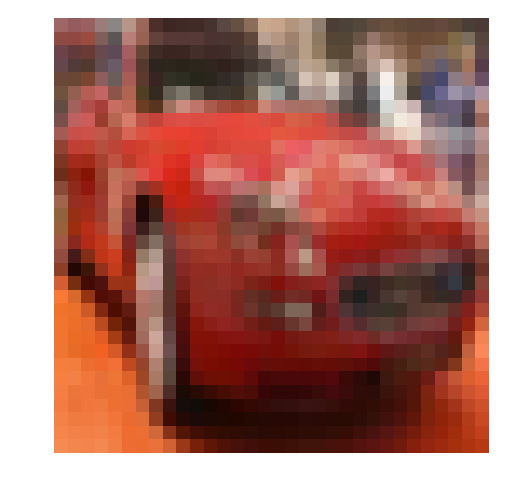

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## 实现预处理函数

### 标准化

在下面的单元中，实现 `normalize` 函数，传入图片数据 `x`，并返回标准化 Numpy 数组。值应该在 0 到 1 的范围内（含 0 和 1）。返回对象应该和 `x` 的形状一样。


In [3]:
import numpy as np


def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    result = np.array(x, dtype=np.float32) / 255
    return result


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed

### One-hot 编码

和之前的代码单元一样，你将为预处理实现一个函数。这次，你将实现 `one_hot_encode` 函数。输入，也就是 `x`，是一个标签列表。实现该函数，以返回为 one_hot 编码的 Numpy 数组的标签列表。标签的可能值为 0 到 9。每次调用 `one_hot_encode` 时，对于每个值，one_hot 编码函数应该返回相同的编码。确保将编码映射保存到该函数外面。

提示：不要重复发明轮子。


In [4]:
from sklearn.preprocessing import LabelBinarizer

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    label_binarizer = LabelBinarizer() 
    label_binarizer.fit(range(10))
    return label_binarizer.transform(x)
    
    # x_size = len(x)
    # x_max = 10  # 这里不使用 max(x) + 1,为了防止测试样本中没有最大值
    # result = np.zeros((x_size, x_max), dtype=int)
    # result[np.arange(x_size), x] = 1
    # 
    # return result
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed

### 随机化数据

之前探索数据时，你已经了解到，样本的顺序是随机的。再随机化一次也不会有什么关系，但是对于这个数据集没有必要。


## 预处理所有数据并保存

运行下方的代码单元，将预处理所有 CIFAR-10 数据，并保存到文件中。下面的代码还使用了 10% 的训练数据，用来验证。


In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# 检查点

这是你的第一个检查点。如果你什么时候决定再回到该记事本，或需要重新启动该记事本，你可以从这里开始。预处理的数据已保存到本地。


In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## 构建网络

对于该神经网络，你需要将每层都构建为一个函数。你看到的大部分代码都位于函数外面。要更全面地测试你的代码，我们需要你将每层放入一个函数中。这样使我们能够提供更好的反馈，并使用我们的统一测试检测简单的错误，然后再提交项目。

>**注意**：如果你觉得每周很难抽出足够的时间学习这门课程，我们为此项目提供了一个小捷径。对于接下来的几个问题，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 程序包中的类来构建每个层级，但是“卷积和最大池化层级”部分的层级除外。TF Layers 和 Keras 及 TFLearn 层级类似，因此很容易学会。

>但是，如果你想充分利用这门课程，请尝试自己解决所有问题，不使用 TF Layers 程序包中的任何类。你依然可以使用其他程序包中的类，这些类和你在 TF Layers 中的类名称是一样的！例如，你可以使用 TF Neural Network 版本的 `conv2d` 类 [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)，而不是 TF Layers 版本的 `conv2d` 类 [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d)。

我们开始吧！


### 输入

神经网络需要读取图片数据、one-hot 编码标签和丢弃保留概率（dropout keep probability）。请实现以下函数：

* 实现 `neural_net_image_input`
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * 使用 `image_shape` 设置形状，部分大小设为 `None`
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 TensorFlow `name` 参数对 TensorFlow 占位符 "x" 命名
* 实现 `neural_net_label_input`
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * 使用 `n_classes` 设置形状，部分大小设为 `None`
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 TensorFlow `name` 参数对 TensorFlow 占位符 "y" 命名
* 实现 `neural_net_keep_prob_input`
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)，用于丢弃保留概率
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 TensorFlow `name` 参数对 TensorFlow 占位符 "keep_prob" 命名

这些名称将在项目结束时，用于加载保存的模型。

注意：TensorFlow 中的 `None` 表示形状可以是动态大小。

In [8]:
import tensorflow as tf


def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1], image_shape[2]], 'x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, [None, n_classes], 'y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)


Image Input Tests Passed.

Label Input Tests Passed.

Keep Prob Tests Passed.

### 卷积和最大池化层

卷积层级适合处理图片。对于此代码单元，你应该实现函数 `conv2d_maxpool` 以便应用卷积然后进行最大池化：

* 使用 `conv_ksize`、`conv_num_outputs` 和 `x_tensor` 的形状创建权重（weight）和偏置（bias）。
* 使用权重和 `conv_strides` 对 `x_tensor` 应用卷积。
 * 建议使用我们建议的间距（padding），当然也可以使用任何其他间距。
* 添加偏置
* 向卷积中添加非线性激活（nonlinear activation）
* 使用 `pool_ksize` 和 `pool_strides` 应用最大池化
 * 建议使用我们建议的间距（padding），当然也可以使用任何其他间距。

**注意**：对于**此层**，**请勿使用** [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers)，但是仍然可以使用 TensorFlow 的 [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) 包。对于所有**其他层**，你依然可以使用快捷方法。


In [9]:


def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # 使用 `conv_ksize`、`conv_num_outputs` 和 `x_tensor` 的形状创建权重（weight）和偏置（bias）。
    
    stddev = 1/np.sqrt(conv_ksize[0] * conv_ksize[1] * x_tensor.get_shape().as_list()[3])
    weight = tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[1],
                                              x_tensor.get_shape().as_list()[3], conv_num_outputs], 0.0, stddev))
    bias = tf.Variable(tf.zeros(conv_num_outputs), tf.float32)
    
    # 使用权重和 `conv_strides` 对 `x_tensor` 应用卷积
    conv_layer = tf.nn.conv2d(x_tensor, weight, 
                              strides=[1, conv_strides[0], conv_strides[1], 1], 
                              padding='SAME')
    
    # 添加偏置
    conv_layer = tf.nn.bias_add(conv_layer, bias)

    # 使用 `pool_ksize` 和 `pool_strides` 应用最大池化
    conv_layer = tf.nn.max_pool(conv_layer, 
                                ksize=[1, pool_ksize[0], pool_ksize[1], 1], 
                                strides=[1, pool_strides[0], pool_strides[1], 1],
                                padding='SAME')
    
    # 向卷积中添加非线性激活（nonlinear activation）
    conv_layer = tf.nn.relu(conv_layer)
    return conv_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed

### 扁平化层

实现 `flatten` 函数，将 `x_tensor` 的维度从四维张量（4-D tensor）变成二维张量。输出应该是形状（*部分大小（Batch Size）*，*扁平化图片大小（Flattened Image Size）*）。快捷方法：对于此层，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的类。如果你想要更大挑战，可以仅使用其他 TensorFlow 程序包。


In [10]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    origin_size = x_tensor.get_shape().as_list()
    return tf.reshape(x_tensor, [-1, origin_size[1]*origin_size[2]*origin_size[3]])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed

### 全连接层

实现 `fully_conn` 函数，以向 `x_tensor` 应用完全连接的层级，形状为（*部分大小（Batch Size）*，*num_outputs*）。快捷方法：对于此层，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的类。如果你想要更大挑战，可以仅使用其他 TensorFlow 程序包。

In [11]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # 设置数据的权重
    input_count = x_tensor.get_shape().as_list()[1]
    weight = tf.Variable(tf.truncated_normal([input_count, num_outputs], 0.0, 1/np.sqrt(input_count)))
    bias = tf.Variable(tf.zeros(num_outputs), tf.float32)
    
    # 创建全连接网络层
    fc1 = tf.add(tf.matmul(x_tensor, weight), bias)
    fc1 = tf.nn.relu(fc1)
    
    return fc1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed

### 输出层

实现 `output` 函数，向 x_tensor 应用完全连接的层级，形状为（*部分大小（Batch Size）*，*num_outputs*）。快捷方法：对于此层，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的类。如果你想要更大挑战，可以仅使用其他 TensorFlow 程序包。

**注意**：该层级不应应用 Activation、softmax 或交叉熵（cross entropy）。

In [12]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    weight = tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1], num_outputs],
                                             0.0, 1/np.sqrt(num_outputs)))
    bias = tf.Variable(tf.zeros(num_outputs), tf.float32)
    
    # 创建全连接网络层
    fc1 = tf.add(tf.matmul(x_tensor, weight), bias)
    
    return fc1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed

### 创建卷积模型

实现函数 `conv_net`， 创建卷积神经网络模型。该函数传入一批图片 `x`，并输出对数（logits）。使用你在上方创建的层创建此模型：

* 应用 1、2 或 3 个卷积和最大池化层（Convolution and Max Pool layers）
* 应用一个扁平层（Flatten Layer）
* 应用 1、2 或 3 个完全连接层（Fully Connected Layers）
* 应用一个输出层（Output Layer）
* 返回输出
* 使用 `keep_prob` 向模型中的一个或多个层应用 [TensorFlow 的 Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout)

In [50]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    layer_num_outputs = [32, 32, 32]
    conv_ksizes = [[3, 3], [3, 3], [5, 5]]
    conv_strides = [[1, 1], [1, 1], [1, 1]]
    pool_ksizes = [[2, 2], [2, 2], [2, 2]]
    pool_strides = [[2, 2], [2, 2], [2, 2]]
    
    con = conv2d_maxpool(x, layer_num_outputs[0], conv_ksizes[0], conv_strides[0], pool_ksizes[0], pool_strides[0])
    con = conv2d_maxpool(con, layer_num_outputs[1], conv_ksizes[1], conv_strides[1], pool_ksizes[1], 
                         pool_strides[1])
    # con = conv2d_maxpool(con, layer_num_outputs[2], conv_ksizes[2], conv_strides[2], pool_ksizes[2], 
    #                         pool_strides[2])
    con = tf.nn.dropout(con, keep_prob)
    
    # Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flattened_tensor = flatten(con)

    # Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    f_num_outpus = [128, 64, 256]
    fnn = fully_conn(flattened_tensor, f_num_outpus[0])
    fnn = tf.nn.dropout(fnn, keep_prob)
    fnn = fully_conn(fnn, f_num_outpus[1])
    fnn = tf.nn.dropout(fnn, keep_prob)
    # fnn = fully_conn(fnn, f_num_outpus[2])
    # fnn = tf.nn.dropout(fnn, keep_prob)
    
    
    # Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    return output(fnn, 10)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!

## 训练神经网络

### 单次优化

实现函数 `train_neural_network` 以进行单次优化（single optimization）。该优化应该使用 `optimizer` 优化 `session`，其中 `feed_dict` 具有以下参数：

* `x` 表示图片输入
* `y` 表示标签
* `keep_prob` 表示丢弃的保留率

每个部分都会调用该函数，所以 `tf.global_variables_initializer()` 已经被调用。

注意：不需要返回任何内容。该函数只是用来优化神经网络。


In [51]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # session.run(tf.global_variables_initializer())
    session.run(optimizer, feed_dict={
                x: feature_batch,
                y: label_batch,
                keep_prob: keep_probability})
            

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed

### 显示数据

实现函数 `print_stats` 以输出损失和验证准确率。使用全局变量 `valid_features` 和 `valid_labels` 计算验证准确率。使用保留率 `1.0` 计算损失和验证准确率（loss and validation accuracy）。


In [52]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    
    # 打印训练集的数据主要是为了评估模型是欠拟合还是过拟合
    train_batch_accuracy = session.run(accuracy, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1})
    train_batch_cost = session.run(cost, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1})
    
    validation_accuracy = session.run(accuracy, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1})
    validation_cost = session.run(cost, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1})
    
    # 打印训练集的数据主要是为了评估模型是欠拟合还是过拟合
    print('validation_cost:' + str(validation_cost) + ",validation_accuracy:" + str(validation_accuracy) +
          ",train_batch_cost:" + str(train_batch_cost) + ",train_batch_accuracy" + str(train_batch_accuracy))


### 超参数

调试以下超参数：
* 设置 `epochs` 表示神经网络停止学习或开始过拟合的迭代次数
* 设置 `batch_size`，表示机器内存允许的部分最大体积。大部分人设为以下常见内存大小：

 * 64
 * 128
 * 256
 * ...
* 设置 `keep_probability` 表示使用丢弃时保留节点的概率

In [53]:
# TODO: Tune Parameters
epochs = 70
batch_size = 256
keep_probability = 0.75

### 在单个 CIFAR-10 部分上训练

我们先用单个部分，而不是用所有的 CIFAR-10 批次训练神经网络。这样可以节省时间，并对模型进行迭代，以提高准确率。最终验证准确率达到 50% 或以上之后，在下一部分对所有数据运行模型。


In [54]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...

Epoch  1, CIFAR-10 Batch 1:  

validation_cost:2.03421,validation_accuracy:0.2854,train_batch_cost:2.19709,train_batch_accuracy0.25

Epoch  2, CIFAR-10 Batch 1:  

validation_cost:1.79346,validation_accuracy:0.3634,train_batch_cost:1.98232,train_batch_accuracy0.35

Epoch  3, CIFAR-10 Batch 1:  

validation_cost:1.65422,validation_accuracy:0.4068,train_batch_cost:1.75746,train_batch_accuracy0.475

Epoch  4, CIFAR-10 Batch 1:  

validation_cost:1.50527,validation_accuracy:0.4592,train_batch_cost:1.53081,train_batch_accuracy0.5

Epoch  5, CIFAR-10 Batch 1:  

validation_cost:1.45895,validation_accuracy:0.4778,train_batch_cost:1.35564,train_batch_accuracy0.575

Epoch  6, CIFAR-10 Batch 1:  

validation_cost:1.43913,validation_accuracy:0.4738,train_batch_cost:1.16265,train_batch_accuracy0.6

Epoch  7, CIFAR-10 Batch 1:  

validation_cost:1.3756,validation_accuracy:0.5002,train_batch_cost:1.134,train_batch_accuracy0.625

Epoch  8, CIFAR-10 Batch 1:  

validation_cost:1.37978,validation_accuracy:0.5042,train_batch_cost:0.989853,train_batch_accuracy0.675

Epoch  9, CIFAR-10 Batch 1:  

validation_cost:1.33208,validation_accuracy:0.5214,train_batch_cost:0.856391,train_batch_accuracy0.725

Epoch 10, CIFAR-10 Batch 1:  

validation_cost:1.35043,validation_accuracy:0.5164,train_batch_cost:0.832078,train_batch_accuracy0.75

Epoch 11, CIFAR-10 Batch 1:  

validation_cost:1.28969,validation_accuracy:0.5368,train_batch_cost:0.790347,train_batch_accuracy0.8

Epoch 12, CIFAR-10 Batch 1:  

validation_cost:1.30142,validation_accuracy:0.531,train_batch_cost:0.736556,train_batch_accuracy0.825

Epoch 13, CIFAR-10 Batch 1:  

validation_cost:1.29976,validation_accuracy:0.539,train_batch_cost:0.692013,train_batch_accuracy0.825

Epoch 14, CIFAR-10 Batch 1:  

validation_cost:1.24482,validation_accuracy:0.5574,train_batch_cost:0.630699,train_batch_accuracy0.825

Epoch 15, CIFAR-10 Batch 1:  

validation_cost:1.24733,validation_accuracy:0.5544,train_batch_cost:0.577379,train_batch_accuracy0.875

Epoch 16, CIFAR-10 Batch 1:  

validation_cost:1.22472,validation_accuracy:0.5634,train_batch_cost:0.550997,train_batch_accuracy0.875

Epoch 17, CIFAR-10 Batch 1:  

validation_cost:1.23046,validation_accuracy:0.5594,train_batch_cost:0.499578,train_batch_accuracy0.875

Epoch 18, CIFAR-10 Batch 1:  

validation_cost:1.24618,validation_accuracy:0.55,train_batch_cost:0.476897,train_batch_accuracy0.875

Epoch 19, CIFAR-10 Batch 1:  

validation_cost:1.27066,validation_accuracy:0.5478,train_batch_cost:0.453539,train_batch_accuracy0.875

Epoch 20, CIFAR-10 Batch 1:  

validation_cost:1.27965,validation_accuracy:0.5472,train_batch_cost:0.418756,train_batch_accuracy0.875

Epoch 21, CIFAR-10 Batch 1:  

validation_cost:1.21016,validation_accuracy:0.5676,train_batch_cost:0.363167,train_batch_accuracy0.9

Epoch 22, CIFAR-10 Batch 1:  

validation_cost:1.20563,validation_accuracy:0.5646,train_batch_cost:0.335103,train_batch_accuracy0.925

Epoch 23, CIFAR-10 Batch 1:  

validation_cost:1.17979,validation_accuracy:0.578,train_batch_cost:0.31271,train_batch_accuracy0.95

Epoch 24, CIFAR-10 Batch 1:  

validation_cost:1.18499,validation_accuracy:0.5764,train_batch_cost:0.275439,train_batch_accuracy0.925

Epoch 25, CIFAR-10 Batch 1:  

validation_cost:1.20683,validation_accuracy:0.5716,train_batch_cost:0.269813,train_batch_accuracy0.95

Epoch 26, CIFAR-10 Batch 1:  

validation_cost:1.22882,validation_accuracy:0.5614,train_batch_cost:0.285235,train_batch_accuracy0.975

Epoch 27, CIFAR-10 Batch 1:  

validation_cost:1.18584,validation_accuracy:0.5754,train_batch_cost:0.241845,train_batch_accuracy1.0

Epoch 28, CIFAR-10 Batch 1:  

validation_cost:1.18761,validation_accuracy:0.587,train_batch_cost:0.195355,train_batch_accuracy1.0

Epoch 29, CIFAR-10 Batch 1:  

validation_cost:1.17571,validation_accuracy:0.593,train_batch_cost:0.196996,train_batch_accuracy0.975

Epoch 30, CIFAR-10 Batch 1:  

validation_cost:1.18834,validation_accuracy:0.5932,train_batch_cost:0.166725,train_batch_accuracy1.0

Epoch 31, CIFAR-10 Batch 1:  

validation_cost:1.18718,validation_accuracy:0.5924,train_batch_cost:0.147308,train_batch_accuracy1.0

Epoch 32, CIFAR-10 Batch 1:  

validation_cost:1.17343,validation_accuracy:0.5974,train_batch_cost:0.141158,train_batch_accuracy1.0

Epoch 33, CIFAR-10 Batch 1:  

validation_cost:1.22436,validation_accuracy:0.5766,train_batch_cost:0.126873,train_batch_accuracy1.0

Epoch 34, CIFAR-10 Batch 1:  

validation_cost:1.1949,validation_accuracy:0.5922,train_batch_cost:0.129392,train_batch_accuracy1.0

Epoch 35, CIFAR-10 Batch 1:  

validation_cost:1.19181,validation_accuracy:0.601,train_batch_cost:0.108535,train_batch_accuracy1.0

Epoch 36, CIFAR-10 Batch 1:  

validation_cost:1.19029,validation_accuracy:0.6004,train_batch_cost:0.0967816,train_batch_accuracy1.0

Epoch 37, CIFAR-10 Batch 1:  

validation_cost:1.21327,validation_accuracy:0.5928,train_batch_cost:0.0974549,train_batch_accuracy1.0

Epoch 38, CIFAR-10 Batch 1:  

validation_cost:1.20633,validation_accuracy:0.601,train_batch_cost:0.081462,train_batch_accuracy1.0

Epoch 39, CIFAR-10 Batch 1:  

validation_cost:1.20811,validation_accuracy:0.5964,train_batch_cost:0.0765186,train_batch_accuracy1.0

Epoch 40, CIFAR-10 Batch 1:  

validation_cost:1.19869,validation_accuracy:0.5964,train_batch_cost:0.0767184,train_batch_accuracy1.0

Epoch 41, CIFAR-10 Batch 1:  

validation_cost:1.25208,validation_accuracy:0.589,train_batch_cost:0.0666954,train_batch_accuracy1.0

Epoch 42, CIFAR-10 Batch 1:  

validation_cost:1.22654,validation_accuracy:0.5966,train_batch_cost:0.0665349,train_batch_accuracy1.0

Epoch 43, CIFAR-10 Batch 1:  

validation_cost:1.25972,validation_accuracy:0.5884,train_batch_cost:0.056013,train_batch_accuracy1.0

Epoch 44, CIFAR-10 Batch 1:  

validation_cost:1.26089,validation_accuracy:0.5918,train_batch_cost:0.059584,train_batch_accuracy1.0

Epoch 45, CIFAR-10 Batch 1:  

validation_cost:1.19781,validation_accuracy:0.603,train_batch_cost:0.0511863,train_batch_accuracy1.0

Epoch 46, CIFAR-10 Batch 1:  

validation_cost:1.24494,validation_accuracy:0.603,train_batch_cost:0.0451785,train_batch_accuracy1.0

Epoch 47, CIFAR-10 Batch 1:  

validation_cost:1.28457,validation_accuracy:0.5928,train_batch_cost:0.0407347,train_batch_accuracy1.0

Epoch 48, CIFAR-10 Batch 1:  

validation_cost:1.26452,validation_accuracy:0.5984,train_batch_cost:0.0351644,train_batch_accuracy1.0

Epoch 49, CIFAR-10 Batch 1:  

validation_cost:1.26134,validation_accuracy:0.5952,train_batch_cost:0.0356226,train_batch_accuracy1.0

Epoch 50, CIFAR-10 Batch 1:  

validation_cost:1.26776,validation_accuracy:0.5938,train_batch_cost:0.0419404,train_batch_accuracy1.0

Epoch 51, CIFAR-10 Batch 1:  

validation_cost:1.28986,validation_accuracy:0.5972,train_batch_cost:0.0371505,train_batch_accuracy1.0

Epoch 52, CIFAR-10 Batch 1:  

validation_cost:1.30998,validation_accuracy:0.589,train_batch_cost:0.0358032,train_batch_accuracy1.0

Epoch 53, CIFAR-10 Batch 1:  

validation_cost:1.32793,validation_accuracy:0.5844,train_batch_cost:0.0320345,train_batch_accuracy1.0

Epoch 54, CIFAR-10 Batch 1:  

validation_cost:1.37742,validation_accuracy:0.574,train_batch_cost:0.0386695,train_batch_accuracy1.0

Epoch 55, CIFAR-10 Batch 1:  

validation_cost:1.34237,validation_accuracy:0.5802,train_batch_cost:0.0360723,train_batch_accuracy1.0

Epoch 56, CIFAR-10 Batch 1:  

validation_cost:1.42851,validation_accuracy:0.564,train_batch_cost:0.0368468,train_batch_accuracy1.0

Epoch 57, CIFAR-10 Batch 1:  

validation_cost:1.29966,validation_accuracy:0.5914,train_batch_cost:0.039169,train_batch_accuracy1.0

Epoch 58, CIFAR-10 Batch 1:  

validation_cost:1.33483,validation_accuracy:0.5914,train_batch_cost:0.0268132,train_batch_accuracy1.0

Epoch 59, CIFAR-10 Batch 1:  

validation_cost:1.32024,validation_accuracy:0.588,train_batch_cost:0.0307037,train_batch_accuracy1.0

Epoch 60, CIFAR-10 Batch 1:  

validation_cost:1.33357,validation_accuracy:0.5952,train_batch_cost:0.0219163,train_batch_accuracy1.0

Epoch 61, CIFAR-10 Batch 1:  

validation_cost:1.35811,validation_accuracy:0.5866,train_batch_cost:0.0305532,train_batch_accuracy1.0

Epoch 62, CIFAR-10 Batch 1:  

validation_cost:1.33735,validation_accuracy:0.5976,train_batch_cost:0.0318837,train_batch_accuracy1.0

Epoch 63, CIFAR-10 Batch 1:  

validation_cost:1.3078,validation_accuracy:0.6,train_batch_cost:0.0178939,train_batch_accuracy1.0

Epoch 64, CIFAR-10 Batch 1:  

validation_cost:1.36295,validation_accuracy:0.602,train_batch_cost:0.0143321,train_batch_accuracy1.0

Epoch 65, CIFAR-10 Batch 1:  

validation_cost:1.34637,validation_accuracy:0.6018,train_batch_cost:0.0173625,train_batch_accuracy1.0

Epoch 66, CIFAR-10 Batch 1:  

validation_cost:1.36824,validation_accuracy:0.6086,train_batch_cost:0.0148464,train_batch_accuracy1.0

Epoch 67, CIFAR-10 Batch 1:  

validation_cost:1.33946,validation_accuracy:0.6018,train_batch_cost:0.0131705,train_batch_accuracy1.0

Epoch 68, CIFAR-10 Batch 1:  

validation_cost:1.41254,validation_accuracy:0.6012,train_batch_cost:0.0162145,train_batch_accuracy1.0

Epoch 69, CIFAR-10 Batch 1:  

validation_cost:1.3589,validation_accuracy:0.6134,train_batch_cost:0.0141924,train_batch_accuracy1.0

Epoch 70, CIFAR-10 Batch 1:  

validation_cost:1.40111,validation_accuracy:0.5984,train_batch_cost:0.0191869,train_batch_accuracy1.0

### 完全训练模型

现在，单个 CIFAR-10 部分的准确率已经不错了，试试所有五个部分吧。

In [55]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...

Epoch  1, CIFAR-10 Batch 1:  

validation_cost:1.96093,validation_accuracy:0.3004,train_batch_cost:1.98582,train_batch_accuracy0.325

Epoch  1, CIFAR-10 Batch 2:  

validation_cost:1.66424,validation_accuracy:0.3984,train_batch_cost:1.69633,train_batch_accuracy0.375

Epoch  1, CIFAR-10 Batch 3:  

validation_cost:1.58398,validation_accuracy:0.429,train_batch_cost:1.52368,train_batch_accuracy0.4

Epoch  1, CIFAR-10 Batch 4:  

validation_cost:1.55998,validation_accuracy:0.44,train_batch_cost:1.52272,train_batch_accuracy0.425

Epoch  1, CIFAR-10 Batch 5:  

validation_cost:1.45214,validation_accuracy:0.4828,train_batch_cost:1.54001,train_batch_accuracy0.5

Epoch  2, CIFAR-10 Batch 1:  

validation_cost:1.38577,validation_accuracy:0.4994,train_batch_cost:1.49403,train_batch_accuracy0.5

Epoch  2, CIFAR-10 Batch 2:  

validation_cost:1.33919,validation_accuracy:0.5112,train_batch_cost:1.25036,train_batch_accuracy0.55

Epoch  2, CIFAR-10 Batch 3:  

validation_cost:1.31699,validation_accuracy:0.5286,train_batch_cost:1.13364,train_batch_accuracy0.525

Epoch  2, CIFAR-10 Batch 4:  

validation_cost:1.32313,validation_accuracy:0.531,train_batch_cost:1.2413,train_batch_accuracy0.625

Epoch  2, CIFAR-10 Batch 5:  

validation_cost:1.25496,validation_accuracy:0.5594,train_batch_cost:1.24266,train_batch_accuracy0.625

Epoch  3, CIFAR-10 Batch 1:  

validation_cost:1.236,validation_accuracy:0.5512,train_batch_cost:1.29121,train_batch_accuracy0.575

Epoch  3, CIFAR-10 Batch 2:  

validation_cost:1.18889,validation_accuracy:0.5718,train_batch_cost:0.898108,train_batch_accuracy0.775

Epoch  3, CIFAR-10 Batch 3:  

validation_cost:1.1645,validation_accuracy:0.5834,train_batch_cost:0.920686,train_batch_accuracy0.675

Epoch  3, CIFAR-10 Batch 4:  

validation_cost:1.14183,validation_accuracy:0.5882,train_batch_cost:0.995749,train_batch_accuracy0.7

Epoch  3, CIFAR-10 Batch 5:  

validation_cost:1.11418,validation_accuracy:0.6054,train_batch_cost:0.975604,train_batch_accuracy0.7

Epoch  4, CIFAR-10 Batch 1:  

validation_cost:1.14232,validation_accuracy:0.5974,train_batch_cost:0.973516,train_batch_accuracy0.675

Epoch  4, CIFAR-10 Batch 2:  

validation_cost:1.10084,validation_accuracy:0.604,train_batch_cost:0.823321,train_batch_accuracy0.75

Epoch  4, CIFAR-10 Batch 3:  

validation_cost:1.10889,validation_accuracy:0.6092,train_batch_cost:0.844883,train_batch_accuracy0.8

Epoch  4, CIFAR-10 Batch 4:  

validation_cost:1.07766,validation_accuracy:0.6162,train_batch_cost:0.850801,train_batch_accuracy0.725

Epoch  4, CIFAR-10 Batch 5:  

validation_cost:1.04639,validation_accuracy:0.6296,train_batch_cost:0.801439,train_batch_accuracy0.8

Epoch  5, CIFAR-10 Batch 1:  

validation_cost:1.09036,validation_accuracy:0.6176,train_batch_cost:0.804494,train_batch_accuracy0.725

Epoch  5, CIFAR-10 Batch 2:  

validation_cost:1.04058,validation_accuracy:0.6312,train_batch_cost:0.66881,train_batch_accuracy0.825

Epoch  5, CIFAR-10 Batch 3:  

validation_cost:1.03667,validation_accuracy:0.6404,train_batch_cost:0.737961,train_batch_accuracy0.775

Epoch  5, CIFAR-10 Batch 4:  

validation_cost:1.00466,validation_accuracy:0.6482,train_batch_cost:0.731412,train_batch_accuracy0.7

Epoch  5, CIFAR-10 Batch 5:  

validation_cost:0.992917,validation_accuracy:0.6528,train_batch_cost:0.692825,train_batch_accuracy0.8

Epoch  6, CIFAR-10 Batch 1:  

validation_cost:1.04572,validation_accuracy:0.6392,train_batch_cost:0.740938,train_batch_accuracy0.775

Epoch  6, CIFAR-10 Batch 2:  

validation_cost:1.0019,validation_accuracy:0.6466,train_batch_cost:0.547252,train_batch_accuracy0.825

Epoch  6, CIFAR-10 Batch 3:  

validation_cost:0.975019,validation_accuracy:0.6582,train_batch_cost:0.596516,train_batch_accuracy0.85

Epoch  6, CIFAR-10 Batch 4:  

validation_cost:0.975628,validation_accuracy:0.6616,train_batch_cost:0.561155,train_batch_accuracy0.8

Epoch  6, CIFAR-10 Batch 5:  

validation_cost:0.956118,validation_accuracy:0.6612,train_batch_cost:0.603273,train_batch_accuracy0.825

Epoch  7, CIFAR-10 Batch 1:  

validation_cost:1.01445,validation_accuracy:0.651,train_batch_cost:0.658231,train_batch_accuracy0.775

Epoch  7, CIFAR-10 Batch 2:  

validation_cost:0.956243,validation_accuracy:0.6628,train_batch_cost:0.457023,train_batch_accuracy0.925

Epoch  7, CIFAR-10 Batch 3:  

validation_cost:0.967517,validation_accuracy:0.6638,train_batch_cost:0.509611,train_batch_accuracy0.9

Epoch  7, CIFAR-10 Batch 4:  

validation_cost:0.933506,validation_accuracy:0.67,train_batch_cost:0.469581,train_batch_accuracy0.9

Epoch  7, CIFAR-10 Batch 5:  

validation_cost:0.919565,validation_accuracy:0.686,train_batch_cost:0.539186,train_batch_accuracy0.875

Epoch  8, CIFAR-10 Batch 1:  

validation_cost:1.00097,validation_accuracy:0.6586,train_batch_cost:0.586928,train_batch_accuracy0.8

Epoch  8, CIFAR-10 Batch 2:  

validation_cost:0.938378,validation_accuracy:0.6676,train_batch_cost:0.454426,train_batch_accuracy0.9

Epoch  8, CIFAR-10 Batch 3:  

validation_cost:0.933205,validation_accuracy:0.6748,train_batch_cost:0.426236,train_batch_accuracy0.9

Epoch  8, CIFAR-10 Batch 4:  

validation_cost:0.92111,validation_accuracy:0.6778,train_batch_cost:0.47866,train_batch_accuracy0.825

Epoch  8, CIFAR-10 Batch 5:  

validation_cost:0.902384,validation_accuracy:0.6846,train_batch_cost:0.488404,train_batch_accuracy0.925

Epoch  9, CIFAR-10 Batch 1:  

validation_cost:0.969981,validation_accuracy:0.6642,train_batch_cost:0.5072,train_batch_accuracy0.825

Epoch  9, CIFAR-10 Batch 2:  

validation_cost:0.911929,validation_accuracy:0.6794,train_batch_cost:0.327007,train_batch_accuracy0.975

Epoch  9, CIFAR-10 Batch 3:  

validation_cost:0.934859,validation_accuracy:0.6702,train_batch_cost:0.409034,train_batch_accuracy0.95

Epoch  9, CIFAR-10 Batch 4:  

validation_cost:0.900606,validation_accuracy:0.6912,train_batch_cost:0.391806,train_batch_accuracy0.9

Epoch  9, CIFAR-10 Batch 5:  

validation_cost:0.908777,validation_accuracy:0.683,train_batch_cost:0.449667,train_batch_accuracy0.925

Epoch 10, CIFAR-10 Batch 1:  

validation_cost:0.925151,validation_accuracy:0.6836,train_batch_cost:0.456145,train_batch_accuracy0.85

Epoch 10, CIFAR-10 Batch 2:  

validation_cost:0.904222,validation_accuracy:0.686,train_batch_cost:0.33789,train_batch_accuracy0.9

Epoch 10, CIFAR-10 Batch 3:  

validation_cost:0.91335,validation_accuracy:0.6804,train_batch_cost:0.370518,train_batch_accuracy0.95

Epoch 10, CIFAR-10 Batch 4:  

validation_cost:0.881492,validation_accuracy:0.6944,train_batch_cost:0.356184,train_batch_accuracy0.925

Epoch 10, CIFAR-10 Batch 5:  

validation_cost:0.890363,validation_accuracy:0.6886,train_batch_cost:0.399151,train_batch_accuracy0.925

Epoch 11, CIFAR-10 Batch 1:  

validation_cost:0.90294,validation_accuracy:0.6916,train_batch_cost:0.444836,train_batch_accuracy0.875

Epoch 11, CIFAR-10 Batch 2:  

validation_cost:0.879185,validation_accuracy:0.694,train_batch_cost:0.293656,train_batch_accuracy0.95

Epoch 11, CIFAR-10 Batch 3:  

validation_cost:0.883868,validation_accuracy:0.6974,train_batch_cost:0.299814,train_batch_accuracy0.925

Epoch 11, CIFAR-10 Batch 4:  

validation_cost:0.882824,validation_accuracy:0.6978,train_batch_cost:0.352742,train_batch_accuracy0.95

Epoch 11, CIFAR-10 Batch 5:  

validation_cost:0.866134,validation_accuracy:0.6974,train_batch_cost:0.372511,train_batch_accuracy0.925

Epoch 12, CIFAR-10 Batch 1:  

validation_cost:0.905079,validation_accuracy:0.688,train_batch_cost:0.410011,train_batch_accuracy0.875

Epoch 12, CIFAR-10 Batch 2:  

validation_cost:0.885528,validation_accuracy:0.69,train_batch_cost:0.288708,train_batch_accuracy0.975

Epoch 12, CIFAR-10 Batch 3:  

validation_cost:0.874569,validation_accuracy:0.692,train_batch_cost:0.282442,train_batch_accuracy0.975

Epoch 12, CIFAR-10 Batch 4:  

validation_cost:0.872685,validation_accuracy:0.7,train_batch_cost:0.318866,train_batch_accuracy0.95

Epoch 12, CIFAR-10 Batch 5:  

validation_cost:0.867823,validation_accuracy:0.7002,train_batch_cost:0.313295,train_batch_accuracy0.95

Epoch 13, CIFAR-10 Batch 1:  

validation_cost:0.875402,validation_accuracy:0.7016,train_batch_cost:0.365566,train_batch_accuracy0.9

Epoch 13, CIFAR-10 Batch 2:  

validation_cost:0.905741,validation_accuracy:0.6818,train_batch_cost:0.274931,train_batch_accuracy0.95

Epoch 13, CIFAR-10 Batch 3:  

validation_cost:0.854481,validation_accuracy:0.7034,train_batch_cost:0.261795,train_batch_accuracy0.975

Epoch 13, CIFAR-10 Batch 4:  

validation_cost:0.873171,validation_accuracy:0.7018,train_batch_cost:0.279811,train_batch_accuracy0.975

Epoch 13, CIFAR-10 Batch 5:  

validation_cost:0.866207,validation_accuracy:0.7036,train_batch_cost:0.312625,train_batch_accuracy0.95

Epoch 14, CIFAR-10 Batch 1:  

validation_cost:0.871099,validation_accuracy:0.7014,train_batch_cost:0.365224,train_batch_accuracy0.9

Epoch 14, CIFAR-10 Batch 2:  

validation_cost:0.867515,validation_accuracy:0.7,train_batch_cost:0.239579,train_batch_accuracy0.975

Epoch 14, CIFAR-10 Batch 3:  

validation_cost:0.857268,validation_accuracy:0.7046,train_batch_cost:0.256302,train_batch_accuracy0.95

Epoch 14, CIFAR-10 Batch 4:  

validation_cost:0.840664,validation_accuracy:0.7148,train_batch_cost:0.284722,train_batch_accuracy0.925

Epoch 14, CIFAR-10 Batch 5:  

validation_cost:0.839356,validation_accuracy:0.7048,train_batch_cost:0.258256,train_batch_accuracy0.975

Epoch 15, CIFAR-10 Batch 1:  

validation_cost:0.837937,validation_accuracy:0.708,train_batch_cost:0.292876,train_batch_accuracy0.925

Epoch 15, CIFAR-10 Batch 2:  

validation_cost:0.855484,validation_accuracy:0.6978,train_batch_cost:0.237899,train_batch_accuracy0.975

Epoch 15, CIFAR-10 Batch 3:  

validation_cost:0.838837,validation_accuracy:0.7098,train_batch_cost:0.21663,train_batch_accuracy0.975

Epoch 15, CIFAR-10 Batch 4:  

validation_cost:0.863094,validation_accuracy:0.6988,train_batch_cost:0.258022,train_batch_accuracy0.925

Epoch 15, CIFAR-10 Batch 5:  

validation_cost:0.86442,validation_accuracy:0.7034,train_batch_cost:0.246635,train_batch_accuracy0.95

Epoch 16, CIFAR-10 Batch 1:  

validation_cost:0.845207,validation_accuracy:0.708,train_batch_cost:0.311936,train_batch_accuracy0.95

Epoch 16, CIFAR-10 Batch 2:  

validation_cost:0.837356,validation_accuracy:0.7016,train_batch_cost:0.223567,train_batch_accuracy0.95

Epoch 16, CIFAR-10 Batch 3:  

validation_cost:0.858054,validation_accuracy:0.711,train_batch_cost:0.17872,train_batch_accuracy1.0

Epoch 16, CIFAR-10 Batch 4:  

validation_cost:0.839605,validation_accuracy:0.7118,train_batch_cost:0.215708,train_batch_accuracy0.95

Epoch 16, CIFAR-10 Batch 5:  

validation_cost:0.823105,validation_accuracy:0.7094,train_batch_cost:0.217915,train_batch_accuracy0.975

Epoch 17, CIFAR-10 Batch 1:  

validation_cost:0.829861,validation_accuracy:0.7146,train_batch_cost:0.284228,train_batch_accuracy0.95

Epoch 17, CIFAR-10 Batch 2:  

validation_cost:0.84783,validation_accuracy:0.7054,train_batch_cost:0.171037,train_batch_accuracy0.975

Epoch 17, CIFAR-10 Batch 3:  

validation_cost:0.828507,validation_accuracy:0.7128,train_batch_cost:0.181986,train_batch_accuracy1.0

Epoch 17, CIFAR-10 Batch 4:  

validation_cost:0.844662,validation_accuracy:0.7102,train_batch_cost:0.248091,train_batch_accuracy0.95

Epoch 17, CIFAR-10 Batch 5:  

validation_cost:0.836417,validation_accuracy:0.7126,train_batch_cost:0.209801,train_batch_accuracy0.975

Epoch 18, CIFAR-10 Batch 1:  

validation_cost:0.830084,validation_accuracy:0.7142,train_batch_cost:0.248004,train_batch_accuracy0.95

Epoch 18, CIFAR-10 Batch 2:  

validation_cost:0.84085,validation_accuracy:0.7088,train_batch_cost:0.169853,train_batch_accuracy1.0

Epoch 18, CIFAR-10 Batch 3:  

validation_cost:0.862314,validation_accuracy:0.7056,train_batch_cost:0.165415,train_batch_accuracy1.0

Epoch 18, CIFAR-10 Batch 4:  

validation_cost:0.836498,validation_accuracy:0.7112,train_batch_cost:0.195155,train_batch_accuracy0.975

Epoch 18, CIFAR-10 Batch 5:  

validation_cost:0.846576,validation_accuracy:0.7092,train_batch_cost:0.197697,train_batch_accuracy0.975

Epoch 19, CIFAR-10 Batch 1:  

validation_cost:0.82989,validation_accuracy:0.7158,train_batch_cost:0.241795,train_batch_accuracy0.95

Epoch 19, CIFAR-10 Batch 2:  

validation_cost:0.858572,validation_accuracy:0.7048,train_batch_cost:0.166034,train_batch_accuracy0.975

Epoch 19, CIFAR-10 Batch 3:  

validation_cost:0.830397,validation_accuracy:0.715,train_batch_cost:0.153615,train_batch_accuracy1.0

Epoch 19, CIFAR-10 Batch 4:  

validation_cost:0.828214,validation_accuracy:0.7124,train_batch_cost:0.186933,train_batch_accuracy0.975

Epoch 19, CIFAR-10 Batch 5:  

validation_cost:0.84098,validation_accuracy:0.7112,train_batch_cost:0.170609,train_batch_accuracy0.975

Epoch 20, CIFAR-10 Batch 1:  

validation_cost:0.818493,validation_accuracy:0.7214,train_batch_cost:0.214755,train_batch_accuracy0.95

Epoch 20, CIFAR-10 Batch 2:  

validation_cost:0.846711,validation_accuracy:0.7074,train_batch_cost:0.180879,train_batch_accuracy1.0

Epoch 20, CIFAR-10 Batch 3:  

validation_cost:0.823394,validation_accuracy:0.7176,train_batch_cost:0.159761,train_batch_accuracy1.0

Epoch 20, CIFAR-10 Batch 4:  

validation_cost:0.856313,validation_accuracy:0.7124,train_batch_cost:0.20816,train_batch_accuracy0.95

Epoch 20, CIFAR-10 Batch 5:  

validation_cost:0.818755,validation_accuracy:0.7204,train_batch_cost:0.148957,train_batch_accuracy0.975

Epoch 21, CIFAR-10 Batch 1:  

validation_cost:0.813126,validation_accuracy:0.7204,train_batch_cost:0.220086,train_batch_accuracy0.95

Epoch 21, CIFAR-10 Batch 2:  

validation_cost:0.834067,validation_accuracy:0.7122,train_batch_cost:0.147926,train_batch_accuracy1.0

Epoch 21, CIFAR-10 Batch 3:  

validation_cost:0.823332,validation_accuracy:0.7126,train_batch_cost:0.143921,train_batch_accuracy1.0

Epoch 21, CIFAR-10 Batch 4:  

validation_cost:0.832464,validation_accuracy:0.7112,train_batch_cost:0.175696,train_batch_accuracy0.975

Epoch 21, CIFAR-10 Batch 5:  

validation_cost:0.81641,validation_accuracy:0.7186,train_batch_cost:0.142819,train_batch_accuracy1.0

Epoch 22, CIFAR-10 Batch 1:  

validation_cost:0.813944,validation_accuracy:0.721,train_batch_cost:0.15727,train_batch_accuracy0.975

Epoch 22, CIFAR-10 Batch 2:  

validation_cost:0.842536,validation_accuracy:0.718,train_batch_cost:0.146151,train_batch_accuracy1.0

Epoch 22, CIFAR-10 Batch 3:  

validation_cost:0.820828,validation_accuracy:0.7182,train_batch_cost:0.123888,train_batch_accuracy1.0

Epoch 22, CIFAR-10 Batch 4:  

validation_cost:0.817169,validation_accuracy:0.7254,train_batch_cost:0.152708,train_batch_accuracy0.975

Epoch 22, CIFAR-10 Batch 5:  

validation_cost:0.822729,validation_accuracy:0.7212,train_batch_cost:0.135684,train_batch_accuracy1.0

Epoch 23, CIFAR-10 Batch 1:  

validation_cost:0.811535,validation_accuracy:0.7198,train_batch_cost:0.164196,train_batch_accuracy0.975

Epoch 23, CIFAR-10 Batch 2:  

validation_cost:0.861887,validation_accuracy:0.715,train_batch_cost:0.130998,train_batch_accuracy1.0

Epoch 23, CIFAR-10 Batch 3:  

validation_cost:0.806245,validation_accuracy:0.721,train_batch_cost:0.111574,train_batch_accuracy1.0

Epoch 23, CIFAR-10 Batch 4:  

validation_cost:0.822646,validation_accuracy:0.7184,train_batch_cost:0.147355,train_batch_accuracy1.0

Epoch 23, CIFAR-10 Batch 5:  

validation_cost:0.824348,validation_accuracy:0.7186,train_batch_cost:0.115511,train_batch_accuracy1.0

Epoch 24, CIFAR-10 Batch 1:  

validation_cost:0.810347,validation_accuracy:0.7192,train_batch_cost:0.161967,train_batch_accuracy0.95

Epoch 24, CIFAR-10 Batch 2:  

validation_cost:0.878058,validation_accuracy:0.702,train_batch_cost:0.142104,train_batch_accuracy1.0

Epoch 24, CIFAR-10 Batch 3:  

validation_cost:0.813332,validation_accuracy:0.718,train_batch_cost:0.117358,train_batch_accuracy1.0

Epoch 24, CIFAR-10 Batch 4:  

validation_cost:0.820359,validation_accuracy:0.7198,train_batch_cost:0.128056,train_batch_accuracy1.0

Epoch 24, CIFAR-10 Batch 5:  

validation_cost:0.840739,validation_accuracy:0.715,train_batch_cost:0.131276,train_batch_accuracy1.0

Epoch 25, CIFAR-10 Batch 1:  

validation_cost:0.827167,validation_accuracy:0.7174,train_batch_cost:0.167786,train_batch_accuracy0.95

Epoch 25, CIFAR-10 Batch 2:  

validation_cost:0.872314,validation_accuracy:0.7028,train_batch_cost:0.137675,train_batch_accuracy1.0

Epoch 25, CIFAR-10 Batch 3:  

validation_cost:0.814346,validation_accuracy:0.7204,train_batch_cost:0.0917452,train_batch_accuracy1.0

Epoch 25, CIFAR-10 Batch 4:  

validation_cost:0.82153,validation_accuracy:0.7154,train_batch_cost:0.143132,train_batch_accuracy0.975

Epoch 25, CIFAR-10 Batch 5:  

validation_cost:0.817545,validation_accuracy:0.7208,train_batch_cost:0.109185,train_batch_accuracy1.0

Epoch 26, CIFAR-10 Batch 1:  

validation_cost:0.802838,validation_accuracy:0.7234,train_batch_cost:0.144011,train_batch_accuracy0.975

Epoch 26, CIFAR-10 Batch 2:  

validation_cost:0.857951,validation_accuracy:0.7104,train_batch_cost:0.117743,train_batch_accuracy1.0

Epoch 26, CIFAR-10 Batch 3:  

validation_cost:0.812188,validation_accuracy:0.7204,train_batch_cost:0.0949139,train_batch_accuracy1.0

Epoch 26, CIFAR-10 Batch 4:  

validation_cost:0.80984,validation_accuracy:0.7246,train_batch_cost:0.102815,train_batch_accuracy1.0

Epoch 26, CIFAR-10 Batch 5:  

validation_cost:0.837633,validation_accuracy:0.7142,train_batch_cost:0.117885,train_batch_accuracy1.0

Epoch 27, CIFAR-10 Batch 1:  

validation_cost:0.805884,validation_accuracy:0.7216,train_batch_cost:0.134288,train_batch_accuracy1.0

Epoch 27, CIFAR-10 Batch 2:  

validation_cost:0.875228,validation_accuracy:0.703,train_batch_cost:0.125458,train_batch_accuracy1.0

Epoch 27, CIFAR-10 Batch 3:  

validation_cost:0.837458,validation_accuracy:0.711,train_batch_cost:0.0971595,train_batch_accuracy1.0

Epoch 27, CIFAR-10 Batch 4:  

validation_cost:0.821865,validation_accuracy:0.718,train_batch_cost:0.0917799,train_batch_accuracy1.0

Epoch 27, CIFAR-10 Batch 5:  

validation_cost:0.839922,validation_accuracy:0.7136,train_batch_cost:0.104879,train_batch_accuracy1.0

Epoch 28, CIFAR-10 Batch 1:  

validation_cost:0.795063,validation_accuracy:0.7256,train_batch_cost:0.134862,train_batch_accuracy0.975

Epoch 28, CIFAR-10 Batch 2:  

validation_cost:0.857599,validation_accuracy:0.7092,train_batch_cost:0.108719,train_batch_accuracy1.0

Epoch 28, CIFAR-10 Batch 3:  

validation_cost:0.842442,validation_accuracy:0.7138,train_batch_cost:0.0896782,train_batch_accuracy1.0

Epoch 28, CIFAR-10 Batch 4:  

validation_cost:0.808495,validation_accuracy:0.7236,train_batch_cost:0.108607,train_batch_accuracy1.0

Epoch 28, CIFAR-10 Batch 5:  

validation_cost:0.833873,validation_accuracy:0.7196,train_batch_cost:0.0993501,train_batch_accuracy1.0

Epoch 29, CIFAR-10 Batch 1:  

validation_cost:0.814593,validation_accuracy:0.7254,train_batch_cost:0.149615,train_batch_accuracy0.975

Epoch 29, CIFAR-10 Batch 2:  

validation_cost:0.919617,validation_accuracy:0.6918,train_batch_cost:0.107235,train_batch_accuracy1.0

Epoch 29, CIFAR-10 Batch 3:  

validation_cost:0.834706,validation_accuracy:0.7178,train_batch_cost:0.0795503,train_batch_accuracy1.0

Epoch 29, CIFAR-10 Batch 4:  

validation_cost:0.830667,validation_accuracy:0.7166,train_batch_cost:0.0988099,train_batch_accuracy1.0

Epoch 29, CIFAR-10 Batch 5:  

validation_cost:0.818122,validation_accuracy:0.7166,train_batch_cost:0.0920606,train_batch_accuracy1.0

Epoch 30, CIFAR-10 Batch 1:  

validation_cost:0.822429,validation_accuracy:0.7172,train_batch_cost:0.116447,train_batch_accuracy0.975

Epoch 30, CIFAR-10 Batch 2:  

validation_cost:0.879831,validation_accuracy:0.6996,train_batch_cost:0.110289,train_batch_accuracy1.0

Epoch 30, CIFAR-10 Batch 3:  

validation_cost:0.857025,validation_accuracy:0.713,train_batch_cost:0.0685516,train_batch_accuracy1.0

Epoch 30, CIFAR-10 Batch 4:  

validation_cost:0.852806,validation_accuracy:0.7096,train_batch_cost:0.0945617,train_batch_accuracy1.0

Epoch 30, CIFAR-10 Batch 5:  

validation_cost:0.8777,validation_accuracy:0.708,train_batch_cost:0.0932641,train_batch_accuracy1.0

Epoch 31, CIFAR-10 Batch 1:  

validation_cost:0.815109,validation_accuracy:0.7212,train_batch_cost:0.126706,train_batch_accuracy0.975

Epoch 31, CIFAR-10 Batch 2:  

validation_cost:0.841898,validation_accuracy:0.7106,train_batch_cost:0.0982274,train_batch_accuracy1.0

Epoch 31, CIFAR-10 Batch 3:  

validation_cost:0.819309,validation_accuracy:0.7206,train_batch_cost:0.0852244,train_batch_accuracy1.0

Epoch 31, CIFAR-10 Batch 4:  

validation_cost:0.81037,validation_accuracy:0.7214,train_batch_cost:0.0902188,train_batch_accuracy1.0

Epoch 31, CIFAR-10 Batch 5:  

validation_cost:0.890625,validation_accuracy:0.7038,train_batch_cost:0.091513,train_batch_accuracy1.0

Epoch 32, CIFAR-10 Batch 1:  

validation_cost:0.816346,validation_accuracy:0.7206,train_batch_cost:0.120484,train_batch_accuracy0.975

Epoch 32, CIFAR-10 Batch 2:  

validation_cost:0.898908,validation_accuracy:0.7004,train_batch_cost:0.0984159,train_batch_accuracy1.0

Epoch 32, CIFAR-10 Batch 3:  

validation_cost:0.800189,validation_accuracy:0.7236,train_batch_cost:0.0807501,train_batch_accuracy1.0

Epoch 32, CIFAR-10 Batch 4:  

validation_cost:0.812366,validation_accuracy:0.7194,train_batch_cost:0.0854213,train_batch_accuracy1.0

Epoch 32, CIFAR-10 Batch 5:  

validation_cost:0.83794,validation_accuracy:0.7158,train_batch_cost:0.0771382,train_batch_accuracy1.0

Epoch 33, CIFAR-10 Batch 1:  

validation_cost:0.813726,validation_accuracy:0.7276,train_batch_cost:0.129117,train_batch_accuracy0.975

Epoch 33, CIFAR-10 Batch 2:  

validation_cost:0.837851,validation_accuracy:0.7226,train_batch_cost:0.0932824,train_batch_accuracy1.0

Epoch 33, CIFAR-10 Batch 3:  

validation_cost:0.812652,validation_accuracy:0.7248,train_batch_cost:0.0824992,train_batch_accuracy1.0

Epoch 33, CIFAR-10 Batch 4:  

validation_cost:0.815578,validation_accuracy:0.7234,train_batch_cost:0.0738596,train_batch_accuracy1.0

Epoch 33, CIFAR-10 Batch 5:  

validation_cost:0.821941,validation_accuracy:0.7222,train_batch_cost:0.0787905,train_batch_accuracy1.0

Epoch 34, CIFAR-10 Batch 1:  

validation_cost:0.834985,validation_accuracy:0.7248,train_batch_cost:0.117869,train_batch_accuracy0.975

Epoch 34, CIFAR-10 Batch 2:  

validation_cost:0.871985,validation_accuracy:0.7116,train_batch_cost:0.0998585,train_batch_accuracy1.0

Epoch 34, CIFAR-10 Batch 3:  

validation_cost:0.819472,validation_accuracy:0.7236,train_batch_cost:0.0832463,train_batch_accuracy1.0

Epoch 34, CIFAR-10 Batch 4:  

validation_cost:0.811438,validation_accuracy:0.7262,train_batch_cost:0.0767798,train_batch_accuracy1.0

Epoch 34, CIFAR-10 Batch 5:  

validation_cost:0.838825,validation_accuracy:0.7154,train_batch_cost:0.0854425,train_batch_accuracy1.0

Epoch 35, CIFAR-10 Batch 1:  

validation_cost:0.850377,validation_accuracy:0.7142,train_batch_cost:0.107066,train_batch_accuracy0.975

Epoch 35, CIFAR-10 Batch 2:  

validation_cost:0.814811,validation_accuracy:0.7262,train_batch_cost:0.0755555,train_batch_accuracy1.0

Epoch 35, CIFAR-10 Batch 3:  

validation_cost:0.809195,validation_accuracy:0.7258,train_batch_cost:0.0752069,train_batch_accuracy1.0

Epoch 35, CIFAR-10 Batch 4:  

validation_cost:0.804255,validation_accuracy:0.7228,train_batch_cost:0.0618603,train_batch_accuracy1.0

Epoch 35, CIFAR-10 Batch 5:  

validation_cost:0.819241,validation_accuracy:0.7232,train_batch_cost:0.0783675,train_batch_accuracy1.0

Epoch 36, CIFAR-10 Batch 1:  

validation_cost:0.830023,validation_accuracy:0.7248,train_batch_cost:0.109114,train_batch_accuracy1.0

Epoch 36, CIFAR-10 Batch 2:  

validation_cost:0.813839,validation_accuracy:0.724,train_batch_cost:0.0821793,train_batch_accuracy1.0

Epoch 36, CIFAR-10 Batch 3:  

validation_cost:0.819964,validation_accuracy:0.7246,train_batch_cost:0.0744145,train_batch_accuracy1.0

Epoch 36, CIFAR-10 Batch 4:  

validation_cost:0.822052,validation_accuracy:0.7242,train_batch_cost:0.0714811,train_batch_accuracy1.0

Epoch 36, CIFAR-10 Batch 5:  

validation_cost:0.835159,validation_accuracy:0.7276,train_batch_cost:0.0753557,train_batch_accuracy1.0

Epoch 37, CIFAR-10 Batch 1:  

validation_cost:0.832238,validation_accuracy:0.722,train_batch_cost:0.103688,train_batch_accuracy1.0

Epoch 37, CIFAR-10 Batch 2:  

validation_cost:0.834706,validation_accuracy:0.7206,train_batch_cost:0.0793803,train_batch_accuracy1.0

Epoch 37, CIFAR-10 Batch 3:  

validation_cost:0.821436,validation_accuracy:0.7248,train_batch_cost:0.0634975,train_batch_accuracy1.0

Epoch 37, CIFAR-10 Batch 4:  

validation_cost:0.83143,validation_accuracy:0.7166,train_batch_cost:0.0654781,train_batch_accuracy1.0

Epoch 37, CIFAR-10 Batch 5:  

validation_cost:0.839228,validation_accuracy:0.7186,train_batch_cost:0.0763356,train_batch_accuracy1.0

Epoch 38, CIFAR-10 Batch 1:  

validation_cost:0.84805,validation_accuracy:0.7124,train_batch_cost:0.0930714,train_batch_accuracy1.0

Epoch 38, CIFAR-10 Batch 2:  

validation_cost:0.836742,validation_accuracy:0.7182,train_batch_cost:0.0793032,train_batch_accuracy1.0

Epoch 38, CIFAR-10 Batch 3:  

validation_cost:0.814128,validation_accuracy:0.726,train_batch_cost:0.0616669,train_batch_accuracy1.0

Epoch 38, CIFAR-10 Batch 4:  

validation_cost:0.812001,validation_accuracy:0.7246,train_batch_cost:0.0588488,train_batch_accuracy1.0

Epoch 38, CIFAR-10 Batch 5:  

validation_cost:0.876984,validation_accuracy:0.7098,train_batch_cost:0.0621953,train_batch_accuracy1.0

Epoch 39, CIFAR-10 Batch 1:  

validation_cost:0.838393,validation_accuracy:0.7192,train_batch_cost:0.106545,train_batch_accuracy1.0

Epoch 39, CIFAR-10 Batch 2:  

validation_cost:0.823851,validation_accuracy:0.7242,train_batch_cost:0.0691523,train_batch_accuracy1.0

Epoch 39, CIFAR-10 Batch 3:  

validation_cost:0.81102,validation_accuracy:0.7258,train_batch_cost:0.0753781,train_batch_accuracy1.0

Epoch 39, CIFAR-10 Batch 4:  

validation_cost:0.839705,validation_accuracy:0.717,train_batch_cost:0.0649145,train_batch_accuracy1.0

Epoch 39, CIFAR-10 Batch 5:  

validation_cost:0.846725,validation_accuracy:0.7208,train_batch_cost:0.0697293,train_batch_accuracy1.0

Epoch 40, CIFAR-10 Batch 1:  

validation_cost:0.82781,validation_accuracy:0.7254,train_batch_cost:0.0707925,train_batch_accuracy1.0

Epoch 40, CIFAR-10 Batch 2:  

validation_cost:0.864985,validation_accuracy:0.7112,train_batch_cost:0.0677636,train_batch_accuracy1.0

Epoch 40, CIFAR-10 Batch 3:  

validation_cost:0.823445,validation_accuracy:0.7248,train_batch_cost:0.0633968,train_batch_accuracy1.0

Epoch 40, CIFAR-10 Batch 4:  

validation_cost:0.821005,validation_accuracy:0.7232,train_batch_cost:0.0581044,train_batch_accuracy1.0

Epoch 40, CIFAR-10 Batch 5:  

validation_cost:0.86551,validation_accuracy:0.7126,train_batch_cost:0.0650528,train_batch_accuracy1.0

Epoch 41, CIFAR-10 Batch 1:  

validation_cost:0.844877,validation_accuracy:0.7154,train_batch_cost:0.0762935,train_batch_accuracy1.0

Epoch 41, CIFAR-10 Batch 2:  

validation_cost:0.819615,validation_accuracy:0.7208,train_batch_cost:0.0571407,train_batch_accuracy1.0

Epoch 41, CIFAR-10 Batch 3:  

validation_cost:0.83474,validation_accuracy:0.7204,train_batch_cost:0.0588436,train_batch_accuracy1.0

Epoch 41, CIFAR-10 Batch 4:  

validation_cost:0.819539,validation_accuracy:0.7294,train_batch_cost:0.0563936,train_batch_accuracy1.0

Epoch 41, CIFAR-10 Batch 5:  

validation_cost:0.822524,validation_accuracy:0.7256,train_batch_cost:0.0692553,train_batch_accuracy1.0

Epoch 42, CIFAR-10 Batch 1:  

validation_cost:0.817546,validation_accuracy:0.727,train_batch_cost:0.0741983,train_batch_accuracy1.0

Epoch 42, CIFAR-10 Batch 2:  

validation_cost:0.866614,validation_accuracy:0.7138,train_batch_cost:0.0590184,train_batch_accuracy1.0

Epoch 42, CIFAR-10 Batch 3:  

validation_cost:0.817425,validation_accuracy:0.73,train_batch_cost:0.0553988,train_batch_accuracy1.0

Epoch 42, CIFAR-10 Batch 4:  

validation_cost:0.82281,validation_accuracy:0.7254,train_batch_cost:0.0532122,train_batch_accuracy1.0

Epoch 42, CIFAR-10 Batch 5:  

validation_cost:0.834988,validation_accuracy:0.7214,train_batch_cost:0.0597211,train_batch_accuracy1.0

Epoch 43, CIFAR-10 Batch 1:  

validation_cost:0.820527,validation_accuracy:0.7232,train_batch_cost:0.0709872,train_batch_accuracy1.0

Epoch 43, CIFAR-10 Batch 2:  

validation_cost:0.822836,validation_accuracy:0.7226,train_batch_cost:0.0561366,train_batch_accuracy1.0

Epoch 43, CIFAR-10 Batch 3:  

validation_cost:0.829412,validation_accuracy:0.727,train_batch_cost:0.0623764,train_batch_accuracy1.0

Epoch 43, CIFAR-10 Batch 4:  

validation_cost:0.812091,validation_accuracy:0.7278,train_batch_cost:0.0498797,train_batch_accuracy1.0

Epoch 43, CIFAR-10 Batch 5:  

validation_cost:0.878169,validation_accuracy:0.7168,train_batch_cost:0.0587205,train_batch_accuracy1.0

Epoch 44, CIFAR-10 Batch 1:  

validation_cost:0.818018,validation_accuracy:0.7218,train_batch_cost:0.070771,train_batch_accuracy1.0

Epoch 44, CIFAR-10 Batch 2:  

validation_cost:0.823791,validation_accuracy:0.7248,train_batch_cost:0.0616087,train_batch_accuracy1.0

Epoch 44, CIFAR-10 Batch 3:  

validation_cost:0.804412,validation_accuracy:0.7324,train_batch_cost:0.0626311,train_batch_accuracy1.0

Epoch 44, CIFAR-10 Batch 4:  

validation_cost:0.806551,validation_accuracy:0.7314,train_batch_cost:0.0443365,train_batch_accuracy1.0

Epoch 44, CIFAR-10 Batch 5:  

validation_cost:0.86641,validation_accuracy:0.721,train_batch_cost:0.0546983,train_batch_accuracy1.0

Epoch 45, CIFAR-10 Batch 1:  

validation_cost:0.820551,validation_accuracy:0.7212,train_batch_cost:0.0659897,train_batch_accuracy1.0

Epoch 45, CIFAR-10 Batch 2:  

validation_cost:0.829031,validation_accuracy:0.7222,train_batch_cost:0.048924,train_batch_accuracy1.0

Epoch 45, CIFAR-10 Batch 3:  

validation_cost:0.811046,validation_accuracy:0.7288,train_batch_cost:0.0615,train_batch_accuracy1.0

Epoch 45, CIFAR-10 Batch 4:  

validation_cost:0.830624,validation_accuracy:0.7226,train_batch_cost:0.0582572,train_batch_accuracy1.0

Epoch 45, CIFAR-10 Batch 5:  

validation_cost:0.857469,validation_accuracy:0.7188,train_batch_cost:0.0433385,train_batch_accuracy1.0

Epoch 46, CIFAR-10 Batch 1:  

validation_cost:0.821894,validation_accuracy:0.7348,train_batch_cost:0.0742441,train_batch_accuracy1.0

Epoch 46, CIFAR-10 Batch 2:  

validation_cost:0.825304,validation_accuracy:0.7268,train_batch_cost:0.0511439,train_batch_accuracy1.0

Epoch 46, CIFAR-10 Batch 3:  

validation_cost:0.819582,validation_accuracy:0.7272,train_batch_cost:0.0532743,train_batch_accuracy1.0

Epoch 46, CIFAR-10 Batch 4:  

validation_cost:0.845029,validation_accuracy:0.7198,train_batch_cost:0.0431426,train_batch_accuracy1.0

Epoch 46, CIFAR-10 Batch 5:  

validation_cost:0.825779,validation_accuracy:0.7252,train_batch_cost:0.0501378,train_batch_accuracy1.0

Epoch 47, CIFAR-10 Batch 1:  

validation_cost:0.841214,validation_accuracy:0.7192,train_batch_cost:0.0656747,train_batch_accuracy1.0

Epoch 47, CIFAR-10 Batch 2:  

validation_cost:0.844823,validation_accuracy:0.719,train_batch_cost:0.0524258,train_batch_accuracy1.0

Epoch 47, CIFAR-10 Batch 3:  

validation_cost:0.827919,validation_accuracy:0.728,train_batch_cost:0.0502488,train_batch_accuracy1.0

Epoch 47, CIFAR-10 Batch 4:  

validation_cost:0.833106,validation_accuracy:0.7218,train_batch_cost:0.0510559,train_batch_accuracy1.0

Epoch 47, CIFAR-10 Batch 5:  

validation_cost:0.848216,validation_accuracy:0.723,train_batch_cost:0.0487521,train_batch_accuracy1.0

Epoch 48, CIFAR-10 Batch 1:  

validation_cost:0.8478,validation_accuracy:0.7202,train_batch_cost:0.0714593,train_batch_accuracy1.0

Epoch 48, CIFAR-10 Batch 2:  

validation_cost:0.82795,validation_accuracy:0.7218,train_batch_cost:0.0478439,train_batch_accuracy1.0

Epoch 48, CIFAR-10 Batch 3:  

validation_cost:0.83081,validation_accuracy:0.7232,train_batch_cost:0.0543644,train_batch_accuracy1.0

Epoch 48, CIFAR-10 Batch 4:  

validation_cost:0.830108,validation_accuracy:0.7276,train_batch_cost:0.040621,train_batch_accuracy1.0

Epoch 48, CIFAR-10 Batch 5:  

validation_cost:0.851731,validation_accuracy:0.7248,train_batch_cost:0.0447445,train_batch_accuracy1.0

Epoch 49, CIFAR-10 Batch 1:  

validation_cost:0.829803,validation_accuracy:0.7236,train_batch_cost:0.0705008,train_batch_accuracy1.0

Epoch 49, CIFAR-10 Batch 2:  

validation_cost:0.830983,validation_accuracy:0.7248,train_batch_cost:0.0499816,train_batch_accuracy1.0

Epoch 49, CIFAR-10 Batch 3:  

validation_cost:0.821364,validation_accuracy:0.7236,train_batch_cost:0.0523865,train_batch_accuracy1.0

Epoch 49, CIFAR-10 Batch 4:  

validation_cost:0.828557,validation_accuracy:0.726,train_batch_cost:0.0342128,train_batch_accuracy1.0

Epoch 49, CIFAR-10 Batch 5:  

validation_cost:0.862031,validation_accuracy:0.721,train_batch_cost:0.0404953,train_batch_accuracy1.0

Epoch 50, CIFAR-10 Batch 1:  

validation_cost:0.845975,validation_accuracy:0.7218,train_batch_cost:0.0653267,train_batch_accuracy1.0

Epoch 50, CIFAR-10 Batch 2:  

validation_cost:0.839685,validation_accuracy:0.7198,train_batch_cost:0.0457905,train_batch_accuracy1.0

Epoch 50, CIFAR-10 Batch 3:  

validation_cost:0.838176,validation_accuracy:0.723,train_batch_cost:0.0501135,train_batch_accuracy1.0

Epoch 50, CIFAR-10 Batch 4:  

validation_cost:0.828557,validation_accuracy:0.7256,train_batch_cost:0.0325787,train_batch_accuracy1.0

Epoch 50, CIFAR-10 Batch 5:  

validation_cost:0.852636,validation_accuracy:0.7248,train_batch_cost:0.036459,train_batch_accuracy1.0

Epoch 51, CIFAR-10 Batch 1:  

validation_cost:0.842365,validation_accuracy:0.7218,train_batch_cost:0.0758499,train_batch_accuracy0.975

Epoch 51, CIFAR-10 Batch 2:  

validation_cost:0.833611,validation_accuracy:0.7248,train_batch_cost:0.0424759,train_batch_accuracy1.0

Epoch 51, CIFAR-10 Batch 3:  

validation_cost:0.858776,validation_accuracy:0.718,train_batch_cost:0.047799,train_batch_accuracy1.0

Epoch 51, CIFAR-10 Batch 4:  

validation_cost:0.817069,validation_accuracy:0.7318,train_batch_cost:0.0388826,train_batch_accuracy1.0

Epoch 51, CIFAR-10 Batch 5:  

validation_cost:0.844546,validation_accuracy:0.7242,train_batch_cost:0.0419459,train_batch_accuracy1.0

Epoch 52, CIFAR-10 Batch 1:  

validation_cost:0.847564,validation_accuracy:0.7214,train_batch_cost:0.0826405,train_batch_accuracy0.975

Epoch 52, CIFAR-10 Batch 2:  

validation_cost:0.850287,validation_accuracy:0.718,train_batch_cost:0.037957,train_batch_accuracy1.0

Epoch 52, CIFAR-10 Batch 3:  

validation_cost:0.871695,validation_accuracy:0.7152,train_batch_cost:0.046168,train_batch_accuracy1.0

Epoch 52, CIFAR-10 Batch 4:  

validation_cost:0.8361,validation_accuracy:0.7224,train_batch_cost:0.0435618,train_batch_accuracy1.0

Epoch 52, CIFAR-10 Batch 5:  

validation_cost:0.844197,validation_accuracy:0.7216,train_batch_cost:0.0390113,train_batch_accuracy1.0

Epoch 53, CIFAR-10 Batch 1:  

validation_cost:0.838548,validation_accuracy:0.726,train_batch_cost:0.069246,train_batch_accuracy1.0

Epoch 53, CIFAR-10 Batch 2:  

validation_cost:0.834971,validation_accuracy:0.726,train_batch_cost:0.0483551,train_batch_accuracy1.0

Epoch 53, CIFAR-10 Batch 3:  

validation_cost:0.81915,validation_accuracy:0.7314,train_batch_cost:0.0488955,train_batch_accuracy1.0

Epoch 53, CIFAR-10 Batch 4:  

validation_cost:0.832503,validation_accuracy:0.7268,train_batch_cost:0.0410337,train_batch_accuracy1.0

Epoch 53, CIFAR-10 Batch 5:  

validation_cost:0.876408,validation_accuracy:0.7172,train_batch_cost:0.0342278,train_batch_accuracy1.0

Epoch 54, CIFAR-10 Batch 1:  

validation_cost:0.864587,validation_accuracy:0.7218,train_batch_cost:0.0555043,train_batch_accuracy1.0

Epoch 54, CIFAR-10 Batch 2:  

validation_cost:0.843051,validation_accuracy:0.7246,train_batch_cost:0.0387325,train_batch_accuracy1.0

Epoch 54, CIFAR-10 Batch 3:  

validation_cost:0.82983,validation_accuracy:0.7282,train_batch_cost:0.0422469,train_batch_accuracy1.0

Epoch 54, CIFAR-10 Batch 4:  

validation_cost:0.846091,validation_accuracy:0.7226,train_batch_cost:0.0376862,train_batch_accuracy1.0

Epoch 54, CIFAR-10 Batch 5:  

validation_cost:0.845784,validation_accuracy:0.7286,train_batch_cost:0.0401089,train_batch_accuracy1.0

Epoch 55, CIFAR-10 Batch 1:  

validation_cost:0.866957,validation_accuracy:0.7224,train_batch_cost:0.0591858,train_batch_accuracy1.0

Epoch 55, CIFAR-10 Batch 2:  

validation_cost:0.850908,validation_accuracy:0.7238,train_batch_cost:0.0413614,train_batch_accuracy1.0

Epoch 55, CIFAR-10 Batch 3:  

validation_cost:0.829751,validation_accuracy:0.7268,train_batch_cost:0.0304898,train_batch_accuracy1.0

Epoch 55, CIFAR-10 Batch 4:  

validation_cost:0.830754,validation_accuracy:0.7254,train_batch_cost:0.0392823,train_batch_accuracy1.0

Epoch 55, CIFAR-10 Batch 5:  

validation_cost:0.867023,validation_accuracy:0.7262,train_batch_cost:0.0365581,train_batch_accuracy1.0

Epoch 56, CIFAR-10 Batch 1:  

validation_cost:0.861262,validation_accuracy:0.7202,train_batch_cost:0.0694538,train_batch_accuracy1.0

Epoch 56, CIFAR-10 Batch 2:  

validation_cost:0.838838,validation_accuracy:0.726,train_batch_cost:0.0448586,train_batch_accuracy1.0

Epoch 56, CIFAR-10 Batch 3:  

validation_cost:0.84127,validation_accuracy:0.7266,train_batch_cost:0.0441409,train_batch_accuracy1.0

Epoch 56, CIFAR-10 Batch 4:  

validation_cost:0.859205,validation_accuracy:0.7176,train_batch_cost:0.0458447,train_batch_accuracy1.0

Epoch 56, CIFAR-10 Batch 5:  

validation_cost:0.869497,validation_accuracy:0.7202,train_batch_cost:0.0498364,train_batch_accuracy1.0

Epoch 57, CIFAR-10 Batch 1:  

validation_cost:0.85473,validation_accuracy:0.7246,train_batch_cost:0.0468893,train_batch_accuracy1.0

Epoch 57, CIFAR-10 Batch 2:  

validation_cost:0.837294,validation_accuracy:0.7286,train_batch_cost:0.0345649,train_batch_accuracy1.0

Epoch 57, CIFAR-10 Batch 3:  

validation_cost:0.822788,validation_accuracy:0.7392,train_batch_cost:0.033477,train_batch_accuracy1.0

Epoch 57, CIFAR-10 Batch 4:  

validation_cost:0.844862,validation_accuracy:0.7208,train_batch_cost:0.032263,train_batch_accuracy1.0

Epoch 57, CIFAR-10 Batch 5:  

validation_cost:0.881835,validation_accuracy:0.7226,train_batch_cost:0.0382924,train_batch_accuracy1.0

Epoch 58, CIFAR-10 Batch 1:  

validation_cost:0.851719,validation_accuracy:0.7268,train_batch_cost:0.0498509,train_batch_accuracy1.0

Epoch 58, CIFAR-10 Batch 2:  

validation_cost:0.843532,validation_accuracy:0.7254,train_batch_cost:0.0355067,train_batch_accuracy1.0

Epoch 58, CIFAR-10 Batch 3:  

validation_cost:0.830279,validation_accuracy:0.7334,train_batch_cost:0.0369905,train_batch_accuracy1.0

Epoch 58, CIFAR-10 Batch 4:  

validation_cost:0.851213,validation_accuracy:0.7254,train_batch_cost:0.0346855,train_batch_accuracy1.0

Epoch 58, CIFAR-10 Batch 5:  

validation_cost:0.870123,validation_accuracy:0.7226,train_batch_cost:0.0416575,train_batch_accuracy1.0

Epoch 59, CIFAR-10 Batch 1:  

validation_cost:0.856632,validation_accuracy:0.7214,train_batch_cost:0.0467981,train_batch_accuracy1.0

Epoch 59, CIFAR-10 Batch 2:  

validation_cost:0.847828,validation_accuracy:0.7212,train_batch_cost:0.0341387,train_batch_accuracy1.0

Epoch 59, CIFAR-10 Batch 3:  

validation_cost:0.855808,validation_accuracy:0.7286,train_batch_cost:0.039357,train_batch_accuracy1.0

Epoch 59, CIFAR-10 Batch 4:  

validation_cost:0.852182,validation_accuracy:0.719,train_batch_cost:0.0321369,train_batch_accuracy1.0

Epoch 59, CIFAR-10 Batch 5:  

validation_cost:0.87055,validation_accuracy:0.722,train_batch_cost:0.0425567,train_batch_accuracy1.0

Epoch 60, CIFAR-10 Batch 1:  

validation_cost:0.85805,validation_accuracy:0.7252,train_batch_cost:0.0447049,train_batch_accuracy1.0

Epoch 60, CIFAR-10 Batch 2:  

validation_cost:0.85015,validation_accuracy:0.7298,train_batch_cost:0.0347054,train_batch_accuracy1.0

Epoch 60, CIFAR-10 Batch 3:  

validation_cost:0.836383,validation_accuracy:0.7324,train_batch_cost:0.0392788,train_batch_accuracy1.0

Epoch 60, CIFAR-10 Batch 4:  

validation_cost:0.843143,validation_accuracy:0.728,train_batch_cost:0.041987,train_batch_accuracy1.0

Epoch 60, CIFAR-10 Batch 5:  

validation_cost:0.864238,validation_accuracy:0.7258,train_batch_cost:0.0389878,train_batch_accuracy1.0

Epoch 61, CIFAR-10 Batch 1:  

validation_cost:0.879653,validation_accuracy:0.7206,train_batch_cost:0.0502088,train_batch_accuracy1.0

Epoch 61, CIFAR-10 Batch 2:  

validation_cost:0.836642,validation_accuracy:0.7256,train_batch_cost:0.0333896,train_batch_accuracy1.0

Epoch 61, CIFAR-10 Batch 3:  

validation_cost:0.844306,validation_accuracy:0.7264,train_batch_cost:0.0498099,train_batch_accuracy1.0

Epoch 61, CIFAR-10 Batch 4:  

validation_cost:0.849353,validation_accuracy:0.7234,train_batch_cost:0.033565,train_batch_accuracy1.0

Epoch 61, CIFAR-10 Batch 5:  

validation_cost:0.850452,validation_accuracy:0.7268,train_batch_cost:0.0352877,train_batch_accuracy1.0

Epoch 62, CIFAR-10 Batch 1:  

validation_cost:0.877987,validation_accuracy:0.7144,train_batch_cost:0.0497743,train_batch_accuracy1.0

Epoch 62, CIFAR-10 Batch 2:  

validation_cost:0.841129,validation_accuracy:0.7296,train_batch_cost:0.0376157,train_batch_accuracy1.0

Epoch 62, CIFAR-10 Batch 3:  

validation_cost:0.850527,validation_accuracy:0.728,train_batch_cost:0.0368176,train_batch_accuracy1.0

Epoch 62, CIFAR-10 Batch 4:  

validation_cost:0.851608,validation_accuracy:0.7254,train_batch_cost:0.0305234,train_batch_accuracy1.0

Epoch 62, CIFAR-10 Batch 5:  

validation_cost:0.907743,validation_accuracy:0.7134,train_batch_cost:0.0288407,train_batch_accuracy1.0

Epoch 63, CIFAR-10 Batch 1:  

validation_cost:0.887196,validation_accuracy:0.7172,train_batch_cost:0.0445789,train_batch_accuracy1.0

Epoch 63, CIFAR-10 Batch 2:  

validation_cost:0.848813,validation_accuracy:0.7276,train_batch_cost:0.0318419,train_batch_accuracy1.0

Epoch 63, CIFAR-10 Batch 3:  

validation_cost:0.835518,validation_accuracy:0.728,train_batch_cost:0.0282214,train_batch_accuracy1.0

Epoch 63, CIFAR-10 Batch 4:  

validation_cost:0.855881,validation_accuracy:0.7222,train_batch_cost:0.0269404,train_batch_accuracy1.0

Epoch 63, CIFAR-10 Batch 5:  

validation_cost:0.858296,validation_accuracy:0.7296,train_batch_cost:0.0311847,train_batch_accuracy1.0

Epoch 64, CIFAR-10 Batch 1:  

validation_cost:0.881402,validation_accuracy:0.718,train_batch_cost:0.0501821,train_batch_accuracy1.0

Epoch 64, CIFAR-10 Batch 2:  

validation_cost:0.848708,validation_accuracy:0.7276,train_batch_cost:0.0456602,train_batch_accuracy1.0

Epoch 64, CIFAR-10 Batch 3:  

validation_cost:0.834381,validation_accuracy:0.7336,train_batch_cost:0.0389413,train_batch_accuracy1.0

Epoch 64, CIFAR-10 Batch 4:  

validation_cost:0.864457,validation_accuracy:0.7226,train_batch_cost:0.0336579,train_batch_accuracy1.0

Epoch 64, CIFAR-10 Batch 5:  

validation_cost:0.861695,validation_accuracy:0.7288,train_batch_cost:0.0199367,train_batch_accuracy1.0

Epoch 65, CIFAR-10 Batch 1:  

validation_cost:0.848503,validation_accuracy:0.7232,train_batch_cost:0.0472574,train_batch_accuracy1.0

Epoch 65, CIFAR-10 Batch 2:  

validation_cost:0.838715,validation_accuracy:0.7282,train_batch_cost:0.0328963,train_batch_accuracy1.0

Epoch 65, CIFAR-10 Batch 3:  

validation_cost:0.86584,validation_accuracy:0.7236,train_batch_cost:0.0367158,train_batch_accuracy1.0

Epoch 65, CIFAR-10 Batch 4:  

validation_cost:0.84573,validation_accuracy:0.7274,train_batch_cost:0.0306982,train_batch_accuracy1.0

Epoch 65, CIFAR-10 Batch 5:  

validation_cost:0.910951,validation_accuracy:0.7166,train_batch_cost:0.0241004,train_batch_accuracy1.0

Epoch 66, CIFAR-10 Batch 1:  

validation_cost:0.847159,validation_accuracy:0.7274,train_batch_cost:0.0471304,train_batch_accuracy1.0

Epoch 66, CIFAR-10 Batch 2:  

validation_cost:0.841999,validation_accuracy:0.726,train_batch_cost:0.0302969,train_batch_accuracy1.0

Epoch 66, CIFAR-10 Batch 3:  

validation_cost:0.842847,validation_accuracy:0.7298,train_batch_cost:0.0326616,train_batch_accuracy1.0

Epoch 66, CIFAR-10 Batch 4:  

validation_cost:0.884492,validation_accuracy:0.7146,train_batch_cost:0.0265319,train_batch_accuracy1.0

Epoch 66, CIFAR-10 Batch 5:  

validation_cost:0.842244,validation_accuracy:0.7288,train_batch_cost:0.0213616,train_batch_accuracy1.0

Epoch 67, CIFAR-10 Batch 1:  

validation_cost:0.841451,validation_accuracy:0.7256,train_batch_cost:0.0448765,train_batch_accuracy1.0

Epoch 67, CIFAR-10 Batch 2:  

validation_cost:0.836237,validation_accuracy:0.7292,train_batch_cost:0.0290206,train_batch_accuracy1.0

Epoch 67, CIFAR-10 Batch 3:  

validation_cost:0.885065,validation_accuracy:0.7244,train_batch_cost:0.0305664,train_batch_accuracy1.0

Epoch 67, CIFAR-10 Batch 4:  

validation_cost:0.869711,validation_accuracy:0.7186,train_batch_cost:0.0249846,train_batch_accuracy1.0

Epoch 67, CIFAR-10 Batch 5:  

validation_cost:0.853931,validation_accuracy:0.7222,train_batch_cost:0.0244175,train_batch_accuracy1.0

Epoch 68, CIFAR-10 Batch 1:  

validation_cost:0.844042,validation_accuracy:0.7274,train_batch_cost:0.0378251,train_batch_accuracy1.0

Epoch 68, CIFAR-10 Batch 2:  

validation_cost:0.857656,validation_accuracy:0.7272,train_batch_cost:0.0222706,train_batch_accuracy1.0

Epoch 68, CIFAR-10 Batch 3:  

validation_cost:0.846913,validation_accuracy:0.7336,train_batch_cost:0.023581,train_batch_accuracy1.0

Epoch 68, CIFAR-10 Batch 4:  

validation_cost:0.85644,validation_accuracy:0.723,train_batch_cost:0.0199102,train_batch_accuracy1.0

Epoch 68, CIFAR-10 Batch 5:  

validation_cost:0.852349,validation_accuracy:0.7252,train_batch_cost:0.021529,train_batch_accuracy1.0

Epoch 69, CIFAR-10 Batch 1:  

validation_cost:0.866455,validation_accuracy:0.7228,train_batch_cost:0.0376713,train_batch_accuracy1.0

Epoch 69, CIFAR-10 Batch 2:  

validation_cost:0.856087,validation_accuracy:0.7258,train_batch_cost:0.0297473,train_batch_accuracy1.0

Epoch 69, CIFAR-10 Batch 3:  

validation_cost:0.865447,validation_accuracy:0.7216,train_batch_cost:0.0237473,train_batch_accuracy1.0

Epoch 69, CIFAR-10 Batch 4:  

validation_cost:0.854047,validation_accuracy:0.7242,train_batch_cost:0.0258921,train_batch_accuracy1.0

Epoch 69, CIFAR-10 Batch 5:  

validation_cost:0.841706,validation_accuracy:0.727,train_batch_cost:0.0255004,train_batch_accuracy1.0

Epoch 70, CIFAR-10 Batch 1:  

validation_cost:0.861788,validation_accuracy:0.721,train_batch_cost:0.0399647,train_batch_accuracy1.0

Epoch 70, CIFAR-10 Batch 2:  

validation_cost:0.838195,validation_accuracy:0.7348,train_batch_cost:0.0273513,train_batch_accuracy1.0

Epoch 70, CIFAR-10 Batch 3:  

validation_cost:0.847738,validation_accuracy:0.7308,train_batch_cost:0.0285801,train_batch_accuracy1.0

Epoch 70, CIFAR-10 Batch 4:  

validation_cost:0.836888,validation_accuracy:0.7316,train_batch_cost:0.0305396,train_batch_accuracy1.0

Epoch 70, CIFAR-10 Batch 5:  

validation_cost:0.894297,validation_accuracy:0.7236,train_batch_cost:0.0202039,train_batch_accuracy1.0

# 检查点

模型已保存到本地。

## 测试模型

利用测试数据集测试你的模型。这将是最终的准确率。你的准确率应该高于 50%。如果没达到，请继续调整模型结构和参数。

INFO:tensorflow:Restoring parameters from ./image_classification

Testing Accuracy: 0.71923828125


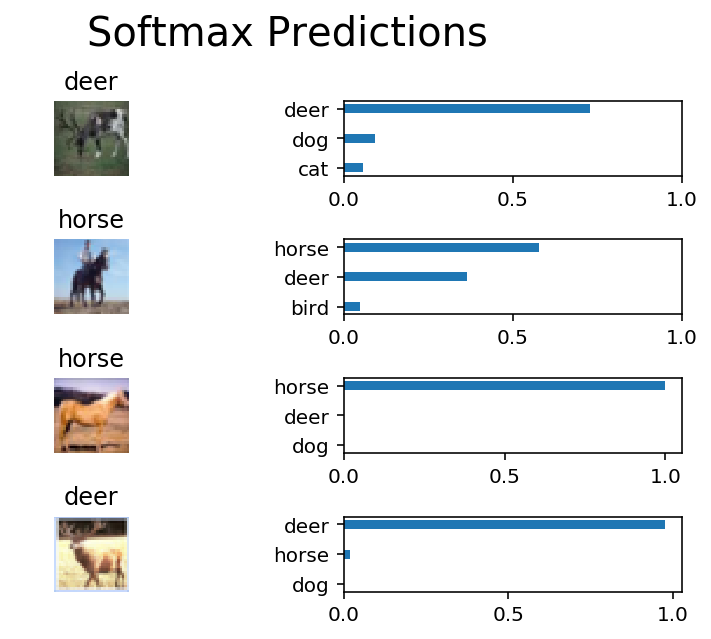

In [56]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## 为何准确率只有50-80%？

你可能想问，为何准确率不能更高了？首先，对于简单的 CNN 网络来说，50% 已经不低了。纯粹猜测的准确率为10%。但是，你可能注意到有人的准确率[远远超过 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130)。这是因为我们还没有介绍所有的神经网络知识。我们还需要掌握一些其他技巧。

## 提交项目

提交项目时，确保先运行所有单元，然后再保存记事本。将 notebook 文件另存为“dlnd_image_classification.ipynb”，再在目录 "File" -> "Download as" 另存为 HTML 格式。请在提交的项目中包含 “helper.py” 和 “problem_unittests.py” 文件。
